# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [1]:
import pandas as pd
!pip install pysentimiento
from pysentimiento import create_analyzer
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 15.1 MB/s eta 0:00:00


## Variables globales

In [5]:
DATASETS_NAME = {
    'MISOCORPUS_2020_TRAIN': 'misocorpus2020_train.csv',
    'MISOCORPUS_2020_VAL': 'misocorpus2020_val.csv',
    'MISOCORPUS_2020_TEST': 'misocorpus2020_test.csv',
}

DATASETS_DELIMITERS = {
    'MISOCORPUS_2020': ',',
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### MISOCORPUS 2020

In [6]:
df_misocorpus_train = pd.read_csv ( DATASETS_NAME['MISOCORPUS_2020_TRAIN'],
        skiprows=1,
        header=None,
        names = ["tweet", "label"],
        delimiter=DATASETS_DELIMITERS['MISOCORPUS_2020'])

----------------------------

## Emotion Analysis


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [7]:
df_misocorpus_train.head()

tweet  label
0                  @twominbae cállate puta      1
1                    @Josumovic Puta Greta      1
2  @monasterioR @julia_otero Eres patética      1
3             @GretaThunberg Loca del coño      1
4                     @GretaThunberg cerda      1

In [8]:
emotion_analyzer = create_analyzer("emotion", lang="es")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [9]:
#Ejemplo de la documentacion
emotion_analyzer.predict("omg")

AnalyzerOutput(output=surprise, probas={surprise: 0.752, joy: 0.151, others: 0.049, fear: 0.021, sadness: 0.016, disgust: 0.007, anger: 0.004})

In [10]:
def analyze_emotion(text):
    result = emotion_analyzer.predict(text.lower())
    emotion = result.output
    probabilities = result.probas

    print("\n-----------------------")
    print(f"Texto analizado: {text}")
    print(f"Emoción detectada: {emotion}")
    print(f"Probabilidades: {probabilities}")

    return emotion, probabilities, text

In [12]:
text_data = df_misocorpus_train['tweet'].tolist()
results = [analyze_emotion(text) for text in tqdm(text_data)]

  0%|          | 3/5034 [00:00<06:06, 13.71it/s]


-----------------------
Texto analizado: @twominbae cállate puta
Emoción detectada: anger
Probabilidades: {'others': 0.14342743158340454, 'joy': 0.00926901027560234, 'sadness': 0.00928592775017023, 'anger': 0.7791018486022949, 'surprise': 0.007691467646509409, 'disgust': 0.04681115224957466, 'fear': 0.004413192626088858}

-----------------------
Texto analizado: @Josumovic Puta Greta
Emoción detectada: others
Probabilidades: {'others': 0.42826569080352783, 'joy': 0.07592540979385376, 'sadness': 0.007955201901495457, 'anger': 0.3239198327064514, 'surprise': 0.12654846906661987, 'disgust': 0.02564055658876896, 'fear': 0.011744913645088673}

-----------------------
Texto analizado: @monasterioR @julia_otero Eres patética
Emoción detectada: anger
Probabilidades: {'others': 0.027603885158896446, 'joy': 0.0021540429443120956, 'sadness': 0.007713479921221733, 'anger': 0.8339317440986633, 'surprise': 0.0018839642871171236, 'disgust': 0.124918632209301, 'fear': 0.0017941936384886503}


  0%|          | 10/5034 [00:00<03:02, 27.48it/s]


-----------------------
Texto analizado: @GretaThunberg Loca del coño
Emoción detectada: anger
Probabilidades: {'others': 0.0765896737575531, 'joy': 0.005779235623776913, 'sadness': 0.004353159107267857, 'anger': 0.8292291164398193, 'surprise': 0.020355289801955223, 'disgust': 0.055527228862047195, 'fear': 0.008166207000613213}

-----------------------
Texto analizado: @GretaThunberg cerda
Emoción detectada: others
Probabilidades: {'others': 0.7797872424125671, 'joy': 0.06707693636417389, 'sadness': 0.02026652731001377, 'anger': 0.05459213629364967, 'surprise': 0.05353754013776779, 'disgust': 0.015962008386850357, 'fear': 0.008777636103332043}

-----------------------
Texto analizado: @outmarina Cállate puta de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.009164330549538136, 'joy': 0.001971766585484147, 'sadness': 0.001684686285443604, 'anger': 0.9201905727386475, 'surprise': 0.0013880679616704583, 'disgust': 0.06366889178752899, 'fear': 0.0019317114492878318}

-------

  0%|          | 14/5034 [00:00<03:34, 23.37it/s]


-----------------------
Texto analizado: Ojalá las feminazis no me den palo por subir este video ??????????? #dolar http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.3610716462135315, 'joy': 0.001975322375074029, 'sadness': 0.006167055107653141, 'anger': 0.47132280468940735, 'surprise': 0.02398296445608139, 'disgust': 0.12049748748540878, 'fear': 0.01498272456228733}

-----------------------
Texto analizado: feminismo=igualdad de hombres y mujeres. feminazi=mujeres que se creen superiores a los hombres. a ver si algún día entienden
Emoción detectada: anger
Probabilidades: {'others': 0.07776384800672531, 'joy': 0.0033827992156147957, 'sadness': 0.019333157688379288, 'anger': 0.8218945264816284, 'surprise': 0.0021176740992814302, 'disgust': 0.0729791447520256, 'fear': 0.0025288478937000036}

-----------------------
Texto analizado: @drummniatico No se vaya asustar! Ese es el gremio de feminazis... el cuartel de las feas, que si le dices preciosas, se ofenden, xq piensa 

  0%|          | 20/5034 [00:00<03:13, 25.90it/s]


-----------------------
Texto analizado: esta es la loca que se la da de feminazi y al final el marido parece ser que es un violador o abusador http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.019540920853614807, 'joy': 0.0014003358082845807, 'sadness': 0.0039616781286895275, 'anger': 0.7584752440452576, 'surprise': 0.003850627923384309, 'disgust': 0.20874853432178497, 'fear': 0.004022679757326841}

-----------------------
Texto analizado: Las feminazis del siglo XXI. Cualquier pendejada les parece una ofensa terrible: http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.057548150420188904, 'joy': 0.001287913299165666, 'sadness': 0.003097281325608492, 'anger': 0.8561215996742249, 'surprise': 0.0036167835351079702, 'disgust': 0.07596898823976517, 'fear': 0.0023592791985720396}

-----------------------
Texto analizado: @VauquitaS Me ha pasado lo mismo. Lo sigo haciendo y seguiré, es mi manera de saber si es una MUJER o una feminazi resentida.
Emoción dete

  1%|          | 28/5034 [00:01<02:55, 28.58it/s]


-----------------------
Texto analizado: @LaFallaras @publico_es Cerda!!! Enterate!!! Que se lo ha inventado todo la mamarracha esa!! Que no t enteras!! Q no sirves pan nada!! Trozo de carne putrefacta!!!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.002445053542032838, 'joy': 0.0016656992956995964, 'sadness': 0.0014834899920970201, 'anger': 0.8518000841140747, 'surprise': 0.001222727820277214, 'disgust': 0.13996215164661407, 'fear': 0.001420777989551425}

-----------------------
Texto analizado: @AmirSalva @Bell_2803 @LaSiglo21 Exacto, no tiene nada que ver lo académico, es totalmente absurdo y un abuso. Donde queda la libre expresión? Y las feminazis que vandalizan, ahí no dicen nada, que doble moral.
Emoción detectada: anger
Probabilidades: {'others': 0.002209153026342392, 'joy': 0.0003634220629464835, 'sadness': 0.0031474423594772816, 'anger': 0.9344313740730286, 'surprise': 0.0008818730711936951, 'disgust': 0.058107584714889526, 'fear': 0.0008591742953285575

  1%|          | 35/5034 [00:01<02:46, 30.10it/s]


-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es Ahí ahí, demostrando que como buena feminazi hembrista la verdad te importa tres cojones. Sabes de sobra que ella es una mentirosa que quiere joderles la vida y aún así te la pela.
Emoción detectada: anger
Probabilidades: {'others': 0.00398619007319212, 'joy': 0.0014373287558555603, 'sadness': 0.0028093932196497917, 'anger': 0.8802766799926758, 'surprise': 0.0004649509792216122, 'disgust': 0.11018244177103043, 'fear': 0.0008430615998804569}

-----------------------
Texto analizado: @GermanT00752596 @TmazRsc Ahora me salieron feminazis jajaja http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8486032485961914, 'joy': 0.10846433788537979, 'sadness': 0.0017173354281112552, 'anger': 0.0036377909127622843, 'surprise': 0.03228416666388512, 'disgust': 0.0024101240560412407, 'fear': 0.0028829332441091537}

-----------------------
Texto analizado: @LaFallaras @populares

  1%|          | 43/5034 [00:01<02:41, 30.82it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Eres una perra mala....
Emoción detectada: anger
Probabilidades: {'others': 0.024167194962501526, 'joy': 0.0026286058127880096, 'sadness': 0.003914170898497105, 'anger': 0.8173657059669495, 'surprise': 0.0023847934789955616, 'disgust': 0.14636506140232086, 'fear': 0.003174420678988099}

-----------------------
Texto analizado: @LaReinaDeNarnia Es que claro, las feminazis no lo hacen con hombres así que eso no se da en la vida real, tortilleras hdp
Emoción detectada: anger
Probabilidades: {'others': 0.004035300575196743, 'joy': 0.0008450935711152852, 'sadness': 0.0021348493173718452, 'anger': 0.8497668504714966, 'surprise': 0.0011021529790014029, 'disgust': 0.14090082049369812, 'fear': 0.0012149395188316703}

-----------------------
Texto analizado: Mostritas #Feminazi amenazando como ellas saben. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.03120533563196659, 'joy': 0.001324703451246023

  1%|          | 47/5034 [00:01<02:52, 28.83it/s]


-----------------------
Texto analizado: Bueno. En mi sana, pero discutible opinión, se fue de las manos, y esto ya no es feminismo. 1️⃣ Esto es = propaganda feminazi 2️⃣ Como hombre-feminista, considero q así no se lucha 3️⃣ A los fans años nos ha gustado SW, conociendo de féminas guerridas y ya 4️⃣ Esto aumentaría el odio http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.3217475414276123, 'joy': 0.0034174101892858744, 'sadness': 0.09615860134363174, 'anger': 0.5159119963645935, 'surprise': 0.0014199381694197655, 'disgust': 0.06010811775922775, 'fear': 0.0012364706490188837}

-----------------------
Texto analizado: Maldito el día en el que se crearon estas 3 nuevas RAZAS: - Ñengozos. - Feminazis. - Maricones. (Cobardes que abusan y enfrentan a una mujer) Que mundo de mierda en el que estamos viviendo. Hasta mañana "princesos" y "preciosas".✌ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.001050888211466372, 'joy': 0.0006803552969358861, 'sadness'

  1%|          | 55/5034 [00:01<02:38, 31.40it/s]


-----------------------
Texto analizado: De lo parte la feminazi puede irse la casa de la gabardina, que manera de joder y hacerse notar con ridiculeces, a parte q la tipa es verdaderamente fea y debió sentirse alagada http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.002707987790927291, 'joy': 0.0006100719328969717, 'sadness': 0.003946167882531881, 'anger': 0.9051417708396912, 'surprise': 0.000728707411326468, 'disgust': 0.08611297607421875, 'fear': 0.0007522148662246764}

-----------------------
Texto analizado: La maldad les regresó a las FemiNazi como un boomerang http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.5451469421386719, 'joy': 0.012787919491529465, 'sadness': 0.025639189407229424, 'anger': 0.1936751902103424, 'surprise': 0.065599724650383, 'disgust': 0.12296494841575623, 'fear': 0.03418605402112007}

-----------------------
Texto analizado: @LaFallaras Estás loca de remate.
Emoción detectada: others
Probabilidades: {'others': 0.6241205

  1%|▏         | 63/5034 [00:02<02:38, 31.32it/s]


-----------------------
Texto analizado: HORROOOOOOR está casi calato con su gorro de policía y su diploma tapando su órgano genital. Ayyy y sus tetillas, quémenlo como a las feminazis que se quitan el brasier para protestar. #Sarcasm Pd. Doble moral everywhere http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.003918550908565521, 'joy': 0.0005482091219164431, 'sadness': 0.0017803068039938807, 'anger': 0.9287194013595581, 'surprise': 0.0008562836446799338, 'disgust': 0.06320468336343765, 'fear': 0.0009725124109536409}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Hola Sra. patética .. IGUALDAD ¿ sabe lo que significa esta palabra?? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.29871848225593567, 'joy': 0.0022268679458647966, 'sadness': 0.00970242079347372, 'anger': 0.6039841771125793, 'surprise': 0.0069579207338392735, 'disgust': 0.0759098082780838, 'fear': 0.0025002809707075357}

-----------------------
Texto anali

  1%|▏         | 72/5034 [00:02<02:26, 33.80it/s]


-----------------------
Texto analizado: @LaFallaras @PeioHR Hay alguna razón, algún motivo, alguna frustración, para ofender de esa manera? Dios me perdone!! Absoluta hija de la gran puta, descerebrada, alcohólica y porrera. A la Señora, a la madre del hijo de Dios, no la ofende Ud en mi presencia!!
Emoción detectada: anger
Probabilidades: {'others': 0.0019904521759599447, 'joy': 0.0006262548849917948, 'sadness': 0.002087121130898595, 'anger': 0.8938083648681641, 'surprise': 0.001329819206148386, 'disgust': 0.09909918159246445, 'fear': 0.0010588490404188633}

-----------------------
Texto analizado: @kaguilar19 @diegovr29 @OscarUlloa88 Censurando las opiniones de los demás, pero después no quieren que les digan feminazis ?
Emoción detectada: anger
Probabilidades: {'others': 0.016519978642463684, 'joy': 0.001187319285236299, 'sadness': 0.003872328670695424, 'anger': 0.8928544521331787, 'surprise': 0.002773694694042206, 'disgust': 0.08036720752716064, 'fear': 0.0024250028654932976}

--

  2%|▏         | 76/5034 [00:02<02:53, 28.58it/s]


-----------------------
Texto analizado: @LaFallaras No, payasa, lo que te están diciendo que porque no te ofendes con todos por igual??? Solo defiendes el machismo nada más, el resto de víctimas las ignoras, payasa
Emoción detectada: anger
Probabilidades: {'others': 0.004114930517971516, 'joy': 0.0009403923759236932, 'sadness': 0.0030337171629071236, 'anger': 0.9488927721977234, 'surprise': 0.000788467179518193, 'disgust': 0.04162139445543289, 'fear': 0.0006083488697186112}

-----------------------
Texto analizado: @RoloConCulo Aca a las gordas no les gustan que les digan gordas, a las feas que les digan feas, a las feminazis que son feminazis, ahora a los rolos que bailan como momias ¡qué estrés! ?
Emoción detectada: anger
Probabilidades: {'others': 0.028873953968286514, 'joy': 0.0018456397810950875, 'sadness': 0.011243271641433239, 'anger': 0.8322287797927856, 'surprise': 0.05774708092212677, 'disgust': 0.05046451836824417, 'fear': 0.017596745863556862}

-----------------------
Tex

  2%|▏         | 83/5034 [00:02<03:01, 27.35it/s]


-----------------------
Texto analizado: @romancendoya Las feministas(Feminazis) estan manejadas por las ONG de izquierda para desestabilizar la sociedas, nunca van alzar su voz por alguien de derecha o centro. Miren el caso Tavara. Asi que a Keiko peor. Para ellas Keiko es hombre, macho, varón por que solo la atacan. #izquierdanunca
Emoción detectada: anger
Probabilidades: {'others': 0.05575849488377571, 'joy': 0.001578851486556232, 'sadness': 0.014726957306265831, 'anger': 0.7962034344673157, 'surprise': 0.000705455953720957, 'disgust': 0.12921015918254852, 'fear': 0.0018166318768635392}

-----------------------
Texto analizado: Después dicen los feminazis que el patriarcado no sirve. Un padre muere en el incendio cuando intento salvar a su hijos. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.03014986217021942, 'joy': 0.0013274275697767735, 'sadness': 0.05712132900953293, 'anger': 0.7837476134300232, 'surprise': 0.0019158683717250824, 'disgust': 0.12396346777677

  2%|▏         | 93/5034 [00:03<02:17, 35.88it/s]


-----------------------
Texto analizado: EXTRAÑO TANTO A LA FEMINAZIS, sus ESTUPIDECES me hacían reír. No se vieron más.
Emoción detectada: others
Probabilidades: {'others': 0.525101900100708, 'joy': 0.06307925283908844, 'sadness': 0.36183854937553406, 'anger': 0.028288356959819794, 'surprise': 0.002838158281520009, 'disgust': 0.014778684824705124, 'fear': 0.004075116012245417}

-----------------------
Texto analizado: Habla por ti cateta!. Que torpes las “Feminazis” de creerse en la legitimidad de hablar por todas las mujeres!. Eres frígida y lo sabes...!? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0021124084014445543, 'joy': 0.0013202044647186995, 'sadness': 0.001302894321270287, 'anger': 0.9155020713806152, 'surprise': 0.0010653925128281116, 'disgust': 0.07766029238700867, 'fear': 0.001036747358739376}

-----------------------
Texto analizado: Las FEMINAZIS buscan "igualdad" dónde ya existe,donde hay VERDADERA DESIGUALDAD los emiratos árabes, Marruecos etc y

  2%|▏         | 106/5034 [00:03<01:43, 47.60it/s]


-----------------------
Texto analizado: @ElTurnerCat Argentina esta contratando feminazis hablan cualquier mierda sin sentido solo tienen en cuenta que la mujer es igual que el hombre, no corrijo se creen más que el hombre; y luego andan cantando y la culpa no era mía y no se que mas monda. :D
Emoción detectada: anger
Probabilidades: {'others': 0.007192463614046574, 'joy': 0.0006697282078675926, 'sadness': 0.003324180608615279, 'anger': 0.9384719133377075, 'surprise': 0.0008658971637487411, 'disgust': 0.04847453162074089, 'fear': 0.0010012671118602157}

-----------------------
Texto analizado: @xavogomez @mariapaularomo @DNI90637912 @TVCElComercioTv @tctelevision @teleamazonasec @Gamavisionecu @EcuavisaInforma ESO DEBEN PREOCUPARSE NO DE DARLE OIDO A UNA FACISTA FEMINAZI DE SU CIRCULO DE AMISTADES
Emoción detectada: anger
Probabilidades: {'others': 0.14084313809871674, 'joy': 0.0035869365092366934, 'sadness': 0.007596615701913834, 'anger': 0.7390409708023071, 'surprise': 0.0011865253

  3%|▎         | 126/5034 [00:03<01:10, 70.04it/s]


-----------------------
Texto analizado: @SoniaVivasRive3 @msikusimakusi Pues haz como las feminazis, ponte un lacito, denuncia al Rey y hazte súbdita del mayordomo del chalet del Vicepresidente de "Podemos". Rebadeu quines pardaleries.
Emoción detectada: anger
Probabilidades: {'others': 0.41810527443885803, 'joy': 0.006593155674636364, 'sadness': 0.004719309043139219, 'anger': 0.4847967028617859, 'surprise': 0.009167165495455265, 'disgust': 0.07273668050765991, 'fear': 0.0038817294407635927}

-----------------------
Texto analizado: En un muestreo tomado del “universo feminazi”: http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9932376146316528, 'joy': 0.00044584812712855637, 'sadness': 0.00036657066084444523, 'anger': 0.00040841748705133796, 'surprise': 0.004243833012878895, 'disgust': 0.00031268407474271953, 'fear': 0.0009849739726632833}

-----------------------
Texto analizado: 12. La puta Greta esta, la culpa ya no es suya, es de quien la enseñó a leer
Emoción 

  3%|▎         | 136/5034 [00:03<01:04, 75.59it/s]


-----------------------
Texto analizado: @LaFallaras Que te crees Marilyn Monroe puta gorda asquerosa
Emoción detectada: anger
Probabilidades: {'others': 0.06252406537532806, 'joy': 0.0054497853852808475, 'sadness': 0.003903087228536606, 'anger': 0.7914054989814758, 'surprise': 0.01247105561196804, 'disgust': 0.12008415907621384, 'fear': 0.004162341821938753}

-----------------------
Texto analizado: Si a las feministas tanto les molesta Twitter y hombres en general ¡Ellas son sumamente independientes son el alfa y omega de nuestra sociedad¡ pueden crear un red social "FEMINAZI" y así dejan de joder al resto q no compartimos su enfermo pensamiento lleno odio y resentimiento.
Emoción detectada: anger
Probabilidades: {'others': 0.010992730036377907, 'joy': 0.0015002856962382793, 'sadness': 0.0038920273073017597, 'anger': 0.9090650677680969, 'surprise': 0.0004280456923879683, 'disgust': 0.07326123118400574, 'fear': 0.0008606213959865272}

-----------------------
Texto analizado: Feminazi

  3%|▎         | 155/5034 [00:03<00:59, 82.63it/s]


-----------------------
Texto analizado: @LaFallaras No payasa, mañana puede ser cualquiera, familiar, hermanos, primos, amigos...cualquiera puede ser víctima de manipuladoras y mentirosas hembras que se dedican a joder nada más, das asco
Emoción detectada: anger
Probabilidades: {'others': 0.0020100846886634827, 'joy': 0.0009369066101498902, 'sadness': 0.0031646755523979664, 'anger': 0.7779569029808044, 'surprise': 0.0008362850057892501, 'disgust': 0.2136630415916443, 'fear': 0.0014321478083729744}

-----------------------
Texto analizado: Joda aquí en Twitter si debe haber feminazi, menor tengo cuidado con lo que digo.
Emoción detectada: others
Probabilidades: {'others': 0.5992537140846252, 'joy': 0.0053961509838700294, 'sadness': 0.011274040676653385, 'anger': 0.05732423812150955, 'surprise': 0.10802821815013885, 'disgust': 0.04201619699597359, 'fear': 0.1767074316740036}

-----------------------
Texto analizado: @LaFallaras Toxicomana no, borracha y loca, que no es lo mismo. ?
Emoc

  3%|▎         | 174/5034 [00:04<00:56, 85.90it/s]


-----------------------
Texto analizado: @OsogordoIntenso Debiese existir el premio Greta, a la pelotuda del año.
Emoción detectada: others
Probabilidades: {'others': 0.9353941082954407, 'joy': 0.004958213306963444, 'sadness': 0.005536300130188465, 'anger': 0.029856106266379356, 'surprise': 0.015510139986872673, 'disgust': 0.006445653270930052, 'fear': 0.0022994119208306074}

-----------------------
Texto analizado: Se abre el camino para que cualquier loca del coño haga que se pudra en la cárcel cualquier gilipollas incauto con fundamentos de la señorita pepis. #Arandina Si sube a tu casa un pibón provocándote a ti y tus colegas, no la dejes pasar y grábalo. (Aun que te llame 25 veces)
Emoción detectada: anger
Probabilidades: {'others': 0.0022474443539977074, 'joy': 0.0007269327761605382, 'sadness': 0.0012665515532717109, 'anger': 0.8688949346542358, 'surprise': 0.0014751264825463295, 'disgust': 0.12351787090301514, 'fear': 0.0018710843287408352}

-----------------------
Texto analiz

  4%|▍         | 194/5034 [00:04<00:53, 89.72it/s]


-----------------------
Texto analizado: Feminismo = Feminazis = Mongolicas!!!! Todes??? Por favor!!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.003051362233236432, 'joy': 0.000791253347415477, 'sadness': 0.0021519153378903866, 'anger': 0.9077775478363037, 'surprise': 0.0028569253627210855, 'disgust': 0.08168492466211319, 'fear': 0.0016860852483659983}

-----------------------
Texto analizado: Las feminazis quieren por poco que este chico vaya preso por su humor negro, porque eso es violencia y no libre expresión. Una diputada provincial amenaza físicamente a un persona en concreto, y eso no es violencia si no libertad de expresión. Hay confusión de conceptos http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0237813089042902, 'joy': 0.0005490905023179948, 'sadness': 0.006055877543985844, 'anger': 0.8744168877601624, 'surprise': 0.0016218620585277677, 'disgust': 0.09182903170585632, 'fear': 0.0017459173686802387}

-----------------------
Texto analizado: @

  4%|▍         | 213/5034 [00:04<00:52, 92.26it/s]


-----------------------
Texto analizado: Les vengo a arruinar más el día... lo siento ??‍♂️? #Feminazis #Preciosa #Julissa #Quito #Ecuador http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.17779716849327087, 'joy': 0.007281757891178131, 'sadness': 0.15906430780887604, 'anger': 0.5269963145256042, 'surprise': 0.0025758694391697645, 'disgust': 0.12344728410243988, 'fear': 0.00283734779804945}

-----------------------
Texto analizado: @uterope Esta es la obra de un ex terrorista que ahora es feminazi, fiscal y juez..
Emoción detectada: anger
Probabilidades: {'others': 0.0648546814918518, 'joy': 0.0014291316037997603, 'sadness': 0.006690601818263531, 'anger': 0.623801052570343, 'surprise': 0.007960394024848938, 'disgust': 0.2892300486564636, 'fear': 0.006034062243998051}

-----------------------
Texto analizado: Pum perras #Feministas #Feminazi Un poco de broma, no lo tomen en serio y no ataquen HDSPM http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0752

  5%|▍         | 233/5034 [00:04<00:52, 90.64it/s]


-----------------------
Texto analizado: Voy hacer tutoriales para enseñarle a las que quieran saber como bañar a un bebé, como hacer el biberon, como ponerle un pañal y como hacer arroz carne y frijoles. Guachito de pollo con culantro y contar los 3 centavos Porque con la generacion "feminazi" Sálvese quien pueda.
Emoción detectada: others
Probabilidades: {'others': 0.8338341116905212, 'joy': 0.0678408220410347, 'sadness': 0.014441007748246193, 'anger': 0.06334291398525238, 'surprise': 0.007054435554891825, 'disgust': 0.01118158083409071, 'fear': 0.0023050850722938776}

-----------------------
Texto analizado: Feliz año nuevo a todos, excepto a los zurdos, a las feminazis, a los politicos ladrones y a los que no usan direccional. Feliz 2020!
Emoción detectada: anger
Probabilidades: {'others': 0.10245689004659653, 'joy': 0.3356785178184509, 'sadness': 0.028082020580768585, 'anger': 0.3602752387523651, 'surprise': 0.0028988004196435213, 'disgust': 0.16500645875930786, 'fear': 0.0056021

  5%|▌         | 253/5034 [00:04<00:51, 92.57it/s]


-----------------------
Texto analizado: @leogarnier @ldacr Amigues su abuela! Edúquese un poquito con la RAE. A no ser que piense que es parte del “patriarcado” como dicen las feminazis...
Emoción detectada: anger
Probabilidades: {'others': 0.41212406754493713, 'joy': 0.002942421706393361, 'sadness': 0.016531910747289658, 'anger': 0.5221656560897827, 'surprise': 0.002916515339165926, 'disgust': 0.039562925696372986, 'fear': 0.0037565012462437153}

-----------------------
Texto analizado: @rubencojeme callate puta no ves q me aguanto la toxicidad
Emoción detectada: anger
Probabilidades: {'others': 0.022079002112150192, 'joy': 0.001989861484616995, 'sadness': 0.003861713455989957, 'anger': 0.918957531452179, 'surprise': 0.0037473191041499376, 'disgust': 0.045949190855026245, 'fear': 0.0034154073800891638}

-----------------------
Texto analizado: @natygrisy35 Bien hecho Jajajaja se la tiro, a esas feminazis les falta una porción de su misma mierdita
Emoción detectada: anger
Probabilida

  5%|▌         | 273/5034 [00:05<00:50, 94.27it/s]


-----------------------
Texto analizado: @unmatedecoca @Cerdubela2 Feminazi Galindo apoya al Zurdo Evo Morales .
Emoción detectada: others
Probabilidades: {'others': 0.8840482234954834, 'joy': 0.002756665926426649, 'sadness': 0.005113463383167982, 'anger': 0.07510585337877274, 'surprise': 0.002128042047843337, 'disgust': 0.029154621064662933, 'fear': 0.0016931317513808608}

-----------------------
Texto analizado: @GretaThunberg where are you in the Austrálian ? Puta !
Emoción detectada: others
Probabilidades: {'others': 0.8611379861831665, 'joy': 0.00758601538836956, 'sadness': 0.007873130962252617, 'anger': 0.06476106494665146, 'surprise': 0.041489824652671814, 'disgust': 0.01183377392590046, 'fear': 0.0053182318806648254}

-----------------------
Texto analizado: @_aguitaecoco Cállate puta ramera tonta golfa puta tonta ramera.
Emoción detectada: anger
Probabilidades: {'others': 0.007203986868262291, 'joy': 0.001278344658203423, 'sadness': 0.0014490003231912851, 'anger': 0.948273897

  6%|▌         | 293/5034 [00:05<00:49, 96.04it/s]


-----------------------
Texto analizado: @ghitis Es una de las modernas y malditas feminazis que no debieron nacer.
Emoción detectada: anger
Probabilidades: {'others': 0.03372186794877052, 'joy': 0.0018445660825818777, 'sadness': 0.0036297147162258625, 'anger': 0.7736275792121887, 'surprise': 0.006197566632181406, 'disgust': 0.17691311240196228, 'fear': 0.004065582063049078}

-----------------------
Texto analizado: Y así comenzaron las primeras feminazis ? http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.6392621994018555, 'joy': 0.004168634302914143, 'sadness': 0.004176991060376167, 'anger': 0.022071044892072678, 'surprise': 0.308785080909729, 'disgust': 0.008901545777916908, 'fear': 0.012634500861167908}

-----------------------
Texto analizado: @gonzaperucarajo Conociendo la forma de vida de Higinio, dudo que él, te haya allanado. Seguro que las feminazis y sus ministerios aliados (mimp, minjus) y la Defensoría LGTB presionaron para quitarles presupuesto.
Emoción

  6%|▌         | 313/5034 [00:05<00:49, 95.86it/s]


-----------------------
Texto analizado: @LaFallaras Ya está la puta jodida borracha esta?? a ti ni el coronavirus te entra porque se muere de lo alcoholizada que estás ?‍♂️?
Emoción detectada: anger
Probabilidades: {'others': 0.0060395109467208385, 'joy': 0.00178749009501189, 'sadness': 0.0012925148475915194, 'anger': 0.9172705411911011, 'surprise': 0.005548692774027586, 'disgust': 0.06589390337467194, 'fear': 0.002167346654459834}

-----------------------
Texto analizado: @LaFallaras @iunida @ahorapodemos @perecampscampos PATETICA DESLENGUASA QUE TU TRABAJAS MUCHO. ANDA VETE PA TERUEL PATETICA MAL EDUCADA http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.00427156500518322, 'joy': 0.0010734951356425881, 'sadness': 0.0019477129681035876, 'anger': 0.9198507070541382, 'surprise': 0.0007607709267176688, 'disgust': 0.07111070305109024, 'fear': 0.0009850235655903816}

-----------------------
Texto analizado: @InesArrimadas Ahora vosotras enchufais a vuestros colegas. ¿Que 

  7%|▋         | 333/5034 [00:05<00:51, 91.90it/s]


-----------------------
Texto analizado: No sera por que debe pasar los 82 años Feminazi resentida. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.5590851902961731, 'joy': 0.0055716210044920444, 'sadness': 0.013118207454681396, 'anger': 0.24459819495677948, 'surprise': 0.015327518805861473, 'disgust': 0.15725331008434296, 'fear': 0.005045848898589611}

-----------------------
Texto analizado: @LaFallaras Por la edad que tiene señora,le hablaré con http://t.co/ usted tonta????se siente sola?no hay varón que se le acerque????por que no entiendo como puede ser tan patetica!!!conoce usted el cacharrito de moda????ale cómpreselo
Emoción detectada: anger
Probabilidades: {'others': 0.020217638462781906, 'joy': 0.0018888425547629595, 'sadness': 0.008002230897545815, 'anger': 0.8601900935173035, 'surprise': 0.006349966861307621, 'disgust': 0.09991566836833954, 'fear': 0.003435532096773386}

-----------------------
Texto analizado: @InesArrimadas me hace gracia lo chula que

  7%|▋         | 353/5034 [00:06<00:50, 92.44it/s]


-----------------------
Texto analizado: @cayetanaAT Se ve que eres un invento porque no tienes ni puta idea de la derecha en españa. Te limitas a sembrar tormentas. Pero ya te vendrán las tempestades, ya. So fea.
Emoción detectada: anger
Probabilidades: {'others': 0.0140153206884861, 'joy': 0.0020033407490700483, 'sadness': 0.00492201978340745, 'anger': 0.8881102204322815, 'surprise': 0.0007233424694277346, 'disgust': 0.08855514228343964, 'fear': 0.0016706666210666299}

-----------------------
Texto analizado: @LaFallaras Eres tu, y tu cara cerda!! Tranquila q estos no te tocan ni con un palo. Es q mas fea no se puede ser. ??? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.014195704832673073, 'joy': 0.002261047950014472, 'sadness': 0.0039251502603292465, 'anger': 0.7975286245346069, 'surprise': 0.004374109208583832, 'disgust': 0.175917387008667, 'fear': 0.0017979328986257315}

-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @PSOE @Esquer

  7%|▋         | 373/5034 [00:06<00:49, 95.07it/s]


-----------------------
Texto analizado: @PeruanoComunica @MelissaPeschier @hectorbecerrilr Desde las Maravillosas "LINEAS de NAZCA". #Melissa es una Feminista o Lesbis o femiNAZI q' #asesinó a BECERRIL.
Emoción detectada: anger
Probabilidades: {'others': 0.0328977070748806, 'joy': 0.002707008272409439, 'sadness': 0.005870118271559477, 'anger': 0.7713403105735779, 'surprise': 0.0021731643937528133, 'disgust': 0.18289855122566223, 'fear': 0.0021131960675120354}

-----------------------
Texto analizado: @silvitabuendia Defender a mujeres de actos violentos, educar a la sociedad el respeto, no es motivo q les digan feminazis, pero cuando quieren abortar sin ser víctimas de una violación, sino por haber sido descuidados al haber tenido un acto sexual concentido... es correcto decirles feminazis
Emoción detectada: anger
Probabilidades: {'others': 0.014286907389760017, 'joy': 0.0009080960298888385, 'sadness': 0.011471420526504517, 'anger': 0.918261706829071, 'surprise': 0.000970945111475884

  8%|▊         | 393/5034 [00:06<00:49, 93.66it/s]


-----------------------
Texto analizado: @LaFallaras @cuatroaldia Más bien eres una borrach y loca..
Emoción detectada: others
Probabilidades: {'others': 0.8240484595298767, 'joy': 0.0034329930786043406, 'sadness': 0.021563909947872162, 'anger': 0.08606186509132385, 'surprise': 0.006145302206277847, 'disgust': 0.05297091230750084, 'fear': 0.005776581354439259}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Estás loca!!!!
Emoción detectada: others
Probabilidades: {'others': 0.6004619598388672, 'joy': 0.023762868717312813, 'sadness': 0.004597806837409735, 'anger': 0.04832756519317627, 'surprise': 0.2915428578853607, 'disgust': 0.01671200431883335, 'fear': 0.01459490042179823}

-----------------------
Texto analizado: @LaFallaras Tú nunca has sido virgen. Ni inocente. Tú eres una puta yonqui, Fallarás.
Emoción detectada: anger
Probabilidades: {'others': 0.03452463820576668, 'joy': 0.005166965536773205, 'sadness': 0.012564841657876968, 'anger': 0.7304373383

  8%|▊         | 413/5034 [00:06<00:50, 91.85it/s]


-----------------------
Texto analizado: Una feminazi "peleando" por sus izquierdos .....(a esto que "ella" hace no se le puede llamar "derechos"!) http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.48773300647735596, 'joy': 0.007318004500120878, 'sadness': 0.009260985068976879, 'anger': 0.41171103715896606, 'surprise': 0.027715129777789116, 'disgust': 0.05177346616983414, 'fear': 0.004488328937441111}

-----------------------
Texto analizado: @rfcolmenero77 @marianalongo11 Nuevo caso de violencia feminazi contra inocente hombre.......
Emoción detectada: others
Probabilidades: {'others': 0.7539864778518677, 'joy': 0.00225847284309566, 'sadness': 0.013469203375279903, 'anger': 0.04991297051310539, 'surprise': 0.1179780662059784, 'disgust': 0.028856296092271805, 'fear': 0.03353848680853844}

-----------------------
Texto analizado: Greta cabrona deja alguna chupaíta pal resto que me llevas las pupilas como la capa de ozono. http://t.co/
Emoción detectada: others
Probabi

  8%|▊         | 423/5034 [00:06<00:51, 90.06it/s]


-----------------------
Texto analizado: @LaFallaras Deja de drogarte estupida
Emoción detectada: anger
Probabilidades: {'others': 0.06800985336303711, 'joy': 0.00394681328907609, 'sadness': 0.003622828982770443, 'anger': 0.8474761843681335, 'surprise': 0.0034311292693018913, 'disgust': 0.06950841099023819, 'fear': 0.004004757385700941}

-----------------------
Texto analizado: @LaFallaras No se puede ser más payasa
Emoción detectada: anger
Probabilidades: {'others': 0.03922233358025551, 'joy': 0.004861005581915379, 'sadness': 0.004396514035761356, 'anger': 0.7572272419929504, 'surprise': 0.015278160572052002, 'disgust': 0.17484727501869202, 'fear': 0.004167486913502216}

-----------------------
Texto analizado: @LaFallaras Chanel 5 para tí ,como echar margaritas a los cerdos !! Te retratas muy bien eres consciente de que eres una puta ,borracha y ladrona solo me queda mandarte a la MIERDA!!!
Emoción detectada: anger
Probabilidades: {'others': 0.006063179112970829, 'joy': 0.0022599452

  9%|▉         | 443/5034 [00:07<00:51, 89.66it/s]


-----------------------
Texto analizado: @Guatemula Netflix es un nido de lavado de cerebros feminazi... todo alli está diseñado para adoctrinar la "ideología de Género...
Emoción detectada: anger
Probabilidades: {'others': 0.006438136100769043, 'joy': 0.0008087992900982499, 'sadness': 0.0028260659892112017, 'anger': 0.8165313601493835, 'surprise': 0.000963413214776665, 'disgust': 0.17060443758964539, 'fear': 0.001827821135520935}

-----------------------
Texto analizado: @LaFallaras No eres ni lobby ni lobba ni na ,eres tonta , boba maliciosa , además de manipuladora y patética y mi distante de la verdad no porque no la sepas sino porque si la verdad va contra tus ideas la manipulas muy a lo gobbels , amas de el doble w y la fariña pa amasar
Emoción detectada: anger
Probabilidades: {'others': 0.0046568033285439014, 'joy': 0.0011925087310373783, 'sadness': 0.003300428157672286, 'anger': 0.8719544410705566, 'surprise': 0.0007291888468898833, 'disgust': 0.11679152399301529, 'fear': 0.00

  9%|▉         | 463/5034 [00:07<00:49, 91.53it/s]


-----------------------
Texto analizado: @iWasEasy Y las feminazis acusarían a Mcmosca de machista opresor por haber dejado a la novia tirada durmiendo en una banca mientras se largaba con el Doc.
Emoción detectada: others
Probabilidades: {'others': 0.6291830539703369, 'joy': 0.0031441047322005033, 'sadness': 0.006965503096580505, 'anger': 0.27709174156188965, 'surprise': 0.005664021708071232, 'disgust': 0.07113152742385864, 'fear': 0.006820083595812321}

-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es Tú sigue empinando el codo, patética abuela alcohólica.
Emoción detectada: anger
Probabilidades: {'others': 0.021032830700278282, 'joy': 0.002434681635349989, 'sadness': 0.005625399295240641, 'anger': 0.8896375894546509, 'surprise': 0.00115679029840976, 'disgust': 0.07872530072927475, 'fear': 0.0013874125434085727}

-----------------------
Texto analizado: Ejemplo patéticos de "feminazis". Unas depravadas completas. @NoticiasC

 10%|▉         | 483/5034 [00:07<00:49, 92.39it/s]


-----------------------
Texto analizado: una pregunta seria que se le puede regalar una feminazi que no se ofenda?
Emoción detectada: others
Probabilidades: {'others': 0.9877723455429077, 'joy': 0.0012697341153398156, 'sadness': 0.0012695627519860864, 'anger': 0.0026931804604828358, 'surprise': 0.004628644324839115, 'disgust': 0.0010553013999015093, 'fear': 0.00131121464073658}

-----------------------
Texto analizado: Este es el negocio atrás del aborto (? Las malditas aborteras venden a los bbs muertos a empresas. Feminazis horribles!!?????✊ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0016290551284328103, 'joy': 0.0006433729431591928, 'sadness': 0.001573227229528129, 'anger': 0.9007572531700134, 'surprise': 0.0010358011350035667, 'disgust': 0.09329558908939362, 'fear': 0.001065754797309637}

-----------------------
Texto analizado: #OLISBITÁCORA --&gt; CUANDO LES CONVIENE HABLAN DE QUE SON UNA COMUNIDAD..... CUANDO LES CONVIENE HABLAN DE QUE REPRESENTAN A #ECU

 10%|▉         | 503/5034 [00:07<00:48, 93.55it/s]


-----------------------
Texto analizado: Feminazis digan lo suyo!!!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.081670843064785, 'joy': 0.00306846690364182, 'sadness': 0.002422298537567258, 'anger': 0.8470726013183594, 'surprise': 0.006989434827119112, 'disgust': 0.05529865622520447, 'fear': 0.003477733349427581}

-----------------------
Texto analizado: Barrer a la feminazi con un argumento SIMPLE y DEMOLEDOR, definitivamente es una destreza adquirida por @JMilei no tenemos todos. Feliz Año Nuevo Javi http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7397759556770325, 'joy': 0.15565809607505798, 'sadness': 0.010292008519172668, 'anger': 0.07514031231403351, 'surprise': 0.003550993511453271, 'disgust': 0.01474279910326004, 'fear': 0.0008398950449191034}

-----------------------
Texto analizado: Nos va a tocar salirles a las feminazi a hacer Performance de familia... No soy violador!! América está despertando , el comunismo debe ser controlado.

 10%|█         | 523/5034 [00:07<00:49, 91.24it/s]


-----------------------
Texto analizado: @meiermq Sus tetas cambiaron el mundo jajaja es una feminazi pero discrepo sí es una gran artista, lástima que el neomarxismo la capturó.
Emoción detectada: others
Probabilidades: {'others': 0.8375288844108582, 'joy': 0.02527647092938423, 'sadness': 0.054008953273296356, 'anger': 0.031055839732289314, 'surprise': 0.017698749899864197, 'disgust': 0.03256544843316078, 'fear': 0.0018656436586752534}

-----------------------
Texto analizado: @DoyletJuan @caathytorres @PoliciaEcuador Buena esa compita?? Todos los emelecistas UNIDOS contra las feminazis @silvitabuendia @LoloMino
Emoción detectada: others
Probabilidades: {'others': 0.6445925831794739, 'joy': 0.34642118215560913, 'sadness': 0.00125979445874691, 'anger': 0.000985038815997541, 'surprise': 0.0050637489184737206, 'disgust': 0.0010091228177770972, 'fear': 0.0006685733096674085}

-----------------------
Texto analizado: Bueno, ya, al Blueprint... la compañera mia, que le digo "perro mojado" 

 11%|█         | 543/5034 [00:08<00:49, 91.08it/s]


-----------------------
Texto analizado: @HaroldA60148527 @InstitutoCato Estoy tomando que en los países donde hay mayor nivel de feminazis y comunistas son justamente en países donde el índice de analfabetismo se dan por distintas fallas, tanto estatales como geográficas, que impiden a un estudiante educarse debidamente.
Emoción detectada: others
Probabilidades: {'others': 0.5851209163665771, 'joy': 0.0016880312468856573, 'sadness': 0.05841479450464249, 'anger': 0.31121569871902466, 'surprise': 0.001560700940899551, 'disgust': 0.033850062638521194, 'fear': 0.008149784058332443}

-----------------------
Texto analizado: @Colo1905Ok Sì, però solo de las Hdp. ...son las "cosas" más asquerosas de este mundo... algunos las llaman también feminazi ?
Emoción detectada: anger
Probabilidades: {'others': 0.0073978472501039505, 'joy': 0.001349566038697958, 'sadness': 0.0034549892880022526, 'anger': 0.6574996113777161, 'surprise': 0.003466930938884616, 'disgust': 0.3243108093738556, 'fear': 0.00

 11%|█         | 563/5034 [00:08<00:48, 92.78it/s]


-----------------------
Texto analizado: @Eichler71918287 @manemairif @elandrelo @politikcorrecta Así es,yo no tengo en problema en decirle sus verdades a estas feminazis hdp,pero me tienen bloqueado
Emoción detectada: anger
Probabilidades: {'others': 0.039768967777490616, 'joy': 0.004039126448333263, 'sadness': 0.0029292001854628325, 'anger': 0.8037310838699341, 'surprise': 0.0012703974498435855, 'disgust': 0.1468317061662674, 'fear': 0.0014294568682089448}

-----------------------
Texto analizado: Las FemiNazi mexicanas llenas de odio e ira queman biblias y exigen al presidente que Dios sea borrado. Como en los días de la Nazi alemana de Hitler quemaban los libros y perseguian y asesinaban a los cristianos, judíos, homosexuales y gitanos. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0044828150421381, 'joy': 0.001583398669026792, 'sadness': 0.0035372984129935503, 'anger': 0.758263885974884, 'surprise': 0.0006461061420850456, 'disgust': 0.22968977689743042, 'fear

 12%|█▏        | 583/5034 [00:08<00:48, 92.35it/s]


-----------------------
Texto analizado: @juancasaenz1976 Esa feminazi de la Buendía es un aborto de la cordura
Emoción detectada: anger
Probabilidades: {'others': 0.3041645586490631, 'joy': 0.0014756553573533893, 'sadness': 0.007467429153621197, 'anger': 0.5198274254798889, 'surprise': 0.007091389037668705, 'disgust': 0.15606620907783508, 'fear': 0.003907305654138327}

-----------------------
Texto analizado: Las feminazis se crean un problema y se lo solucionan. Es decir, hago que te sientas indefensa en la sociedad y después te digo cómo te protejo del machismo opresor Aquí haciendo drama, la ridícula eres TU! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0032501607201993465, 'joy': 0.001237365766428411, 'sadness': 0.002982721198350191, 'anger': 0.9318112134933472, 'surprise': 0.0008865718264132738, 'disgust': 0.059185586869716644, 'fear': 0.0006464011967182159}

-----------------------
Texto analizado: @hatebemol ...Vice-presidentA, no...Vice-presidentE...dent

 12%|█▏        | 603/5034 [00:08<00:49, 90.33it/s]


-----------------------
Texto analizado: Feminazi Venezolana causa furor en los comics.
Emoción detectada: others
Probabilidades: {'others': 0.9665490984916687, 'joy': 0.00263141468167305, 'sadness': 0.0025117024779319763, 'anger': 0.004545836243778467, 'surprise': 0.01428164541721344, 'disgust': 0.003738614497706294, 'fear': 0.005741722881793976}

-----------------------
Texto analizado: greta hija puta devuélvenos la calefacción
Emoción detectada: anger
Probabilidades: {'others': 0.033644530922174454, 'joy': 0.006110816262662411, 'sadness': 0.0037792488001286983, 'anger': 0.9024705290794373, 'surprise': 0.010311963967978954, 'disgust': 0.037684835493564606, 'fear': 0.005998079665005207}

-----------------------
Texto analizado: @blogcyh @wizagp @Alejandro_muba Solo miren la cara de esa cuatro ojos como lo miraba. Hay Feminazis, por que odian a los hombres?
Emoción detectada: anger
Probabilidades: {'others': 0.003251724410802126, 'joy': 0.0004754345864057541, 'sadness': 0.00265019875

 12%|█▏        | 613/5034 [00:08<00:52, 83.43it/s]


-----------------------
Texto analizado: Su voz es como de una cuaima ligado con feminazi http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9808427095413208, 'joy': 0.0006293933838605881, 'sadness': 0.0009853813098743558, 'anger': 0.0017743885982781649, 'surprise': 0.011706928722560406, 'disgust': 0.001275639864616096, 'fear': 0.0027855904772877693}

-----------------------
Texto analizado: @quiquex61 @Silvio11914774 @24h_tve @GretaThunberg La histérica está haciendo que unos cuantos estén ganando BILLONES con el hoax del calentamiento global; que es cíclico, pero vende mucho. Al Gore estará disfrutando contando ceros en su cuenta Mejor haría ayudando a Swedishtan su país, que ya ha caído y difícilmente se levantará
Emoción detectada: anger
Probabilidades: {'others': 0.26065605878829956, 'joy': 0.01206002663820982, 'sadness': 0.3297554850578308, 'anger': 0.34076404571533203, 'surprise': 0.002396831288933754, 'disgust': 0.05195046216249466, 'fear': 0.00241708266548812

 13%|█▎        | 631/5034 [00:09<00:50, 86.39it/s]


-----------------------
Texto analizado: @GretaThunberg Me puedes comer los webos x debajo payasa
Emoción detectada: anger
Probabilidades: {'others': 0.010736231692135334, 'joy': 0.002880210755392909, 'sadness': 0.001308860257267952, 'anger': 0.9531437754631042, 'surprise': 0.0020660017617046833, 'disgust': 0.028336623683571815, 'fear': 0.0015282962704077363}

-----------------------
Texto analizado: @lilialemoine @GretaThunberg Esta pendeja cara de pelotuda se los engrampó a todos
Emoción detectada: anger
Probabilidades: {'others': 0.006279685068875551, 'joy': 0.001200962346047163, 'sadness': 0.0020497350487858057, 'anger': 0.8464944958686829, 'surprise': 0.0017319308826699853, 'disgust': 0.14004521071910858, 'fear': 0.002198053989559412}

-----------------------
Texto analizado: Habeis visto la peli de Ali G? Que lo contratan como mono de feria para representar al parlamento y manipularle y dirigir el cotarro todos los hijos de puta? Esa es la Greta, pero en este caso la niña se lo 

 13%|█▎        | 649/5034 [00:09<00:50, 87.19it/s]


-----------------------
Texto analizado: Feminazi digan algo !!!. Atención que no me dirijo al distinguido Movimiento Feminista al cual respeto y admiro por su causa justa. Me dirijo a las que han destruido la naturaleza del Movimiento Feminista. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.28052371740341187, 'joy': 0.004467393271625042, 'sadness': 0.03535020351409912, 'anger': 0.6320809125900269, 'surprise': 0.0014763607177883387, 'disgust': 0.044255003333091736, 'fear': 0.0018464236054569483}

-----------------------
Texto analizado: Cuidado, NO ES LO MISMO: Progreso?que Progresismo? Mujer?que Feminazi? Indio?que Indigenista? Pueblo?que Populismo? Cuidar el Medio Ambiente?que Ambientalismo? Cuidar a los Animales?que Veganismo? #SoyProVida
Emoción detectada: anger
Probabilidades: {'others': 0.09240202605724335, 'joy': 0.0031468579545617104, 'sadness': 0.031086865812540054, 'anger': 0.7704389691352844, 'surprise': 0.0025020733010023832, 'disgust': 0.0986362174153

 13%|█▎        | 668/5034 [00:09<00:48, 89.33it/s]


-----------------------
Texto analizado: @realjuca UNA SOLA PALABRA , FEMINAZI. de ahi x otro lado existen mujeres normales q actuan sin odio a los hombres q aceptan un halago o un piropo educado y sutil sin sentirse invadidas en su espacio y obviamente repudian las groserias y la mala educacion ,como tiene q ser
Emoción detectada: anger
Probabilidades: {'others': 0.08408041298389435, 'joy': 0.0022305145394057035, 'sadness': 0.010300436057150364, 'anger': 0.8379484415054321, 'surprise': 0.001223076949827373, 'disgust': 0.06302093714475632, 'fear': 0.0011961387936025858}

-----------------------
Texto analizado: @MartaMirantes @JuanCarlosAG87 @FonsiLoaiza Eres, podemita verdad? Igual a feminazi atontada
Emoción detectada: anger
Probabilidades: {'others': 0.058445610105991364, 'joy': 0.006561450660228729, 'sadness': 0.005291400011628866, 'anger': 0.7315322756767273, 'surprise': 0.00421349098905921, 'disgust': 0.1902606040239334, 'fear': 0.0036951745860278606}

-----------------------
Te

 14%|█▎        | 688/5034 [00:09<00:47, 91.45it/s]


-----------------------
Texto analizado: @EpicuroDeSamos_ @Lauraagomezc Ese es el nivel de argumentación de la feminazi pop. Igual se que está leyendo el hilo. J“querida” no todos somos buenos y no todos somos malos. Eso lo hace las decisiones que tomamos sin importar el género. Y @Marbelle30 con sus acciones a demostrado no ser buena persona http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.1337009221315384, 'joy': 0.0014635312836617231, 'sadness': 0.02040133997797966, 'anger': 0.7694780230522156, 'surprise': 0.001019755844026804, 'disgust': 0.07283114641904831, 'fear': 0.001105269999243319}

-----------------------
Texto analizado: @eriKATqien Feminista, no feminazi/femiloca. Tu reivindicas el valor de la mujer. El resto son cojudeces.
Emoción detectada: anger
Probabilidades: {'others': 0.029445048421621323, 'joy': 0.003395362291485071, 'sadness': 0.004833654500544071, 'anger': 0.905921459197998, 'surprise': 0.001084594987332821, 'disgust': 0.054335229098796844, 'fe

 14%|█▍        | 708/5034 [00:09<00:48, 89.11it/s]


-----------------------
Texto analizado: Nunca estaría con alguien feminista
Emoción detectada: others
Probabilidades: {'others': 0.7958585619926453, 'joy': 0.09251511096954346, 'sadness': 0.06552378088235855, 'anger': 0.005865137092769146, 'surprise': 0.02603149600327015, 'disgust': 0.008949777111411095, 'fear': 0.005256164353340864}

-----------------------
Texto analizado: Por suerte al feminismo extremo le queda poco, hay que aguantar unos 20 años, entre que son casi todas lesbianas o abortan, se extinguen solitas, #NiUnaMenos
Emoción detectada: anger
Probabilidades: {'others': 0.12317061424255371, 'joy': 0.006108420435339212, 'sadness': 0.08594994246959686, 'anger': 0.5707725286483765, 'surprise': 0.0035085855051875114, 'disgust': 0.20583145320415497, 'fear': 0.004658449441194534}

-----------------------
Texto analizado: @Bravisimanature @leisysiel @leisy la critica va hacia el movimiento feminista... no a las feministas... leisy es feminista. en el sentido a que se defiende com

 14%|█▍        | 727/5034 [00:10<00:47, 90.40it/s]


-----------------------
Texto analizado: @Singularidad_86 @marianalongo11 Seguro que no le debe costar mucho conseguir tal fin. Las feminazis parecen una parodia de la mujer.
Emoción detectada: others
Probabilidades: {'others': 0.7598333954811096, 'joy': 0.0022350801154971123, 'sadness': 0.026097746565937996, 'anger': 0.14622144401073456, 'surprise': 0.003965470939874649, 'disgust': 0.057801175862550735, 'fear': 0.0038456313777714968}

-----------------------
Texto analizado: @iceldaperez Las feminazis se enojarán. Porque siembran arboles que es sl símbolo fálico del patriarcado y no siembran ostiones con galletitas? jajaja
Emoción detectada: others
Probabilidades: {'others': 0.7826381325721741, 'joy': 0.012975797988474369, 'sadness': 0.00800398550927639, 'anger': 0.16700944304466248, 'surprise': 0.006971610244363546, 'disgust': 0.01922263577580452, 'fear': 0.0031785008031874895}

-----------------------
Texto analizado: @isabelmarti Jajajajs psicóloga de pacotilla en contra de eviden

 15%|█▍        | 747/5034 [00:10<00:47, 90.81it/s]


-----------------------
Texto analizado: Estaba en el café comiendo...cuando llego un chico pidió un smoothie de fresa espero un rato y llego una chica...en moto pidió una malteada y dejó su casco en la mesa de al lado Eso es feminismo no sus mamadas de enseñar las chichis
Emoción detectada: anger
Probabilidades: {'others': 0.3843161165714264, 'joy': 0.02713351510465145, 'sadness': 0.012569976039230824, 'anger': 0.5435459017753601, 'surprise': 0.005202715750783682, 'disgust': 0.025377735495567322, 'fear': 0.0018541091121733189}

-----------------------
Texto analizado: Por un nuevo año sin violencia contra las mujeres; salvo con Rosa Bartra, keiko, sus hijas, su abogada, martha chavez y todas esas brujas apañadoras del fujiaprismocorrupto ¿Asi, o mas comprometidas con la causa feminista? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.00457344576716423, 'joy': 0.0009200366912409663, 'sadness': 0.005263717379420996, 'anger': 0.7863133549690247, 'surprise': 0.00340892

 15%|█▌        | 767/5034 [00:10<00:46, 91.79it/s]


-----------------------
Texto analizado: NOCHE DE REYES Dejaré mis zapatitos con una Carta como cada 5 de enero Solo voy a pedir que: Las feminazis no pretendan asesinarlos Los Nac y Pop no tiren las cartitas de sus hijos Alberto no les cobre 30% a juguetes importados Que los hijos de los zurdos les dejen pastito y agua http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.17382770776748657, 'joy': 0.00810984242707491, 'sadness': 0.026342647150158882, 'anger': 0.719956636428833, 'surprise': 0.0007884784718044102, 'disgust': 0.06831197440624237, 'fear': 0.0026627639308571815}

-----------------------
Texto analizado: En lo particular, miro cada vez más difícil una verdadera oposición, definitivamente la @AlianzaCivicaNi dejo de ser esa esperanza para el pueblo, se quedó con los empresarios pro-gobierno y la @UnidadNic está llena de sandinistas renovados y feminazis! http://t.co/
Emoción detectada: sadness
Probabilidades: {'others': 0.08204144239425659, 'joy': 0.00296940514

 16%|█▌        | 787/5034 [00:10<00:45, 92.44it/s]


-----------------------
Texto analizado: así son las feminazis. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.6238518953323364, 'joy': 0.0031015428248792887, 'sadness': 0.007707062177360058, 'anger': 0.2684818506240845, 'surprise': 0.007843133993446827, 'disgust': 0.08188799768686295, 'fear': 0.0071265860460698605}

-----------------------
Texto analizado: @mariapaularomo @PoliciaEcuador @caathytorres @MinGobiernoEc @ComunicacionEc Lo peor es que caen en el juego de estás feminazis http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.012567419558763504, 'joy': 0.0007284316816367209, 'sadness': 0.007374878507107496, 'anger': 0.782938539981842, 'surprise': 0.0018244072562083602, 'disgust': 0.19121572375297546, 'fear': 0.003350608516484499}

-----------------------
Texto analizado: Andale, tu si sabes... Acá en Monterrey anda cada tipa que se cree influencer aprobando el desmadre que hacen las feminazis en las marchas. Si tanto coraje tienen vayan ala 

 16%|█▌        | 806/5034 [00:11<00:48, 87.99it/s]


-----------------------
Texto analizado: ¿Feminismo? No. Barbarie. Cultura feminazi; delincuentes que agreden a personas por su sexo. Violencia contra semejamtes que como toda violencia merece y debe ser condenada y castigada por ley, tenga su origen en un hombre o en una mujer. Eso es igualdad de genero. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0020082395058125257, 'joy': 0.0005317520699463785, 'sadness': 0.004278901498764753, 'anger': 0.8668280243873596, 'surprise': 0.0007667343015782535, 'disgust': 0.12460826337337494, 'fear': 0.0009780272375792265}

-----------------------
Texto analizado: @descriterio2 Sigan apoyando a las feminazis y progresistas... ?????? la putrefacta y fétida izquierda latinoamericana... con estas imágenes es que mojan sus pantys @petrogustavo y @GustavoBolivar... &amp; toda su orda de orcos, zombies (drogos, piojosos y chiflamicas) de la colombia fumana.
Emoción detectada: anger
Probabilidades: {'others': 0.002613442251458764, 'joy'

 16%|█▋        | 826/5034 [00:11<00:46, 89.73it/s]


-----------------------
Texto analizado: hasta cuando sr @sebastianpinera va a permitir esas agresiones si no tiene los pantalones para reprimir a esas feminazis renuncie, sr @Pontifex_es seguira en silencio,mire y escuche en chile a nuestra iglesia la estan vejando y ud no hace nada y si no puede o no quiere, renuncie http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.01293170265853405, 'joy': 0.00047513743629679084, 'sadness': 0.0072955540381371975, 'anger': 0.89327472448349, 'surprise': 0.0008067117305472493, 'disgust': 0.08362279832363129, 'fear': 0.0015934003749862313}

-----------------------
Texto analizado: Así como vamos con las feministas y feminazis, la película "Un macho en el planeta de las mujeres" del caballo Rojas pareciera más bien una profecía. Es que escuchandolas, nos odian y no nos necesitan, linda la igualdad. ... ya llévame Diosito.
Emoción detectada: anger
Probabilidades: {'others': 0.13003024458885193, 'joy': 0.001337161986157298, 'sadness': 0.

 17%|█▋        | 845/5034 [00:11<00:46, 89.31it/s]


-----------------------
Texto analizado: Que tipo de Feminazi resentida, maneja esta cuenta ??? http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.44965890049934387, 'joy': 0.0014533069916069508, 'sadness': 0.005440686363726854, 'anger': 0.3539295792579651, 'surprise': 0.04034893959760666, 'disgust': 0.13828827440738678, 'fear': 0.010880365036427975}

-----------------------
Texto analizado: Os estáis riendo mucho con las feminazis locas del coñø y su bailecito... pero de esas 200 del vídeo, seguro que 50 acabaron en casa haciendo la cena, libre y voluntariamente y las otras 150 viven con sus padres y mamá les hizo la cena. Harto de tanta ? feminazi!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0021738011855632067, 'joy': 0.0011673230910673738, 'sadness': 0.0019787221681326628, 'anger': 0.9234959483146667, 'surprise': 0.0006468302453868091, 'disgust': 0.06972717493772507, 'fear': 0.0008101587882265449}

-----------------------
Texto analizado: Señora eres l

 17%|█▋        | 864/5034 [00:11<00:46, 89.95it/s]


-----------------------
Texto analizado: @cristiancrespoj Asi terminan todas las feminazis, #OJOALDATO
Emoción detectada: others
Probabilidades: {'others': 0.9709690809249878, 'joy': 0.001742915716022253, 'sadness': 0.002838134067133069, 'anger': 0.01261360477656126, 'surprise': 0.0024025733582675457, 'disgust': 0.007526164874434471, 'fear': 0.001907493220642209}

-----------------------
Texto analizado: Que dicen las feminazis? No que toda mujer es buena y todo hombre es malo? Cc @Vynylplayer @ProfHoax__ @EmmitNx2 http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7694025039672852, 'joy': 0.00237969565205276, 'sadness': 0.007413602899760008, 'anger': 0.183942049741745, 'surprise': 0.009487932547926903, 'disgust': 0.024734195321798325, 'fear': 0.002639869460836053}

-----------------------
Texto analizado: @Leiocampo Una flaca feminazi, que su TL es queja absolutamente de todo, y estuvo hablando de la foca, o sea no por defenderlo a el, sino porque en general ya es un

 18%|█▊        | 884/5034 [00:11<00:46, 89.52it/s]


-----------------------
Texto analizado: @okdiario @cakealatake Cada vez que una feminazi comunista habla de erradicar @vox_es lo que habla es de volver al 36.....que lo tengan en cuenta si sus palabras se las come en el futuro el odio genera odio.....
Emoción detectada: anger
Probabilidades: {'others': 0.2596687078475952, 'joy': 0.0037167523987591267, 'sadness': 0.025942876935005188, 'anger': 0.5850427150726318, 'surprise': 0.0013257932150736451, 'disgust': 0.12140335887670517, 'fear': 0.002899830462411046}

-----------------------
Texto analizado: @PaulusHC Las respuestas al tweet. Entre los insultos y los deseos de muerte... Solitas se retratan las feminazis
Emoción detectada: anger
Probabilidades: {'others': 0.05418283864855766, 'joy': 0.0029599377885460854, 'sadness': 0.009153313003480434, 'anger': 0.7771113514900208, 'surprise': 0.005697115324437618, 'disgust': 0.1485573798418045, 'fear': 0.002338011283427477}

-----------------------
Texto analizado: Aquí en tuiter las mujeres 

 18%|█▊        | 893/5034 [00:12<00:48, 84.86it/s]


-----------------------
Texto analizado: @jeeanelle23 Esa cipota es intolerante y no entiende el sarcasmo ? a mi me conoce en persona y me bloqueó por burlarme del "y la culpa no era mía" de las feminazi... ella es la que está soltera por amargada
Emoción detectada: anger
Probabilidades: {'others': 0.026867128908634186, 'joy': 0.0014341076603159308, 'sadness': 0.0062860907055437565, 'anger': 0.8444947600364685, 'surprise': 0.001944773131981492, 'disgust': 0.11750006675720215, 'fear': 0.001473112148232758}

-----------------------
Texto analizado: Me sigo riendo de esto a pesar que es viejo video! #feminazis #redpill #mgtow #sigma http://t.co/
Emoción detectada: joy
Probabilidades: {'others': 0.3955092430114746, 'joy': 0.5276702046394348, 'sadness': 0.012593099847435951, 'anger': 0.017732681706547737, 'surprise': 0.030050119385123253, 'disgust': 0.013151612132787704, 'fear': 0.0032930567394942045}

-----------------------
Texto analizado: @infobae Ya salió alguna feminazi a decir que e

 18%|█▊        | 913/5034 [00:12<00:46, 89.20it/s]


-----------------------
Texto analizado: @silvitabuendia JAJAJAJAJAJAJAJAJAJAJA los onvre cayeron en tu trampa feminazi Silvia
Emoción detectada: others
Probabilidades: {'others': 0.8973670601844788, 'joy': 0.0335298553109169, 'sadness': 0.003368295030668378, 'anger': 0.007365092635154724, 'surprise': 0.04924328997731209, 'disgust': 0.0064329104498028755, 'fear': 0.0026935585774481297}

-----------------------
Texto analizado: Yo por el grupo: h- Marta: Cállate puta
Emoción detectada: others
Probabilidades: {'others': 0.561957061290741, 'joy': 0.07294655591249466, 'sadness': 0.005100056994706392, 'anger': 0.3089689314365387, 'surprise': 0.017173608765006065, 'disgust': 0.024174414575099945, 'fear': 0.009679301641881466}

-----------------------
Texto analizado: @EddyJacome Una simple jerga local, no es nada despectivo, noto un tono #Feminazi en tu Twitt..
Emoción detectada: others
Probabilidades: {'others': 0.9835731387138367, 'joy': 0.0009760314133018255, 'sadness': 0.002597507322207

 19%|█▊        | 932/5034 [00:12<00:45, 90.47it/s]


-----------------------
Texto analizado: @amarielgg @carreragonzalo @GobiernodeChile @aprachile @Coquiangelica @GirealaDerecha @joseantoniokast @FridaSiKahlo @JFCuevasVila @supernova_alive Por lo menos está claro que en el @GobiernodeChile no hay nadie hace un par de meses. Un poco antes los vi bien preocupados tratando de sacarse fotos con una cabra chica histérica de nombre Greta.
Emoción detectada: anger
Probabilidades: {'others': 0.011360936798155308, 'joy': 0.0004403941275086254, 'sadness': 0.006743172649294138, 'anger': 0.9014073610305786, 'surprise': 0.0009273065370507538, 'disgust': 0.07760285586118698, 'fear': 0.0015179129550233483}

-----------------------
Texto analizado: @SantiagoSernaOs Greta Thunberg, le quedó chiquita. Se parecen, solo que Greta es mona de verdad. QUE PATÉTICA.
Emoción detectada: anger
Probabilidades: {'others': 0.06003337353467941, 'joy': 0.009083939716219902, 'sadness': 0.019008008763194084, 'anger': 0.7901195287704468, 'surprise': 0.00254694302566349

 19%|█▉        | 952/5034 [00:12<00:44, 91.44it/s]


-----------------------
Texto analizado: @SamanthaCatiel cállate puta que al rato voy por él ?
Emoción detectada: others
Probabilidades: {'others': 0.6655893921852112, 'joy': 0.008367239497601986, 'sadness': 0.005043095909059048, 'anger': 0.2874835431575775, 'surprise': 0.01378184836357832, 'disgust': 0.014788610860705376, 'fear': 0.004946265369653702}

-----------------------
Texto analizado: @RominaAldacor Cállate puta jajajaja
Emoción detectada: anger
Probabilidades: {'others': 0.4545709490776062, 'joy': 0.02890568971633911, 'sadness': 0.006368832662701607, 'anger': 0.4562312066555023, 'surprise': 0.01027432270348072, 'disgust': 0.039552994072437286, 'fear': 0.004096080083400011}

-----------------------
Texto analizado: @BaraGirls1 @GalernaCule Ves!! Jajaja lo que te acabo de decir jajaja, ahora la mandas a fregar y se indigna
Emoción detectada: others
Probabilidades: {'others': 0.8218362927436829, 'joy': 0.05332362279295921, 'sadness': 0.003703638445585966, 'anger': 0.08532311767

 19%|█▉        | 972/5034 [00:12<00:46, 86.83it/s]


-----------------------
Texto analizado: ¿Pecaste climaticamente? No hay problema, el problema se arregla rezando cuarenta "Ave Greta que estás Majareta" y treinta "Greta Nuestra que estás en la ONU", oraciones de la moderna y progresista Iglesia Climática de los Ultimos Días de Santa Greta: http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9766476154327393, 'joy': 0.0038116511423140764, 'sadness': 0.01213335245847702, 'anger': 0.00312516326084733, 'surprise': 0.002522635506466031, 'disgust': 0.0006152772693894804, 'fear': 0.0011443550465628505}

-----------------------
Texto analizado: Unas ganas de tirarle una cebollita a la ventana de Greta y que le agarre un ataque epiléptico, zurda estúpida.
Emoción detectada: anger
Probabilidades: {'others': 0.023479536175727844, 'joy': 0.003169042756780982, 'sadness': 0.003310044063255191, 'anger': 0.7550154328346252, 'surprise': 0.006135785486549139, 'disgust': 0.20085550844669342, 'fear': 0.00803468655794859}

--------------

 19%|█▉        | 981/5034 [00:13<00:55, 72.95it/s]


-----------------------
Texto analizado: @ades7et7 Cállate puta.
Emoción detectada: anger
Probabilidades: {'others': 0.03528263047337532, 'joy': 0.003035555128008127, 'sadness': 0.0035121948458254337, 'anger': 0.9088628888130188, 'surprise': 0.002166484948247671, 'disgust': 0.04492276534438133, 'fear': 0.002217494649812579}

-----------------------
Texto analizado: @PinkComie A fregar gafa
Emoción detectada: anger
Probabilidades: {'others': 0.43056005239486694, 'joy': 0.01742648519575596, 'sadness': 0.007072863634675741, 'anger': 0.4970186948776245, 'surprise': 0.01041344366967678, 'disgust': 0.033400651067495346, 'fear': 0.004107721149921417}

-----------------------
Texto analizado: @timmyfucker09 @NewsweekEspanol @GretaThunberg La verdad es que si. Esta estúpida no hace nada y se lleva todas las alavanzas de idiotas. No merece ni que le digan "feliz cumpleaños" con lo inútil que es.
Emoción detectada: anger
Probabilidades: {'others': 0.0019973507151007652, 'joy': 0.0008729840628802

 20%|█▉        | 997/5034 [00:13<00:56, 71.54it/s]


-----------------------
Texto analizado: Callate puta imbécil. Seguro que en tu pueblo de mierda no hay ni un triste bar. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0022783831227570772, 'joy': 0.000967285071965307, 'sadness': 0.002332666888833046, 'anger': 0.892440915107727, 'surprise': 0.000633337942417711, 'disgust': 0.10019057989120483, 'fear': 0.0011568315094336867}

-----------------------
Texto analizado: @aureamariagb Cállate puta mocosa pendeja ya quisieras tener sus tenis pinche come tacos jajaja
Emoción detectada: anger
Probabilidades: {'others': 0.06368499249219894, 'joy': 0.006248844787478447, 'sadness': 0.004088639747351408, 'anger': 0.8698685765266418, 'surprise': 0.0031225590500980616, 'disgust': 0.04995518550276756, 'fear': 0.0030311255250126123}

-----------------------
Texto analizado: @_Hafumi @AllisonMora26 @M0nseUwU Mi callate puta no significó nada?... umu
Emoción detectada: anger
Probabilidades: {'others': 0.3300749659538269, 'joy': 0.006

 20%|██        | 1013/5034 [00:13<00:57, 69.59it/s]


-----------------------
Texto analizado: callate puta o te secuestro tu celular http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.07398157566785812, 'joy': 0.003896062495186925, 'sadness': 0.0024628040846437216, 'anger': 0.8184617757797241, 'surprise': 0.003505439730361104, 'disgust': 0.09382346272468567, 'fear': 0.003868876025080681}

-----------------------
Texto analizado: @noyougirlss callate puta q te pwnsas q sigo siento tu pasiva? no mi amor areodillate y chupame la pija
Emoción detectada: anger
Probabilidades: {'others': 0.07318159192800522, 'joy': 0.0033518304117023945, 'sadness': 0.005313878878951073, 'anger': 0.8585768938064575, 'surprise': 0.006647975649684668, 'disgust': 0.0493219792842865, 'fear': 0.003605862148106098}

-----------------------
Texto analizado: MUJER | Un caso de cara dura machuna de tantos es el futbol ... !es que las mujeres no juegan tan bien al futbol que los hombres! Dicen LOS CERDOS ... !claro que si guapis! Mientras a las señoras s

 20%|██        | 1029/5034 [00:13<00:57, 69.48it/s]


-----------------------
Texto analizado: @ManuelQuert @CarrascoMarimar Y nosotros reciclando y separando basura... Y la Greta loca, haciendo mutis por el foro.
Emoción detectada: anger
Probabilidades: {'others': 0.2511727809906006, 'joy': 0.010789506137371063, 'sadness': 0.03333892673254013, 'anger': 0.6059988141059875, 'surprise': 0.01287913229316473, 'disgust': 0.08004655689001083, 'fear': 0.00577425304800272}

-----------------------
Texto analizado: El por culo q están dando con la @GretaThunberg ( una puta cria q va dando lecciones de moral y es la primera q no hace nada ) , las palabras vuelan y se las lleva el viento . Ns como hay subnormales q se creen las cosas de esta payasa
Emoción detectada: anger
Probabilidades: {'others': 0.0011701482580974698, 'joy': 0.0007484378293156624, 'sadness': 0.0016396122518926859, 'anger': 0.9109770059585571, 'surprise': 0.0008107668254524469, 'disgust': 0.08347539603710175, 'fear': 0.0011785916285589337}

-----------------------
Texto analizad

 21%|██        | 1044/5034 [00:14<00:57, 69.10it/s]


-----------------------
Texto analizado: @arturote8 Amos a ver Arturo,, si te pasas los dias metiendote con Greta la majareta,, pues normal que te mande lluvias e inundaciones!! Mándale unas gominolas y veras como para de llover ????
Emoción detectada: others
Probabilidades: {'others': 0.7417100071907043, 'joy': 0.010374247096478939, 'sadness': 0.008771735243499279, 'anger': 0.21735775470733643, 'surprise': 0.006381412036716938, 'disgust': 0.01065446250140667, 'fear': 0.0047503081150352955}

-----------------------
Texto analizado: @LORENT_SALEH @vvenezuelateamo @CarolC21 La niña Greta es un simple comercio....es una idiota puesta para los más idiotas...
Emoción detectada: anger
Probabilidades: {'others': 0.015640098601579666, 'joy': 0.0026796574238687754, 'sadness': 0.007853887975215912, 'anger': 0.9031269550323486, 'surprise': 0.0014686195645481348, 'disgust': 0.0681241825222969, 'fear': 0.001106542069464922}

-----------------------
Texto analizado: Los Koalas achicharrados y tu do

 21%|██        | 1051/5034 [00:14<01:00, 66.07it/s]


-----------------------
Texto analizado: Que payasa eres Greta Thunberg
Emoción detectada: anger
Probabilidades: {'others': 0.10614403337240219, 'joy': 0.010760120116174221, 'sadness': 0.0049285548739135265, 'anger': 0.771188497543335, 'surprise': 0.012610136531293392, 'disgust': 0.09089989215135574, 'fear': 0.0034687435254454613}

-----------------------
Texto analizado: Que VERGÜENZA DE PREGUNTA ES ESTA??? QUE LE FOLLEN AL PUTO ÁRBOL DE MIERDA A GREENPEACE A GRETA TUS MUERTOS Y A SU PUTA MADRE. YODITA I LOVE YOU MADAFAKIN PEQUEÑO❤️ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0030998671427369118, 'joy': 0.0022100615315139294, 'sadness': 0.001244600280188024, 'anger': 0.9126582741737366, 'surprise': 0.002112855203449726, 'disgust': 0.07750651985406876, 'fear': 0.0011678214650601149}

-----------------------
Texto analizado: @hermanntertsch La izquierda ya no sabe que hacer para convertir a Greta Majareta en su Madame Curie.
Emoción detectada: others
Probabilidad

 21%|██        | 1067/5034 [00:14<00:57, 68.71it/s]


-----------------------
Texto analizado: @oma1980 @GretaThunberg Y tanto criticaba todo y ahora se metio en su culo la pendeja esta!!!??
Emoción detectada: anger
Probabilidades: {'others': 0.0023628671187907457, 'joy': 0.0008116881363093853, 'sadness': 0.001537344534881413, 'anger': 0.9131745100021362, 'surprise': 0.001761347521096468, 'disgust': 0.07904334366321564, 'fear': 0.001308934297412634}

-----------------------
Texto analizado: Almmmmm como te mama hablar de los demás pinche morra estupida
Emoción detectada: anger
Probabilidades: {'others': 0.33863312005996704, 'joy': 0.013548030517995358, 'sadness': 0.008511003106832504, 'anger': 0.5818716883659363, 'surprise': 0.008768965490162373, 'disgust': 0.04345295578241348, 'fear': 0.00521421292796731}

-----------------------
Texto analizado: Mira @GretaThunberg Pummm!! En tu puta cara!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.03337422385811806, 'joy': 0.01439767237752676, 'sadness': 0.001845816383138299, 

 21%|██▏       | 1081/5034 [00:14<01:02, 62.96it/s]


-----------------------
Texto analizado: La Greta esa es una payasa, fin.
Emoción detectada: anger
Probabilidades: {'others': 0.02574656344950199, 'joy': 0.0032401657663285732, 'sadness': 0.00486865034326911, 'anger': 0.7917830348014832, 'surprise': 0.0028238880913704634, 'disgust': 0.1702098548412323, 'fear': 0.0013278535334393382}

-----------------------
Texto analizado: Si es que sois gilipollas.... ala, agradecérselo a Greta y todos los lameculos de la COP25 http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0017985983286052942, 'joy': 0.0016545511316508055, 'sadness': 0.002150158863514662, 'anger': 0.9048675298690796, 'surprise': 0.000586539157666266, 'disgust': 0.08810637891292572, 'fear': 0.0008362895459868014}

-----------------------
Texto analizado: Ese es el problema de esta pelotuda: le caga la cabeza a otros chicos http://t.co/ - http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.003067668993026018, 'joy': 0.0013898544711992145, 'sadness':

 22%|██▏       | 1095/5034 [00:14<01:02, 63.27it/s]


-----------------------
Texto analizado: Interesante @GretaThunberg adolecente histerica, ignora Geología basica calla lo mucho que contaminan los volcanes. Y los datos que guarda el árbol de Dalarna de más de 9500 años en su natal Suecia. El clima siempre cambia hay manchas solares y movimiento http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8903566002845764, 'joy': 0.004084260202944279, 'sadness': 0.0494031123816967, 'anger': 0.040943488478660583, 'surprise': 0.002289238851517439, 'disgust': 0.01092612836509943, 'fear': 0.0019971532747149467}

-----------------------
Texto analizado: Greta pendeja pelotuda, ahora no decis nada? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.008319181390106678, 'joy': 0.0008312231511808932, 'sadness': 0.0013434330467134714, 'anger': 0.9419913291931152, 'surprise': 0.002235671039670706, 'disgust': 0.043839890509843826, 'fear': 0.0014392343582585454}

-----------------------
Texto analizado: Greta vete a la puta 

 22%|██▏       | 1109/5034 [00:15<01:06, 58.94it/s]


-----------------------
Texto analizado: @GretaThunberg por payasa ??????????? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.24331718683242798, 'joy': 0.003997272811830044, 'sadness': 0.010324819013476372, 'anger': 0.5680192112922668, 'surprise': 0.06049209460616112, 'disgust': 0.10864096879959106, 'fear': 0.005208491813391447}

-----------------------
Texto analizado: Toma @GretaThunberg En tu puta cara!! @Espball http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0058926925994455814, 'joy': 0.0022786478511989117, 'sadness': 0.000994721194729209, 'anger': 0.94717937707901, 'surprise': 0.0025390449445694685, 'disgust': 0.040282998234033585, 'fear': 0.0008325593080371618}

-----------------------
Texto analizado: @realCarola2Hope Quisiera ver a La Niña estupida de la Greta ver si pone la misma cara de pupu que con trumph
Emoción detectada: anger
Probabilidades: {'others': 0.016906652599573135, 'joy': 0.0010905764065682888, 'sadness': 0.0025681257247

 22%|██▏       | 1124/5034 [00:15<01:02, 62.94it/s]


-----------------------
Texto analizado: Ocupamos el puesto 69 d países q contaminan con emisiones ridículas pero aunque la tonta útil d @GretaThunberg no sepa d q va esto, aquí va un pequeño adelanto Con los recibos d luz, combustible y nuevos impuestos ecológicos puede q ya no t alcance para comprar un billete d avión http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0395672470331192, 'joy': 0.0019942233338952065, 'sadness': 0.00910079013556242, 'anger': 0.8779287934303284, 'surprise': 0.0016032435232773423, 'disgust': 0.067954882979393, 'fear': 0.0018508110661059618}

-----------------------
Texto analizado: TOMA @GretaThunberg Y LA PUTA Q TE PARIO PENDEJA COMUNISTA DE MIERDA http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.005953303072601557, 'joy': 0.0017418413190171123, 'sadness': 0.0016681649722158909, 'anger': 0.891972005367279, 'surprise': 0.0012965825153514743, 'disgust': 0.09547769278287888, 'fear': 0.0018904561875388026}

----------------

 23%|██▎       | 1143/5034 [00:15<00:51, 76.12it/s]


-----------------------
Texto analizado: @GretaThunberg Estupida tonta útil ?
Emoción detectada: anger
Probabilidades: {'others': 0.0403292290866375, 'joy': 0.002091664355248213, 'sadness': 0.0036222035996615887, 'anger': 0.8735951781272888, 'surprise': 0.007030853535979986, 'disgust': 0.07020968198776245, 'fear': 0.0031211471650749445}

-----------------------
Texto analizado: @GretaThunberg Cállate de una puta vez por dios, que pareces una muñeca programada, ahora la culpa es de la gente, excluyendo empresas y políticos que les firman lo que sea. Esta niña debe dejar de fomentar estas putas barbaridades, espero que le estén dando dinero por lo q suelta de su boca.
Emoción detectada: anger
Probabilidades: {'others': 0.0014089917531237006, 'joy': 0.0005690988036803901, 'sadness': 0.0010280307615175843, 'anger': 0.9524147510528564, 'surprise': 0.0007660887786187232, 'disgust': 0.04300721734762192, 'fear': 0.0008059234824031591}

-----------------------
Texto analizado: Pregunta en seri

 23%|██▎       | 1162/5034 [00:15<00:45, 84.30it/s]


-----------------------
Texto analizado: Buena pregunta, contando los billetes que ha ganado Greta Majareta. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9846967458724976, 'joy': 0.003177315229550004, 'sadness': 0.0017013472970575094, 'anger': 0.0012657189508900046, 'surprise': 0.00746475113555789, 'disgust': 0.0007580655510537326, 'fear': 0.0009360016556456685}

-----------------------
Texto analizado: @GretaThunberg Payasa. Deja de burlarte de la gente normal, que sí hemos tenido que ir así, muchas veces. Ricachona, ¡Basta ya de abroncar a las personas humildes, con tus locuras disparatadas!
Emoción detectada: anger
Probabilidades: {'others': 0.005201417487114668, 'joy': 0.001865588128566742, 'sadness': 0.0022863897029310465, 'anger': 0.9456297755241394, 'surprise': 0.0008305296069011092, 'disgust': 0.04325297102332115, 'fear': 0.0009333137422800064}

-----------------------
Texto analizado: @GretaThunberg MOCOSA MENTIROSA!!! MASCOTA D SOROS VIAJA EN PRIMERA C

 23%|██▎       | 1180/5034 [00:15<00:44, 86.30it/s]


-----------------------
Texto analizado: @RuidoEnLaRed @eleconomista Le creo más a Malala que a la ESTÚPIDA de Greta
Emoción detectada: anger
Probabilidades: {'others': 0.008802993223071098, 'joy': 0.0011606959160417318, 'sadness': 0.0029965087305754423, 'anger': 0.8683338761329651, 'surprise': 0.0007445979281328619, 'disgust': 0.11669119447469711, 'fear': 0.0012701030354946852}

-----------------------
Texto analizado: @quietorl @Esopmonty Seguro que a la Greta majareta le mola mas que a ninguno!!!!!! Jajajajajajajajajaja
Emoción detectada: joy
Probabilidades: {'others': 0.023179346695542336, 'joy': 0.9733899235725403, 'sadness': 0.0004319174913689494, 'anger': 0.00041196445818059146, 'surprise': 0.0017568987095728517, 'disgust': 0.0005677358713001013, 'fear': 0.00026227967464365065}

-----------------------
Texto analizado: @Marbe Al parecer Malala si come, la pendeja de greta está seca
Emoción detectada: others
Probabilidades: {'others': 0.6149978041648865, 'joy': 0.008652828633785

 24%|██▍       | 1199/5034 [00:16<00:43, 88.14it/s]


-----------------------
Texto analizado: @Patrikcs1 Esta payasa se ha querido marcar un Greta Thunberg pero le ha salido cutre.
Emoción detectada: anger
Probabilidades: {'others': 0.151338130235672, 'joy': 0.013573306612670422, 'sadness': 0.009911894798278809, 'anger': 0.676460325717926, 'surprise': 0.012265151366591454, 'disgust': 0.1328558623790741, 'fear': 0.003595337038859725}

-----------------------
Texto analizado: Hipócrita, apocalíptica e histérica, GRETA ? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.003662384580820799, 'joy': 0.0011613494716584682, 'sadness': 0.0031772227957844734, 'anger': 0.8312714695930481, 'surprise': 0.001569371554069221, 'disgust': 0.1574581116437912, 'fear': 0.0017000967636704445}

-----------------------
Texto analizado: @eddy92024697 Tan linda y tonta la comunista @GretaThunberg
Emoción detectada: anger
Probabilidades: {'others': 0.24906021356582642, 'joy': 0.005832116585224867, 'sadness': 0.030449742451310158, 'anger': 0.5308

 24%|██▍       | 1208/5034 [00:16<00:45, 84.83it/s]


-----------------------
Texto analizado: El Cranko sueco ha llegado a Madrid, eso sí, sin derroche de medios policiales pagados de nuestros bolsillos. Vete a Benidorm a tomar el sol, payasa. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.012784994207322598, 'joy': 0.0037604719400405884, 'sadness': 0.0023858172353357077, 'anger': 0.9038242697715759, 'surprise': 0.001119993394240737, 'disgust': 0.07517168670892715, 'fear': 0.0009527499787509441}

-----------------------
Texto analizado: @MiltonJuancl @nox_ven @Asisomos El “lado negro de Greta” la chiquita histérica manipulada ambiciosamente por el padre (casi como Luis Miguel )
Emoción detectada: others
Probabilidades: {'others': 0.7978438138961792, 'joy': 0.00811043567955494, 'sadness': 0.00789253506809473, 'anger': 0.1263987123966217, 'surprise': 0.007701562717556953, 'disgust': 0.04933849722146988, 'fear': 0.0027144800405949354}

-----------------------
Texto analizado: @PhilAMellows Greta Majareta es la Madame Cu

 24%|██▍       | 1228/5034 [00:16<00:43, 87.20it/s]


-----------------------
Texto analizado: @DB_Presse Vamos que la Greta Majareta ha ido de postureo en plan pobre y resulta que la muy jeta iba en 1ª clase.
Emoción detectada: others
Probabilidades: {'others': 0.6531190276145935, 'joy': 0.011762892827391624, 'sadness': 0.0248134545981884, 'anger': 0.25627368688583374, 'surprise': 0.01075357012450695, 'disgust': 0.040172092616558075, 'fear': 0.0031053004786372185}

-----------------------
Texto analizado: @lopezdoriga Está niña tiene una cara de loca y doble personalidad es un títere, engaña con sus rollos. ??. @GretaThunberg
Emoción detectada: anger
Probabilidades: {'others': 0.14367690682411194, 'joy': 0.0011606276966631413, 'sadness': 0.006022695917636156, 'anger': 0.6442261934280396, 'surprise': 0.009125283919274807, 'disgust': 0.18624457716941833, 'fear': 0.009543636813759804}

-----------------------
Texto analizado: @DailyKaffee @GretaThunberg @LordofBoard Eres una tonta útil para aquellos que te manipulan...????????
Emoción dete

 25%|██▍       | 1247/5034 [00:16<00:42, 89.18it/s]


-----------------------
Texto analizado: Su condición de Asperger, no la da licencia para odiar al resto del mundo que no tenga sus ideas, no todos tenemos los medios de los que ella dispone, y lo peor es que cada vez la dan más eco. Vaya a estudiar mocosa @GretaThunberg, antes de que te roben más la infancia! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.002470300067216158, 'joy': 0.0008301935740746558, 'sadness': 0.002861442044377327, 'anger': 0.8637083172798157, 'surprise': 0.000688810832798481, 'disgust': 0.12820647656917572, 'fear': 0.0012344693532213569}

-----------------------
Texto analizado: @LNRevista @GretaThunberg Patética @LANACION . Si Mitre vieron esto se pega una triple mortal dentro del cajón
Emoción detectada: anger
Probabilidades: {'others': 0.036032672971487045, 'joy': 0.0012356702936813235, 'sadness': 0.009427926503121853, 'anger': 0.7208103537559509, 'surprise': 0.003495874349027872, 'disgust': 0.22656184434890747, 'fear': 0.0024355635978281

 25%|██▌       | 1267/5034 [00:16<00:41, 90.74it/s]


-----------------------
Texto analizado: Ahora subirán los precios de los billetes aéreos. será más caro ir a casa a ver a sus familias a millones de personas. Gracias por nada Greta. Tonta útiles de lobbys y los poderosos. #GretaMarioneta
Emoción detectada: anger
Probabilidades: {'others': 0.01640269160270691, 'joy': 0.004163909703493118, 'sadness': 0.010774733498692513, 'anger': 0.8201614618301392, 'surprise': 0.0013433550484478474, 'disgust': 0.14571353793144226, 'fear': 0.0014403103850781918}

-----------------------
Texto analizado: Que cabrona la Greta que decía que había calentamiento global... Pero calentamiento de que si ESTAMOS A -2 GRADOS. En fin hipocresía...
Emoción detectada: anger
Probabilidades: {'others': 0.08903804421424866, 'joy': 0.006441129837185144, 'sadness': 0.018612490966916084, 'anger': 0.7863927483558655, 'surprise': 0.020201727747917175, 'disgust': 0.07368914037942886, 'fear': 0.00562465563416481}

-----------------------
Texto analizado: @GretaThunberg Hay

 26%|██▌       | 1287/5034 [00:17<00:41, 89.95it/s]


-----------------------
Texto analizado: que pendeja forra la greta, igual ella no, los empresarios que la usan http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.00513124093413353, 'joy': 0.0008590601501055062, 'sadness': 0.0026023166719824076, 'anger': 0.8405478000640869, 'surprise': 0.0006607978139072657, 'disgust': 0.1490892618894577, 'fear': 0.0011095658410340548}

-----------------------
Texto analizado: Hola @GretaThunberg feliz cumple retrasado. Retrasado como vos gorda cara de tortuga que seguro lo festejó comiendo una lechuga con tofu y con la luz apagada no vaya a ser cosa que una ardilla se encandile y termine abajo de un Dodge 1500 la puta que te parió.
Emoción detectada: anger
Probabilidades: {'others': 0.029381396248936653, 'joy': 0.003920744638890028, 'sadness': 0.004683343227952719, 'anger': 0.8418951630592346, 'surprise': 0.0025117031764239073, 'disgust': 0.11546480655670166, 'fear': 0.0021428365726023912}

-----------------------
Texto analizado: @Gr

 26%|██▌       | 1307/5034 [00:17<00:41, 89.36it/s]


-----------------------
Texto analizado: Greta es que eres gilipollas dios cállate ya
Emoción detectada: anger
Probabilidades: {'others': 0.011023283004760742, 'joy': 0.0032035312615334988, 'sadness': 0.0021551011595875025, 'anger': 0.9294520616531372, 'surprise': 0.0037273168563842773, 'disgust': 0.04800067096948624, 'fear': 0.002437943359836936}

-----------------------
Texto analizado: @CarmeBarcelo Vete a fregar y a poner la cena a tus hijos en vez de abler de furbol guarra
Emoción detectada: anger
Probabilidades: {'others': 0.017407242208719254, 'joy': 0.0036923785228282213, 'sadness': 0.0017136539099738002, 'anger': 0.9333930611610413, 'surprise': 0.0008548852056264877, 'disgust': 0.041560638695955276, 'fear': 0.0013781195739284158}

-----------------------
Texto analizado: @GretaThunberg Eres una niñata, boba. Ponte a estudiar.
Emoción detectada: anger
Probabilidades: {'others': 0.019259203225374222, 'joy': 0.002120253397151828, 'sadness': 0.0037010866217315197, 'anger': 0.9192

 26%|██▋       | 1326/5034 [00:17<00:40, 90.96it/s]


-----------------------
Texto analizado: Greta la majareta nunca ha visitado ni se ha quejado en los paises q más contaminan dl mundo, una marioneta d la extrema izquierda comunista.
Emoción detectada: anger
Probabilidades: {'others': 0.04310266673564911, 'joy': 0.005914233159273863, 'sadness': 0.00736011890694499, 'anger': 0.7907091379165649, 'surprise': 0.00148784089833498, 'disgust': 0.150059312582016, 'fear': 0.0013667094754055142}

-----------------------
Texto analizado: @ActualidadRT Coño. La Greta está loquita, de eso no tengo dudas. Pero esta es como su prima loca del kinder.
Emoción detectada: others
Probabilidades: {'others': 0.6068682074546814, 'joy': 0.009007550776004791, 'sadness': 0.004561342764645815, 'anger': 0.030641958117485046, 'surprise': 0.3097609579563141, 'disgust': 0.015816999599337578, 'fear': 0.023342972621321678}

-----------------------
Texto analizado: La pelotuda de Greta thunberg tiene prensa porque los padres son gente reconocida en Suecia... Dejen de 

 27%|██▋       | 1346/5034 [00:17<00:40, 91.36it/s]


-----------------------
Texto analizado: Hasta cuándo con la muchacha ignorante y enriquecida por la izquierda internacional? Greta es sólo una TONTA ÚTIL.
Emoción detectada: anger
Probabilidades: {'others': 0.006879431661218405, 'joy': 0.0008197905262932181, 'sadness': 0.002994021400809288, 'anger': 0.9255275726318359, 'surprise': 0.000706995080690831, 'disgust': 0.0623512864112854, 'fear': 0.0007209088071249425}

-----------------------
Texto analizado: @GretaThunberg Hija de una gran puta. #2019in5words
Emoción detectada: anger
Probabilidades: {'others': 0.013033070601522923, 'joy': 0.00244968687184155, 'sadness': 0.0016246212180703878, 'anger': 0.872986912727356, 'surprise': 0.006337814964354038, 'disgust': 0.1010165885090828, 'fear': 0.002551229204982519}

-----------------------
Texto analizado: Y dónde están los ecologistas, naturalista, defensores del medioambiente y demás voceros tipo la loca posesa de @GretaThunberg que no están YA trazando plaes de acción para ayudar en est

 27%|██▋       | 1366/5034 [00:18<00:40, 91.56it/s]


-----------------------
Texto analizado: @TroyanaLa @SINDO56027912 #greta la majareta en otro performance de papá y mamá. En un mundo sin tanto imbécil progre, disculpe la redundancia, esta niña estaría siendo cuidada y tratada de su trastorno adecuadamente. Ahora es un títere al servicio de multinacionales y gobiernos del pensamiento único
Emoción detectada: anger
Probabilidades: {'others': 0.06915844976902008, 'joy': 0.001986126881092787, 'sadness': 0.015602410770952702, 'anger': 0.8205249905586243, 'surprise': 0.0009287959546782076, 'disgust': 0.09052515029907227, 'fear': 0.0012740035308524966}

-----------------------
Texto analizado: @mgarcia318 @juanamartinez12 Si el mundo tiene como referente o "líder" a una pendeja sin experiencia en nada y que además posee un claro trastorno del espectro autista. No es más que una clara señal, de lo cagados que estamos como sociedad. @GretaThunberg ?
Emoción detectada: anger
Probabilidades: {'others': 0.003853909205645323, 'joy': 0.0003050379

 28%|██▊       | 1386/5034 [00:18<00:39, 91.22it/s]


-----------------------
Texto analizado: @InesArrimadas @carrizosacarlos ???? Sois la inmensa mayoría para pedir eso. La mayoría silenciosa!! Payasa! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.00585388345643878, 'joy': 0.0013526100665330887, 'sadness': 0.0018554258858785033, 'anger': 0.9307560920715332, 'surprise': 0.00169754505623132, 'disgust': 0.05773787572979927, 'fear': 0.0007465214002877474}

-----------------------
Texto analizado: @InesArrimadas Acuéstate payasa!!
Emoción detectada: anger
Probabilidades: {'others': 0.013421681709587574, 'joy': 0.0015410628402605653, 'sadness': 0.001966667827218771, 'anger': 0.9162328839302063, 'surprise': 0.002782705705612898, 'disgust': 0.0619959831237793, 'fear': 0.0020589353516697884}

-----------------------
Texto analizado: @InesArrimadas Pero que dices loca!! ??? http://t.co/
Emoción detectada: surprise
Probabilidades: {'others': 0.12191744148731232, 'joy': 0.019531292840838432, 'sadness': 0.0014348893892019987, '

 28%|██▊       | 1405/5034 [00:18<00:41, 86.76it/s]


-----------------------
Texto analizado: @InesArrimadas @guardiacivil @PSOE 10 diputados y bajando,eres patética
Emoción detectada: anger
Probabilidades: {'others': 0.022572766989469528, 'joy': 0.004198831971734762, 'sadness': 0.01111762598156929, 'anger': 0.7951859831809998, 'surprise': 0.003146878443658352, 'disgust': 0.16133232414722443, 'fear': 0.0024455441161990166}

-----------------------
Texto analizado: @InesArrimadas Montapollos eres muy patética, no te da vergüenza hacer tanto el ridiculo? Pero claro con los diputados que has sacado... lo único que puedes hacer es intentar hacer ruido para recordarnos que por desgracia no habéis desaparecido,pero sigue así que nos darás una alegría ??
Emoción detectada: anger
Probabilidades: {'others': 0.01608872041106224, 'joy': 0.003326892154291272, 'sadness': 0.007412091363221407, 'anger': 0.8445441722869873, 'surprise': 0.0013039030600339174, 'disgust': 0.12628516554832458, 'fear': 0.0010390595998615026}

-----------------------
Texto a

 28%|██▊       | 1414/5034 [00:18<00:42, 85.92it/s]


-----------------------
Texto analizado: De verdad la gente puede pensar que lo de la chavala con los jugadores del arandina fue abuso? La chavala quería comerse un par de rabos de chavales que le gustaban y fin, no por eso es un abuso, no por eso la chavala es una "guarra" a ver si avanzamos un poco de mentalidad
Emoción detectada: anger
Probabilidades: {'others': 0.0036807602737098932, 'joy': 0.0007098535425029695, 'sadness': 0.00694974884390831, 'anger': 0.9096274375915527, 'surprise': 0.0038475610781461, 'disgust': 0.07353198528289795, 'fear': 0.0016526593826711178}

-----------------------
Texto analizado: Una chica de 14 años detenida por apuñalar cuatro veces a otra menor de 13 en Madrid http://t.co/ Por favor comentarios al respecto de feminazis y feminoides varias??? Le caerán los mismos años que a los chavales de la Arandina???
Emoción detectada: anger
Probabilidades: {'others': 0.011626173742115498, 'joy': 0.0012690024450421333, 'sadness': 0.003000872675329447, 'anger': 0.7

 28%|██▊       | 1434/5034 [00:18<00:40, 88.24it/s]


-----------------------
Texto analizado: A la ""victima"" le gusta alardear de sus relaciones sexuales con futbolistas.Lo pone la sentencia. No ha habido abuso ni violación, lo que ha habido es una encerrona. En España los menores de edad solo son "mayores" para cambiarse de sexo,para lo demás no lo son ??‍♂️ #Arandina
Emoción detectada: anger
Probabilidades: {'others': 0.059594545513391495, 'joy': 0.0021737867500633, 'sadness': 0.011982208117842674, 'anger': 0.842783510684967, 'surprise': 0.0025188513100147247, 'disgust': 0.07944037765264511, 'fear': 0.0015066531486809254}

-----------------------
Texto analizado: Si la chica violada en Aranda de Duero hubiese llevado una camiseta de la selección española, a los jugadores de la Arandina Club de Fútbol les dan el Balón de Oro.
Emoción detectada: others
Probabilidades: {'others': 0.9862793684005737, 'joy': 0.004627315327525139, 'sadness': 0.0023649989161640406, 'anger': 0.002079641679301858, 'surprise': 0.0026904656551778316, 'disgust'

 29%|██▉       | 1452/5034 [00:19<00:41, 87.36it/s]


-----------------------
Texto analizado: Greta Thunberg ™®. Marca registrada. Greta T, a partir de ahora. Greta para los íntimos. La pelotuda del "how dare you" para millones. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9333615899085999, 'joy': 0.061639975756406784, 'sadness': 0.0006101161707192659, 'anger': 0.0006917709251865745, 'surprise': 0.0029585915617644787, 'disgust': 0.00039405925781466067, 'fear': 0.00034388701897114515}

-----------------------
Texto analizado: Greta Thumberg registra su propia marca: "Fridays for futur" Al final la comunista Greta Majareta resultó ser una capitalista más... Lección: Detrás de una buena causa siempre se esconde el enriquecimiento de unos pocos que se valen de la buena fe de la gente. Os usan.
Emoción detectada: anger
Probabilidades: {'others': 0.23140309751033783, 'joy': 0.04578584432601929, 'sadness': 0.04856763407588005, 'anger': 0.5906786322593689, 'surprise': 0.0019471575506031513, 'disgust': 0.08040809631347656,

 29%|██▉       | 1470/5034 [00:19<00:41, 85.94it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Eres un trozo de mierda estúpida
Emoción detectada: anger
Probabilidades: {'others': 0.003442478831857443, 'joy': 0.001510836649686098, 'sadness': 0.002183308592066169, 'anger': 0.9038609862327576, 'surprise': 0.001126665505580604, 'disgust': 0.08633755147457123, 'fear': 0.0015381998382508755}

-----------------------
Texto analizado: @LaFallaras @maxpradera Y de paso tú ríendote de ti misma. Eres patética.
Emoción detectada: anger
Probabilidades: {'others': 0.007056976202875376, 'joy': 0.0013406559592112899, 'sadness': 0.0047157579101622105, 'anger': 0.8608746528625488, 'surprise': 0.0011901229154318571, 'disgust': 0.12351676821708679, 'fear': 0.0013051275163888931}

-----------------------
Texto analizado: @AnabelAlonso_of ¿Por qué no actualizas el marcador, payasa?
Emoción detectada: anger
Probabilidades: {'others': 0.01458478718996048, 'joy': 0.0009143649367615581, 'sadness': 0.001652575214393437, 'anger': 0.949386179447174

 30%|██▉       | 1489/5034 [00:19<00:41, 85.38it/s]


-----------------------
Texto analizado: @LaFallaras Pero que estúpida eres
Emoción detectada: anger
Probabilidades: {'others': 0.026325872167944908, 'joy': 0.0036756156478077173, 'sadness': 0.005624239332973957, 'anger': 0.8935086727142334, 'surprise': 0.017665652558207512, 'disgust': 0.04739418625831604, 'fear': 0.00580578250810504}

-----------------------
Texto analizado: @LaFallaras Así te atropelle un camión, zorra
Emoción detectada: anger
Probabilidades: {'others': 0.03532592952251434, 'joy': 0.005188195500522852, 'sadness': 0.005738196894526482, 'anger': 0.8094242811203003, 'surprise': 0.0027850414626300335, 'disgust': 0.13786561787128448, 'fear': 0.00367268780246377}

-----------------------
Texto analizado: @AnabelAlonso_of PUTA BOCAZAS, asi, sin banderita y sin ná
Emoción detectada: anger
Probabilidades: {'others': 0.008544852957129478, 'joy': 0.0015895615797489882, 'sadness': 0.0022264865692704916, 'anger': 0.9067546129226685, 'surprise': 0.0009856718825176358, 'disgust': 

 30%|██▉       | 1508/5034 [00:19<00:39, 89.00it/s]


-----------------------
Texto analizado: @LaFallaras Y yo en el ejercicio de mi libertad de expresión, me cagó en tu Puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.00838744081556797, 'joy': 0.0011846711859107018, 'sadness': 0.0014685983769595623, 'anger': 0.9572091698646545, 'surprise': 0.0018201738130301237, 'disgust': 0.028720958158373833, 'fear': 0.0012089801020920277}

-----------------------
Texto analizado: @LaFallaras Anda borracha!!! A ti todo se te puede parecer a cualquier cosa, incluso tú que tienes cara de mierda te creerás bonita???. Te deseo lo peor pedazo de cerda?
Emoción detectada: anger
Probabilidades: {'others': 0.0032736915163695812, 'joy': 0.0019012748962268233, 'sadness': 0.002775728004053235, 'anger': 0.8176506161689758, 'surprise': 0.001542978105135262, 'disgust': 0.17139920592308044, 'fear': 0.0014565052697435021}

-----------------------
Texto analizado: @AnabelAlonso_of Por culpa de lerdas como tú, ahora estamos de puta madre.
Emoción detec

 30%|███       | 1527/5034 [00:19<00:39, 89.88it/s]


-----------------------
Texto analizado: @InesArrimadas Inesita... eres tan patética
Emoción detectada: anger
Probabilidades: {'others': 0.03792327642440796, 'joy': 0.0015212401049211621, 'sadness': 0.0076775806955993176, 'anger': 0.8248873949050903, 'surprise': 0.003128080628812313, 'disgust': 0.12286027520895004, 'fear': 0.0020022322423756123}

-----------------------
Texto analizado: @InesArrimadas No te canses patética. Habrá gobierno y tu seguiras ladrando a la luna.
Emoción detectada: anger
Probabilidades: {'others': 0.03873904049396515, 'joy': 0.005205613095313311, 'sadness': 0.00998638290911913, 'anger': 0.8173323273658752, 'surprise': 0.0012561342446133494, 'disgust': 0.12583857774734497, 'fear': 0.0016419265884906054}

-----------------------
Texto analizado: @InesArrimadas ¡Patética! Lo no hicisteis con 57 diputados para una mayoría absoluta, pretendeis imponerlo ahora con 10. ¡Vergüenza !
Emoción detectada: anger
Probabilidades: {'others': 0.0015780710382387042, 'joy': 0.0

 31%|███       | 1545/5034 [00:20<00:39, 88.39it/s]


-----------------------
Texto analizado: @InesArrimadas eres patética. Guarda ya la carpetita, anda. No te cansas de hacer el ridículo??,
Emoción detectada: anger
Probabilidades: {'others': 0.008862662129104137, 'joy': 0.0013282456202432513, 'sadness': 0.00289623299613595, 'anger': 0.8938748836517334, 'surprise': 0.001503292005509138, 'disgust': 0.0902675911784172, 'fear': 0.0012671053409576416}

-----------------------
Texto analizado: @InesArrimadas No te cansarás nunca de hacer el ridículo y de decir bobadas? Eres terriblemente patética!
Emoción detectada: anger
Probabilidades: {'others': 0.01072503998875618, 'joy': 0.0018870101775974035, 'sadness': 0.0037831247318536043, 'anger': 0.8261666893959045, 'surprise': 0.003106804331764579, 'disgust': 0.15248385071754456, 'fear': 0.0018475063843652606}

-----------------------
Texto analizado: @InesArrimadas Las cuentas no salen. Eres patética
Emoción detectada: anger
Probabilidades: {'others': 0.007969257421791553, 'joy': 0.0011276501463

 31%|███       | 1565/5034 [00:20<00:37, 91.44it/s]


-----------------------
Texto analizado: @LaFallaras Menuda payasa estas echa.. ??
Emoción detectada: anger
Probabilidades: {'others': 0.1300068199634552, 'joy': 0.004158673342317343, 'sadness': 0.005188755225390196, 'anger': 0.6724024415016174, 'surprise': 0.040451690554618835, 'disgust': 0.13946734368801117, 'fear': 0.00832426268607378}

-----------------------
Texto analizado: @monasterioR Que poca verguenza tienes. CERDA
Emoción detectada: anger
Probabilidades: {'others': 0.004657204262912273, 'joy': 0.0013218781678006053, 'sadness': 0.00273677846416831, 'anger': 0.777585506439209, 'surprise': 0.002613489981740713, 'disgust': 0.20757657289505005, 'fear': 0.0035084974952042103}

-----------------------
Texto analizado: @InesArrimadas Montapollos, cada dia q pasa te acercas mas a la loca Rosa Diez, cansina,pesada y sobre todo MEN TI RO SA
Emoción detectada: anger
Probabilidades: {'others': 0.006824547424912453, 'joy': 0.0014331320999190211, 'sadness': 0.001659212983213365, 'anger': 

 31%|███▏      | 1585/5034 [00:20<00:38, 88.84it/s]


-----------------------
Texto analizado: @InesArrimadas Eres tan PATÉTICA !!!!
Emoción detectada: anger
Probabilidades: {'others': 0.021012432873249054, 'joy': 0.001492216601036489, 'sadness': 0.00692078098654747, 'anger': 0.8662712574005127, 'surprise': 0.003323159646242857, 'disgust': 0.09909099340438843, 'fear': 0.0018890785286203027}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Te acabo de ver y eres patética y das vergüenza ajena, vete a casa a tomar por culo, retrasada!!!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.005659600719809532, 'joy': 0.0026848027482628822, 'sadness': 0.003138490254059434, 'anger': 0.8211928606033325, 'surprise': 0.0015643008518964052, 'disgust': 0.16394910216331482, 'fear': 0.0018108822405338287}

-----------------------
Texto analizado: @InesArrimadas @guardiacivil @PSOE Es lo que tiene gobernar, y no ser una donnadie coño tú, payasa.
Emoción detectada: anger
Probabilidades: {'others': 0.015316499397158623, 'joy': 

 32%|███▏      | 1603/5034 [00:20<00:38, 88.72it/s]


-----------------------
Texto analizado: @cayetanaAT Ja, ja, ja, ja, está loca.
Emoción detectada: others
Probabilidades: {'others': 0.6732534170150757, 'joy': 0.04209468513727188, 'sadness': 0.002302497625350952, 'anger': 0.004615681245923042, 'surprise': 0.26253068447113037, 'disgust': 0.006120008882135153, 'fear': 0.009083050303161144}

-----------------------
Texto analizado: @InesArrimadas ¿De que le sirve su currículo, si la lleva a convertirse en las "payasa de la clase"? Seguro que a su lexico, le falta un sustantivo en la h, Humildad. Tuve un alumno al que payasas como usted ridiculizaban a diario.
Emoción detectada: anger
Probabilidades: {'others': 0.004337660036981106, 'joy': 0.0005303826765157282, 'sadness': 0.005160728935152292, 'anger': 0.8923193216323853, 'surprise': 0.0007299167918972671, 'disgust': 0.09580487757921219, 'fear': 0.001117154024541378}

-----------------------
Texto analizado: @monasterioR @elEconomistaes No pagar a los trabajadores,no pagar licencia de o

 32%|███▏      | 1621/5034 [00:20<00:38, 88.31it/s]


-----------------------
Texto analizado: @InesArrimadas Otra nazi que se va a la mierda ? en 3,2,1, es patética, ya nadie se traga tus bolas gilipollas
Emoción detectada: anger
Probabilidades: {'others': 0.0036832119803875685, 'joy': 0.00183167215436697, 'sadness': 0.0017223828472197056, 'anger': 0.8625978827476501, 'surprise': 0.0016382066532969475, 'disgust': 0.1275300532579422, 'fear': 0.0009966337820515037}

-----------------------
Texto analizado: @InesArrimadas Junqueras está en la cárcel, hija de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.005420544184744358, 'joy': 0.0020675312262028456, 'sadness': 0.001365783391520381, 'anger': 0.8641300201416016, 'surprise': 0.0015660023782402277, 'disgust': 0.12357020378112793, 'fear': 0.0018799100071191788}

-----------------------
Texto analizado: @monasterioR @julia_otero Granjera por un día. Menudo postureo de diseño. Se ve que has estado cogiendo aceituna. #Patética Qué #Coñazo
Emoción detectada: anger
Probabilidades: {

 33%|███▎      | 1640/5034 [00:21<00:37, 90.86it/s]


-----------------------
Texto analizado: @monasterioR ¿De verdad? ¿Eres así de estúpida normalmente o es puro postureo? Por qué en serio tu nivel de estupidez es alarmante.
Emoción detectada: anger
Probabilidades: {'others': 0.009589908644557, 'joy': 0.0017937773372977972, 'sadness': 0.003836106276139617, 'anger': 0.8839737772941589, 'surprise': 0.015703191980719566, 'disgust': 0.07897455990314484, 'fear': 0.00612866273149848}

-----------------------
Texto analizado: @cayetanaAT Calla ya payasa
Emoción detectada: anger
Probabilidades: {'others': 0.017743904143571854, 'joy': 0.0022394959814846516, 'sadness': 0.001686795731075108, 'anger': 0.9379116892814636, 'surprise': 0.002526103286072612, 'disgust': 0.036286044865846634, 'fear': 0.0016059798654168844}

-----------------------
Texto analizado: @susanadiaz @AndaluciaJunta @JuanMa_Moreno Claro, el miente y tu ROBAR, DESVUSR DINERO A TU MACHORRO. DEBERÍAMOS CAMBIAR LEYES, PARA CUANDO PASE ESTO, IS MERAN EN LA CÁRCEL Y HASTA QUE NO LO D

 33%|███▎      | 1660/5034 [00:21<00:36, 91.75it/s]


-----------------------
Texto analizado: @cayetanaAT Estás muy loca. Pero de encerrar
Emoción detectada: others
Probabilidades: {'others': 0.8518457412719727, 'joy': 0.0061201187781989574, 'sadness': 0.004907332826405764, 'anger': 0.006169390399008989, 'surprise': 0.09186633676290512, 'disgust': 0.0063104405999183655, 'fear': 0.03278064355254173}

-----------------------
Texto analizado: @InesArrimadas No decias que puigdemont no seria eurodiputado? Malfollada feliz navidad.
Emoción detectada: others
Probabilidades: {'others': 0.6591403484344482, 'joy': 0.016940046101808548, 'sadness': 0.006480711977928877, 'anger': 0.21963612735271454, 'surprise': 0.02429640106856823, 'disgust': 0.06980213522911072, 'fear': 0.0037042961921542883}

-----------------------
Texto analizado: @cayetanaAT Vete al pedo, payasa en funciones.
Emoción detectada: anger
Probabilidades: {'others': 0.02839665301144123, 'joy': 0.0009674509055912495, 'sadness': 0.00309910555370152, 'anger': 0.9071488976478577, 'surp

 33%|███▎      | 1680/5034 [00:21<00:37, 88.62it/s]


-----------------------
Texto analizado: @Irene_Montero_ PUTA LOCA Como se nota q estaa ahi x compartir cama eh
Emoción detectada: others
Probabilidades: {'others': 0.9199850559234619, 'joy': 0.013799651525914669, 'sadness': 0.004828623961657286, 'anger': 0.01723339594900608, 'surprise': 0.033907726407051086, 'disgust': 0.0075266980566084385, 'fear': 0.0027189338579773903}

-----------------------
Texto analizado: @InesArrimadas Espero que a ningún diputado del @PSOE se le ocurra escuchar a una "loca montapollos" de su calibre... ¡Vaya demostración de ignorancia, mala educación y estupidez ha dado usted en dos días! Pensaba que la lección de las urnas le haría recapacitar pero veo que es irresponsable .
Emoción detectada: anger
Probabilidades: {'others': 0.0035046932753175497, 'joy': 0.0005569721688516438, 'sadness': 0.003907579928636551, 'anger': 0.8555696606636047, 'surprise': 0.0019480290357023478, 'disgust': 0.13266518712043762, 'fear': 0.001847913023084402}

---------------------

 34%|███▍      | 1699/5034 [00:21<00:36, 90.21it/s]


-----------------------
Texto analizado: @Irene_Montero_ Y quieres ser ministra. Qué Dios nos coja confesados!!! Por cierto a la otra mujer, a la que llamó cocainómana, mala madre, hija de puta, a esa ni mu. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.006059370003640652, 'joy': 0.0011284188367426395, 'sadness': 0.002391217276453972, 'anger': 0.7989308834075928, 'surprise': 0.0037902826443314552, 'disgust': 0.18536563217639923, 'fear': 0.002334201242774725}

-----------------------
Texto analizado: @Irene_Montero_ @cristo01313 Eres patética tienes una cara durisima cada día das más nauseas
Emoción detectada: anger
Probabilidades: {'others': 0.009096214547753334, 'joy': 0.0014563222648575902, 'sadness': 0.0055149313993752, 'anger': 0.6451876759529114, 'surprise': 0.0018276609480381012, 'disgust': 0.3334280550479889, 'fear': 0.003489146940410137}

-----------------------
Texto analizado: @monasterioR @julia_otero Qué patética eres... ridícula, das vergüenza ajena..

 34%|███▍      | 1719/5034 [00:22<00:37, 89.25it/s]


-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs hija de puta, deja de joder. Los perdedores se meten la lengua al culo
Emoción detectada: anger
Probabilidades: {'others': 0.00393802672624588, 'joy': 0.0011669646482914686, 'sadness': 0.0013176236534491181, 'anger': 0.9380930066108704, 'surprise': 0.0008057171362452209, 'disgust': 0.05372253432869911, 'fear': 0.0009561659535393119}

-----------------------
Texto analizado: @Irene_Montero_ @MayoralRafa @Yolanda_Diaz_ @AntonGomezReino @Pam_Angela_ Hija perra
Emoción detectada: anger
Probabilidades: {'others': 0.10839011520147324, 'joy': 0.00743155786767602, 'sadness': 0.004184397868812084, 'anger': 0.7954075336456299, 'surprise': 0.010128222405910492, 'disgust': 0.07094001770019531, 'fear': 0.0035182032734155655}

-----------------------
Texto analizado: @InesArrimadas Patética a este ritmo vais a desaparecer, que por otra parte es lo que os mereceis.
Emoción detectada: anger
Probabilidades: {'others': 0.005340878851

 35%|███▍      | 1738/5034 [00:22<00:36, 90.18it/s]


-----------------------
Texto analizado: @AntonioRoura @Guilleneuve Y tú eres es un ignorante y un clasista de mierda. Para empezar. Y me reitero, ni puta idea tienes de etología, pero NI PUTA IDEA. Vete a zurrir mierdas Greta Thunberg.
Emoción detectada: anger
Probabilidades: {'others': 0.002625871915370226, 'joy': 0.0011844641994684935, 'sadness': 0.0020858801435679197, 'anger': 0.9008257389068604, 'surprise': 0.0007415005238726735, 'disgust': 0.09138359129428864, 'fear': 0.001152965473011136}

-----------------------
Texto analizado: @Mr_floG @todoesmentiratv @Aymar_mtb puta Greta y puto feminismo.
Emoción detectada: anger
Probabilidades: {'others': 0.025013474747538567, 'joy': 0.006611815188080072, 'sadness': 0.00258639850653708, 'anger': 0.918897807598114, 'surprise': 0.0025551095604896545, 'disgust': 0.042556922882795334, 'fear': 0.001778417848981917}

-----------------------
Texto analizado: @cayetanaAT A cagar la vía, estúpida ignorant!!
Emoción detectada: anger
Probabilidades

 35%|███▍      | 1748/5034 [00:22<00:36, 89.35it/s]


-----------------------
Texto analizado: @InesArrimadas llorando para que uno de los 120 diputados del PSOE haga decaer la investidura. Chica, ya basta, eres patética.
Emoción detectada: anger
Probabilidades: {'others': 0.0090677784755826, 'joy': 0.0017337967874482274, 'sadness': 0.005581858567893505, 'anger': 0.8945984840393066, 'surprise': 0.001758222235366702, 'disgust': 0.08586619794368744, 'fear': 0.001393692335113883}

-----------------------
Texto analizado: @InesArrimadas Estás loca, el odio te ha trastornado. La buena noticia es que tiene tratamiento.
Emoción detectada: joy
Probabilidades: {'others': 0.1344338357448578, 'joy': 0.826863169670105, 'sadness': 0.02139672264456749, 'anger': 0.0009389896295033395, 'surprise': 0.010213766247034073, 'disgust': 0.0024363482370972633, 'fear': 0.0037171761505305767}

-----------------------
Texto analizado: @Irene_Montero_ Como la derecha lo mostró hoy???????? Loca!!’n
Emoción detectada: surprise
Probabilidades: {'others': 0.24162681400

 35%|███▌      | 1766/5034 [00:22<01:04, 50.41it/s]


-----------------------
Texto analizado: @AdaColau @IdiazAyuso Arregla tu ruinosa ciudad y deja en paz lo que funciona bien, payasa.
Emoción detectada: anger
Probabilidades: {'others': 0.005272840615361929, 'joy': 0.0009524758206680417, 'sadness': 0.003140418091788888, 'anger': 0.9366415143013, 'surprise': 0.000657634052913636, 'disgust': 0.05243624001741409, 'fear': 0.0008989194175228477}

-----------------------
Texto analizado: @InesArrimadas Patetica , repetitiva, mentirosa . Cuando hablas de corrupcion , con quien gobiernas en Andalucia, Madrid, CyL?
Emoción detectada: anger
Probabilidades: {'others': 0.004963606595993042, 'joy': 0.0011622750898823142, 'sadness': 0.0018556496361270547, 'anger': 0.8837735652923584, 'surprise': 0.0009442014270462096, 'disgust': 0.10598727315664291, 'fear': 0.001313385320827365}

-----------------------
Texto analizado: @InesArrimadas tu tendrás muchos titulos, pero no le llegas ni a los tacones d Adriana lastra, tu solos eres una pija que a mamado 

 35%|███▌      | 1775/5034 [00:23<00:57, 56.81it/s]


-----------------------
Texto analizado: @Irene_Montero_ @cristo01313 "Eres cocainómana, mala madre e hija de puta". Codo a codo y juntas.
Emoción detectada: anger
Probabilidades: {'others': 0.00487903319299221, 'joy': 0.001955533167347312, 'sadness': 0.002227902878075838, 'anger': 0.8057706952095032, 'surprise': 0.0011935122311115265, 'disgust': 0.18219923973083496, 'fear': 0.0017740314360707998}

-----------------------
Texto analizado: @cayetanaAT Eres una zorra de mierda ?. Tendrías que a ver sido una de ellas y saldrías en los nombres. Que bajo caes. Zorra
Emoción detectada: anger
Probabilidades: {'others': 0.0024615731090307236, 'joy': 0.0009624019148759544, 'sadness': 0.0023237261921167374, 'anger': 0.778171181678772, 'surprise': 0.0013501376379281282, 'disgust': 0.21307380497455597, 'fear': 0.0016571695450693369}

-----------------------
Texto analizado: @AdaColau Apart de patetica ara ets humorista?
Emoción detectada: others
Probabilidades: {'others': 0.551179826259613, 'joy'

 36%|███▌      | 1794/5034 [00:23<00:46, 70.16it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Vaya puta basura sueltas niñata. Eres lo maa mediocre q he visto, no te has divertido en tu vida, no sabes lo que es la diversión, y follar has follado poco
Emoción detectada: anger
Probabilidades: {'others': 0.006487030070275068, 'joy': 0.0039813765324652195, 'sadness': 0.0047812568955123425, 'anger': 0.8505656123161316, 'surprise': 0.001037244568578899, 'disgust': 0.13231439888477325, 'fear': 0.0008330540731549263}

-----------------------
Texto analizado: @monasterioR @julia_otero Que payasa es la Rocio Monasterio.
Emoción detectada: anger
Probabilidades: {'others': 0.03529130294919014, 'joy': 0.002239841967821121, 'sadness': 0.0034802292939275503, 'anger': 0.7149604558944702, 'surprise': 0.008732439950108528, 'disgust': 0.23094442486763, 'fear': 0.004351290874183178}

-----------------------
Texto analizado: @monasterioR @julia_otero Se refiere a Franco. Hija de puta.
Emoción detectada: anger
Probabilidades: {'othe

 36%|███▌      | 1813/5034 [00:23<00:41, 76.83it/s]


-----------------------
Texto analizado: @LaFallaras No está hecha la miel para la boca de la cerda ... tú, Gotas de Oro en botes de litro y medio... eso si es que te lavas ..
Emoción detectada: others
Probabilidades: {'others': 0.9262619614601135, 'joy': 0.0029438829515129328, 'sadness': 0.02515304647386074, 'anger': 0.03599502146244049, 'surprise': 0.003353722393512726, 'disgust': 0.005480427760630846, 'fear': 0.0008118648547679186}

-----------------------
Texto analizado: @LaFallaras Hombre lo de puta y el culo te va a costar dejarlo
Emoción detectada: anger
Probabilidades: {'others': 0.13928182423114777, 'joy': 0.010469222441315651, 'sadness': 0.013932445086538792, 'anger': 0.6594807505607605, 'surprise': 0.006066716741770506, 'disgust': 0.16400505602359772, 'fear': 0.006763975135982037}

-----------------------
Texto analizado: @LaFallaras Joder, pero a esta loca nadie le va a quitar el teléfono....?‍♂️. Que tía más pedante y repetitiva.
Emoción detectada: anger
Probabilidades: 

 36%|███▋      | 1831/5034 [00:23<00:39, 80.57it/s]


-----------------------
Texto analizado: @LaFallaras Deja ya de una puta vez de crispar a la gente. Empieza por ti a se más coherente y no decir payasadas a todas las horas. Ni tienes vergüenza ni la has conocido nunca. Apesta tus comentarios. Eres nociva para salud. Cuando seas más coherente, dejarás de ser residuo humano.
Emoción detectada: anger
Probabilidades: {'others': 0.00286584859713912, 'joy': 0.0007909575942903757, 'sadness': 0.0018397718667984009, 'anger': 0.916369616985321, 'surprise': 0.0006074403645470738, 'disgust': 0.07660405337810516, 'fear': 0.0009222875232808292}

-----------------------
Texto analizado: @LaFallaras Golfa y lobba es lo mismo?? Y zorra??
Emoción detectada: others
Probabilidades: {'others': 0.7011299133300781, 'joy': 0.0071304538287222385, 'sadness': 0.004375841468572617, 'anger': 0.009484600275754929, 'surprise': 0.25392261147499084, 'disgust': 0.009857350029051304, 'fear': 0.014099235646426678}

-----------------------
Texto analizado: @cayetanaAT e

 37%|███▋      | 1850/5034 [00:23<00:37, 85.00it/s]


-----------------------
Texto analizado: @LaFallaras @PeioHR Si folla es puta, ya lo sabes. Además, no sería virgen.., bueno sí, seguiría siendo la Virgen pero una virgen desvirtuada, es decir, una madre zorra, como la de todos por el solo hecho de parir previo folleteo. No sé si me explico o me estoy volviendo loco. En fin...
Emoción detectada: anger
Probabilidades: {'others': 0.3334868252277374, 'joy': 0.0035586897283792496, 'sadness': 0.11048515886068344, 'anger': 0.4496665298938751, 'surprise': 0.01624578982591629, 'disgust': 0.08170440793037415, 'fear': 0.004852664656937122}

-----------------------
Texto analizado: @LaFallaras Normal, payasa de los cojones!
Emoción detectada: anger
Probabilidades: {'others': 0.009991863742470741, 'joy': 0.002763751894235611, 'sadness': 0.001153523102402687, 'anger': 0.9423014521598816, 'surprise': 0.004147900268435478, 'disgust': 0.038081083446741104, 'fear': 0.001560419099405408}

-----------------------
Texto analizado: @LaFallaras @populares 

 37%|███▋      | 1869/5034 [00:24<00:36, 87.09it/s]


-----------------------
Texto analizado: @monasterioR Estás como una puta regadera.
Emoción detectada: others
Probabilidades: {'others': 0.931693434715271, 'joy': 0.002713142428547144, 'sadness': 0.0038057647179812193, 'anger': 0.014399143867194653, 'surprise': 0.03268994018435478, 'disgust': 0.002528202021494508, 'fear': 0.012170331552624702}

-----------------------
Texto analizado: @cayetanaAT No sea estúpida! Nadie está dando golpe parlamentario!!!! Sólo que a Guaidó no lo quiere nadie!!!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.03194087743759155, 'joy': 0.0026569939218461514, 'sadness': 0.0053688776679337025, 'anger': 0.915031373500824, 'surprise': 0.004563798662275076, 'disgust': 0.038879986852407455, 'fear': 0.0015580193139612675}

-----------------------
Texto analizado: @InesArrimadas Eres patética,así sin más calificativo
Emoción detectada: anger
Probabilidades: {'others': 0.045323580503463745, 'joy': 0.0052771130576729774, 'sadness': 0.012251765467226505, 'a

 38%|███▊      | 1888/5034 [00:24<00:35, 88.02it/s]


-----------------------
Texto analizado: @InesArrimadas ¿Arrimadas, dóndes estabas en la anterior legislatura, cuando pudisteis formar gobierno con Sánchez y tu jefe, Rivera, prefirió ser famosete con Malú? Eres todavía más patética y fracasada que Rivera. @CiudadanosCs #debatedeinvestidura
Emoción detectada: anger
Probabilidades: {'others': 0.006603307090699673, 'joy': 0.0017215893603861332, 'sadness': 0.0038279364816844463, 'anger': 0.872640073299408, 'surprise': 0.001170968171209097, 'disgust': 0.11278221011161804, 'fear': 0.0012539912713691592}

-----------------------
Texto analizado: @Irene_Montero_ ????? no puedes ser más miserable, más sinvergüenza y más golfa. Somos más dice????? si estáis en las últimas, las próximas elecciones os extinguis, no has dado un palo al agua en tu puta viva, y así quieres seguir.
Emoción detectada: anger
Probabilidades: {'others': 0.002070210175588727, 'joy': 0.0015860839048400521, 'sadness': 0.0021121620666235685, 'anger': 0.7767458558082581, 'su

 38%|███▊      | 1906/5034 [00:24<00:36, 84.90it/s]


-----------------------
Texto analizado: @InesArrimadas que patética eres!!!!!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.01087702065706253, 'joy': 0.0018049032660201192, 'sadness': 0.005129901226609945, 'anger': 0.8405559659004211, 'surprise': 0.0019847184885293245, 'disgust': 0.13813182711601257, 'fear': 0.001515657058916986}

-----------------------
Texto analizado: @cayetanaAT Si te parece cantaremos el cara al sol. Además de patética eres de lo mas ridículo, por decirlo suave
Emoción detectada: anger
Probabilidades: {'others': 0.04484741389751434, 'joy': 0.002182070631533861, 'sadness': 0.009905509650707245, 'anger': 0.8223665356636047, 'surprise': 0.0018515310948714614, 'disgust': 0.11752219498157501, 'fear': 0.0013247599126771092}

-----------------------
Texto analizado: @cayetanaAT Y tiene que venir una extranjera a explicarnos lo que no pasa en nuestro país, . ¿Por qué no te dedicas al criticar al tuyo? Cierra la boca ante el pais que te da de comer,

 38%|███▊      | 1925/5034 [00:24<00:35, 87.40it/s]


-----------------------
Texto analizado: @infobae Hay estan las feminazis. Que cualquier hombre les parece violador solo porque se les canto decirle asi
Emoción detectada: anger
Probabilidades: {'others': 0.01467137411236763, 'joy': 0.0011089096078649163, 'sadness': 0.0034072231501340866, 'anger': 0.8608498573303223, 'surprise': 0.0018387183081358671, 'disgust': 0.11676488816738129, 'fear': 0.0013590260641649365}

-----------------------
Texto analizado: Estamos en una clara lucha para frenar la ya injustificada violencia entre humanos. Las diferencias ya no pueden ser resueltas quitándole el espacio, los derechos y la vida a otro individuo. Grupos y Feminazis son anacrónicas y no se les debe dar cabida en la sociedad.
Emoción detectada: anger
Probabilidades: {'others': 0.020397616550326347, 'joy': 0.0010305237956345081, 'sadness': 0.008457663469016552, 'anger': 0.8925507664680481, 'surprise': 0.0005219326121732593, 'disgust': 0.0759100690484047, 'fear': 0.0011313778813928366}

------

 39%|███▊      | 1944/5034 [00:25<00:35, 87.56it/s]


-----------------------
Texto analizado: @marisunmoda Si te metes con los moros, eres racista? Entonces, estas feminazis que se meten sólo con los cristianos, SON RACISTAS
Emoción detectada: anger
Probabilidades: {'others': 0.020963657647371292, 'joy': 0.0018282915698364377, 'sadness': 0.005024188198149204, 'anger': 0.824800968170166, 'surprise': 0.0025552017614245415, 'disgust': 0.14199496805667877, 'fear': 0.0028326818719506264}

-----------------------
Texto analizado: Vizcarra SE UNE A LAS FEMINAZIS QUE QUIEREN LA IDEOLOGIA DE GÉNERO para PERVERTIR A LOS NIÑOS... VIZCARRA porque NO PERVIERTES PRIMERO A TUS HIJAS Y DE ALLÍ ME CUENTAS lo doloroso que es .... ERES UN MALNACIDO.... @presidenciaperu @CMHNTM @movfeministas @AgustinLaje http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0017985899467021227, 'joy': 0.0009215514874085784, 'sadness': 0.007020287681370974, 'anger': 0.7072296142578125, 'surprise': 0.0008177279960364103, 'disgust': 0.28033503890037537, 'fear': 

 39%|███▉      | 1962/5034 [00:25<00:35, 86.60it/s]


-----------------------
Texto analizado: @SeoritaAmargad1 @JhonAngals @alejofabiprieto @alexgranados @SofiGomezU Qué montón de feminazis provoca la mamertería. Deberían ingresar al equipo de la alcaldesa bogotana...
Emoción detectada: anger
Probabilidades: {'others': 0.19516947865486145, 'joy': 0.0019170409068465233, 'sadness': 0.005796229466795921, 'anger': 0.6140384078025818, 'surprise': 0.014584931544959545, 'disgust': 0.15148138999938965, 'fear': 0.017012516036629677}

-----------------------
Texto analizado: Una jovencita progre feminazi con problemas existenciales garabatea unas cuantas frases incoherentes, con lo que gana en un mediocre concurso de poesía progre, y enseguida se alucina un referente intelectual con derecho a quemarlo todo porque no valoran su arte. Así estamos. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0038551008328795433, 'joy': 0.0005227686488069594, 'sadness': 0.005390391685068607, 'anger': 0.8975478410720825, 'surprise': 0.0008880165

 39%|███▉      | 1971/5034 [00:25<00:39, 78.33it/s]


-----------------------
Texto analizado: @LaFallaras Según he escuchado por las cantinas y los bares... más que loba usted es un poco zorra.
Emoción detectada: others
Probabilidades: {'others': 0.9552983045578003, 'joy': 0.0016551746521145105, 'sadness': 0.006936944089829922, 'anger': 0.007213466335088015, 'surprise': 0.014153827913105488, 'disgust': 0.006434260867536068, 'fear': 0.008307967334985733}

-----------------------
Texto analizado: @LaFallaras Tú eres una puta fanática y el drama es que te conozcan tres personas más q tú puta madre y el desgraciado q te engendró.
Emoción detectada: anger
Probabilidades: {'others': 0.002339080208912492, 'joy': 0.0011692059924826026, 'sadness': 0.0024510810617357492, 'anger': 0.8877143859863281, 'surprise': 0.0010220539988949895, 'disgust': 0.10415302217006683, 'fear': 0.0011512498604133725}

-----------------------
Texto analizado: @cayetanaAT @EmmanuelMacron Jajajajajajaja. Puta enferma, jodete
Emoción detectada: others
Probabilidades: {'ot

 39%|███▉      | 1987/5034 [00:25<00:44, 68.44it/s]


-----------------------
Texto analizado: @LaFallaras @ahorapodemos @iunida @PSOE @Esquerra_ERC @compromis @SofCastanon @Adrilastra @Irene_Montero_ @abrazopartio @AAlvarezAlvarez @gabrielrufian @Pablo_Iglesias_ @agarzon Eres una puta cerda
Emoción detectada: anger
Probabilidades: {'others': 0.03521224111318588, 'joy': 0.003680880181491375, 'sadness': 0.0022712640929967165, 'anger': 0.8379877805709839, 'surprise': 0.0035934578627347946, 'disgust': 0.11455680429935455, 'fear': 0.0026975737418979406}

-----------------------
Texto analizado: @gloria_a19 @marisachef1 Salvemos una nueva víctima de le feminazi retweeteando esto.
Emoción detectada: others
Probabilidades: {'others': 0.674613893032074, 'joy': 0.0021016383543610573, 'sadness': 0.03850404918193817, 'anger': 0.22054554522037506, 'surprise': 0.008557296358048916, 'disgust': 0.04795201122760773, 'fear': 0.0077256103977561}

-----------------------
Texto analizado: @Vynylplayer Jajajajja se pasan estas feminazis cierto? Jajajaja
Emoc

 40%|███▉      | 2001/5034 [00:25<00:45, 66.39it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Estas loca del coño!!
Emoción detectada: anger
Probabilidades: {'others': 0.03224656358361244, 'joy': 0.0030815182253718376, 'sadness': 0.0029019955545663834, 'anger': 0.8901180624961853, 'surprise': 0.01158969197422266, 'disgust': 0.054948411881923676, 'fear': 0.005113697610795498}

-----------------------
Texto analizado: @LaFallaras Lo que eres es una puta borracha
Emoción detectada: anger
Probabilidades: {'others': 0.13313810527324677, 'joy': 0.004118794575333595, 'sadness': 0.0041261520236730576, 'anger': 0.721989095211029, 'surprise': 0.005439101252704859, 'disgust': 0.12706835567951202, 'fear': 0.004120389465242624}

-----------------------
Texto analizado: @LaFallaras @MagdalenaProust @AnagramaEditor Pues hala, que se lo traguen los que quieran.... me recuerdas muchísimo a la loca de la madre de Carrie en la película... fanática hasta los huesos.
Emoción detectada: anger
Probabilidades: {'others': 0.

 40%|████      | 2015/5034 [00:26<00:46, 64.47it/s]


-----------------------
Texto analizado: @DalasReview opino que las feministas, al ver que pedirán reclutamiento obligatorio para todos, van a decir que los hombres y mujeres son diferentes y que ellos sirven para la guerra y las mujeres para el hogar
Emoción detectada: others
Probabilidades: {'others': 0.9760781526565552, 'joy': 0.0008129726047627628, 'sadness': 0.009616659954190254, 'anger': 0.009432591497898102, 'surprise': 0.0006190472631715238, 'disgust': 0.0024268636479973793, 'fear': 0.001013713306747377}

-----------------------
Texto analizado: @centuriondevox Mas que de odio, de hija de la gran puta.
Emoción detectada: anger
Probabilidades: {'others': 0.003819422796368599, 'joy': 0.0014874767512083054, 'sadness': 0.0024077517446130514, 'anger': 0.7745580673217773, 'surprise': 0.0017328276298940182, 'disgust': 0.2129697948694229, 'fear': 0.0030246220994740725}

-----------------------
Texto analizado: @caathytorres @DalasReview por fa, un nuevo video para esta payasa
Emoción 

 40%|████      | 2029/5034 [00:26<00:45, 66.09it/s]


-----------------------
Texto analizado: Hubo alguna marcha por una mujer Policía asesinada? Creo que no. Debe ser la lucha interna de las feminazis. De que lado ponerse, del de la mujer o del delincuente? Cuando les importarán TODAS las víctimas no?
Emoción detectada: anger
Probabilidades: {'others': 0.012203727848827839, 'joy': 0.00046599729103036225, 'sadness': 0.013564166612923145, 'anger': 0.8817235231399536, 'surprise': 0.0020714751444756985, 'disgust': 0.0885305106639862, 'fear': 0.0014406305272132158}

-----------------------
Texto analizado: @AgustinLaje Yo si fuera técnico de un equipo colocaría puro trans en vez de mujeres; porque al tener la musculatura de varones son más fuertes y más rápidos . Las feminazis se quejarán cuando desaparezcan las mujeres del fútbol
Emoción detectada: others
Probabilidades: {'others': 0.7283801436424255, 'joy': 0.010473610833287239, 'sadness': 0.008455394767224789, 'anger': 0.22662213444709778, 'surprise': 0.002736838534474373, 'disgust': 0.0

 41%|████      | 2044/5034 [00:26<00:43, 68.65it/s]


-----------------------
Texto analizado: @pacoluisj @vox_es Que se a fumado esta feminazi antes de ir la programa?
Emoción detectada: others
Probabilidades: {'others': 0.9053758382797241, 'joy': 0.0011472926707938313, 'sadness': 0.0016446501249447465, 'anger': 0.0306896660476923, 'surprise': 0.04039489105343819, 'disgust': 0.014107461087405682, 'fear': 0.006640255451202393}

-----------------------
Texto analizado: @gemmavillarroel @InesArrimadas @CiudadanosCs Inesno seas feminazis por unos votos de unas radicales.
Emoción detectada: anger
Probabilidades: {'others': 0.06395279616117477, 'joy': 0.0029464184772223234, 'sadness': 0.008127287961542606, 'anger': 0.8449729084968567, 'surprise': 0.0013204835122451186, 'disgust': 0.07732098549604416, 'fear': 0.0013590806629508734}

-----------------------
Texto analizado: Y me pregunto; por qe las feminazis mejor no se van a Irán a defender a las pobres mujeres de allá???!!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0

 41%|████      | 2058/5034 [00:26<00:44, 66.82it/s]


-----------------------
Texto analizado: @CreasyOsito @utbh_altavoz Pero el chaval recibe indiscriminadamente solo por haber reaccionado como reaccionaría cualquiera. Los y las feminazis le están comiendo la cabeza los jóvenes. Porque ella si puede agredir y cuando se defiende él le agreden todos de manera brutal??
Emoción detectada: anger
Probabilidades: {'others': 0.007688397541642189, 'joy': 0.0006283510010689497, 'sadness': 0.0026279326993972063, 'anger': 0.9125171899795532, 'surprise': 0.0015029340283945203, 'disgust': 0.07352306693792343, 'fear': 0.0015121280448511243}

-----------------------
Texto analizado: @SeguidoMario Tiene que ser feminazi por cojones. Porque lo decís las 4 locas que dominais el Twitter, verdad?
Emoción detectada: anger
Probabilidades: {'others': 0.033478908240795135, 'joy': 0.0021354451309889555, 'sadness': 0.001979697961360216, 'anger': 0.8633576035499573, 'surprise': 0.0035806256346404552, 'disgust': 0.09332744777202606, 'fear': 0.002140302676707506}



 41%|████      | 2073/5034 [00:26<00:43, 67.48it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Cada vez que hablas sube el pan.... PAYASA
Emoción detectada: anger
Probabilidades: {'others': 0.02725125104188919, 'joy': 0.002116960473358631, 'sadness': 0.002310926793143153, 'anger': 0.893592894077301, 'surprise': 0.0021848268806934357, 'disgust': 0.07046683132648468, 'fear': 0.0020762840285897255}

-----------------------
Texto analizado: @LaFallaras Callao ya malditas locas del coños comunistas! !!! Por vuestra puta culpa y vuestro gobierno habéis provocado una crisis sanitaria y económica brutal!!! Tened dignidad y desaparecer joder!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0014764677034690976, 'joy': 0.0009948192164301872, 'sadness': 0.0010858415625989437, 'anger': 0.9463219046592712, 'surprise': 0.0009720443631522357, 'disgust': 0.04786588251590729, 'fear': 0.0012830495834350586}

-----------------------
Texto analizado: @AnabelAlonso_of Estás completamente loca, fuera de control. Enferma de odio. Como e

 41%|████▏     | 2080/5034 [00:27<00:47, 61.97it/s]


-----------------------
Texto analizado: @IrantzuVarela Que pasa que el 90% de las personas en este mundo que su sexo es heterosexual no lo hacen con deseo ? Jajajajaja pobre malfollada.
Emoción detectada: others
Probabilidades: {'others': 0.6173021793365479, 'joy': 0.007101270370185375, 'sadness': 0.04199830815196037, 'anger': 0.1850724071264267, 'surprise': 0.016945263370871544, 'disgust': 0.12638415396213531, 'fear': 0.005196455400437117}

-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Eres patetica Señorona .Imaginais que dejamos de verte vomitar en los medios de comunicacion ? Imaginais ? Eso si Seria Maravilloso.
Emoción detectada: anger
Probabilidades: {'others': 0.3141634166240692, 'joy': 0.00513325585052371, 'sadness': 0.025772547349333763, 'anger': 0.45042654871940613, 'surprise': 0.007328145671635866, 'disgust': 0.1941521316766739, 'fear': 0.0030239862389862537}

-----------------------
Texto analizado: @LaFallaras Pues ni te inmutaste la semana pasad

 42%|████▏     | 2094/5034 [00:27<00:45, 63.92it/s]


-----------------------
Texto analizado: @IreneMontero 2 Ambulancias en la puerta de tú casa... GETAS... FEMINAZI
Emoción detectada: anger
Probabilidades: {'others': 0.04408124089241028, 'joy': 0.0037800215650349855, 'sadness': 0.0019305504392832518, 'anger': 0.8159254789352417, 'surprise': 0.010774694383144379, 'disgust': 0.11799918860197067, 'fear': 0.005508857313543558}

-----------------------
Texto analizado: @PSOE Porque todas vuestras #Feministas son "mujeres de",a mi esta señora,no me representa.Yo he Hecho más,por el feminismo,que mil señoras como esta o Irene Montero y su chupipandi,El feminismo es hacer valer y q respeten tus actos,no odiar e insultar al que no piensa como #Feminazi
Emoción detectada: anger
Probabilidades: {'others': 0.042043156921863556, 'joy': 0.004131598863750696, 'sadness': 0.007546590641140938, 'anger': 0.8744573593139648, 'surprise': 0.0006056322017684579, 'disgust': 0.0704396665096283, 'fear': 0.0007760494481772184}

-----------------------
Texto ana

 42%|████▏     | 2108/5034 [00:27<00:48, 60.47it/s]


-----------------------
Texto analizado: @LaFallaras @manuelcerdan @telecincoes A ver, Cretina (ups!! Maldito corrector?) Puta mierda, tambien es un nombre machista. Debes decir: Puta/e/o mierda/e/o. No seas tan ler-da, mujer, o lo que seas.
Emoción detectada: anger
Probabilidades: {'others': 0.003912375774234533, 'joy': 0.0011325649684295058, 'sadness': 0.001921073067933321, 'anger': 0.9241606593132019, 'surprise': 0.0013508048141375184, 'disgust': 0.06616590917110443, 'fear': 0.0013567230198532343}

-----------------------
Texto analizado: @LaFallaras ¿Estás diciendo que AL MENOS 4 de cada 10 mujeres son PUTAS? Porque claro, no puede haber putero sin puta... ?
Emoción detectada: others
Probabilidades: {'others': 0.9742187261581421, 'joy': 0.000823065871372819, 'sadness': 0.0018264319514855742, 'anger': 0.006642941851168871, 'surprise': 0.01315060444176197, 'disgust': 0.001827760599553585, 'fear': 0.0015103771584108472}

-----------------------
Texto analizado: @AnabelAlonso_of Es es

 42%|████▏     | 2121/5034 [00:27<00:51, 56.39it/s]


-----------------------
Texto analizado: @LaFallaras Es curioso. Yo, hace un ratito, pensaba que tú, cada vez te pareces más a la loca de los gatos de los Simpson!? http://t.co/
Emoción detectada: surprise
Probabilidades: {'others': 0.3416532576084137, 'joy': 0.013365786522626877, 'sadness': 0.0038092676550149918, 'anger': 0.0025039606261998415, 'surprise': 0.6098296642303467, 'disgust': 0.0025859258603304625, 'fear': 0.02625211328268051}

-----------------------
Texto analizado: @LaFallaras Lo que das, recibes Cristina. Si no haces más que incitar al odio, menospreciando a los hombres y a las mujeres que no pensamos como vosotras, pues pasan estas cosas. Si no lloras, no mamas y por mucho que llores no vas a mamar, eres patética y te mereces lo que te pase. Sorry
Emoción detectada: anger
Probabilidades: {'others': 0.007936607114970684, 'joy': 0.002111575799062848, 'sadness': 0.012225866317749023, 'anger': 0.8661801218986511, 'surprise': 0.0005680718459188938, 'disgust': 0.11005762964

 42%|████▏     | 2139/5034 [00:27<00:40, 71.00it/s]


-----------------------
Texto analizado: @AdaColau Eres gilipollas y lo sabes. Payasa
Emoción detectada: anger
Probabilidades: {'others': 0.0044085243716835976, 'joy': 0.0022971041034907103, 'sadness': 0.0027372681070119143, 'anger': 0.8459618091583252, 'surprise': 0.0009499111329205334, 'disgust': 0.14207233488559723, 'fear': 0.0015730827581137419}

-----------------------
Texto analizado: @cayetanaAT @jguaido @AsambleaVE Quieres de una puta vez dedicarte a España y dejar ya Venezuela, o por lo contrario habla también de Arabia saudí
Emoción detectada: anger
Probabilidades: {'others': 0.017460685223340988, 'joy': 0.0008179503493010998, 'sadness': 0.0022442478220909834, 'anger': 0.9451421499252319, 'surprise': 0.0007514049066230655, 'disgust': 0.032675355672836304, 'fear': 0.0009082379983738065}

-----------------------
Texto analizado: @cayetanaAT Loca del coño.
Emoción detectada: anger
Probabilidades: {'others': 0.028923140838742256, 'joy': 0.003260087687522173, 'sadness': 0.0030150

 43%|████▎     | 2156/5034 [00:28<00:37, 76.85it/s]


-----------------------
Texto analizado: @InesArrimadas Y lo dices tu payasa, que vives del cuento!! ?? Hay q ser hdp.
Emoción detectada: anger
Probabilidades: {'others': 0.0017964593134820461, 'joy': 0.0010464907390996814, 'sadness': 0.002356922719627619, 'anger': 0.8556720018386841, 'surprise': 0.0019263639114797115, 'disgust': 0.13577759265899658, 'fear': 0.0014241560129448771}

-----------------------
Texto analizado: @InesArrimadas Lo de hoy no es ser Mal educada, es de perra sarnosa
Emoción detectada: anger
Probabilidades: {'others': 0.008869552984833717, 'joy': 0.0012619058834388852, 'sadness': 0.003161058994010091, 'anger': 0.8886152505874634, 'surprise': 0.0012856104876846075, 'disgust': 0.09561258554458618, 'fear': 0.0011939693940803409}

-----------------------
Texto analizado: @cayetanaAT @policia Fue fuego Amigó payasa
Emoción detectada: anger
Probabilidades: {'others': 0.048913922160863876, 'joy': 0.0028353454545140266, 'sadness': 0.005625034682452679, 'anger': 0.8199495

 43%|████▎     | 2175/5034 [00:28<00:34, 83.59it/s]


-----------------------
Texto analizado: @InesArrimadas Si es que con la payasa está te tienes que reír...?????
Emoción detectada: anger
Probabilidades: {'others': 0.10733825713396072, 'joy': 0.011120257899165154, 'sadness': 0.007173941936343908, 'anger': 0.3900941014289856, 'surprise': 0.35172566771507263, 'disgust': 0.12132637947797775, 'fear': 0.011221383698284626}

-----------------------
Texto analizado: @InesArrimadas Estas totalmente loca
Emoción detectada: others
Probabilidades: {'others': 0.8242322206497192, 'joy': 0.012291264720261097, 'sadness': 0.005644469987601042, 'anger': 0.005671167280524969, 'surprise': 0.13593357801437378, 'disgust': 0.004973824135959148, 'fear': 0.01125354878604412}

-----------------------
Texto analizado: @cayetanaAT usted es una hija de la gran puta, fascista usted si es una criminal por desear lo peor para sus companyeros de profession.
Emoción detectada: anger
Probabilidades: {'others': 0.0016058486653491855, 'joy': 0.0008420001249760389, 'sadn

 44%|████▎     | 2193/5034 [00:28<00:33, 83.59it/s]


-----------------------
Texto analizado: @lauravelascook @vikidonda @Intratables @ahoraquesinosv4 Las feminazis deberían hacer un mea culpa. Para saber por qué pasan esas cosas.
Emoción detectada: anger
Probabilidades: {'others': 0.02501477114856243, 'joy': 0.0006615120801143348, 'sadness': 0.006413279566913843, 'anger': 0.8593071699142456, 'surprise': 0.0030759309884160757, 'disgust': 0.10188421607017517, 'fear': 0.003643113188445568}

-----------------------
Texto analizado: @lady_alimac Siii claro... sólo las feminazis tienen la verdad en sus labios!!! ???
Emoción detectada: anger
Probabilidades: {'others': 0.4238961935043335, 'joy': 0.007830590941011906, 'sadness': 0.00742348562926054, 'anger': 0.45929956436157227, 'surprise': 0.045856133103370667, 'disgust': 0.051314856857061386, 'fear': 0.004379186779260635}

-----------------------
Texto analizado: La del orgasmo clitoriano y no vaginal seguro es española, de aquí salen todas las trastornadas feminazis
Emoción detectada: others

 44%|████▎     | 2202/5034 [00:28<00:34, 81.11it/s]


-----------------------
Texto analizado: @Cazafalacias1 @OSilenciosa 1 El feminismo radical del que se alimentan las féminazis es una patologia extrema . Un desajuste metal d primer orden cuyas ideas son incompatibles con la vida lúcida. Luchar contra lo que nos conforma trae soledad y desvarío. Shulamith Firestone desarrollo ezquizofrenia http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.06924312561750412, 'joy': 0.0019286007154732943, 'sadness': 0.032853785902261734, 'anger': 0.7051225900650024, 'surprise': 0.0014749052934348583, 'disgust': 0.18437989056110382, 'fear': 0.004997137933969498}

-----------------------
Texto analizado: @Kokkurii_ @DaviSurez jajaja Ahora va a ser que todas las manifestaciones de feminazis con banderas, pancartas, vestimentas, y demás las costean ellas. Y los presupuestos de los gobiernos mienten cuando destinan fondos a asociaciones de feminazis que destinan un 10 por ciento a las mujeres maltratadas
Emoción detectada: anger
Probabilidad

 44%|████▍     | 2220/5034 [00:28<00:35, 79.64it/s]


-----------------------
Texto analizado: @InesArrimadas Estamos todos contigo Inés!! Sabemos que tú puedes!! Ves a llamar al telefonillo de la Moncloa hasta que te contesten!! ESTÁS MUY LOCA INÉS!! LO DE SACARLE JUGO A LA TARIFA PLANA INÉS!! NO TE SALTES MÁS LA MEDICACIÓN INÉS!! TÚ Y AYUSO, LAS GRECAS DE LA DEMOCRACIA INÉS!!
Emoción detectada: anger
Probabilidades: {'others': 0.015667539089918137, 'joy': 0.0031795967370271683, 'sadness': 0.0022688580211251974, 'anger': 0.9327422380447388, 'surprise': 0.0017326886299997568, 'disgust': 0.04318644478917122, 'fear': 0.0012227228144183755}

-----------------------
Texto analizado: @monasterioR Vaya que patética! Queriendo dar lecciones de moral cuando ni usted ni su partido la tiene Ud cree que mentir,estafar y ser corrupto se limpia con un Ave María e ir a misa? Pues siento decirle que en el siglo XXI ya no cuela pero,claro en el medievo como vive usted aún se lo cree
Emoción detectada: anger
Probabilidades: {'others': 0.00909599848091602

 44%|████▍     | 2239/5034 [00:29<00:33, 82.94it/s]


-----------------------
Texto analizado: @Alberto24horas De esta noticia no dirán nada las feminazis.
Emoción detectada: others
Probabilidades: {'others': 0.9922227263450623, 'joy': 0.0006745958235114813, 'sadness': 0.001325754215940833, 'anger': 0.002384307561442256, 'surprise': 0.0018366810400038958, 'disgust': 0.0007910929853096604, 'fear': 0.000764890166465193}

-----------------------
Texto analizado: @DelOtroLado141 Claro será que hasta ahora todo el colectivo LGTBI ,feminazis ,extranjeros y demás estaban escondidos y oprimidos.
Emoción detectada: others
Probabilidades: {'others': 0.6253949999809265, 'joy': 0.0020473035983741283, 'sadness': 0.04738445207476616, 'anger': 0.18807785212993622, 'surprise': 0.06695556640625, 'disgust': 0.05554938316345215, 'fear': 0.014590376988053322}

-----------------------
Texto analizado: Las feminazis en el 99% de los casos cuando hablan es para ser ridículas nivel ? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.10416101664

 45%|████▍     | 2257/5034 [00:29<00:32, 84.16it/s]


-----------------------
Texto analizado: *Vengo de Getxo a todo correr con el coche, me pongo a fregar, voy al baño, hago recados de aita, me preparo* Esku: tía me vienes a buscar que aún no he acabado?? Pero bueno chiquillaaaaaaa @esku_eh siempre la mihma cosaaa jajaja
Emoción detectada: joy
Probabilidades: {'others': 0.11653086543083191, 'joy': 0.8654608130455017, 'sadness': 0.0010321944719180465, 'anger': 0.003443203866481781, 'surprise': 0.010837090201675892, 'disgust': 0.0011927441228181124, 'fear': 0.00150303915143013}

-----------------------
Texto analizado: @LeonardoBaffi Le encontraron un video de hace años de cuando hacìa campaña para no callar a las mujeres y se lo reventaron contra el comentario de "señora, vàyase a fregar". Asì que el efecto fue apoteòsico.
Emoción detectada: others
Probabilidades: {'others': 0.870736837387085, 'joy': 0.0022530206479132175, 'sadness': 0.007383352145552635, 'anger': 0.07591450959444046, 'surprise': 0.023444276303052902, 'disgust': 0.01708

 45%|████▌     | 2275/5034 [00:29<00:32, 84.46it/s]


-----------------------
Texto analizado: Soy tannnn gorda que fui a la cocina por buñuelos ?
Emoción detectada: others
Probabilidades: {'others': 0.4291720986366272, 'joy': 0.0930144190788269, 'sadness': 0.062390848994255066, 'anger': 0.10910625755786896, 'surprise': 0.24235141277313232, 'disgust': 0.01885923556983471, 'fear': 0.0451057106256485}

-----------------------
Texto analizado: Cosa que a él le faltaba, que nunca iba a encontrar al amor de su vida sin encontrar el amor propio. Sé que estuvieron mal mis palabras, pero neta que necesidad de venir a fregar la vida.
Emoción detectada: anger
Probabilidades: {'others': 0.012994817458093166, 'joy': 0.0006410483038052917, 'sadness': 0.0071789417415857315, 'anger': 0.951285719871521, 'surprise': 0.0016729506896808743, 'disgust': 0.024890931323170662, 'fear': 0.0013355377595871687}

-----------------------
Texto analizado: @juanZavalaV @LA_4T_MX @lordmolecula Infinidad de veces algunos"reporteros"de consigna ( que solo van a fregar co

 46%|████▌     | 2293/5034 [00:29<00:33, 81.40it/s]


-----------------------
Texto analizado: "Querida Greta" !!! Puta el Bastardo mal parido, cuando le conviene es querida.. ? ? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.004494352266192436, 'joy': 0.0006693430477753282, 'sadness': 0.0021193537395447493, 'anger': 0.9222960472106934, 'surprise': 0.0016333857784047723, 'disgust': 0.06796945631504059, 'fear': 0.0008180831791833043}

-----------------------
Texto analizado: El presidente de Brasil, @JairBolsonaro criticó a la joven activista sueca Greta Thunberg, a quien llamó “mocosa” y cuestionó el espacio que le dieron los medios de comunicación. Le quiero aclarar que Greta tiene todo el derecho de ser escuchada.
Emoción detectada: others
Probabilidades: {'others': 0.9929366707801819, 'joy': 0.0014923964627087116, 'sadness': 0.0011975382221862674, 'anger': 0.0025068202521651983, 'surprise': 0.0007315512048080564, 'disgust': 0.0006596738821826875, 'fear': 0.0004753258835989982}

-----------------------
Texto analiz

 46%|████▌     | 2311/5034 [00:30<00:32, 82.69it/s]


-----------------------
Texto analizado: Quiero dibujar XD pero no tengo ánimos ni confianza y tengo pereza :v....quiero pero como que siento que le voy a fregar xd
Emoción detectada: others
Probabilidades: {'others': 0.8402615785598755, 'joy': 0.016108112409710884, 'sadness': 0.08134166896343231, 'anger': 0.009892597794532776, 'surprise': 0.005126119591295719, 'disgust': 0.004472286440432072, 'fear': 0.04279756173491478}

-----------------------
Texto analizado: Les voy a comprar esto a mis compañeras de piso a ver si aprenden a fregar en condiciones de una puta vez http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.008144392631947994, 'joy': 0.0009016568656079471, 'sadness': 0.001305044163018465, 'anger': 0.9446643590927124, 'surprise': 0.001863590208813548, 'disgust': 0.041693612933158875, 'fear': 0.001427370123565197}

-----------------------
Texto analizado: @ChildAncient @MPerfumado @JairoExtre Simplificas. Si enseñas a una generación a fregar, la siguiente no es

 46%|████▋     | 2330/5034 [00:30<00:31, 86.04it/s]


-----------------------
Texto analizado: @sedlr_ No sólo violadores. Sociópatas. Misóginos. Maltratadores. Pederastas. Abusadores. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0017384951934218407, 'joy': 0.0007915902533568442, 'sadness': 0.0032928192522376776, 'anger': 0.8497490882873535, 'surprise': 0.0006667167763225734, 'disgust': 0.14233648777008057, 'fear': 0.0014248209772631526}

-----------------------
Texto analizado: @Migalcaher @LoreRecabarrenS que plata mal gastada 4 apariciones y solo para refutar los informes contundentes de @hrw_espanol @AmnistiaOnline @ComisionChilena @ONU_derechos sobre violaciones de los DDHH por parte del @GobiernodeChile y @Carabdechile hacia el pueblo Chileno @dw_espanol
Emoción detectada: anger
Probabilidades: {'others': 0.024193676188588142, 'joy': 0.00043411736260168254, 'sadness': 0.0084287254139781, 'anger': 0.9069065451622009, 'surprise': 0.0021116232965141535, 'disgust': 0.05692953243851662, 'fear': 0.000995765905827283

 47%|████▋     | 2349/5034 [00:30<00:30, 86.63it/s]


-----------------------
Texto analizado: @PJoliCo Pues nada. Homicidio doloso 12 años, caer como un gilipollas en provocaciones de una menor, y swr un degenerado, 38 años, muy proporcional todo. Si la hubieran matado a puñaladas les caen 12 años como mucho..moraleja para criminales....
Emoción detectada: anger
Probabilidades: {'others': 0.0009412948274984956, 'joy': 0.0011952942004427314, 'sadness': 0.0026693507097661495, 'anger': 0.8109948039054871, 'surprise': 0.0014191078953444958, 'disgust': 0.18143092095851898, 'fear': 0.001349254627712071}

-----------------------
Texto analizado: @PJoliCo Siento discrepar, pero mi madre que era tan analfabeta como sabia..., decía : " la que de 15 no es, de 20 no me la des... y que para ser puta y no ganar "na" , mejor ser mujer "honrá"..." Los burros del Arandina se merecen la reprobación de nuestra sociedad pero no destruirlos...
Emoción detectada: anger
Probabilidades: {'others': 0.012366662733256817, 'joy': 0.003293948248028755, 'sadness': 0

 47%|████▋     | 2367/5034 [00:30<00:30, 86.75it/s]


-----------------------
Texto analizado: @achapilator Vamos una aberración. Si caes en un juzgado puedes salir con 38 años de condena y en otro con 12 por los mismos hechos y en otro incluso absuelto. No es justicia es una verdadera sin razón.
Emoción detectada: anger
Probabilidades: {'others': 0.003992804791778326, 'joy': 0.00037090943078510463, 'sadness': 0.004071465693414211, 'anger': 0.8502541780471802, 'surprise': 0.002687703585252166, 'disgust': 0.1365470290184021, 'fear': 0.0020759396720677614}

-----------------------
Texto analizado: @orelmorales44 @tar_ab_elo @Koalemos4 @Bagaudas @pablom_m @MikelMoso ??? http://t.co/ Pues que los medios dicen cosas contradictorias, mejor ver lo que se dice en la sentencia. Y la sentencia no dice en ningún momento, que ellos reconocieran las relaciones.
Emoción detectada: others
Probabilidades: {'others': 0.9734985828399658, 'joy': 0.0003593440924305469, 'sadness': 0.004521786235272884, 'anger': 0.016205189749598503, 'surprise': 0.00202761334

 47%|████▋     | 2385/5034 [00:30<00:31, 84.24it/s]


-----------------------
Texto analizado: @mirifeidetriana @obrote1 Eso sí, a fregar tanto cacharro, los demás
Emoción detectada: others
Probabilidades: {'others': 0.8714983463287354, 'joy': 0.016373571008443832, 'sadness': 0.015087873674929142, 'anger': 0.08956940472126007, 'surprise': 0.0013379785232245922, 'disgust': 0.005630165338516235, 'fear': 0.000502730836160481}

-----------------------
Texto analizado: @yyyr4f4yyyy @FranciscaXavie2 @FernandoAmandi O globalista o es que lo tienen acorralado con negocios muy turbios. Bien poco le sirve salvarse por un par de años, después se lo van a fregar igual el PC o la Derecha...
Emoción detectada: anger
Probabilidades: {'others': 0.011449082754552364, 'joy': 0.0013498287880793214, 'sadness': 0.008228193037211895, 'anger': 0.7316080331802368, 'surprise': 0.0008753429283387959, 'disgust': 0.2438468486070633, 'fear': 0.0026426599361002445}

-----------------------
Texto analizado: @isabellamunoz04 Si me pagan yo les friego aw. @ariannealvare

 48%|████▊     | 2403/5034 [00:31<00:31, 84.02it/s]


-----------------------
Texto analizado: @elmundoes No, ustedes son violadores de menores. Simple. Todo lo demás es hacerse la víctima para intentar reducir la condena. 3 hombres mayores de edad tuvieron sexo con una menor de 15 años. Va en contra de la ley. Punto. Ya basta!
Emoción detectada: anger
Probabilidades: {'others': 0.003404340473935008, 'joy': 0.0005549324559979141, 'sadness': 0.0033654100261628628, 'anger': 0.9248416423797607, 'surprise': 0.00046151672722771764, 'disgust': 0.06685835123062134, 'fear': 0.0005137437838129699}

-----------------------
Texto analizado: me carga que los medios reculiaos se encarguen de proteger la identidad de los violadores pero la mejor parte es que muchxs se encargan de poner el nombre de esos conchatumadres por todas parte
Emoción detectada: anger
Probabilidades: {'others': 0.0021317671053111553, 'joy': 0.0004321192391216755, 'sadness': 0.0024400237016379833, 'anger': 0.9385050535202026, 'surprise': 0.0004564937553368509, 'disgust': 0.05492

 48%|████▊     | 2422/5034 [00:31<00:30, 86.65it/s]


-----------------------
Texto analizado: Tengo a una en facebook que comprarte cosas haciéndose la feminista y a la hora comparte cosas llamando feminazis a las mujeres en marchas y protestas, decídete mamita
Emoción detectada: anger
Probabilidades: {'others': 0.021990852430462837, 'joy': 0.001621742732822895, 'sadness': 0.003856771858409047, 'anger': 0.8614460825920105, 'surprise': 0.005478494334965944, 'disgust': 0.1013791561126709, 'fear': 0.004226912744343281}

-----------------------
Texto analizado: @coutomayra Cómo apestará la cuerpa de esta feminazi
Emoción detectada: others
Probabilidades: {'others': 0.8464077711105347, 'joy': 0.0014348841505125165, 'sadness': 0.0026292516849935055, 'anger': 0.0012688429560512304, 'surprise': 0.13105808198451996, 'disgust': 0.0018804057035595179, 'fear': 0.015320654958486557}

-----------------------
Texto analizado: @Nicknonimo @JulioARuz @alfre1116 @xCanEm_ Si súper guay tendrás 60 años y te dedicas a responde los comentarios en contra del 

 48%|████▊     | 2440/5034 [00:31<00:29, 86.60it/s]


-----------------------
Texto analizado: #Internacional | “Es impresionante que la prensa le dé espacio a una mocosa como ella” Así se refirió el presidente brasileño @jairbolsonaro a @GretaThunberg, luego de que la activista sueca condenara el asesinato de indígenas en el Amazonas. @GiovanniCelisS http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8360216617584229, 'joy': 0.0018174885772168636, 'sadness': 0.016254866495728493, 'anger': 0.09809307008981705, 'surprise': 0.02770364284515381, 'disgust': 0.01805073767900467, 'fear': 0.002058577025309205}

-----------------------
Texto analizado: @GirautaOficial Le recomiendo echar un vistazo el titular sobre la farsa del viaje en tren de Greta, Goebbels era un pobre idiota al lado de esta gente.
Emoción detectada: anger
Probabilidades: {'others': 0.00833948515355587, 'joy': 0.0011471479665488005, 'sadness': 0.006438615266233683, 'anger': 0.6573970317840576, 'surprise': 0.0013351435773074627, 'disgust': 0.32301396131515503

 49%|████▉     | 2459/5034 [00:31<00:29, 88.12it/s]


-----------------------
Texto analizado: Osea yung beef inventó el feminismo de clase era una gilipollez pero después de "no hay una canción sobre vender droga mejor que 33" deje de leer porque ya es fliparse mucho, cuantas canciones sobre drogas has oido, 3?
Emoción detectada: anger
Probabilidades: {'others': 0.06248943507671356, 'joy': 0.006896711885929108, 'sadness': 0.011934049427509308, 'anger': 0.732831597328186, 'surprise': 0.029018325731158257, 'disgust': 0.15184831619262695, 'fear': 0.004981598351150751}

-----------------------
Texto analizado: como seria el "machista" de las mujeres ?
Emoción detectada: others
Probabilidades: {'others': 0.9921006560325623, 'joy': 0.000950928486417979, 'sadness': 0.0007058941991999745, 'anger': 0.0003782106505241245, 'surprise': 0.004638678394258022, 'disgust': 0.0004261046415194869, 'fear': 0.0007994985207915306}

-----------------------
Texto analizado: me da mucha risa el argumento provide de que el feminismo es hipócrita por buscar abort

 49%|████▉     | 2477/5034 [00:32<00:30, 84.92it/s]


-----------------------
Texto analizado: "FEMINAZI", "GESTAPO GAY"? Hay que ser demasiado ignorante para querer desacreditar movimientos que luchan por la reivindicación de los derechos de las mujeres y LGBTI, comparándolos con el HORROR que vivieron millones de perseguidos durante la II Guerra Mundial Hilo http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0024921472650021315, 'joy': 0.000724380777683109, 'sadness': 0.017451925203204155, 'anger': 0.8144801259040833, 'surprise': 0.0006680904771201313, 'disgust': 0.16324983537197113, 'fear': 0.0009334778878837824}

-----------------------
Texto analizado: 09:35 y ya me peleé con una señora que culpó a la Campora por no saber viajar. Me dijo "FEMINAZI". Le respondí "Y PERONISTA" con los dedos en ✌
Emoción detectada: others
Probabilidades: {'others': 0.7742831707000732, 'joy': 0.017445048317313194, 'sadness': 0.010291620157659054, 'anger': 0.16375933587551117, 'surprise': 0.007519826292991638, 'disgust': 0.019494969397783

 49%|████▉     | 2486/5034 [00:32<00:30, 82.80it/s]


-----------------------
Texto analizado: @alfonsvarela No sé si es el rugby lo que les pudre el cerebro, quiero creer q no pq estoy a favor del deporte. Pero tmp te vengas a hacer el piola diciéndole a una mina como vivir su feminismo. La desconstrucción es para todxs, para vos y para ellas. Si te burlas entras en un círculo d mierda
Emoción detectada: anger
Probabilidades: {'others': 0.003865495091304183, 'joy': 0.0008686053333804011, 'sadness': 0.009000493213534355, 'anger': 0.823350191116333, 'surprise': 0.00087158934911713, 'disgust': 0.1603432148694992, 'fear': 0.001700349966995418}

-----------------------
Texto analizado: @lattedae No dije que eras feminista... yo estaba hablando con otra usuario y vos me respondiste, quedaste enganchada al hilo y por eso seguimos. Te estoy hablando del origen de mi enojo
Emoción detectada: others
Probabilidades: {'others': 0.9842165112495422, 'joy': 0.0019487242680042982, 'sadness': 0.0035555779468268156, 'anger': 0.007590982597321272, 'surpri

 50%|████▉     | 2504/5034 [00:32<00:31, 79.36it/s]


-----------------------
Texto analizado: Bolsonaro le dice ‘mocosa’ a Greta Thunberg #LasNoticias con @ClaudioOchoaH http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9875746369361877, 'joy': 0.0018049349309876561, 'sadness': 0.0008943135617300868, 'anger': 0.00543823791667819, 'surprise': 0.0015554147539660335, 'disgust': 0.0019164214609190822, 'fear': 0.0008160060970112681}

-----------------------
Texto analizado: Greta Thunberg viendo como soy un idiota empacando regalos y desperdicio mucho papel http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.008131388574838638, 'joy': 0.0033161304891109467, 'sadness': 0.010105789639055729, 'anger': 0.8764517903327942, 'surprise': 0.0013707553735002875, 'disgust': 0.09897787123918533, 'fear': 0.0016462726052850485}

-----------------------
Texto analizado: Ya está bien de esta estupida cancel culture de perfección moral. A mi me la suda su vida privada y lo que haga aparte de la audiencia, seguiré viendo las p

 50%|█████     | 2523/5034 [00:32<00:29, 83.78it/s]


-----------------------
Texto analizado: @adnradiochile Quien siembra vientos (represión, abusos, torturas, violaciones, ceguera..) cosecha tempestades
Emoción detectada: sadness
Probabilidades: {'others': 0.21222911775112152, 'joy': 0.0161606315523386, 'sadness': 0.4470442831516266, 'anger': 0.19620895385742188, 'surprise': 0.008770056068897247, 'disgust': 0.06592715531587601, 'fear': 0.05365977808833122}

-----------------------
Texto analizado: @daanelalejandro Típico de fachos que no ven más allá de sus narices.....en el mundo está quedando la caga y Greta es alarmista......en Chile queda la zorra y la Mon lo denuncia.....y este wn más encima critica....estos qlios tienen la mentalidad de los años 70/80 por que será???
Emoción detectada: anger
Probabilidades: {'others': 0.0053648510947823524, 'joy': 0.0006889334181323647, 'sadness': 0.0045188856311142445, 'anger': 0.893041729927063, 'surprise': 0.000900910294149071, 'disgust': 0.09417897462844849, 'fear': 0.0013056527823209763}

-

 50%|█████     | 2541/5034 [00:32<00:29, 85.00it/s]


-----------------------
Texto analizado: @maiterico El inefable Inda la "tira por la borda" http://t.co/ No tenía ni puta idea de nada a los 16, a los 50 el progreso es mínimo http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9312000870704651, 'joy': 0.008780746720731258, 'sadness': 0.008489183150231838, 'anger': 0.03772064298391342, 'surprise': 0.004410817753523588, 'disgust': 0.008206467144191265, 'fear': 0.0011921224649995565}

-----------------------
Texto analizado: Bolsonaro trató de mocosa a Greta Thunberg. Bolsonaro es mi tía Piruca. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.543535590171814, 'joy': 0.02040109969675541, 'sadness': 0.007000766694545746, 'anger': 0.3314412832260132, 'surprise': 0.007666192017495632, 'disgust': 0.08548104763031006, 'fear': 0.004473987501114607}

-----------------------
Texto analizado: Bolsonaro llama "mocosa" a Greta Thunberg y así reaccionó la activista sueca » http://t.co/ http://t.co/
Emoción detecta

 51%|█████     | 2559/5034 [00:33<00:29, 82.89it/s]


-----------------------
Texto analizado: Greta Thunberg entre las 10 personas más importantes de la ciencia del 2019. Estamos gilipollas? Que sí, que es una niña que mira muy mal a los políticos y dice que nos vamos a cargar el planeta, nada nuevo. Y la comparamos con físicos y médicos? Dejad la droga porfa
Emoción detectada: anger
Probabilidades: {'others': 0.002543562790378928, 'joy': 0.0020098837558180094, 'sadness': 0.002533367369323969, 'anger': 0.9142554998397827, 'surprise': 0.0014942706329748034, 'disgust': 0.07612943649291992, 'fear': 0.0010340105509385467}

-----------------------
Texto analizado: @elmundoes Sois unos violadores grupales,no tenéis perdón ni justificación posible. Animales...puercos HDP.
Emoción detectada: anger
Probabilidades: {'others': 0.0008338066982105374, 'joy': 0.0011219127336516976, 'sadness': 0.002273750491440296, 'anger': 0.768627941608429, 'surprise': 0.001045460463501513, 'disgust': 0.22439239919185638, 'fear': 0.001704721013084054}

-------------

 51%|█████     | 2578/5034 [00:33<00:29, 84.07it/s]


-----------------------
Texto analizado: #España Anno Domini 2019, #DemocraciaConsolidada donde 3 violadores de una niña de 15 años pasean como héroes con su coro de plañideras mientras la víctima vive encerrada en casa xq esto no es India, pero estamos a un paso de lapidar a las violadas, por http://t.co/ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.004283061716705561, 'joy': 0.0007774065597914159, 'sadness': 0.008456630632281303, 'anger': 0.8783279657363892, 'surprise': 0.0006727238651365042, 'disgust': 0.10655295848846436, 'fear': 0.0009292748873122036}

-----------------------
Texto analizado: Familiares de víctimas de protestas rechazan violación de DDHH en sede del Pnud #10Dic * http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.990916907787323, 'joy': 0.00043167834519408643, 'sadness': 0.0023104967549443245, 'anger': 0.002362277824431658, 'surprise': 0.0018413183279335499, 'disgust': 0.0009171577403321862, 'fear': 0.0012202132493257523}

-

 52%|█████▏    | 2597/5034 [00:33<00:28, 86.48it/s]


-----------------------
Texto analizado: @monasterioR Puede que los que velan por el cumplimiento de la Ley sean juristas de verdad y lo estén haciendo como corresponde, pasa que tú estás acostumbrada a ejercer profesiones sin tener ni puta idea.
Emoción detectada: others
Probabilidades: {'others': 0.6508919596672058, 'joy': 0.0013417371083050966, 'sadness': 0.0142329977825284, 'anger': 0.30832022428512573, 'surprise': 0.001254578586667776, 'disgust': 0.021427953615784645, 'fear': 0.0025304916780442}

-----------------------
Texto analizado: @LeticiaDolera Lo mejor es “Escucha mis audios, Puta”. Tengo una amiga q me diría exactamente lo mismo ????
Emoción detectada: others
Probabilidades: {'others': 0.9849584102630615, 'joy': 0.0031383405439555645, 'sadness': 0.0019611993338912725, 'anger': 0.0033794392365962267, 'surprise': 0.0044621434062719345, 'disgust': 0.001306292717345059, 'fear': 0.0007941966759972274}

-----------------------
Texto analizado: @LaFallaras ¿Hay que juzgar a las

 52%|█████▏    | 2616/5034 [00:33<00:27, 86.84it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero "A los que tienen el toro". No has pisado un prau en la puta vida. Urbanita.
Emoción detectada: anger
Probabilidades: {'others': 0.05048772320151329, 'joy': 0.002979038283228874, 'sadness': 0.007126468233764172, 'anger': 0.860260009765625, 'surprise': 0.0024546885397285223, 'disgust': 0.07528048753738403, 'fear': 0.0014115744270384312}

-----------------------
Texto analizado: @InesArrimadas Anda, pero todavía existí? ???. Los españoles como tú dices, ya os pusieron donde estáis, osea en la Puta irrelevancia. Ale a seguir echando bilis. ???
Emoción detectada: anger
Probabilidades: {'others': 0.013971195556223392, 'joy': 0.0014153728261590004, 'sadness': 0.0028791071381419897, 'anger': 0.9491704702377319, 'surprise': 0.0023602237924933434, 'disgust': 0.02956370636820793, 'fear': 0.0006399102276191115}

-----------------------
Texto analizado: @LaFallaras @elnacionalcat @ContadorAltsasu Que rabien? Que rabie tu puta madr

 52%|█████▏    | 2634/5034 [00:33<00:27, 86.62it/s]


-----------------------
Texto analizado: @LeticiaDolera Leticia, supongo q no tienes ni puta idea de batallas y utilitzas esto a tu favor. verdad?
Emoción detectada: others
Probabilidades: {'others': 0.8667335510253906, 'joy': 0.0008777991170063615, 'sadness': 0.005013253074139357, 'anger': 0.11211199313402176, 'surprise': 0.003967029973864555, 'disgust': 0.00914870947599411, 'fear': 0.002147647552192211}

-----------------------
Texto analizado: @monasterioR Deberías mirarte bien la definición de feminista, pq 1 de 2...o no tienes ni puta idea o eres 1 mujer machista 100%...(q ya ha dejado bien clarito tu partidito de q lado se decanta)....
Emoción detectada: others
Probabilidades: {'others': 0.5517174005508423, 'joy': 0.004378786776214838, 'sadness': 0.015005032531917095, 'anger': 0.3769947290420532, 'surprise': 0.002638337668031454, 'disgust': 0.044917795807123184, 'fear': 0.0043479218147695065}

-----------------------
Texto analizado: @InesArrimadas @begonavillacis Vosotros que p

 53%|█████▎    | 2643/5034 [00:34<00:29, 81.10it/s]


-----------------------
Texto analizado: @AdaColau Q puta mierda....
Emoción detectada: anger
Probabilidades: {'others': 0.003443407127633691, 'joy': 0.00085902662249282, 'sadness': 0.002941120183095336, 'anger': 0.9291248321533203, 'surprise': 0.002906074747443199, 'disgust': 0.05817750096321106, 'fear': 0.0025479900650680065}

-----------------------
Texto analizado: @InesArrimadas @CiudadanaMartaR Es curioso que cuenta que lleva lazo amarillo ,cuenta que habla sin tener ni puta idea ....
Emoción detectada: others
Probabilidades: {'others': 0.867531955242157, 'joy': 0.0040965611115098, 'sadness': 0.010062102228403091, 'anger': 0.021265629678964615, 'surprise': 0.06806200742721558, 'disgust': 0.01264230813831091, 'fear': 0.01633945293724537}

-----------------------
Texto analizado: ‼️ Unidas Podemos lleva a la Fiscalía la difusión en Twitter de los audios de la víctima del 'caso Arandina' http://t.co/ Lo cuenta @ikaitor http://t.co/
Emoción detectada: others
Probabilidades: {'others

 53%|█████▎    | 2661/5034 [00:34<00:28, 82.24it/s]


-----------------------
Texto analizado: @cayetanaAT Hijo de puta...
Emoción detectada: anger
Probabilidades: {'others': 0.00755289988592267, 'joy': 0.002185273915529251, 'sadness': 0.0016854437999427319, 'anger': 0.8645403385162354, 'surprise': 0.00367337791249156, 'disgust': 0.11816400289535522, 'fear': 0.0021986986976116896}

-----------------------
Texto analizado: @LaFallaras Lo de la manada "original" ya fue algo vergonzoso, pero lo de estos 3 pavos ya está a otro nivel. Flagrante violación de derechos, de verdad, leed la puta sentencia porque es vomitivo. La chica directamente llegó a decir que se lo iba a inventar antes de denunciarlo.
Emoción detectada: anger
Probabilidades: {'others': 0.00124019430950284, 'joy': 0.0005846704007126391, 'sadness': 0.001845594379119575, 'anger': 0.8635016083717346, 'surprise': 0.001624440774321556, 'disgust': 0.13005416095256805, 'fear': 0.0011494285427033901}

-----------------------
Texto analizado: @InesArrimadas Que puta vergüenza
Emoción d

 53%|█████▎    | 2679/5034 [00:34<00:28, 83.86it/s]


-----------------------
Texto analizado: @ribeirlice Eu vou ser o cara de 30 que o pessoal vai fazer aqueles documentários "Ele tem 38 anos, mas pensa que ainda tem 14 anos"
Emoción detectada: others
Probabilidades: {'others': 0.9556947946548462, 'joy': 0.01220021117478609, 'sadness': 0.008304008282721043, 'anger': 0.004434943199157715, 'surprise': 0.008437318727374077, 'disgust': 0.004819654859602451, 'fear': 0.00610897783190012}

-----------------------
Texto analizado: #LoMásLeído Rubén Sánchez ofrece las pruebas a la víctima del Arandina para denunciar a Ussía http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9951189756393433, 'joy': 0.0005560576100833714, 'sadness': 0.00041750146192498505, 'anger': 0.0006640851497650146, 'surprise': 0.002011903328821063, 'disgust': 0.0003264126426074654, 'fear': 0.0009051199303939939}

-----------------------
Texto analizado: @abc_es Una golfilla se lia con tres golfos, a ella la indemnizan y a ellos les caen 38 años. Podria ser

 54%|█████▎    | 2697/5034 [00:34<00:27, 85.36it/s]


-----------------------
Texto analizado: @mariioalvarezzz @RobertoJauregiM @OpenMinded40 @Piticlina1989 Es evidente que lo que hacen es de desvergonzados, y yo creo que deben pisar la cárcel, pero 38 años...
Emoción detectada: anger
Probabilidades: {'others': 0.0014430658193305135, 'joy': 0.0009913361864164472, 'sadness': 0.0041589695028960705, 'anger': 0.6459495425224304, 'surprise': 0.0015589251415804029, 'disgust': 0.3434484004974365, 'fear': 0.0024498077109456062}

-----------------------
Texto analizado: @susanadiaz Tal día como hoy CumFraude se reúnen con EH Bildu, olvidándose de los centenares asesinados por ETA, y tú no dices que los diputados socialistas andaluces votarán NO a la investidura. Eres otro fraude por 38 años del que nos hemos librado.
Emoción detectada: anger
Probabilidades: {'others': 0.003406516509130597, 'joy': 0.0023949183523654938, 'sadness': 0.004475763998925686, 'anger': 0.8245217800140381, 'surprise': 0.0006548750097863376, 'disgust': 0.16371962428092957,

 54%|█████▍    | 2715/5034 [00:34<00:27, 85.51it/s]


-----------------------
Texto analizado: @gmm223 En libertad hasta que tome el Tribunal la decisión de si ingresan o no, pero si los han dejado irse será porque no van a entrar finalmente. Muy loco todo, 38 años encima y en la calle.
Emoción detectada: others
Probabilidades: {'others': 0.2905306816101074, 'joy': 0.004867700859904289, 'sadness': 0.05173840373754501, 'anger': 0.2723464071750641, 'surprise': 0.22660398483276367, 'disgust': 0.11732420325279236, 'fear': 0.036588624119758606}

-----------------------
Texto analizado: VÍDEO ▶️| Libertad provisional a los tres exjugadores de la Arandina ?? Fiscalía y acusaciones solicitaban la prisión provisional incondicional para evitar el riesgo de fuga, por la gravedad del delito y por las penas elevadas http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9887070655822754, 'joy': 0.000920010032132268, 'sadness': 0.0013149473816156387, 'anger': 0.001787569373846054, 'surprise': 0.004656036850064993, 'disgust': 0.00063206761

 54%|█████▍    | 2733/5034 [00:35<00:28, 80.82it/s]


-----------------------
Texto analizado: @susanadiaz 38 años de pobreza, miseria, enchufismo y choriceo..... Pena de mi Andalucía
Emoción detectada: sadness
Probabilidades: {'others': 0.004494877066463232, 'joy': 0.004675247706472874, 'sadness': 0.9566227793693542, 'anger': 0.022401908412575722, 'surprise': 0.00041000076453201473, 'disgust': 0.010428149253129959, 'fear': 0.0009670534636825323}

-----------------------
Texto analizado: @tbanobre @Norteo65859299 @urkotxa @WTA_ever @Jesus__Mejias @Shine_McShine @CristinaSegui_ Si, toda una barbaridad que se paga con 38 años de cárcel
Emoción detectada: anger
Probabilidades: {'others': 0.00819642748683691, 'joy': 0.0014483326813206077, 'sadness': 0.004114675801247358, 'anger': 0.6937658190727234, 'surprise': 0.008075809106230736, 'disgust': 0.28066328167915344, 'fear': 0.003735642647370696}

-----------------------
Texto analizado: @plantzduda KKKKKKKK quando tu pensa que não, parece que tu tá com 38 anos e divorciado, maior barrigão KKKK

 55%|█████▍    | 2752/5034 [00:35<00:27, 84.46it/s]


-----------------------
Texto analizado: @mariioalvarezzz @OpenMinded40 @Piticlina1989 Aquí se ve la nula idea que tienes de los hechos y de la sentencia. Si hubiera sido "obligada" o "llevada" hubiera tenido que ser condenado por agresión por esa penetración, y ha sido absuelto por no probarse ser inconsentido y ser de madurez similar. La felación 38 años.
Emoción detectada: anger
Probabilidades: {'others': 0.01788988895714283, 'joy': 0.0006564565119333565, 'sadness': 0.007809462025761604, 'anger': 0.8721674084663391, 'surprise': 0.001660691574215889, 'disgust': 0.09798964858055115, 'fear': 0.0018264306709170341}

-----------------------
Texto analizado: #Nicaragua El día de ayer martes 17 de diciembre de 2019, a las 6:00 de la tarde, del empalme de Venecia, 300 metros al este, comarca Pueblo Nuevo, falleció Marlon Hernández, 38 años, a consecuencia de accidente de tránsito http://t.co/
Emoción detectada: sadness
Probabilidades: {'others': 0.22285068035125732, 'joy': 0.00453503942117

 55%|█████▌    | 2770/5034 [00:35<00:26, 84.59it/s]


-----------------------
Texto analizado: @AntonnyXD5 @AlfaroAndate @Libertadores @FIFAcom @Alhilal_EN @Flamengo @RiverPlate @RiverLPM @BocaJrsOficial @La12tuittera @gabigol @juanferquinte10 @pretinhorodi no te hago la gran cubilla porque 38 años es una eternidad y me daban pena
Emoción detectada: sadness
Probabilidades: {'others': 0.004681898280978203, 'joy': 0.0010570307495072484, 'sadness': 0.991479754447937, 'anger': 0.0011047625448554754, 'surprise': 0.00021908401686232537, 'disgust': 0.0009866224136203527, 'fear': 0.000470718223368749}

-----------------------
Texto analizado: @Trajano_Hispano @moustashen @isaserras Dejala, va a x el aplauso fácil, hay audios y mensajes y de todo, era CONSENTIDO aunqe tenga 15 años, en este país, te sale mas barato robar miles y miles de millones, estafar al estado, y ala vez matar a alguien, y no TE CAEN 38 años, pero esta se rige x las "leyes"
Emoción detectada: anger
Probabilidades: {'others': 0.03351345658302307, 'joy': 0.004535831976681948, 

 55%|█████▌    | 2789/5034 [00:35<00:26, 85.98it/s]


-----------------------
Texto analizado: @Flameng94088669 @_RiveerPlatee @RiverPlate 38 años fue el buuuuuuu
Emoción detectada: others
Probabilidades: {'others': 0.6768229007720947, 'joy': 0.2160532921552658, 'sadness': 0.02720106579363346, 'anger': 0.003942251671105623, 'surprise': 0.06769358366727829, 'disgust': 0.0034482937771826982, 'fear': 0.00483857374638319}

-----------------------
Texto analizado: @MulambadaNews @GattoOchoaa @Trovato_S_ @Libertadores y si nos enfrentamos dos veces por instancia decisivas, y no te olvides que las gallinas tienen 4, ustedes en 38 años recién conocieron la gloria, muchos de tu hinchas vivieron 2 titulos y muchas cariocas
Emoción detectada: others
Probabilidades: {'others': 0.8659303188323975, 'joy': 0.058956511318683624, 'sadness': 0.061557646840810776, 'anger': 0.007543692830950022, 'surprise': 0.002127573359757662, 'disgust': 0.0029832753352820873, 'fear': 0.0009009914938360453}

-----------------------
Texto analizado: La abogada de la víctim

 56%|█████▌    | 2808/5034 [00:35<00:25, 86.89it/s]


-----------------------
Texto analizado: Depois de longos 38 anos, estamos de volta ao mundial. Minha ficha não caiu ainda é acho que não vai cair
Emoción detectada: others
Probabilidades: {'others': 0.7575794458389282, 'joy': 0.04067419096827507, 'sadness': 0.10748198628425598, 'anger': 0.0121300695464015, 'surprise': 0.045443981885910034, 'disgust': 0.019275376573204994, 'fear': 0.017415005713701248}

-----------------------
Texto analizado: Roque Santa 11 goles en 5 partidos en los últimos 20 días. Cierra el año como goleador de todos los torneos en Paraguay. Del Primer Semestre. Del Segundo Semestre. Y Tetracampeón con Olimpia. 38 años. ¿Quien dijo que no podías? #Roque #Olimpia #Paraguay #GolJuez http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.5625896453857422, 'joy': 0.430878221988678, 'sadness': 0.001488513546064496, 'anger': 0.0005456579383462667, 'surprise': 0.003523502964526415, 'disgust': 0.0004394988645799458, 'fear': 0.0005349121056497097}

-----------

 56%|█████▌    | 2826/5034 [00:36<00:26, 83.12it/s]


-----------------------
Texto analizado: ÚLTIMA HORA | Condenados los tres exjugadores de La Arandina a 38 años de cárcel por agresión sexual a una menor http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9681222438812256, 'joy': 0.001693040132522583, 'sadness': 0.0019054159056395292, 'anger': 0.003671368584036827, 'surprise': 0.017967121675610542, 'disgust': 0.0021353568881750107, 'fear': 0.004505481105297804}

-----------------------
Texto analizado: Dos de los tres exjugadores de La Arandina, condenados a 38 años de cárcel por agredir sexualmente en grupo a una menor, vuelven a reiterar su inocencia http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9811588525772095, 'joy': 0.0013823980698361993, 'sadness': 0.0020086877048015594, 'anger': 0.005595766007900238, 'surprise': 0.005143260583281517, 'disgust': 0.0023424485698342323, 'fear': 0.0023686494678258896}

-----------------------
Texto analizado: Enquanto participava de uma partida d

 57%|█████▋    | 2845/5034 [00:36<00:25, 85.71it/s]


-----------------------
Texto analizado: Que vergüenza y que barbaridad. Caso Arandina: El padre de la menor anuncia acciones legales contra quienes filtren los audios de su hija http://t.co/ Enviado desde @updayESP
Emoción detectada: anger
Probabilidades: {'others': 0.046865325421094894, 'joy': 0.0014102334389463067, 'sadness': 0.013793475925922394, 'anger': 0.5648195743560791, 'surprise': 0.13368964195251465, 'disgust': 0.2220161408185959, 'fear': 0.017405636608600616}

-----------------------
Texto analizado: @StrangeLetrado @Yell0w_Fever Lo explique como lo explique y quiera explicarlo la realidad es que 38 años son para irte a la Conchinchina y desaparecer. Ni qué fueran terroristas!
Emoción detectada: anger
Probabilidades: {'others': 0.07619857043027878, 'joy': 0.0016909051919355989, 'sadness': 0.010953466407954693, 'anger': 0.8408471941947937, 'surprise': 0.001477884827181697, 'disgust': 0.06762698292732239, 'fear': 0.0012050244258716702}

-----------------------
Texto analizad

 57%|█████▋    | 2863/5034 [00:36<00:25, 85.65it/s]


-----------------------
Texto analizado: A la espera de la vistilla sobre el ingreso en prisión de los exjugadores de la Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9938130378723145, 'joy': 0.00037418431020341814, 'sadness': 0.0009452578378841281, 'anger': 0.0005355334142223, 'surprise': 0.0024084430187940598, 'disgust': 0.00028067451785318553, 'fear': 0.0016429056413471699}

-----------------------
Texto analizado: Cumple 38 años Krysten Ritter. Más allá de #JessicaJones queremos reivindicar #Apartamento23, que nos representa más http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7705154418945312, 'joy': 0.2248273640871048, 'sadness': 0.002516009146347642, 'anger': 0.0004070793802384287, 'surprise': 0.0009645051322877407, 'disgust': 0.00037812101072631776, 'fear': 0.00039141939487308264}

-----------------------
Texto analizado: Goleiro Dias morre aos 38 anos após passar mal em jogo de society - http://t.co/ http://t.co/


 57%|█████▋    | 2881/5034 [00:36<00:25, 85.72it/s]


-----------------------
Texto analizado: Hablan los tres ex jugadores de La Arandina condenados: «Es una vergüenza, la denuncia es falsa» http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.3152128756046295, 'joy': 0.0012156706070527434, 'sadness': 0.02468174695968628, 'anger': 0.5051668882369995, 'surprise': 0.018332811072468758, 'disgust': 0.12414117902517319, 'fear': 0.011248866096138954}

-----------------------
Texto analizado: Uno de los exjugadores de la Arandina: "¿38 años de qué? ¿A quién he matado?" http://t.co/ Informa @lauracorama http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9820943474769592, 'joy': 0.001935423817485571, 'sadness': 0.0008436557836830616, 'anger': 0.0006471865926869214, 'surprise': 0.011868957430124283, 'disgust': 0.00048261010670103133, 'fear': 0.002127798041328788}

-----------------------
Texto analizado: La sentencia contra los jugadores de La Arandina muestra lo que pudo haber sido la condena contra #LaManada, por 

 58%|█████▊    | 2899/5034 [00:37<00:25, 85.27it/s]


-----------------------
Texto analizado: esto es un lio , la justicia es mala con los de altasu pero buena con los de la arandina .... que lio no? http://t.co/
Emoción detectada: surprise
Probabilidades: {'others': 0.4061422348022461, 'joy': 0.006678428500890732, 'sadness': 0.00844966247677803, 'anger': 0.08997566998004913, 'surprise': 0.4251280426979065, 'disgust': 0.03147384524345398, 'fear': 0.032152026891708374}

-----------------------
Texto analizado: ?️ Una cuarta mujer denuncia que el descuartizador de Marta Calvo la intoxicó. La desaparición de Wafa, la joven de Pobla Llarga, podría no haber sido un accidente. Además, las reacciones a la sentencia del caso Arandina. @elprogramadear en 'A la carta' http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8453816771507263, 'joy': 0.001329056452959776, 'sadness': 0.010156883858144283, 'anger': 0.016466379165649414, 'surprise': 0.07474751025438309, 'disgust': 0.016229206696152687, 'fear': 0.035689361393451

 58%|█████▊    | 2908/5034 [00:37<00:26, 79.98it/s]


-----------------------
Texto analizado: @_Dharma17 @fstmog Los de la Arandina van a pagar por todos los demás!
Emoción detectada: anger
Probabilidades: {'others': 0.013712717220187187, 'joy': 0.0016854089917615056, 'sadness': 0.009411732666194439, 'anger': 0.8655954003334045, 'surprise': 0.0017224542098119855, 'disgust': 0.10637791454792023, 'fear': 0.001494319993071258}

-----------------------
Texto analizado: @OscarZamarreno @ElGlitchArt @PhilAMellows Y que pruebas hay en el caso del Arandina a parte de la declaración de la chica y de los chicos?
Emoción detectada: others
Probabilidades: {'others': 0.9646097421646118, 'joy': 0.0005007386789657176, 'sadness': 0.0038640466518700123, 'anger': 0.007202994078397751, 'surprise': 0.015269555151462555, 'disgust': 0.0029531088657677174, 'fear': 0.00559978187084198}

-----------------------
Texto analizado: @Barbijaputa Si lo ha dicho al final, que yo tengo una perra de 8 meses y estaba muy preocupada por el tema, y lo he escuchado
Emoción 

 58%|█████▊    | 2926/5034 [00:37<00:25, 82.46it/s]


-----------------------
Texto analizado: «Estos chicos son las cabezas de turco por el caso de Pamplona». Olga Navarro, abogada de Raúl Calvo, uno de los jugadores condenados a 38 años de cárcel por agresión sexual, censura que «una menor puede meter hoy en la cárcel a quien quiera» http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7008426189422607, 'joy': 0.003223176347091794, 'sadness': 0.00480277044698596, 'anger': 0.21240343153476715, 'surprise': 0.0268844161182642, 'disgust': 0.041687943041324615, 'fear': 0.010155628435313702}

-----------------------
Texto analizado: ?VÍDEO| Nuestra compañera Ester Alonso ha hablado con el padre de la víctima del caso Arandina: "No entendemos las concentraciones a favor de los acusados. A partir de ahora vamos a tomar medidas legales" #ESPejo16D ▶ http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9848629832267761, 'joy': 0.0005175936385057867, 'sadness': 0.002013540593907237, 'anger': 0.0037443726

 58%|█████▊    | 2944/5034 [00:37<00:25, 83.13it/s]


-----------------------
Texto analizado: » Jugadores violadores del Arandina Club reciben su castigo (Detalles) http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7240775227546692, 'joy': 0.004155672620981932, 'sadness': 0.01146254688501358, 'anger': 0.18449382483959198, 'surprise': 0.007347004488110542, 'disgust': 0.06312216073274612, 'fear': 0.005341278854757547}

-----------------------
Texto analizado: Greta cozzolino está acá,me vuelvo loca creo q si la llego a ver me desmayo
Emoción detectada: surprise
Probabilidades: {'others': 0.03345595672726631, 'joy': 0.024469705298542976, 'sadness': 0.011037000454962254, 'anger': 0.0032671778462827206, 'surprise': 0.8395630121231079, 'disgust': 0.008009186945855618, 'fear': 0.08019796013832092}

-----------------------
Texto analizado: A veces tripeo una conversación normal y de la nada alguien sale usando el término “feminazi” o responsabilizando al feminismo poco más de la deuda externa del país. Está bien s

 59%|█████▉    | 2962/5034 [00:37<00:25, 82.21it/s]


-----------------------
Texto analizado: #Bolsonaro insultó a #GretaThunberg y ella le respondió http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9891954660415649, 'joy': 0.004776507616043091, 'sadness': 0.0004276707477401942, 'anger': 0.002461974509060383, 'surprise': 0.001579259056597948, 'disgust': 0.0008847328717820346, 'fear': 0.000674479641020298}

-----------------------
Texto analizado: Hay que admirar a @GretaThunberg. Después de que Jair Bolsonaro le llamase «pirralha» (mocosa), se lo ha puesto de biografía de Twitter. Con dos ovarios.
Emoción detectada: others
Probabilidades: {'others': 0.7445078492164612, 'joy': 0.1994820386171341, 'sadness': 0.004375462885946035, 'anger': 0.01018608920276165, 'surprise': 0.03424094244837761, 'disgust': 0.004956535995006561, 'fear': 0.0022510732524096966}

-----------------------
Texto analizado: ENTÉRATE: "Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Br

 59%|█████▉    | 2979/5034 [00:38<00:30, 67.83it/s]


-----------------------
Texto analizado: #10Dic #Cuba: Ejemplo de falta de etica y moral, me perdona #Brasil, pero como han podido elegir a Grosero, que mentira les hizio creer: Dijo; "Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil - RT http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0044397651217877865, 'joy': 0.00048224296187981963, 'sadness': 0.0037318903487175703, 'anger': 0.8585739135742188, 'surprise': 0.0008030076860450208, 'disgust': 0.1311124563217163, 'fear': 0.0008567470358684659}

-----------------------
Texto analizado: Bolsonaro la llamó “mocosa” y esta fue la respuesta de Greta. | #Super7FM #COP25 #COP25Madrid @GretaThunberg @jairbolsonaro #pirralha http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.992672324180603, 'joy': 0.0012671244330704212, 'sadness': 0.0005924656870774925, 'anger': 0.002188657643273473, 'surprise': 0.0021024092566221952, 'disgust': 0.0007082876400090754

 59%|█████▉    | 2986/5034 [00:38<00:31, 64.19it/s]


-----------------------
Texto analizado: nosotras: hola somos fleteras mutual: ?????? nosotras: fleteras llora pija gc de greta mutual: ... nosotras: queremos chuparle la pija a un kiszka mutual: ahhh filho da puta agora sim entendo
Emoción detectada: others
Probabilidades: {'others': 0.4868442714214325, 'joy': 0.022334471344947815, 'sadness': 0.00654192129150033, 'anger': 0.4321795403957367, 'surprise': 0.01691913604736328, 'disgust': 0.03208082541823387, 'fear': 0.0030999132432043552}

-----------------------
Texto analizado: ¡Jair Bolsonaro llama "mocosa" a Greta Thunberg! Toda la información en #ImagenNoticas con @YuririaSierra http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9674802422523499, 'joy': 0.0161089226603508, 'sadness': 0.0004186876758467406, 'anger': 0.003490727860480547, 'surprise': 0.010298547334969044, 'disgust': 0.0011234055273234844, 'fear': 0.0010794467525556684}

-----------------------
Texto analizado: @katymarin_ @Malala @GretaThunberg Q PUT

 60%|█████▉    | 3001/5034 [00:38<00:31, 64.64it/s]


-----------------------
Texto analizado: ?Año 12&amp;13? muchos de nuestros temas: el ciberespacio, la influencia de los ídolos, el machismo, la política, el medio ambiente... ? Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.003491648007184267, 'joy': 0.002065133536234498, 'sadness': 0.001529927016235888, 'anger': 0.9263455271720886, 'surprise': 0.0011280667968094349, 'disgust': 0.064664825797081, 'fear': 0.0007749533397145569}

-----------------------
Texto analizado: Se creía que los alemanes son igual de gilipollas que algunos españoles. 100 millones tirados a la basura, nunca mejor dicho. Greta Thunberg se lleva un zasca de los ferrocarriles alemanes: " Gracias por viajar en primera clase". http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0029183938167989254, 'joy': 0.0019587173592299223, 'sadness': 0.0025321084540337324, 'anger': 0.8902012705802917,

 60%|█████▉    | 3015/5034 [00:38<00:30, 66.67it/s]


-----------------------
Texto analizado: "Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil - RT EL MOCOSO ES BOLSONARO http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7028180956840515, 'joy': 0.004621339496225119, 'sadness': 0.004764558747410774, 'anger': 0.21844765543937683, 'surprise': 0.018275219947099686, 'disgust': 0.04560469835996628, 'fear': 0.005468358285725117}

-----------------------
Texto analizado: Y luego crean un producto de marketing como Greta Thunberg para presionar a los políticos, y así nos acabaran jodiendo a todos. Ojalá pete el planeta y nos vayamos todos a tomar por culo, por lo menos dejaríamos de aguantar a los gilipollas de turno.
Emoción detectada: anger
Probabilidades: {'others': 0.002098049968481064, 'joy': 0.0010637125233188272, 'sadness': 0.0021637461613863707, 'anger': 0.9360787272453308, 'surprise': 0.0005073498468846083, 'disgust': 0.05722356587648392, 'fear': 0.00086474814

 60%|██████    | 3029/5034 [00:38<00:29, 67.63it/s]


-----------------------
Texto analizado: Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg en Twitter http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.01454300619661808, 'joy': 0.0031779950950294733, 'sadness': 0.0013018145691603422, 'anger': 0.872347891330719, 'surprise': 0.0016868115635588765, 'disgust': 0.10531820356845856, 'fear': 0.0016243162099272013}

-----------------------
Texto analizado: Me paso al bando del Dukito sois todos unos hijos de puta me cago en el Amazonas ya a Greta que vais
Emoción detectada: anger
Probabilidades: {'others': 0.005442009307444096, 'joy': 0.0025532785803079605, 'sadness': 0.0022921438794583082, 'anger': 0.8807790875434875, 'surprise': 0.0012905679177492857, 'disgust': 0.10627124458551407, 'fear': 0.0013716301182284951}

-----------------------
Texto analizado: '@DavidJRicardo1 @dirkjanjanssen @danielduquev Por todo lo que dice esa nota es lo que tanto lucha Greta, la tratan de loca y 

 60%|██████    | 3044/5034 [00:39<00:29, 68.00it/s]


-----------------------
Texto analizado: @Mejor_con_Vox Esta Greta es la prueba final de que somos una sociedad gretina y estupida.
Emoción detectada: anger
Probabilidades: {'others': 0.002833497477695346, 'joy': 0.0006623818189837039, 'sadness': 0.008359309285879135, 'anger': 0.8441342711448669, 'surprise': 0.0009895878611132503, 'disgust': 0.14102637767791748, 'fear': 0.0019945453386753798}

-----------------------
Texto analizado: @Josep75031556 @CarlotaSegui @PabloIglesias Claro, Greta también canta de puta madre. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9222716689109802, 'joy': 0.06539269536733627, 'sadness': 0.0011837758356705308, 'anger': 0.006496514659374952, 'surprise': 0.0027992904651910067, 'disgust': 0.0012918791035190225, 'fear': 0.000564249639865011}

-----------------------
Texto analizado: MUJERCITAS (2019) Por fin la he visto y puedo gritarlo: que Greta Gerwig no esté nominada a mejor directora es una puta barbaridad, pero aún más injusto es

 61%|██████    | 3058/5034 [00:39<00:29, 66.71it/s]


-----------------------
Texto analizado: Las condiciones de Greta Thunberg para participar en la Cumbre del Clima de Madrid http://t.co/ #Cop25Madrid2019
Emoción detectada: others
Probabilidades: {'others': 0.9838584065437317, 'joy': 0.009281783364713192, 'sadness': 0.00032225679024122655, 'anger': 0.0003825426974799484, 'surprise': 0.004722843877971172, 'disgust': 0.0003499649465084076, 'fear': 0.0010821952018886805}

-----------------------
Texto analizado: Greta Thunberg: «No deberían escucharme más que a cualquier otra persona» http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9932235479354858, 'joy': 0.0028857931029051542, 'sadness': 0.00038326316280290484, 'anger': 0.00122262560762465, 'surprise': 0.0012716539204120636, 'disgust': 0.0003669139987323433, 'fear': 0.0006461789016611874}

-----------------------
Texto analizado: Confirmado: Greta Thunberg estará en la marcha climática de este viernes en Madrid http://t.co/ Lo cuenta @belenremacha #COP25
Emoción det

 61%|██████    | 3073/5034 [00:39<00:28, 67.67it/s]


-----------------------
Texto analizado: ? #EnDirecto #MarchaPorElClima #GretaThunberg ➡ Masiva asistencia en el arranque de la Marcha por el Clima con Greta Thumberg. Os dejamos los testimonios de dos chilenos asistentes a la marcha. ? @helengenillo http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9917957186698914, 'joy': 0.003920312505215406, 'sadness': 0.0008878150838427246, 'anger': 0.0004899058840237558, 'surprise': 0.0023372226860374212, 'disgust': 0.00023142974532674998, 'fear': 0.0003376576059963554}

-----------------------
Texto analizado: ? #EnDirecto | Greta Thunberg ➡ “No podemos permitirnos ni un día más sin que se tomen medidas” ➡ Miles de personas participarán en la concentración que comenzará en Atocha y culminará en Nuevos Ministerios, con Thunberg como principal protagonista. http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9839437007904053, 'joy': 0.011543083935976028, 'sadness': 0.0005980735877528787,

 61%|██████▏   | 3088/5034 [00:39<00:28, 68.90it/s]


-----------------------
Texto analizado: @nachetemache @Palmeritachip Por lo menos eres un gilipollas q contamina menos ??
Emoción detectada: anger
Probabilidades: {'others': 0.21005061268806458, 'joy': 0.0056977407075464725, 'sadness': 0.006393532734364271, 'anger': 0.6828528046607971, 'surprise': 0.013120672665536404, 'disgust': 0.07536216080188751, 'fear': 0.0065225353464484215}

-----------------------
Texto analizado: Que Emi y yo tengamos ahora una otp de Mark Ruffalo x Keira me confirma que no soy la única loca que flasheaba que Dan y Greta se quedaban juntOS
Emoción detectada: others
Probabilidades: {'others': 0.3835691511631012, 'joy': 0.06460293382406235, 'sadness': 0.14977525174617767, 'anger': 0.016289839521050453, 'surprise': 0.3168354630470276, 'disgust': 0.02591683901846409, 'fear': 0.04301059618592262}

-----------------------
Texto analizado: Alguien dijo; "Vivir sin leer es peligroso, obliga a conformarse con la vida". Un perro no sabe leer, pero nos da lecciones de 

 62%|██████▏   | 3102/5034 [00:39<00:31, 61.53it/s]


-----------------------
Texto analizado: @LaNaomi65458952 Ni puta idea tienes
Emoción detectada: others
Probabilidades: {'others': 0.8779497742652893, 'joy': 0.0022801749873906374, 'sadness': 0.004932414274662733, 'anger': 0.09098885208368301, 'surprise': 0.007215356454253197, 'disgust': 0.013087962754070759, 'fear': 0.003545488929376006}

-----------------------
Texto analizado: @follow_2710 Eso es de puta madre, colega
Emoción detectada: others
Probabilidades: {'others': 0.9524809122085571, 'joy': 0.0034109437838196754, 'sadness': 0.0020488423760980368, 'anger': 0.01316295750439167, 'surprise': 0.025667350739240646, 'disgust': 0.00201103906147182, 'fear': 0.0012179133482277393}

-----------------------
Texto analizado: me gustan todas las canciones nuevas de los 1975 menos la PUTA INTRO DEL DISCO CON GRETA THUNBERG
Emoción detectada: anger
Probabilidades: {'others': 0.31243208050727844, 'joy': 0.09227965772151947, 'sadness': 0.0063615660183131695, 'anger': 0.5222387313842773, 'surpr

 62%|██████▏   | 3109/5034 [00:40<00:31, 61.16it/s]


-----------------------
Texto analizado: @laksmymarcela Jaja que idiota eres! ahora andan con su paja del patriarcado, sencillamente Greta no generó los votos suficientes, creo q si lo merecia pero tampoco es para involucrar esa paja del machismo.
Emoción detectada: anger
Probabilidades: {'others': 0.027316872030496597, 'joy': 0.0031230528838932514, 'sadness': 0.007569498382508755, 'anger': 0.911825954914093, 'surprise': 0.001524599501863122, 'disgust': 0.0479622557759285, 'fear': 0.0006777920643799007}

-----------------------
Texto analizado: @LANACION Y greta no cobra no? La puta madre dejen de hacer estos titulos
Emoción detectada: anger
Probabilidades: {'others': 0.010840998031198978, 'joy': 0.0005460589309222996, 'sadness': 0.001830048393458128, 'anger': 0.9578714370727539, 'surprise': 0.0022674575448036194, 'disgust': 0.025164198130369186, 'fear': 0.001479747355915606}

-----------------------
Texto analizado: VÍDEO | @jairbolsonaro llama "mocosa" a @GretaThunberg y la activist

 62%|██████▏   | 3123/5034 [00:40<00:31, 59.93it/s]


-----------------------
Texto analizado: Los hombres odian a Greta: «Histérica», «estúpida» y «puta» son los insultos que recibe por parte de varones adultos http://t.co/ vía @spanishrevorg
Emoción detectada: others
Probabilidades: {'others': 0.6613337397575378, 'joy': 0.0061175646260380745, 'sadness': 0.00945217814296484, 'anger': 0.28374332189559937, 'surprise': 0.0015243436209857464, 'disgust': 0.03416134789586067, 'fear': 0.0036675366573035717}

-----------------------
Texto analizado: "Es impresionante que la prensa le dé espacio a esa mocosa", dijo el presidente de Brasil. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7192180752754211, 'joy': 0.0014332025311887264, 'sadness': 0.011848739348351955, 'anger': 0.12509290874004364, 'surprise': 0.08919880539178848, 'disgust': 0.04495159164071083, 'fear': 0.008256676606833935}

-----------------------
Texto analizado: @Slaanesh_Adria XD jajjajajajajajaj Como molaría ser Greta Thunberg para que me la sudasen las no

 62%|██████▏   | 3136/5034 [00:40<00:33, 57.08it/s]


-----------------------
Texto analizado: En México, los señores del club del machitroll andan igual: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg | Tecnología | EL PAÍS http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7433444857597351, 'joy': 0.008037584833800793, 'sadness': 0.005409712437540293, 'anger': 0.22075636684894562, 'surprise': 0.0016336477128788829, 'disgust': 0.01886027678847313, 'fear': 0.00195792387239635}

-----------------------
Texto analizado: TROLEOS VAN, TROLEOS VIENEN Y EL CLIMA SIGUE IGUAL... #Bio de @GretaThunberg: "una #chica joven y muy #feliz [una #pirralha (mocosa)] que espera un #futuro brillante y maravilloso", según @realDonaldTrump y @jairbolsonaro. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7947606444358826, 'joy': 0.1982363909482956, 'sadness': 0.0034914950374513865, 'anger': 0.0004350370727479458, 'surprise': 0.002123246667906642, 'disgust': 0.000426972546847537

 63%|██████▎   | 3148/5034 [00:40<00:35, 53.21it/s]


-----------------------
Texto analizado: @Dianatatism Como va a comparar a la loca de la @CathyJuvinao con Greta, la chinita es fastidiosa pero es muy inteligente.
Emoción detectada: others
Probabilidades: {'others': 0.5499743223190308, 'joy': 0.011584559455513954, 'sadness': 0.02069934830069542, 'anger': 0.28246572613716125, 'surprise': 0.05335451290011406, 'disgust': 0.07481487840414047, 'fear': 0.007106645964086056}

-----------------------
Texto analizado: Bolsonaro tilda a Greta de «mocosa» y ella lo asume en Twitter http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9882334470748901, 'joy': 0.0010326373158022761, 'sadness': 0.0008296026499010623, 'anger': 0.005357377231121063, 'surprise': 0.0016221111873164773, 'disgust': 0.0017482108669355512, 'fear': 0.001176701276563108}

-----------------------
Texto analizado: Trabajo muy ingrato de @jordipc, @borjandrinot y @ruben_casa, que se han tenido que comer el análisis de 400.000 tuits repletos de insultos hacia Gre

 63%|██████▎   | 3165/5034 [00:41<00:27, 68.14it/s]


-----------------------
Texto analizado: @Juanalo777 @tomaspar @ibonpereztv @UGT_Comunica @vox_es Pero de verdad quiero hacer una llamada al patriotismo. Os necesitamos, necesitamos que los que os llamáis de izquierdas os quitéis de una puta vez la venda, dejéis las gilipolleces de la religión del cambio climático a lo Greta,
Emoción detectada: anger
Probabilidades: {'others': 0.002541947178542614, 'joy': 0.0009572157287038863, 'sadness': 0.0012727699941024184, 'anger': 0.9613664746284485, 'surprise': 0.00039105137693695724, 'disgust': 0.032512322068214417, 'fear': 0.000958111195359379}

-----------------------
Texto analizado: Histérica, estupida, puta y marioneta son los insultos que hombres dedican a Greta Thunberg en Twitter. ¿En serio no ven la violencia hacía las mujeres? Sin importar su edad, color de piel, condición social, si son casadas o solteras, las mujeres son víctimas de violencia. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.001332070678472519, 'j

 63%|██████▎   | 3182/5034 [00:41<00:24, 75.45it/s]


-----------------------
Texto analizado: Qué bien habla Greta Thunberg en la cumbre del clima, ante todos menos los 3 países más contaminantes del mundo, porque ah, no están ahí. Con una puta campaña en la que nos exige más a la gente de a pie, pero no la veo proponer una solución frente a las empresas.
Emoción detectada: anger
Probabilidades: {'others': 0.007255659904330969, 'joy': 0.0006461297743953764, 'sadness': 0.003137438790872693, 'anger': 0.9633677005767822, 'surprise': 0.000821222725789994, 'disgust': 0.024054599925875664, 'fear': 0.0007171792676672339}

-----------------------
Texto analizado: Jair Bolsonaro tildó de “mocosa” a Greta Thunberg y cuestionó a la prensa por darle tribuna. http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9909770488739014, 'joy': 0.0013704936718568206, 'sadness': 0.0006996676675044, 'anger': 0.003266827901825309, 'surprise': 0.0017592913936823606, 'disgust': 0.0010467841057106853, 'fear': 0.000879850413184613}

----

 64%|██████▎   | 3200/5034 [00:41<00:22, 80.70it/s]


-----------------------
Texto analizado: Bolsonaro califica a Greta Thunberg de “mocosa”por condenar la violencia contra indígenas, sin embargo, ella es nombrada la persona del año. En Perú, califican de “mocosita” a la ministra de economía por sus logros. ¿A qué hora se darán cuenta que las mujeres nos están salvando? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.024667127057909966, 'joy': 0.0011584606254473329, 'sadness': 0.015289128758013248, 'anger': 0.8897287249565125, 'surprise': 0.00378699810244143, 'disgust': 0.06429273635149002, 'fear': 0.0010767878266051412}

-----------------------
Texto analizado: No puedo evitar bailar y saltar como loca cuando escucho Blinding Lights.
Emoción detectada: joy
Probabilidades: {'others': 0.23150640726089478, 'joy': 0.6060905456542969, 'sadness': 0.02096712216734886, 'anger': 0.006748119834810495, 'surprise': 0.10337118059396744, 'disgust': 0.005265109706670046, 'fear': 0.026051536202430725}

-----------------------
Texto

 64%|██████▍   | 3218/5034 [00:41<00:22, 80.05it/s]


-----------------------
Texto analizado: Greta Thunberg trolea a Jair Bolsonaro, presidente de Brasil, después de que este la llame ''mocosa'' http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9843133687973022, 'joy': 0.0031975212041288614, 'sadness': 0.0006973056588321924, 'anger': 0.003104641567915678, 'surprise': 0.004940440412610769, 'disgust': 0.001865874044597149, 'fear': 0.0018808930180966854}

-----------------------
Texto analizado: ¡¡¡Y tú legañoso!!!? Bolsonaro llama "mocosa" a Greta Thunberg http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.40845781564712524, 'joy': 0.02700362540781498, 'sadness': 0.0022132801823318005, 'anger': 0.42965149879455566, 'surprise': 0.06000794842839241, 'disgust': 0.06647484749555588, 'fear': 0.006190968211740255}

-----------------------
Texto analizado: Loco les mostre el culo a mis amigues y no sabia que la puta se greta me estaba filmando
Emoción detectada: anger
Probabilidades: {'others': 0.13263384997844

 64%|██████▍   | 3236/5034 [00:41<00:21, 82.22it/s]


-----------------------
Texto analizado: Los hombres odian a Greta: "Histérica", "estúpida" y "puta" son los insultos que recibe la activista por parte de varones adultos - Contrainformación http://t.co/ vía @_Contrainfo
Emoción detectada: others
Probabilidades: {'others': 0.8329731225967407, 'joy': 0.003771285992115736, 'sadness': 0.004883243702352047, 'anger': 0.1375686228275299, 'surprise': 0.0015834419755265117, 'disgust': 0.016059502959251404, 'fear': 0.0031608042772859335}

-----------------------
Texto analizado: Bolsonaro tilda a Greta Thunberg de "mocosa" y ella lo asume en Twitter http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9892316460609436, 'joy': 0.0012472954113036394, 'sadness': 0.000665064959321171, 'anger': 0.004572204314172268, 'surprise': 0.0016664158320054412, 'disgust': 0.0016521733487024903, 'fear': 0.0009653024026192725}

-----------------------
Texto analizado: Farsantes. Los violadores de la opinión pública sois vosotros. El 

 65%|██████▍   | 3254/5034 [00:42<00:21, 82.40it/s]


-----------------------
Texto analizado: Pero luego Greta es culpa mía el cambio climático y tu no le dedicas ni una puta frase al capitalismo o a las empresas http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.005933951120823622, 'joy': 0.0012927775969728827, 'sadness': 0.0015423521399497986, 'anger': 0.9585870504379272, 'surprise': 0.0007332449313253164, 'disgust': 0.031183971092104912, 'fear': 0.0007267243345268071}

-----------------------
Texto analizado: Sólo ha habido una movida parecida a la llegada de Greta Thunberg:la llegada de Evita Perón. Fue igual:cientos de miles de españoles, hipnotizados, iban a verla y a aplaudir todo lo que dijera. Gente tonta ha habido siempre. No he visto un país más fácil de engatusar que el mío.
Emoción detectada: anger
Probabilidades: {'others': 0.014329282566905022, 'joy': 0.006242124363780022, 'sadness': 0.02243785746395588, 'anger': 0.8687897324562073, 'surprise': 0.0009513478726148605, 'disgust': 0.08617337048053741, 'fear':

 65%|██████▍   | 3272/5034 [00:42<00:21, 83.89it/s]


-----------------------
Texto analizado: Según la loca de la Marinovic son "oligofrénicos" los que admiran a Greta. (¡¡¡Puta que hay hartos oligofrénicos!!!) http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.10934317857027054, 'joy': 0.004377004224807024, 'sadness': 0.012189239263534546, 'anger': 0.6085800528526306, 'surprise': 0.02773815579712391, 'disgust': 0.2280837893486023, 'fear': 0.00968856643885374}

-----------------------
Texto analizado: Estoy mas living con el videoclip de zorra que Greta Thunberg cuando visita una planta de reciclaje.
Emoción detectada: joy
Probabilidades: {'others': 0.009405430406332016, 'joy': 0.9395878314971924, 'sadness': 0.0014689890667796135, 'anger': 0.0016267746686935425, 'surprise': 0.042314499616622925, 'disgust': 0.0019243956776335835, 'fear': 0.0036721029318869114}

-----------------------
Texto analizado: @EowynGe @locodelpelorojo @GretaThunberg @jordipc @borjandrinot @ruben_casa @el_pais Ellos llaman puta a Greta?
Emoción de

 65%|██████▌   | 3290/5034 [00:42<00:20, 83.75it/s]


-----------------------
Texto analizado: "¿Por qué Greta, siempre seria y segura de su misión, despierta los instintos más bajos del machismo?" Pero vamos a ver, ¿qué clase de puto subnormal hay que ser para escribir eso? Y luego se extrañan de que una cosa tan rancia como Vox crezca. Me cago en vuestra puta madre.
Emoción detectada: anger
Probabilidades: {'others': 0.0011820995714515448, 'joy': 0.0011130376951768994, 'sadness': 0.0012554855784401298, 'anger': 0.9186928272247314, 'surprise': 0.0020586878526955843, 'disgust': 0.0741070806980133, 'fear': 0.0015908139757812023}

-----------------------
Texto analizado: El presidente brasileño @jairbolsonaro criticó el martes a la joven activista sueca @GretaThunberg, a quien llamó “mocosa”. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.994082510471344, 'joy': 0.001682425499893725, 'sadness': 0.0005481257103383541, 'anger': 0.0006534206913784146, 'surprise': 0.002154226414859295, 'disgust': 0.0003674117324408144, 'fe

 66%|██████▌   | 3299/5034 [00:42<00:21, 80.25it/s]


-----------------------
Texto analizado: @hec_gonz Pero en la noche todavía t fuiste a fregar jajajajajajajajjajaa
Emoción detectada: others
Probabilidades: {'others': 0.9582042694091797, 'joy': 0.031169526278972626, 'sadness': 0.0032368844840675592, 'anger': 0.0011107505997642875, 'surprise': 0.0052351881749928, 'disgust': 0.0005013214540667832, 'fear': 0.0005419220542535186}

-----------------------
Texto analizado: [ Voy a fregar los platos. Me ausento cinco min. ]
Emoción detectada: others
Probabilidades: {'others': 0.9899762272834778, 'joy': 0.003784658620133996, 'sadness': 0.0031192866154015064, 'anger': 0.001404611044563353, 'surprise': 0.0007364326156675816, 'disgust': 0.000415551447076723, 'fear': 0.0005632003303617239}

-----------------------
Texto analizado: @sangrefuerte_ claro, feminista que de verdad se interese en el paro y en el enfoque de genero de la lucha social sabe que tiene que moverse todos los días como pueda, si tiene trabajo tendrá su manera de resistir ya q

 66%|██████▌   | 3317/5034 [00:42<00:20, 81.95it/s]


-----------------------
Texto analizado: @lussssyyy @GarroboXXI JAJAJJAJAJAJAJAJJAJA bueno m han ayudado a fregar
Emoción detectada: joy
Probabilidades: {'others': 0.27084967494010925, 'joy': 0.7217777371406555, 'sadness': 0.001100560068152845, 'anger': 0.00094626221107319, 'surprise': 0.003940640948712826, 'disgust': 0.000700621516443789, 'fear': 0.0006843635346740484}

-----------------------
Texto analizado: @pillarwamuu *No hace mucho más a parte de it a fregar los platos y leer mientras duerme, echándole alguna mirada de vez en cuando asegurándose de que estaba bien*
Emoción detectada: others
Probabilidades: {'others': 0.9827196598052979, 'joy': 0.009784767404198647, 'sadness': 0.0037991164717823267, 'anger': 0.0020253481343388557, 'surprise': 0.0006645784014835954, 'disgust': 0.0005098114488646388, 'fear': 0.0004967103013768792}

-----------------------
Texto analizado: Le encontré el lado divertido a fregar... ? http://t.co/
Emoción detectada: others
Probabilidades: {'others': 

 66%|██████▌   | 3335/5034 [00:43<00:20, 82.09it/s]


-----------------------
Texto analizado: @Anteetooo Y cuando te referis al feminismo como nefasto estas incluyendo la primer ola, esa que tanto decis que hizo demasiado por la mujer.
Emoción detectada: anger
Probabilidades: {'others': 0.3249370753765106, 'joy': 0.0017771403072401881, 'sadness': 0.03072272427380085, 'anger': 0.5527607202529907, 'surprise': 0.0029414654709398746, 'disgust': 0.08475755900144577, 'fear': 0.0021033736411482096}

-----------------------
Texto analizado: Gente, hace muchísimos años lanzan películas que se ríen de la homosexualidad, del feminismo, de las otras religiones, etc. Si no les gusta alguna de estas películas, NO LA VEAN.
Emoción detectada: anger
Probabilidades: {'others': 0.02905004285275936, 'joy': 0.0008787733968347311, 'sadness': 0.018438618630170822, 'anger': 0.8217386603355408, 'surprise': 0.0008094204240478575, 'disgust': 0.12686289846897125, 'fear': 0.002221577800810337}

-----------------------
Texto analizado: ¿Es la cena de Navidad una reu

 67%|██████▋   | 3354/5034 [00:43<00:19, 84.10it/s]


-----------------------
Texto analizado: @hannaneska @David_GL81 @LaFallaras @NiusDiario Bien, me alegro que estés en contra, veo que no eres feminista.
Emoción detectada: others
Probabilidades: {'others': 0.9026904106140137, 'joy': 0.08635912090539932, 'sadness': 0.005011169705539942, 'anger': 0.0024027761537581682, 'surprise': 0.0009637496550567448, 'disgust': 0.001710950513370335, 'fear': 0.0008617717539891601}

-----------------------
Texto analizado: Colectivo feminista LasTesis: "Nos han dicho que nos financia Maduro o la CIA" » http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9950661659240723, 'joy': 0.00037523024366237223, 'sadness': 0.0005758888437412679, 'anger': 0.000908331829123199, 'surprise': 0.0019098700722679496, 'disgust': 0.0003649339487310499, 'fear': 0.0007995077758096159}

-----------------------
Texto analizado: @misdenlaide @LuisEspinosa304 @beatrizargimon Una buena puntualización lo que dices....Crees que se puede tildar de machi

 67%|██████▋   | 3372/5034 [00:43<00:19, 84.19it/s]


-----------------------
Texto analizado: que mucho se quejan luego de que les metemos a todos en el mismo saco de los violadores pero ellos bien que meten a todas las mujeres en el mismo saco sólo porque UNA sea incoherente con lo que dice ensuciando el nombre del feminismo
Emoción detectada: anger
Probabilidades: {'others': 0.00437055854126811, 'joy': 0.0006233919411897659, 'sadness': 0.004831584170460701, 'anger': 0.9123345613479614, 'surprise': 0.0006996468873694539, 'disgust': 0.07617086917161942, 'fear': 0.000969393237028271}

-----------------------
Texto analizado: La nueva novela feminista de Leonardo Padrón: Cosifica Rica
Emoción detectada: others
Probabilidades: {'others': 0.9792777895927429, 'joy': 0.0033962950110435486, 'sadness': 0.0009864656021818519, 'anger': 0.0010481246281415224, 'surprise': 0.012380776926875114, 'disgust': 0.0009417931432835758, 'fear': 0.0019687239546328783}

-----------------------
Texto analizado: @RajRedlich @P_Feminista @nu_alabao @publico_es Ne

 67%|██████▋   | 3390/5034 [00:43<00:20, 81.92it/s]


-----------------------
Texto analizado: @AmorporValpo @silvinamariana FEMINAZIS ??X Dios,mas alla de las ideas y el mal accionar de este grupo no sean IGNORANTES AL USAR ESE TERMINO!!FEMINAZIS??ESA PALABRA ES PEOR Q LO QUE HICIERON Y NO ESTOY DE ACUERDO CON ESO *ACLARO*LEAN LA HISTORIA...IGNORANTES AL DECIR ESO OFENDEN A LOS Q SUFRIERON X LOS NAZIS
Emoción detectada: anger
Probabilidades: {'others': 0.0017039126250892878, 'joy': 0.0005622308817692101, 'sadness': 0.006156387738883495, 'anger': 0.8614323735237122, 'surprise': 0.0005825813859701157, 'disgust': 0.12870082259178162, 'fear': 0.0008617564453743398}

-----------------------
Texto analizado: Igual hay que empezar a pensarse lo de feminazi.
Emoción detectada: others
Probabilidades: {'others': 0.9205756783485413, 'joy': 0.0014756767777726054, 'sadness': 0.011491530574858189, 'anger': 0.040815629065036774, 'surprise': 0.00873142946511507, 'disgust': 0.013135679066181183, 'fear': 0.0037743437569588423}

-----------------------
Te

 68%|██████▊   | 3408/5034 [00:43<00:19, 83.08it/s]


-----------------------
Texto analizado: Mujeres diciendo la palabra "feminazi" y burlándose del movimiento feminista y otros wtf? de la vida.
Emoción detectada: anger
Probabilidades: {'others': 0.05195341631770134, 'joy': 0.0020930308382958174, 'sadness': 0.016192324459552765, 'anger': 0.7875991463661194, 'surprise': 0.025037569925189018, 'disgust': 0.11090385913848877, 'fear': 0.006220710929483175}

-----------------------
Texto analizado: Cuando no se lee un carajo de teoría feminista pero se sienten que se las saben todas usan el término "feminazi". Que no me cansaré de decirlo, es un término misogino, antisemita y altamente ignorante.
Emoción detectada: anger
Probabilidades: {'others': 0.00428087217733264, 'joy': 0.0007181866676546633, 'sadness': 0.0032266892958432436, 'anger': 0.8710018396377563, 'surprise': 0.0009058743598870933, 'disgust': 0.11852812767028809, 'fear': 0.001338411122560501}

-----------------------
Texto analizado: @Don_Muchin Un hecho execrable, sin embargo la

 68%|██████▊   | 3426/5034 [00:44<00:19, 82.77it/s]


-----------------------
Texto analizado: @ElChinatlan @nicaclic Les molestó lo relacionado con las feminazis
Emoción detectada: others
Probabilidades: {'others': 0.7202314734458923, 'joy': 0.002091797534376383, 'sadness': 0.00823986530303955, 'anger': 0.22314895689487457, 'surprise': 0.004956038668751717, 'disgust': 0.037058163434267044, 'fear': 0.004273719619959593}

-----------------------
Texto analizado: Si al hablar utiliza el término “feminazi”, déjalo ir.
Emoción detectada: others
Probabilidades: {'others': 0.9869517087936401, 'joy': 0.0012372774071991444, 'sadness': 0.004933650605380535, 'anger': 0.003285187529399991, 'surprise': 0.00101625663228333, 'disgust': 0.0018845609156414866, 'fear': 0.0006912202225066721}

-----------------------
Texto analizado: Qué poca madurez mental deben tener para tratar algo históricamente hiriente (como lo es el nazismo) y pretender usarlo para ofender mediante el término "feminazi".
Emoción detectada: anger
Probabilidades: {'others': 0.003351

 68%|██████▊   | 3444/5034 [00:44<00:18, 84.18it/s]


-----------------------
Texto analizado: @burdeosparis @elconfidencial A fregar platos kabron, o largate a Venezuela a comer 3 comidas diarias.
Emoción detectada: anger
Probabilidades: {'others': 0.023882806301116943, 'joy': 0.001666479161940515, 'sadness': 0.0043501053005456924, 'anger': 0.8712362051010132, 'surprise': 0.001078545581549406, 'disgust': 0.09632543474435806, 'fear': 0.0014603998279199004}

-----------------------
Texto analizado: Me he largado a mi casa cuando el cuñado de turno empezaba con los chistes de las mujeres a fregar... Y todavía me quedan todas las comidas de Navidad... De verdad es que no soporto tener que juntarme con esta gente...
Emoción detectada: anger
Probabilidades: {'others': 0.004094759933650494, 'joy': 0.0018134585116058588, 'sadness': 0.003716007573530078, 'anger': 0.913389265537262, 'surprise': 0.003851457731798291, 'disgust': 0.06990010291337967, 'fear': 0.0032349228858947754}

-----------------------
Texto analizado: Un camping feminista ESTE A

 69%|██████▉   | 3462/5034 [00:44<00:18, 84.64it/s]


-----------------------
Texto analizado: @Llega_Ixtab @RadfemNoEsTerf @P_Feminista @JaumedUrgell Bloqueadores, no hormonas. Ya que difamas aprende de lo que hablas, aunque estonces no serias terfa
Emoción detectada: others
Probabilidades: {'others': 0.48868122696876526, 'joy': 0.0032373005524277687, 'sadness': 0.005523664876818657, 'anger': 0.4450153112411499, 'surprise': 0.002350310329347849, 'disgust': 0.052563704550266266, 'fear': 0.002628412563353777}

-----------------------
Texto analizado: La relatora especial de Naciones Unidas sobre la violencia contra la mujer, Dubravka Simonovic, ha asegurado que a pesar de que la adopción de la ley de violencia de género supone un «avance significativo» para el país, los recortes y la falta de .... http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9718188047409058, 'joy': 0.0005926606245338917, 'sadness': 0.013122239150106907, 'anger': 0.005823168903589249, 'surprise': 0.0024378907401114702, 'disgust': 0.00229536299593746

 69%|██████▉   | 3480/5034 [00:44<00:18, 82.70it/s]


-----------------------
Texto analizado: Patricia Madrid dice que la gente no es tonta... ? Se comieron la pastilla con Greta... los padres están currando como locos y la gurisa ni termina el liceo.
Emoción detectada: anger
Probabilidades: {'others': 0.06593232601881027, 'joy': 0.005321311764419079, 'sadness': 0.0245344415307045, 'anger': 0.6886657476425171, 'surprise': 0.010323219932615757, 'disgust': 0.19451768696308136, 'fear': 0.010705268010497093}

-----------------------
Texto analizado: El fascista le responde así a una niña:"Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.2762715220451355, 'joy': 0.004700012970715761, 'sadness': 0.006069575436413288, 'anger': 0.6153861880302429, 'surprise': 0.004884784109890461, 'disgust': 0.08940187096595764, 'fear': 0.0032860683277249336}

-----------------------
Texto analizado: El tercer insulto más veces dedicado a

 69%|██████▉   | 3498/5034 [00:45<00:18, 83.31it/s]


-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Emoción detectada: anger
Probabilidades: {'others': 0.13715623319149017, 'joy': 0.008603875525295734, 'sadness': 0.0036766675766557455, 'anger': 0.7681065797805786, 'surprise': 0.0034680624958127737, 'disgust': 0.07559158653020859, 'fear': 0.0033970437943935394}

-----------------------
Texto analizado: @GretaThunberg quiero mi verificado niña de 16 años hijos de puta @verified
Emoción detectada: anger
Probabilidades: {'others': 0.002021327381953597, 'joy': 0.0006741635734215379, 'sadness': 0.0013590544695034623, 'anger': 0.9212049245834351, 'surprise': 0.0009922012686729431, 'disgust': 0.07218743115663528, 'fear': 0.0015609025722369552}

-----------------------
Texto analizado: Impresionante como le dan espacio a una mocosa: Bolsonaro a Greta Thunberg y ella le respondió http://t.co/
Emoción detectada: others
Probabilidades:

 70%|██████▉   | 3516/5034 [00:45<00:18, 83.14it/s]


-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ Yo me quedo con el mensaje, sí, una puta cría Allá cada uno...
Emoción detectada: anger
Probabilidades: {'others': 0.014177045784890652, 'joy': 0.003972859121859074, 'sadness': 0.0029056428465992212, 'anger': 0.903958261013031, 'surprise': 0.001427092356607318, 'disgust': 0.07248296588659286, 'fear': 0.0010760737350210547}

-----------------------
Texto analizado: Dice que los críticos de Greta no dan palo al agua y se queda tan ancho el hijo puta este. Currantes que vemos cómo utilizan a una niña para que multinacionales más contaminantes laven la cara no te lo vamos a perdonar. Prefiero a VOX que a una izquierda de derechas. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0015749034937471151, 'joy': 0.0010056458413600922, 'sadness': 0.0016551456646993756, 'anger': 0.8720986843109131, 'surprise': 0.0005364810349419713, 'd

 70%|███████   | 3534/5034 [00:45<00:18, 83.23it/s]


-----------------------
Texto analizado: ?En imágenes: así ha sido la llegada de Greta Thunberg a Madrid http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9539074897766113, 'joy': 0.01933186687529087, 'sadness': 0.0009109073434956372, 'anger': 0.0002807652344927192, 'surprise': 0.022702887654304504, 'disgust': 0.00041603337740525603, 'fear': 0.0024500121362507343}

-----------------------
Texto analizado: ? Greta Thunberg se une a una multitudinaria Marcha por el Clima en Madrid que también denuncia la situación en Chile http://t.co/ Una crónica de @belenremacha con fotos de @OlmoCalvo y vídeos de @Alejandrov_NB, @nandoochando y @joseverdu_ #MarchaPorElClima http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9892010688781738, 'joy': 0.006485971622169018, 'sadness': 0.0005813873140141368, 'anger': 0.0007439837791025639, 'surprise': 0.002065652282908559, 'disgust': 0.00033946806797757745, 'fear': 0.0005824723048135638}

-----------------------
Texto an

 70%|███████   | 3543/5034 [00:45<00:18, 82.39it/s]


-----------------------
Texto analizado: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg. Sin comentarios :( http://t.co/ vía @elpais_tec
Emoción detectada: anger
Probabilidades: {'others': 0.03010530211031437, 'joy': 0.003212557639926672, 'sadness': 0.012589042074978352, 'anger': 0.8422847986221313, 'surprise': 0.00233894563280046, 'disgust': 0.10709245502948761, 'fear': 0.002376912860199809}

-----------------------
Texto analizado: gente que se siente amenazada por Greta Thunberg, episodio mil millón: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Emoción detectada: anger
Probabilidades: {'others': 0.1663913130760193, 'joy': 0.011055492796003819, 'sadness': 0.008389219641685486, 'anger': 0.7483878135681152, 'surprise': 0.002377707976847887, 'disgust': 0.05973907187581062, 'fear': 0.0036593342665582895}

-----------------------
Texto analizado: Frank Cuesta carga con

 71%|███████   | 3561/5034 [00:45<00:18, 79.90it/s]


-----------------------
Texto analizado: Histérica, marioneta y majareta: los insultos que hombres españoles dedican a Greta Thunberg en Twitter http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.026420721784234047, 'joy': 0.003278101095929742, 'sadness': 0.001835507689975202, 'anger': 0.8482127785682678, 'surprise': 0.0019149938598275185, 'disgust': 0.11643174290657043, 'fear': 0.0019061731873080134}

-----------------------
Texto analizado: Ayer entré por primera vez en mi vida en Primark. Compré. Perdóname Greta ???mañana mismo lo devuelvo. Es basura. (Puta basura como diría aquel)
Emoción detectada: others
Probabilidades: {'others': 0.5636287331581116, 'joy': 0.18023446202278137, 'sadness': 0.04596107453107834, 'anger': 0.1297428160905838, 'surprise': 0.04853906109929085, 'disgust': 0.028532352298498154, 'fear': 0.0033615289721637964}

-----------------------
Texto analizado: Bolsonaro tilda a Greta de "mocosa" y ella le responde http://t.co/
Emoción detectada: oth

 71%|███████   | 3579/5034 [00:46<00:17, 81.95it/s]


-----------------------
Texto analizado: Greta cambia su perfil en Twitter luego de que Bolsonaro la llamara "mocosa" | Publimetro Chile http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9955040812492371, 'joy': 0.0011530853807926178, 'sadness': 0.0005473661585710943, 'anger': 0.0004427727253641933, 'surprise': 0.0015657420735806227, 'disgust': 0.0002517511893529445, 'fear': 0.0005351486033760011}

-----------------------
Texto analizado: Le voy a decir a los fiscales 1/2pelo como D.Trump le dijo la adolescente histerica d Greta Chill Greta Chill. Relajense fiscalilos relajense cual es la euforia?.Son tan poca cosa q no soportan ver libre a Keiko Fujimori? O se les va el aguinaldo? El pavo? Paneton? Solo digo?
Emoción detectada: anger
Probabilidades: {'others': 0.009381474927067757, 'joy': 0.0007030080305412412, 'sadness': 0.004367337096482515, 'anger': 0.9348524808883667, 'surprise': 0.0010453772265464067, 'disgust': 0.04884098470211029, 'fear': 0.000809266057331115

 71%|███████▏  | 3597/5034 [00:46<00:17, 81.76it/s]


-----------------------
Texto analizado: Bolsonaro llama ‘mocosa’ a la activista Greta Thunberg http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9807332754135132, 'joy': 0.004721463657915592, 'sadness': 0.0009135311702266335, 'anger': 0.00654654111713171, 'surprise': 0.0033248711843043566, 'disgust': 0.0025766827166080475, 'fear': 0.0011836158810183406}

-----------------------
Texto analizado: Bolsonaro tilda a Greta de «mocosa» y ella lo asume en Twitter http://t.co/ #NDigital
Emoción detectada: others
Probabilidades: {'others': 0.9919060468673706, 'joy': 0.0009664418757893145, 'sadness': 0.0006303865229710937, 'anger': 0.0031240293756127357, 'surprise': 0.0013038533506914973, 'disgust': 0.0011129073100164533, 'fear': 0.0009563153726048768}

-----------------------
Texto analizado: Greta Thunberg orgullosa viendo como Bad Gyal ha reciclado Hookah para hacer Zorra
Emoción detectada: joy
Probabilidades: {'others': 0.021598944440484047, 'joy': 0.97195971

 72%|███████▏  | 3615/5034 [00:46<00:17, 82.12it/s]


-----------------------
Texto analizado: os metéis con greta tunberi yo con vuestra puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.006113446317613125, 'joy': 0.0055335224606096745, 'sadness': 0.002199021866545081, 'anger': 0.8853328227996826, 'surprise': 0.002024949062615633, 'disgust': 0.09728145599365234, 'fear': 0.0015148078091442585}

-----------------------
Texto analizado: Cuanto retrasado que pone que se ha muerto Greta para descargarse diciendo que la odia por decir verdades. Yo me cago en la puta España y sus putos españoles. Pais de mierda, pais de retrasados.
Emoción detectada: anger
Probabilidades: {'others': 0.0009130104444921017, 'joy': 0.0008547240868210793, 'sadness': 0.002354159252718091, 'anger': 0.8950707912445068, 'surprise': 0.000707330007571727, 'disgust': 0.0988352969288826, 'fear': 0.0012647336116060615}

-----------------------
Texto analizado: Presidente de Brasil llama “mocosa” a Greta Thunberg y así le responde ella http://t.co/
Emoción de

 72%|███████▏  | 3633/5034 [00:46<00:16, 82.88it/s]


-----------------------
Texto analizado: Bolsonaro llama “mocosa” a Greta Thunberg. ? http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9207231998443604, 'joy': 0.0022138210479170084, 'sadness': 0.002431376837193966, 'anger': 0.011290639638900757, 'surprise': 0.05005627125501633, 'disgust': 0.007579688914120197, 'fear': 0.005705002695322037}

-----------------------
Texto analizado: Que hartura de los que defienden violadores. Tipo medio, que defiende que una chavala de 15 años es una puta, y en la misma cuenta 10 días antes dice de Greta que es una niña sin cabeza. A ver si nos ponemos de acuerdo! Las niñas pueden follar pero no hablar? #ArandaNoMeGusta
Emoción detectada: anger
Probabilidades: {'others': 0.0013432899722829461, 'joy': 0.0006441501318477094, 'sadness': 0.001082438277080655, 'anger': 0.9459089636802673, 'surprise': 0.001102585345506668, 'disgust': 0.04882961884140968, 'fear': 0.001089061493985355}

-----------------------
Texto analizado: 

 73%|███████▎  | 3651/5034 [00:46<00:17, 80.74it/s]


-----------------------
Texto analizado: @DalasReview No le digas así a Luna, hijo de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.04173336923122406, 'joy': 0.00404994934797287, 'sadness': 0.00540111493319273, 'anger': 0.8705389499664307, 'surprise': 0.0034145063254982233, 'disgust': 0.07177218794822693, 'fear': 0.0030900330748409033}

-----------------------
Texto analizado: @SoliaAlain @Caza39228849 @sandygdlperez @Dani_Konte @DalasReview por estúpida, así fácil, pero eso no justifica que una persona adulta chatee y pida fotos a una menor de edad, jaghaghkaghkaghka que forma mas patética de justificar a un pedófilo kahgkaghkaghk
Emoción detectada: anger
Probabilidades: {'others': 0.0016249162144958973, 'joy': 0.0005850646994076669, 'sadness': 0.003496468998491764, 'anger': 0.9094406962394714, 'surprise': 0.0008509873296134174, 'disgust': 0.08325325697660446, 'fear': 0.0007486235699616373}

-----------------------
Texto analizado: @ATCoco2017 @PabloMIturrieta ¿Usted ha

 73%|███████▎  | 3669/5034 [00:47<00:16, 81.37it/s]


-----------------------
Texto analizado: La compañía ferroviaria alemana, a Greta Thunberg: «Estaría bien si dijeras cómo te atendimos en primera clase» http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9934873580932617, 'joy': 0.003218174446374178, 'sadness': 0.0003378672990947962, 'anger': 0.0009059121366590261, 'surprise': 0.0013127389829605818, 'disgust': 0.0003098089073318988, 'fear': 0.00042814851622097194}

-----------------------
Texto analizado: Greta Thunberg se lleva un zasca de los ferrocarriles alemanes: «Gracias por viajar en primera clase» http://t.co/
Emoción detectada: joy
Probabilidades: {'others': 0.45603635907173157, 'joy': 0.5210726857185364, 'sadness': 0.001136663369834423, 'anger': 0.00763940392062068, 'surprise': 0.009770466014742851, 'disgust': 0.0030722799710929394, 'fear': 0.00127216090913862}

-----------------------
Texto analizado: #Internacional | Greta Thunberg, persona del año 2019 de la revista “Time” ➡ “Es una adolescente ordinaria 

 73%|███████▎  | 3687/5034 [00:47<00:16, 83.08it/s]


-----------------------
Texto analizado: Greta Thunberg pisa tierra en Lisboa, descansará un par de días y llegará a la marcha climática del viernes en Madrid http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8769115805625916, 'joy': 0.11680176109075546, 'sadness': 0.0006887353956699371, 'anger': 0.0003720603999681771, 'surprise': 0.0036207600496709347, 'disgust': 0.0004648116882890463, 'fear': 0.0011403759708628058}

-----------------------
Texto analizado: ? VÍDEO | Recogiendo el guante que lanzó Greta Thunberg, preguntamos sobre el cambio climático a varios científicos durante la Cumbre del Clima de Madrid: "Hay suficiente información científica para que no se pueda negar el cambio climático" http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9922447800636292, 'joy': 0.0021830005571246147, 'sadness': 0.0005583484889939427, 'anger': 0.001333628548309207, 'surprise': 0.0028858045116066933, 'disgust': 0.00027024580049328506,

 74%|███████▎  | 3705/5034 [00:47<00:15, 83.34it/s]


-----------------------
Texto analizado: Una vez más la mayoría de medios, nos dan todo tipo de detalles sobre esos jugadores de la Arandina, pero DISCRIMINAN a los inmigrantes, cuando no nos ofrecen la misma información. ¿ Por qué desprecian tanto a los que no son españoles ? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0013268926413729787, 'joy': 0.00023342978965956718, 'sadness': 0.002737254137173295, 'anger': 0.9510094523429871, 'surprise': 0.000364931853255257, 'disgust': 0.04363258183002472, 'fear': 0.0006954476120881736}

-----------------------
Texto analizado: Aguado contra Greta Thunberg: «No se lucha contra el cambio climático viajando en catamarán» http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9693929553031921, 'joy': 0.0037784050218760967, 'sadness': 0.001142554567195475, 'anger': 0.016489166766405106, 'surprise': 0.004435872659087181, 'disgust': 0.0030636999290436506, 'fear': 0.0016973474994301796}

-----------------------
Text

 74%|███████▍  | 3714/5034 [00:47<00:16, 82.39it/s]


-----------------------
Texto analizado: Lisboa espera con gran expectación la llega de Greta http://t.co/ #COP25Madrid
Emoción detectada: others
Probabilidades: {'others': 0.7746009230613708, 'joy': 0.13663317263126373, 'sadness': 0.0031253632623702288, 'anger': 0.0009645355166867375, 'surprise': 0.05293257161974907, 'disgust': 0.002373530063778162, 'fear': 0.029369870200753212}

-----------------------
Texto analizado: @AnabelAlonso_of Que forma más estupida de morir.
Emoción detectada: anger
Probabilidades: {'others': 0.0026172760408371687, 'joy': 0.0005598461139015853, 'sadness': 0.0028728789184242487, 'anger': 0.9220819473266602, 'surprise': 0.001499859383329749, 'disgust': 0.06890300661325455, 'fear': 0.0014651730889454484}

-----------------------
Texto analizado: ‘La Resistencia’: David Broncano lanza este curioso mensaje a Greta Thunberg http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9893336892127991, 'joy': 0.00507561769336462, 'sadness': 0.0002553025260

 74%|███████▍  | 3732/5034 [00:47<00:16, 80.26it/s]


-----------------------
Texto analizado: Greta Thunberg, superestrella climatica: "Soy una pequeña parte de un movimiento" http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9648526906967163, 'joy': 0.028943585231900215, 'sadness': 0.00037086839438416064, 'anger': 0.00035090133314952254, 'surprise': 0.004246355965733528, 'disgust': 0.00032019353238865733, 'fear': 0.0009152974816970527}

-----------------------
Texto analizado: El puto becario ha querido decir "feminazi", hoy tampoco cobra.
Emoción detectada: others
Probabilidades: {'others': 0.5286267995834351, 'joy': 0.013857338577508926, 'sadness': 0.00501151941716671, 'anger': 0.4191082715988159, 'surprise': 0.014023884199559689, 'disgust': 0.016353260725736618, 'fear': 0.003018985502421856}

-----------------------
Texto analizado: @LekeUwu @DalasReview Publicó un directo donde discute con tres feministas a la vez pero despues tuvo otro debate con una sola feminista
Emoción detectada: others
Probabilidades: {'othe

 74%|███████▍  | 3750/5034 [00:48<00:15, 80.45it/s]


-----------------------
Texto analizado: La activista ambiental Greta Thunberg, de 16 años, fue elegida como la personalidad del año 2019 de la revista Time http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9861952066421509, 'joy': 0.009988415986299515, 'sadness': 0.0002792558225337416, 'anger': 0.00028867318178527057, 'surprise': 0.0025103215593844652, 'disgust': 0.00025158002972602844, 'fear': 0.00048658373998478055}

-----------------------
Texto analizado: El caso Arandina, según mi opinión, no se si sabéis que en la tele no pueden emitir absolutamente todo y se ha dicho que hay delitos probados de la violacion. Además todos sabemos de sobra que son gente de dinero y podrían haberse librado, y van a meterles 20 años, que no son 2.
Emoción detectada: anger
Probabilidades: {'others': 0.3114745616912842, 'joy': 0.0028967666439712048, 'sadness': 0.04793215170502663, 'anger': 0.5067888498306274, 'surprise': 0.02086940035223961, 'disgust': 0.09530828148126602, 'fear': 

 75%|███████▍  | 3768/5034 [00:48<00:15, 81.22it/s]


-----------------------
Texto analizado: El ineptisimo de @DalasReview insultando el físico de Luna Martinez es penosisimo, casi como toda su puta carrera, ojalá se hubiera operado el cerebro y no la nariz, vaya payaso de internet eh, igual de ridículo que su ex
Emoción detectada: anger
Probabilidades: {'others': 0.0015007564797997475, 'joy': 0.0006725285202264786, 'sadness': 0.0023016470950096846, 'anger': 0.825166642665863, 'surprise': 0.0007765818736515939, 'disgust': 0.1684296429157257, 'fear': 0.0011521985288709402}

-----------------------
Texto analizado: @kharlips @SoultanaAiman @MousemallowTV @XhanShu @DalasReview ¿Sabías que las feministas originales eran hombres? Piensa, no tenían ni voz ni voto, alguien tenía que hablar y votar a su favor. El origen de esa falsa creencia de que el movimiento no tolera la presencia de un hombre dentro de este viene de las protestas originales.
Emoción detectada: others
Probabilidades: {'others': 0.9121946096420288, 'joy': 0.0017342631472274

 75%|███████▌  | 3786/5034 [00:48<00:15, 82.70it/s]


-----------------------
Texto analizado: El caso Arandina es interesantísimo también para no juristas. Y como ven Vds., también un magistrado progresista como Pasquau difiere http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9969147443771362, 'joy': 0.00048266135854646564, 'sadness': 0.00070810760371387, 'anger': 0.0005853233160451055, 'surprise': 0.0004950870061293244, 'disgust': 0.00027501818840391934, 'fear': 0.0005390141159296036}

-----------------------
Texto analizado: Greta (16) es una niñata que debería estar en el colegio, dónde va dando lecciones a los adultos. La víctima de la Arandina (15) a ver qué hacía con ellos, sabía de sobra dónde se metía.
Emoción detectada: anger
Probabilidades: {'others': 0.14261093735694885, 'joy': 0.00877414457499981, 'sadness': 0.012173882685601711, 'anger': 0.7550193667411804, 'surprise': 0.0038460695650428534, 'disgust': 0.07504257559776306, 'fear': 0.002533009508624673}

-----------------------
Texto analizado: @natalia849

 76%|███████▌  | 3805/5034 [00:48<00:14, 84.96it/s]


-----------------------
Texto analizado: La fama se la han ganado solitos, durante décadas... Igual merito aparte el de que trates de "feminazis" a la sororidad de las mujeres...la cagaste http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.005491452757269144, 'joy': 0.0013886799570173025, 'sadness': 0.006415945012122393, 'anger': 0.901634693145752, 'surprise': 0.0005634348490275443, 'disgust': 0.0838388204574585, 'fear': 0.0006669256254099309}

-----------------------
Texto analizado: El abogado de ‘La Manada’ le sacude la tontería a Sonsoles Ónega por el caso Arandina: «Las feministas ya pueden estar satisfechas» http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.972605288028717, 'joy': 0.00534640159457922, 'sadness': 0.000870605930685997, 'anger': 0.007962005212903023, 'surprise': 0.009411677718162537, 'disgust': 0.001900761271826923, 'fear': 0.0019032645504921675}

-----------------------
Texto analizado: Greta Thunberg atrae la atenció

 76%|███████▌  | 3823/5034 [00:49<00:14, 81.81it/s]


-----------------------
Texto analizado: "La conciencia de esta lucha global no puede estar solo en manos de Greta Thunberg" http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9557594656944275, 'joy': 0.04034463316202164, 'sadness': 0.0005991513608023524, 'anger': 0.0009817426325753331, 'surprise': 0.0013187258737161756, 'disgust': 0.00033836171496659517, 'fear': 0.0006579794571734965}

-----------------------
Texto analizado: Jajajajaajaj ya a los 15 era feminazi http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9564099907875061, 'joy': 0.008768809959292412, 'sadness': 0.0019223486306145787, 'anger': 0.007285749539732933, 'surprise': 0.016521034762263298, 'disgust': 0.0066102417185902596, 'fear': 0.0024818778038024902}

-----------------------
Texto analizado: @FelipeM24898154 @MEMEOPERU Votarían los rojos, caviares, ambientalistas, feminazis, LGTB y demás fauna izquierdista
Emoción detectada: anger
Probabilidades: {'others': 0.32816722989082336, 'j

 76%|███████▋  | 3841/5034 [00:49<00:14, 82.08it/s]


-----------------------
Texto analizado: Sé que este hilo no va ser del gusto de casi nadie, pero me resisto a no opinar...estoy leyendo ( porque quiero, esta claro) comentarios y más comentarios sobre la sentencia de los jugadores del Arandina. 9 tweets más donde intento explicarme.?
Emoción detectada: anger
Probabilidades: {'others': 0.4443586468696594, 'joy': 0.0024244177620857954, 'sadness': 0.027262145653367043, 'anger': 0.48724043369293213, 'surprise': 0.014466522261500359, 'disgust': 0.01857524923980236, 'fear': 0.00567261315882206}

-----------------------
Texto analizado: El BASTARDO de @alfonso_ussia se refiere así a una menor de 15 años, creo que con el BASTARDO me estoy quedando corto. #Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8738611936569214, 'joy': 0.0013858465244993567, 'sadness': 0.009687509387731552, 'anger': 0.047186680138111115, 'surprise': 0.04189590364694595, 'disgust': 0.016240213066339493, 'fear': 0.009742640890181065}

-----

 77%|███████▋  | 3859/5034 [00:49<00:14, 82.66it/s]


-----------------------
Texto analizado: @elespectador @GretaThunberg @RevistaCromos Pregunta tonta. Un tonto se reconoce por sus tonterías, no por el género
Emoción detectada: anger
Probabilidades: {'others': 0.07881534844636917, 'joy': 0.003949582111090422, 'sadness': 0.0061156777665019035, 'anger': 0.8663187623023987, 'surprise': 0.0038090713787823915, 'disgust': 0.03909895569086075, 'fear': 0.0018926046323031187}

-----------------------
Texto analizado: . La propia Greta Thunberg, vestal de la nueva religión, ya nos ha revelado que en realidad la “crisis climática” se debe a “los sistemas coloniales, racistas y patriarcales de opresión”. . http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8490439653396606, 'joy': 0.0019687938038259745, 'sadness': 0.01722731441259384, 'anger': 0.10283715277910233, 'surprise': 0.0027840419206768274, 'disgust': 0.01907169818878174, 'fear': 0.007066953461617231}

-----------------------
Texto analizado: Tan informada que es Greta y 

 77%|███████▋  | 3877/5034 [00:49<00:13, 82.98it/s]


-----------------------
Texto analizado: Excelente hilo sobre el caso de los futbolistas del Arandina ?? http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9957926273345947, 'joy': 0.0005977781838737428, 'sadness': 0.0004141140088904649, 'anger': 0.0005064576398581266, 'surprise': 0.0020247141364961863, 'disgust': 0.00021551766258198768, 'fear': 0.0004487844998948276}

-----------------------
Texto analizado: @Liberta29318473 @DrSlump31653815 @mriater @SAGATXU Respira hondo y lee con calma. No estamos defendiendo a unos violadores. Decimos que la pena es desproporcionada, dadas las circunstancias. Me parece bien que tú estés de acuerdo con la sentencia. Ahora bien, porfa dime qué te parece esta sentencia: http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.787903904914856, 'joy': 0.0015636540483683348, 'sadness': 0.023385440930724144, 'anger': 0.1712629646062851, 'surprise': 0.0023144499864429235, 'disgust': 0.011697673238813877, 'fear': 0.001871940796

 77%|███████▋  | 3886/5034 [00:49<00:14, 81.86it/s]


-----------------------
Texto analizado: Veo a gente indignada por la sentencia del “caso Arandina” y flipo. Que se la hubiesen cortado o que se hubiesen ido al congelador a meter el cipote. 3 tíos con una menor de edad.... en fin.....
Emoción detectada: anger
Probabilidades: {'others': 0.002103953855112195, 'joy': 0.0005079324473626912, 'sadness': 0.004407908767461777, 'anger': 0.8863617181777954, 'surprise': 0.006374802440404892, 'disgust': 0.09625566750764847, 'fear': 0.003987984731793404}

-----------------------
Texto analizado: Quien es tan idiota de criticar a @GretaThunberg ??? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.002791838487610221, 'joy': 0.00047122029354795814, 'sadness': 0.002963943174108863, 'anger': 0.9221343994140625, 'surprise': 0.0016051387647166848, 'disgust': 0.06870241463184357, 'fear': 0.001330982195213437}

-----------------------
Texto analizado: @netcaterpila Todo es opinable. Por eso ayer cuando me han dicho que es que las chicas 

 78%|███████▊  | 3904/5034 [00:50<00:14, 79.77it/s]


-----------------------
Texto analizado: La Manada del Arandina: "El contundente mensaje que lanza la sentencia de la Arandina servirá para prevenir violaciones grupales" http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9891315698623657, 'joy': 0.0012411416973918676, 'sadness': 0.00045667693484574556, 'anger': 0.003608838189393282, 'surprise': 0.0033682577777653933, 'disgust': 0.0008979331469163299, 'fear': 0.001295688794925809}

-----------------------
Texto analizado: @jordi_canyas @EP_President @EUparliament @GretaThunberg no había otro más idiota que este para presidir el parlamento europeo?
Emoción detectada: anger
Probabilidades: {'others': 0.003026558319106698, 'joy': 0.0007349934312514961, 'sadness': 0.0019624896813184023, 'anger': 0.8151887655258179, 'surprise': 0.002103541512042284, 'disgust': 0.17526404559612274, 'fear': 0.0017196552362293005}

-----------------------
Texto analizado: @Rasec08049285 @tumbaburross @ccamacho88 @MilkyWonkaMX @GretaThunberg E

 78%|███████▊  | 3922/5034 [00:50<00:13, 81.07it/s]


-----------------------
Texto analizado: Después de esto, en unos años, vendrá otra Greta a decirte que eres un hijo de puta por seguir viviendo después de los 70, consumiendo recursos del planeta que necesitan los más jóvenes, y que te tomes la pastilla de una puta vez. "La Fuga de Logan" se hace realidad. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0018927562050521374, 'joy': 0.0009293666225858033, 'sadness': 0.001505571766756475, 'anger': 0.9190641045570374, 'surprise': 0.0007147671421989799, 'disgust': 0.0750257596373558, 'fear': 0.0008676216821186244}

-----------------------
Texto analizado: La perra más buena del mundo. La más fiel y la mejor compañía que tuve estos meses. Gracias por la paz y la tranquilidad que le trajiste a mi vida. Sé que probablemente me venías a ver a mí, y eso hace todo peor. Te voy a extrañar muchísimo. Te amo Greta, mi chiru hermosa. ? http://t.co/
Emoción detectada: joy
Probabilidades: {'others': 0.020177222788333893, 'joy': 0.5

 78%|███████▊  | 3940/5034 [00:50<00:13, 79.39it/s]


-----------------------
Texto analizado: "Una mocosa como esa": Bolsonaro carga contra Greta Thunberg por denunciar asesinato de indígenas en Brasil
Emoción detectada: others
Probabilidades: {'others': 0.8856664896011353, 'joy': 0.005963642615824938, 'sadness': 0.004856396932154894, 'anger': 0.06305975466966629, 'surprise': 0.019815312698483467, 'disgust': 0.015714915469288826, 'fear': 0.004923403728753328}

-----------------------
Texto analizado: @LVPibai Y Greta dando la turra con salvar un planeta destinado a ser arrasado por un pedrusco. No me jodas Ibai. El pelo te queda de puta madre así, bro
Emoción detectada: anger
Probabilidades: {'others': 0.011456108652055264, 'joy': 0.0015534452395513654, 'sadness': 0.003207373432815075, 'anger': 0.9291461110115051, 'surprise': 0.008365632966160774, 'disgust': 0.04410809651017189, 'fear': 0.002163247438147664}

-----------------------
Texto analizado: Greta Thunberg es una “mocosa”, dice el presidente de Brasil, Jair Bolsonaro http://t.co

 79%|███████▊  | 3957/5034 [00:50<00:13, 80.50it/s]


-----------------------
Texto analizado: #ArandaNoMeGusta Señoros y algunas señoras echándole la culpa a la niña. Es verdad, q hace quedando con 3 tíos, porque todo el mundo sabe q los tíos son unas bestias incontrolables incapaces de dominar sus bajos instintos depredadores sexuales. Chicas, nunca más vayamos con tíos!
Emoción detectada: anger
Probabilidades: {'others': 0.005193991120904684, 'joy': 0.0011240124003961682, 'sadness': 0.0039474740624427795, 'anger': 0.8714889287948608, 'surprise': 0.00262488704174757, 'disgust': 0.11367311328649521, 'fear': 0.0019475610461086035}

-----------------------
Texto analizado: No entiendo tanto odio hacia Greta, es una niña que únicamente quiere cambiar el mundo, y verteis vuestra puta mala baba verde sin argumentos. La mayoría tenéis que dar gracias de saber escribir, porque por lo demás sois unos inútiles.
Emoción detectada: anger
Probabilidades: {'others': 0.001794578623957932, 'joy': 0.0012712811585515738, 'sadness': 0.0024406183511018753

 79%|███████▉  | 3966/5034 [00:50<00:14, 74.54it/s]


-----------------------
Texto analizado: Unidas Podemos lleva a la Fiscalía la difusión de los audios de la víctima del ‘caso Arandina’ http://t.co/ vía @spanishrevorg
Emoción detectada: others
Probabilidades: {'others': 0.994130551815033, 'joy': 0.0006912475801073015, 'sadness': 0.0003617199254222214, 'anger': 0.0009501034510321915, 'surprise': 0.0021135287825018167, 'disgust': 0.00044607705785892904, 'fear': 0.00130678981076926}

-----------------------
Texto analizado: @monasterioR @julia_otero A mi estas tonterías que hacéis los políticos para tener razón o mejor imagen me dan un poco de vergüenza ajena la verdad. Entre que no tiene ni puta idea de diesel y que la otra solo critica también, no estáis consiguiendo nada por el país más que parecer un circo de payasos.
Emoción detectada: anger
Probabilidades: {'others': 0.0025613452307879925, 'joy': 0.0008059595711529255, 'sadness': 0.0033482068683952093, 'anger': 0.8320211172103882, 'surprise': 0.0008403041865676641, 'disgust': 0.15

 79%|███████▉  | 3981/5034 [00:51<00:16, 65.62it/s]


-----------------------
Texto analizado: #Tribunales | La Justicia no ve peligro de fuga en los jugadores del Arandina, como ha ocurrido con la Manada de los de Manresa Por María José Pintor Sánchez-Ocaña http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9736165404319763, 'joy': 0.0009151336853392422, 'sadness': 0.001869790954515338, 'anger': 0.007228402886539698, 'surprise': 0.008407057262957096, 'disgust': 0.0031603830866515636, 'fear': 0.00480262516066432}

-----------------------
Texto analizado: A Greta Thunberg se la puede criticar por muchas cosas pero por mucho que te caiga mal si tu forma de expresar esto es un video en el que sobrepones audio de una porno sobre su voz eres puta escoria
Emoción detectada: anger
Probabilidades: {'others': 0.0042195445857942104, 'joy': 0.0010790048399940133, 'sadness': 0.0017986337188631296, 'anger': 0.8769884705543518, 'surprise': 0.0007547638961113989, 'disgust': 0.1141497790813446, 'fear': 0.0010098166530951858}

----------

 79%|███████▉  | 3995/5034 [00:51<00:16, 63.18it/s]


-----------------------
Texto analizado: 38 años de cárcel para los de la Arandina http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.46141794323921204, 'joy': 0.005894020665436983, 'sadness': 0.008611802011728287, 'anger': 0.3348042964935303, 'surprise': 0.030604872852563858, 'disgust': 0.1434473991394043, 'fear': 0.015219556167721748}

-----------------------
Texto analizado: CASAR EX-JUGADORES ARANDINA: EL JUEZ PONENTE DEBE MARCHARSE DE BURGOS SALVO QUE SE RECONOZCA…………….. http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9937794804573059, 'joy': 0.00042323279194533825, 'sadness': 0.001392802456393838, 'anger': 0.001065198564901948, 'surprise': 0.0021469667553901672, 'disgust': 0.00043126102536916733, 'fear': 0.0007611059118062258}

-----------------------
Texto analizado: Si usas el término “feminazi” automáticamente estás descartado... wtf??? imposible usar ese término recibiendo el mínimo de educación, un niño de prima

 80%|███████▉  | 4010/5034 [00:51<00:15, 65.07it/s]


-----------------------
Texto analizado: @JCaluita @AlexGFrigenti @Virabhadra_1 Pues si te la lees toda quizá, porque los han condenado por violadores vamos...
Emoción detectada: anger
Probabilidades: {'others': 0.3809542655944824, 'joy': 0.004354925360530615, 'sadness': 0.01226589735597372, 'anger': 0.48340532183647156, 'surprise': 0.005571187008172274, 'disgust': 0.11051376909017563, 'fear': 0.0029346980154514313}

-----------------------
Texto analizado: Me vais a apedrear. Pero pienso que en el caso Carlota deberían de despedir y llevar a juicio a la gente que trabajaba en ese entonces no al programa. Si hay un violador en un equipo de fútbol, hacen juicio al jugador, no al equipo entero, ni al club. #MeGustaGHVIP11D
Emoción detectada: anger
Probabilidades: {'others': 0.009974409826099873, 'joy': 0.0006292392499744892, 'sadness': 0.0039669787511229515, 'anger': 0.8771723508834839, 'surprise': 0.0012828866019845009, 'disgust': 0.10530699789524078, 'fear': 0.0016672289930284023}

--

 80%|███████▉  | 4025/5034 [00:51<00:14, 67.37it/s]


-----------------------
Texto analizado: Lo de los chavales del Arandina no tiene nombre. Lo siento, no lo tiene
Emoción detectada: others
Probabilidades: {'others': 0.5939192771911621, 'joy': 0.0053540789522230625, 'sadness': 0.22947336733341217, 'anger': 0.103544682264328, 'surprise': 0.012400999665260315, 'disgust': 0.04730668663978577, 'fear': 0.008000876754522324}

-----------------------
Texto analizado: #MUNDO La activista de tan sólo 16 años, se ha convertido en un ícono de la juventud preocupada con el cambio climático http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9909108281135559, 'joy': 0.0018037041882053018, 'sadness': 0.0009780884720385075, 'anger': 0.00021263695089146495, 'surprise': 0.004403254017233849, 'disgust': 0.00023151715868152678, 'fear': 0.0014599920250475407}

-----------------------
Texto analizado: Es patético que adultxs se ceben así contra una menor con discapacidad. Deberíais emplear mejor el tiempo, bullies. http://t.co/ vía @_Contr

 80%|████████  | 4039/5034 [00:52<00:14, 66.73it/s]


-----------------------
Texto analizado: Qué puta ama @GretaThunberg No estoy d acuerdo con cómo están haciéndose las cosas pero ha movido a mucha gente para quejarse y creo que tendrá un impacto positivo en el mundo. Me parece bien que esté en la revista esa. Y es muy polémica y todos hablarán de TIME por ponerla ?
Emoción detectada: others
Probabilidades: {'others': 0.9173341393470764, 'joy': 0.009168535470962524, 'sadness': 0.003433680161833763, 'anger': 0.0565355010330677, 'surprise': 0.009122082963585854, 'disgust': 0.003601033939048648, 'fear': 0.0008049745811149478}

-----------------------
Texto analizado: Se lo hizo a Trump y salió más lista que los hombres del poder luego de que @jairbolsonaro la llamo en forma despectiva mocosa @GretaThunberg escribió en su bio de twitter la palabra #mocosa ??
Emoción detectada: anger
Probabilidades: {'others': 0.2806900143623352, 'joy': 0.0037798217963427305, 'sadness': 0.0058676134794950485, 'anger': 0.6264179944992065, 'surprise': 0.0064

 81%|████████  | 4053/5034 [00:52<00:15, 65.14it/s]


-----------------------
Texto analizado: A mi lo de Greta me parece espectacular. ¿Qué es un monigote? Puede. ¿Qué es un producto de marketing? Quizás. ¿Qué está haciendo que todo el mundo hable de ecologismo por primera vez en la puta historia? Repito: todo el mundo. Totalmente sí.
Emoción detectada: joy
Probabilidades: {'others': 0.32133135199546814, 'joy': 0.6226360201835632, 'sadness': 0.0018559700110927224, 'anger': 0.019769461825489998, 'surprise': 0.029778555035591125, 'disgust': 0.003430820070207119, 'fear': 0.0011977547546848655}

-----------------------
Texto analizado: Enteraos de una puta vez que Greta no da su opinión ni hace política, solo comunica datos científicos que aseguran que nos estamos cargando el puto planeta ??
Emoción detectada: anger
Probabilidades: {'others': 0.0029830068815499544, 'joy': 0.0007381851901300251, 'sadness': 0.0013243750436231494, 'anger': 0.9737904667854309, 'surprise': 0.0014765238156542182, 'disgust': 0.01865934580564499, 'fear': 0.00102803

 81%|████████  | 4067/5034 [00:52<00:15, 63.78it/s]


-----------------------
Texto analizado: La Audiencia Provincial de Burgos decide hoy si los tres exjugadores de la Arandina ingresan en prisión http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.994566798210144, 'joy': 0.0006420551217161119, 'sadness': 0.0006232288433238864, 'anger': 0.0004979579825885594, 'surprise': 0.002330170013010502, 'disgust': 0.0003023845492862165, 'fear': 0.0010373471304774284}

-----------------------
Texto analizado: @SaintAyoub Discúlpame un momento que voy a fregar el suelo.
Emoción detectada: others
Probabilidades: {'others': 0.9730871915817261, 'joy': 0.0036891994532197714, 'sadness': 0.005838349927216768, 'anger': 0.002452685497701168, 'surprise': 0.010995711199939251, 'disgust': 0.0006039428408257663, 'fear': 0.0033329729922115803}

-----------------------
Texto analizado: @AdaColau De que hablas Colau? Tú nunca en tu vida has cobrado 90.000 euros de ninguna empresa ni de autónoma porque nunca nadie ha querido pagerte es

 81%|████████  | 4081/5034 [00:52<00:14, 64.28it/s]


-----------------------
Texto analizado: @monasterioR ME TENÉIS YA HASTA EL COÑO! Me parece fatal que intentéis destruir todo lo que se ha construido en este país, pero es que TEBWIS QUE INTENTAR DESTRUIR TAMBIÉN SW. Que es mi puta infancia joder.
Emoción detectada: anger
Probabilidades: {'others': 0.0012034580577164888, 'joy': 0.0009543935884721577, 'sadness': 0.0016041778726503253, 'anger': 0.9498485922813416, 'surprise': 0.0005304361111484468, 'disgust': 0.04507502168416977, 'fear': 0.0007838291930966079}

-----------------------
Texto analizado: @cayetanaAT ¿Cómo es posible que los políticos con más talento y audacia en sus cavilaciones no sean los líderes de sus respectivos partidos?Es una pregunta estupida,lo sé. A ti te sobra talento y audacia.Tú deberías ser la líder de tu partido.Este país te necesita.Saludos!
Emoción detectada: anger
Probabilidades: {'others': 0.06820601969957352, 'joy': 0.0024988800287246704, 'sadness': 0.022350408136844635, 'anger': 0.8685186505317688, 'su

 81%|████████▏ | 4096/5034 [00:52<00:14, 66.74it/s]


-----------------------
Texto analizado: @InesArrimadas La llave del gobierno estuvo en vuestras manos y no hicisteis nada, la dejasteis caer porque no tenéis ni puta idea de ha dónde vais, paso vuestro tren
Emoción detectada: anger
Probabilidades: {'others': 0.2684687674045563, 'joy': 0.003074761014431715, 'sadness': 0.012506494298577309, 'anger': 0.6656213998794556, 'surprise': 0.002055056858807802, 'disgust': 0.0461006686091423, 'fear': 0.002172812819480896}

-----------------------
Texto analizado: @Shilo56551908 @Mzavalagc @MexLibre_ Tan mediocres que su movimiento tiene que ser lidereado por un extranjero, quién por cierto viola la Constitución.... ¿Eso es respetar a México?, ¿Dejar que la Constitución sea violada por un terrorista español?...
Emoción detectada: anger
Probabilidades: {'others': 0.0031902650371193886, 'joy': 0.0004458430630620569, 'sadness': 0.0055359588004648685, 'anger': 0.9181258082389832, 'surprise': 0.0004981336533091962, 'disgust': 0.07156769931316376, 'fea

 82%|████████▏ | 4103/5034 [00:53<00:14, 64.25it/s]


-----------------------
Texto analizado: @InesArrimadas Ya está bien Inés...tenéis a un montón de alcaldes del PSOE puestos por vosotros...aquí en Jaén hay uno....ríete de tu puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.0051010241732001305, 'joy': 0.0011267674854025245, 'sadness': 0.0024080530274659395, 'anger': 0.950800895690918, 'surprise': 0.0005725969676859677, 'disgust': 0.03902173414826393, 'fear': 0.0009690216975286603}

-----------------------
Texto analizado: @InesArrimadas Que puta vergüenza. Xno decir asco... Lo q hay q aguantar joe
Emoción detectada: disgust
Probabilidades: {'others': 0.019420096650719643, 'joy': 0.012437546625733376, 'sadness': 0.024287303909659386, 'anger': 0.43494078516960144, 'surprise': 0.03130101412534714, 'disgust': 0.46753451228141785, 'fear': 0.010078780353069305}

-----------------------
Texto analizado: Alguna receta rica de galletas para glasear ? Y cómo mierda se hace todo eso ? ?‍♀️ no le pego a la cocina pero quiero hacer

 82%|████████▏ | 4117/5034 [00:53<00:15, 60.78it/s]


-----------------------
Texto analizado: @JesusRCuevas @TrenMayaMX Con sus consultas Patito se va a fregar la selva
Emoción detectada: others
Probabilidades: {'others': 0.990626335144043, 'joy': 0.0010856306180357933, 'sadness': 0.0016866056248545647, 'anger': 0.0018285231199115515, 'surprise': 0.003250039415434003, 'disgust': 0.0004947787383571267, 'fear': 0.0010280950227752328}

-----------------------
Texto analizado: @InesArrimadas @Fredy_Rotonda Han sido,son y seran unos chulos prepotentes autoritarios e hijos de puta, que si no piensas como ellos te amenazan y te mandan cartas o te pintan en el colegio,en tu casa,... y ahora, tenemos que escucharles El Pnv con Podemos El Psoe con Bildu , Podemos y basura variada Asko
Emoción detectada: anger
Probabilidades: {'others': 0.0011079652467742562, 'joy': 0.0010319298598915339, 'sadness': 0.001954360632225871, 'anger': 0.8185526132583618, 'surprise': 0.0005530419293791056, 'disgust': 0.17562833428382874, 'fear': 0.0011717650340870023}



 82%|████████▏ | 4131/5034 [00:53<00:14, 62.84it/s]


-----------------------
Texto analizado: Ya entendieron que no es la ropa ni dónde estás, son niñas, no seducían a nadie, no vestían minifalda, ese es un violador! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0038968271110206842, 'joy': 0.001004786347039044, 'sadness': 0.003228466957807541, 'anger': 0.8848831057548523, 'surprise': 0.0015395025257021189, 'disgust': 0.10430842638015747, 'fear': 0.001138888648711145}

-----------------------
Texto analizado: @AdaColau Sabes de sobras que el tweet incoherente que escribes es para engañar a gente estúpida, yo no dormiría por las noches haciendo estas cosas .
Emoción detectada: anger
Probabilidades: {'others': 0.011569270864129066, 'joy': 0.0008084227447398007, 'sadness': 0.004554020240902901, 'anger': 0.8999242782592773, 'surprise': 0.0005312386783771217, 'disgust': 0.08177129924297333, 'fear': 0.0008414884796366096}

-----------------------
Texto analizado: Legisladoras turcas protestan entonando tema de chilenas Las

 82%|████████▏ | 4145/5034 [00:53<00:14, 60.16it/s]


-----------------------
Texto analizado: @InesArrimadas Inés así me gusta. Cargándote lo poco que queda de tu partido. De verdad no se quien esta detrás de todo esto pero de política no tiene NI PUTA IDEA.
Emoción detectada: anger
Probabilidades: {'others': 0.23284614086151123, 'joy': 0.004881225526332855, 'sadness': 0.009058714844286442, 'anger': 0.6546606421470642, 'surprise': 0.002551665063947439, 'disgust': 0.09294465184211731, 'fear': 0.0030569620430469513}

-----------------------
Texto analizado: @Irene_Montero_ @xelopv Leer los comentarios a este twit es darte de cuenta de que España tiene un grave problema: 1) o tiene un número significativo de enfermos mentales 2) o de gente estúpida 3) o de gente toxica con exceso de mala baba 4) o todo lo anterior A mí un país con gente así no me gusta.
Emoción detectada: anger
Probabilidades: {'others': 0.010607544332742691, 'joy': 0.0010804994963109493, 'sadness': 0.036109890788793564, 'anger': 0.7500375509262085, 'surprise': 0.000437893

 82%|████████▏ | 4152/5034 [00:53<00:15, 57.35it/s]


-----------------------
Texto analizado: @InesArrimadas @WillyTolerdoo Hay que ser muy hijo de perra para llamar "socialdemocracia" a Podemos o PSOE, "socialdemocracia" son PP y Cs
Emoción detectada: anger
Probabilidades: {'others': 0.004285919945687056, 'joy': 0.0010981779778376222, 'sadness': 0.0018774867057800293, 'anger': 0.832487165927887, 'surprise': 0.0016869589453563094, 'disgust': 0.15704165399074554, 'fear': 0.0015225403476506472}

-----------------------
Texto analizado: Voy a fregar ?
Emoción detectada: others
Probabilidades: {'others': 0.9269628524780273, 'joy': 0.03424018993973732, 'sadness': 0.004765449557453394, 'anger': 0.00448519317433238, 'surprise': 0.024108655750751495, 'disgust': 0.0028329482302069664, 'fear': 0.002604597946628928}

-----------------------
Texto analizado: @monasterioR Si rocio, como quieres traer hijos al mundo, para luego verlos en la puta calle, como que no.
Emoción detectada: anger
Probabilidades: {'others': 0.03641250729560852, 'joy': 0.0018

 83%|████████▎ | 4164/5034 [00:54<00:16, 52.84it/s]


-----------------------
Texto analizado: @InesArrimadas cuando vosotros os reís de la cultura catalana como "els castellers", despreciais la lengüa catalana, y justificais la violencia contra catalanes, no te extrañe que a Cataluña no le hagais ni puta gracia tu ni vuestra calaña de @CiudadanosCs. #SpainIsAFascistState http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0018247202970087528, 'joy': 0.001039750874042511, 'sadness': 0.0025241849943995476, 'anger': 0.8436319828033447, 'surprise': 0.0005062249838374555, 'disgust': 0.14949405193328857, 'fear': 0.000979099189862609}

-----------------------
Texto analizado: @cayetanaAT @marianorajoy Joder q pobre dios. Q pena por todos. Muy duro. Seguro q ella pasaba más estrés por el hermano qie él mismo. Puta sociedad irrespetuosa.
Emoción detectada: sadness
Probabilidades: {'others': 0.001954855863004923, 'joy': 0.000949425098951906, 'sadness': 0.9066137671470642, 'anger': 0.057743046432733536, 'surprise': 0.000647425127681

 83%|████████▎ | 4179/5034 [00:54<00:14, 60.85it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero No has estado en el campo en tu puta vida. La gente del campo es la más concienciada con el medio ambiente no como vosotros que lo que hacéis es engañar a la gente para seguir viviendo la vida padre, vendiendo viviendas firmadas sin licencia por ejemplo.
Emoción detectada: anger
Probabilidades: {'others': 0.0015935885021463037, 'joy': 0.0005726160597987473, 'sadness': 0.0024514205288141966, 'anger': 0.9430959224700928, 'surprise': 0.0003661352675408125, 'disgust': 0.051340702921152115, 'fear': 0.0005796803743578494}

-----------------------
Texto analizado: @monasterioR Cuando luchéis por subir los salarios mínimos, abaratar los alquileres, los gastos de servicios básicos... quizás la gente se plantee tener hijos... digo ehh?Que igual es una propuesta así muy loca...
Emoción detectada: others
Probabilidades: {'others': 0.8646044135093689, 'joy': 0.0015886796172708273, 'sadness': 0.019877411425113678, 'anger': 0.0799914

 83%|████████▎ | 4196/5034 [00:54<00:11, 70.63it/s]


-----------------------
Texto analizado: El caso Arandina es dramático. No sé qué clase de Justicia tenemos, pero hay asesinos con menos condena.
Emoción detectada: anger
Probabilidades: {'others': 0.00775456428527832, 'joy': 0.00043647841084748507, 'sadness': 0.02020953968167305, 'anger': 0.8148937225341797, 'surprise': 0.004100196994841099, 'disgust': 0.1458349972963333, 'fear': 0.006770505104213953}

-----------------------
Texto analizado: @Soyjorge_Bitch Sí, no puedes hacer nada sin estar todo paranoico de que te van a fregar.
Emoción detectada: others
Probabilidades: {'others': 0.9713053703308105, 'joy': 0.0018732945900410414, 'sadness': 0.001498847152106464, 'anger': 0.0031812768429517746, 'surprise': 0.007562726736068726, 'disgust': 0.0008637242135591805, 'fear': 0.013714730739593506}

-----------------------
Texto analizado: Una duda que tengo. Los que se están quejando de la condena a los del Arandina, ¿a qué edad quieren que sea delito follarse a niños? 12 años? Más de 14 a

 84%|████████▎ | 4213/5034 [00:54<00:10, 75.93it/s]


-----------------------
Texto analizado: Es curioso: con el caso Arandina por fin entiendo lo que me explicaban de que "ok boomer" no hace referencia a la edad. Y oye, teníais razón. Hay un montón de gente más joven que yo que hoy se están ganando el "ok boomer"
Emoción detectada: others
Probabilidades: {'others': 0.9546133875846863, 'joy': 0.016800642013549805, 'sadness': 0.008289791643619537, 'anger': 0.00518434215337038, 'surprise': 0.01162978820502758, 'disgust': 0.0014699556631967425, 'fear': 0.0020121268462389708}

-----------------------
Texto analizado: Madrid fue paralizada por políticos y medios para una patética manifestación con “Greta contra el fin del mundo”:20.000. Ahora en la multimillonaria Roma llamados por todos los medios “conquistan las calles contra Salvini”:30.000 El ridículo cada vez es mayor. El hartazgo también http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0017305259825661778, 'joy': 0.000611363910138607, 'sadness': 0.004183873068541288, 

 84%|████████▍ | 4230/5034 [00:54<00:10, 79.06it/s]


-----------------------
Texto analizado: No te vas a follar a una de 15. El piso de tus padres, a repartir con tus hermanos, no vale más de 2 millones. Y por muchas horas extras que hagas no vas a salir de mileurista, pero sigue creyendo que lo del Arandina, el impuesto de sucesiones y la reforma del IRPF te afectan.
Emoción detectada: anger
Probabilidades: {'others': 0.02579035423696041, 'joy': 0.004283323418349028, 'sadness': 0.01657986454665661, 'anger': 0.8631579875946045, 'surprise': 0.0011737676104530692, 'disgust': 0.08677167445421219, 'fear': 0.0022430126555263996}

-----------------------
Texto analizado: Feministas consideran "ejemplarizante" la sentencia contra los jugadores de La Arandina: "No hace falta cambiar la ley" http://t.co/ vía @Tfeminista_
Emoción detectada: others
Probabilidades: {'others': 0.991880476474762, 'joy': 0.0005963284056633711, 'sadness': 0.0008396388147957623, 'anger': 0.0015191632555797696, 'surprise': 0.0036534436512738466, 'disgust': 0.00053658633

 84%|████████▍ | 4247/5034 [00:55<00:09, 79.80it/s]


-----------------------
Texto analizado: 35. Acostumbrate a fregar secar y guardar los platos despues de usarlos. No los dejes escurriendo, no los dejes para lavar mañana. Se limpito y hazlo todo apenas termines o apemas puedas. Yu cocina siempre se verà prolijita. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9537296295166016, 'joy': 0.03131541982293129, 'sadness': 0.007809033151715994, 'anger': 0.004360840655863285, 'surprise': 0.0011192347155883908, 'disgust': 0.0009003026061691344, 'fear': 0.0007655853405594826}

-----------------------
Texto analizado: @InesArrimadas Este asesino hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.0036851363256573677, 'joy': 0.0019582663662731647, 'sadness': 0.0016815599519759417, 'anger': 0.7896884679794312, 'surprise': 0.0026914572808891535, 'disgust': 0.19781044125556946, 'fear': 0.002484644530341029}

-----------------------
Texto analizado: @elnestorruiz Yo no voy a discutir con nadie. A tomar por culo. N

 85%|████████▍ | 4265/5034 [00:55<00:09, 78.20it/s]


-----------------------
Texto analizado: @InesArrimadas Se han tenido no, se han querido, sin ser indepen, creo q esta forma tuya de incendiar es patetica, se van las empresas pero se queda el trabajo, la producción y la distribución. Es fácil hacer q se vayan, solo hay q llevarlas donde pagan menos.
Emoción detectada: anger
Probabilidades: {'others': 0.00408695125952363, 'joy': 0.001302726217545569, 'sadness': 0.011904764920473099, 'anger': 0.9187147617340088, 'surprise': 0.0003073397383559495, 'disgust': 0.06323810666799545, 'fear': 0.0004453535075299442}

-----------------------
Texto analizado: No hay nada más machista que decir a tu mujer, en tonito condescendiente, te voy a ayudar a fregar ?. Un tío no es “el ayudante” ,sino el socio doméstico por decirlo de alguna forma. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.04650057107210159, 'joy': 0.0009947380749508739, 'sadness': 0.006969158072024584, 'anger': 0.882034182548523, 'surprise': 0.0034833878744393587

 85%|████████▌ | 4282/5034 [00:55<00:09, 80.36it/s]


-----------------------
Texto analizado: @InesArrimadas El #Golpismo, a ver si hablamos con propiedad, llego hasta donde estamos hoy, por la puta mierda de pacto de Rivera-Rajoy-Sanchez de aplicar la mierda de #155Light sin intervenir Gobierno y órganos y ni sus actos. Solo sirvió para ponerte la medalla de #Hojalata electoral
Emoción detectada: anger
Probabilidades: {'others': 0.0010784990154206753, 'joy': 0.0006339524406939745, 'sadness': 0.0015852635260671377, 'anger': 0.9161377549171448, 'surprise': 0.0004981792881153524, 'disgust': 0.07936196774244308, 'fear': 0.0007044097874313593}

-----------------------
Texto analizado: Noo vale que va! En mi casa se sirve la mesa y cada quien se sirve lo que quiere. Si quiere más se para y va a la cocina, si terminó recoge el plato y lo lleva a la cocina. ( a no ser de que sea un invitado/a) http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9848634600639343, 'joy': 0.004936723504215479, 'sadness': 0.0029535028152167797, 'an

 85%|████████▌ | 4300/5034 [00:55<00:09, 80.74it/s]


-----------------------
Texto analizado: @InesArrimadas Y este hijo de puta le estamos pagando un sueldo para que insulte y joda a España? Inés, esto como se explica?
Emoción detectada: anger
Probabilidades: {'others': 0.0018355852225795388, 'joy': 0.0006933387485332787, 'sadness': 0.0018031657673418522, 'anger': 0.8213982582092285, 'surprise': 0.005403915420174599, 'disgust': 0.1662592887878418, 'fear': 0.002606339752674103}

-----------------------
Texto analizado: Jesús no te preocupes que te irás a fregar los platos a tu casa la otra semana #OTGala7
Emoción detectada: others
Probabilidades: {'others': 0.9547210931777954, 'joy': 0.01218301709741354, 'sadness': 0.013022555969655514, 'anger': 0.013643572106957436, 'surprise': 0.002713579684495926, 'disgust': 0.002378590404987335, 'fear': 0.0013376796850934625}

-----------------------
Texto analizado: M voy a poner a fregar los platos y m llega notificación d nuevo podcast d @comunidadxbox digo genial perfecto mientras friego! Y veo 

 86%|████████▌ | 4318/5034 [00:56<00:08, 80.88it/s]


-----------------------
Texto analizado: igual me da bronca q maeve la de sex ed dice q es re feminista pero la trata mal a ola porque... esta de novia con su crush...
Emoción detectada: anger
Probabilidades: {'others': 0.025229038670659065, 'joy': 0.002924365224316716, 'sadness': 0.13056683540344238, 'anger': 0.5027135014533997, 'surprise': 0.002867341972887516, 'disgust': 0.28243789076805115, 'fear': 0.05326098948717117}

-----------------------
Texto analizado: Maravillosas nuestras compañeras de @MasMadFeminismo Más de 8.000 mujeres han comenzado con la revuelta feminista hacia el 8M y acabar con la desigualdad. #CadenaFeminista http://t.co/
Emoción detectada: joy
Probabilidades: {'others': 0.005851265043020248, 'joy': 0.9923060536384583, 'sadness': 0.00018446972535457462, 'anger': 0.0002103191363858059, 'surprise': 0.0010150973685085773, 'disgust': 0.0002470733888912946, 'fear': 0.0001856291783042252}

-----------------------
Texto analizado: @publico_es @P_Feminista Cada vez veo

 86%|████████▌ | 4327/5034 [00:56<00:08, 79.60it/s]


-----------------------
Texto analizado: @RACATOL @CODREANU_Z_C Indigente mental me parece generoso. El machismo no mata, matan las personas, generalmente seres despreciables.
Emoción detectada: anger
Probabilidades: {'others': 0.023845208808779716, 'joy': 0.005808108486235142, 'sadness': 0.07318627834320068, 'anger': 0.5970573425292969, 'surprise': 0.0010513506131246686, 'disgust': 0.29729145765304565, 'fear': 0.001760304206982255}

-----------------------
Texto analizado: @analydiafdez A ver, a lo mejor me estoy equivocando, pero he leído la entrevista y las opiniones que tiene y las Viñetas que dibuja son de corte feminista. El título es amarillista, da a entender que se siente amenazado siendo él machista. Pero en realidad dice que hay que cambiar eso
Emoción detectada: others
Probabilidades: {'others': 0.9479907751083374, 'joy': 0.0006913653924129903, 'sadness': 0.007046877406537533, 'anger': 0.03433876484632492, 'surprise': 0.0016952456207945943, 'disgust': 0.006147922948002815,

 86%|████████▋ | 4344/5034 [00:56<00:08, 77.64it/s]


-----------------------
Texto analizado: ?Hollywood dejó en 2019 varias cintas sobre feminismo. ?Ahora llega el turno de “Negra Navidad”, película con Imogen Poots que reinterpreta el sangriento subgénero “slasher” desde la perspectiva del #MeToo. #ABCNews #ABCFM985⭐ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.978221595287323, 'joy': 0.0012385754380375147, 'sadness': 0.011735579930245876, 'anger': 0.0022669697646051645, 'surprise': 0.004433343652635813, 'disgust': 0.0012049812357872725, 'fear': 0.0008990326314233243}

-----------------------
Texto analizado: @JaumedUrgell en un universo distópico en el que no existan seres humanos. Ni mujeres ni hombres ni niños ni niñas. Solo progenitores gestantes y no gestantes. Eso es un crimen atroz. Y te lo digo Jaume desde medio siglo de lucha por la igualdad de todas las personas.
Emoción detectada: anger
Probabilidades: {'others': 0.0132236797362566, 'joy': 0.0007656177040189505, 'sadness': 0.013949750922620296, 'anger

 87%|████████▋ | 4362/5034 [00:56<00:08, 79.55it/s]


-----------------------
Texto analizado: "El violador eres tú": la historia detrás de la canción que se ha convertido en un 'himno' en contra de la violencia machista.Cuatro chilenas crearon la canción 'Un violador en tu camino' para denunciar en un performance la enquistada violencia de género en Chile. Se volvió viral http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9428983926773071, 'joy': 0.010949543677270412, 'sadness': 0.009474178776144981, 'anger': 0.02351992577314377, 'surprise': 0.0068437485024333, 'disgust': 0.004610762931406498, 'fear': 0.0017034478951245546}

-----------------------
Texto analizado: América sanciona a futbolistas Sub-17 por burla a himno feminista http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9936090707778931, 'joy': 0.0010028273100033402, 'sadness': 0.0005991280195303261, 'anger': 0.0019144981633871794, 'surprise': 0.0016092821024358273, 'disgust': 0.0005198520375415683, 'fear': 0.0007453564321622252}

------------

 87%|████████▋ | 4379/5034 [00:56<00:08, 81.18it/s]


-----------------------
Texto analizado: Formada al calor de los movimientos sociales de los que también es parte activa, Raquel Gutiérrez Aguilar constata la gran fuerza que han conseguido las rebeliones feministas, siendo en varios de los países masivas y radicales. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9917261600494385, 'joy': 0.005222990643233061, 'sadness': 0.000466310913907364, 'anger': 0.0001748727518133819, 'surprise': 0.0016230542678385973, 'disgust': 0.00014115608064457774, 'fear': 0.0006454531103372574}

-----------------------
Texto analizado: @DalasReview Ambos dieron buenos puntos, pero se notó mucho que tu tienes mucha más experiencia debatiendo. Tienes más control de los nervios y mejor elección de palabras. Me gustaría ver un debate con una feminista chilena muy bien estudiada del tema y fuentes a la mano.
Emoción detectada: others
Probabilidades: {'others': 0.9929670095443726, 'joy': 0.005088464822620153, 'sadness': 0.0004816885339096188

 87%|████████▋ | 4397/5034 [00:57<00:07, 81.31it/s]


-----------------------
Texto analizado: estoy en la charla más machista y misógina del mundo me voy a matar
Emoción detectada: anger
Probabilidades: {'others': 0.06753002852201462, 'joy': 0.006645590998232365, 'sadness': 0.005935949739068747, 'anger': 0.730956494808197, 'surprise': 0.023302096873521805, 'disgust': 0.15016674995422363, 'fear': 0.015463091433048248}

-----------------------
Texto analizado: #BanmujerRegiones | En #LaGuaira la Red Agrícola de El Junko realizó la Feria Navideña Feminista 2019. Mujeres y hombres ofrecieron al público rubros hortícolas y frutales cultivados por sus propias manos, textiles y artesanías. #MujeresProductivas @AsiaVillegas @NicolasMaduro http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7375673055648804, 'joy': 0.2560102641582489, 'sadness': 0.0020096160005778074, 'anger': 0.001010423293337226, 'surprise': 0.0020637407433241606, 'disgust': 0.0005706219235435128, 'fear': 0.0007680025300942361}

-----------------------
Texto an

 88%|████████▊ | 4415/5034 [00:57<00:07, 78.29it/s]


-----------------------
Texto analizado: @pavese @vozdelatierra @queirolo @lamula @WaykaPeru @larepublica_pe @jsudaka @elcomercio_peru @diariocorreo @FrenteAmplioPe @fatyl_lima Suave, feminismo como política de estado, pensé que ya era suficiente con el machismo jaja divide y vencerás no es así?
Emoción detectada: others
Probabilidades: {'others': 0.9263421297073364, 'joy': 0.028360437601804733, 'sadness': 0.012198877520859241, 'anger': 0.025721224024891853, 'surprise': 0.0017887650756165385, 'disgust': 0.005085275508463383, 'fear': 0.0005032963235862553}

-----------------------
Texto analizado: #Maestras ✍️ Las egresadas llevan en sus cuellos un dije con el rostro de #DoraAcosta, la educadora de la villa 31 desaparecida durante la última dictadura cívico-militar a quien le rinde homenaje el profesorado popular y feminista que lleva su nombre. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9744293689727783, 'joy': 0.003739512525498867, 'sadness': 0.01765224337577

 88%|████████▊ | 4432/5034 [00:57<00:07, 80.32it/s]


-----------------------
Texto analizado: Y pongo casi todos porque obviamente no es lo mismo hablar de alguien que en su momento hizo un comentario machista con alguien que ejerció violencia machista
Emoción detectada: others
Probabilidades: {'others': 0.9136419296264648, 'joy': 0.0017097237287089229, 'sadness': 0.011137731373310089, 'anger': 0.06483112275600433, 'surprise': 0.0010742901358753443, 'disgust': 0.006707901135087013, 'fear': 0.0008972611976787448}

-----------------------
Texto analizado: @AdaColau Vaya puta mierda
Emoción detectada: anger
Probabilidades: {'others': 0.010692122392356396, 'joy': 0.002874043071642518, 'sadness': 0.0017306822119280696, 'anger': 0.9266692996025085, 'surprise': 0.008750964887440205, 'disgust': 0.047016121447086334, 'fear': 0.002266825409606099}

-----------------------
Texto analizado: Machismo. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0397631861269474, 'joy': 0.0015117793809622526, 'sadness': 0.006090914364904165, 'a

 88%|████████▊ | 4450/5034 [00:57<00:07, 81.07it/s]


-----------------------
Texto analizado: mi abuela es conocida por su sabrosa cocina jiji y yo nunca podía entrar a la cocina, ella me decía "usted no aprenda esto, usted va a ser miss perú" omg abuelita
Emoción detectada: others
Probabilidades: {'others': 0.87857586145401, 'joy': 0.10269003361463547, 'sadness': 0.012652130797505379, 'anger': 0.0011131246574223042, 'surprise': 0.002739783376455307, 'disgust': 0.0008435900090262294, 'fear': 0.0013855128781870008}

-----------------------
Texto analizado: @Irene_Montero_ Como se puede sentir una persona que sin trabajar en su puta vida pueda llegar a ministro. Ministro de un gobierno de una nación. Que debe velar por los intereses de toda la sociedad de esa nación. *CONCLUSIÓN* ¡ A CHUPAR QUE SON 4 DIAS !
Emoción detectada: anger
Probabilidades: {'others': 0.007807077839970589, 'joy': 0.0003340171533636749, 'sadness': 0.005751768127083778, 'anger': 0.9012622237205505, 'surprise': 0.0030526197515428066, 'disgust': 0.08020312339067459, 'f

 89%|████████▉ | 4468/5034 [00:57<00:06, 82.20it/s]


-----------------------
Texto analizado: @xPrettyLxar @lajose El verdadero agresor de las mujeres es el machismo, venga del sexo que venga, una mujer machista también es agresora de mil formas, y sí, sé que la agresión hacia nosotras viene más por parte de hombres.
Emoción detectada: anger
Probabilidades: {'others': 0.07604105025529861, 'joy': 0.0014725570799782872, 'sadness': 0.019166430458426476, 'anger': 0.8160485029220581, 'surprise': 0.0010395972058176994, 'disgust': 0.08342492580413818, 'fear': 0.002806860487908125}

-----------------------
Texto analizado: Estaba en la cocina y mi esposo en la sala, entré en pánico, no podía pasar aire ni hablar y no pude reaccionar, me quedé estática. Él alcanzó a escuchar los ruidos que yo estaba haciendo, fue a la cocina y cuando me vió actuó rápidamente para que expulsara el pedazo de carne.
Emoción detectada: others
Probabilidades: {'others': 0.4243283271789551, 'joy': 0.019352607429027557, 'sadness': 0.060368213802576065, 'anger': 0.02924

 89%|████████▉ | 4486/5034 [00:58<00:06, 81.36it/s]


-----------------------
Texto analizado: @Barbijaputa Es lo que ocurre cuando se normalizan estas protestas desde las instituciones. Una puta vergüenza.
Emoción detectada: anger
Probabilidades: {'others': 0.004559587221592665, 'joy': 0.0004996847128495574, 'sadness': 0.002848748816177249, 'anger': 0.9054479598999023, 'surprise': 0.004344239830970764, 'disgust': 0.08043503761291504, 'fear': 0.00186478765681386}

-----------------------
Texto analizado: @GAMBA_CL @Izquierda_Tuit El machismo mata
Emoción detectada: others
Probabilidades: {'others': 0.7081218957901001, 'joy': 0.0029790319968014956, 'sadness': 0.018818555399775505, 'anger': 0.20294958353042603, 'surprise': 0.00478473911061883, 'disgust': 0.05631881207227707, 'fear': 0.0060273585841059685}

-----------------------
Texto analizado: Resumen de la noche navideña de este año: 1. Mi viaje a Cerritos y mi nueva novia de ahí. 2. Bromas de chicas con el tío-abuelo machista. 3. Whisky con el tío-primo buena onda. 4. Parte depresiva:

 89%|████████▉ | 4503/5034 [00:58<00:06, 78.25it/s]


-----------------------
Texto analizado: Soy feminista y no creo que todos los hombres son malos, detesto el fanatismo.
Emoción detectada: anger
Probabilidades: {'others': 0.0739971175789833, 'joy': 0.013144363649189472, 'sadness': 0.013332963921129704, 'anger': 0.7527211904525757, 'surprise': 0.001196345780044794, 'disgust': 0.14250826835632324, 'fear': 0.0030996922869235277}

-----------------------
Texto analizado: El feminismo tal y como yo lo concibo es la lucha por la liberación de las mujeres, de creación de nuestros espacios propios donde podamos existir y desarrollarnos, de creación de una cultura donde no se nos conciba como la alteridad, de un lenguaje que nos permita hablarnos.
Emoción detectada: others
Probabilidades: {'others': 0.9917546510696411, 'joy': 0.0018192939460277557, 'sadness': 0.0028153948951512575, 'anger': 0.002410408342257142, 'surprise': 0.00035494272015057504, 'disgust': 0.0004541607340797782, 'fear': 0.00039117064443416893}

-----------------------
Texto

 90%|████████▉ | 4520/5034 [00:58<00:06, 79.81it/s]


-----------------------
Texto analizado: Por primera vez en la historia, se ha suspendido un partido por llamar nazi a un jugador (de la filiación ultra de ese jugador hablaremos más tarde). El listón acaba de ser fijado. ¿Qué se hará a partir de ahora con "maricón", "hijo de puta", "muérete", "vete a fregar"...?
Emoción detectada: anger
Probabilidades: {'others': 0.02027956210076809, 'joy': 0.0009699522634036839, 'sadness': 0.004101249389350414, 'anger': 0.9144481420516968, 'surprise': 0.0020060029346495867, 'disgust': 0.05717484652996063, 'fear': 0.0010202656267210841}

-----------------------
Texto analizado: @monasterioR Falta poner en la nota " CONTRA LOS HIJOS DE LA GRAN PUTA"
Emoción detectada: others
Probabilidades: {'others': 0.8556559681892395, 'joy': 0.0012371905613690615, 'sadness': 0.006334327626973391, 'anger': 0.11851315945386887, 'surprise': 0.00461512291803956, 'disgust': 0.012013043276965618, 'fear': 0.0016312337247654796}

-----------------------
Texto analizado: @s

 90%|█████████ | 4537/5034 [00:58<00:06, 80.76it/s]


-----------------------
Texto analizado: @monasterioR Meten anticapitalismo y odio a la iglesia a saco es una puta vergüenza! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0010036907624453306, 'joy': 0.000671621470246464, 'sadness': 0.0013808391522616148, 'anger': 0.8883935213088989, 'surprise': 0.0007192203192971647, 'disgust': 0.1066325381398201, 'fear': 0.001198519952595234}

-----------------------
Texto analizado: @cayetanaAT @policia Puta españa y puta la policia. Poco les pasó.
Emoción detectada: anger
Probabilidades: {'others': 0.1164027750492096, 'joy': 0.13302414119243622, 'sadness': 0.01702086441218853, 'anger': 0.6245326995849609, 'surprise': 0.004674451891332865, 'disgust': 0.10224992781877518, 'fear': 0.0020951239857822657}

-----------------------
Texto analizado: Le tengo que explicar lo de que si quieres bolsa y cosas así porque me han prohibido que vaya a fregar el suelo con la cara del puto crío que como lo enganche va a llorar con razón.
Emoció

 90%|█████████ | 4546/5034 [00:58<00:06, 77.19it/s]


-----------------------
Texto analizado: Voy a tener una nena y ya me estoy volviendo medio feminazi, perdón
Emoción detectada: others
Probabilidades: {'others': 0.8860679268836975, 'joy': 0.019915273413062096, 'sadness': 0.015242922119796276, 'anger': 0.007611237466335297, 'surprise': 0.035614363849163055, 'disgust': 0.004430641420185566, 'fear': 0.031117675825953484}

-----------------------
Texto analizado: @LaFallaras La unica diferencia es que el hijo de puta no se ha suicidado, la madre de la pequeña asesinada se tiro de un puente, solo demuestra que muy bien de la cabeza no estaba.
Emoción detectada: anger
Probabilidades: {'others': 0.002702852478250861, 'joy': 0.0014178435085341334, 'sadness': 0.01536040659993887, 'anger': 0.7459631562232971, 'surprise': 0.001215574098750949, 'disgust': 0.2317206859588623, 'fear': 0.0016194675117731094}

-----------------------
Texto analizado: @isaimarivent Menos mal que son los abanderados de la intolerancia y del feminismo. Estará él y su f

 91%|█████████ | 4562/5034 [00:59<00:06, 77.18it/s]


-----------------------
Texto analizado: Y a mi que digan feminazi ??‍♀️ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.5511441230773926, 'joy': 0.003512074239552021, 'sadness': 0.006077416706830263, 'anger': 0.3136696219444275, 'surprise': 0.051532551646232605, 'disgust': 0.06321300566196442, 'fear': 0.010851194150745869}

-----------------------
Texto analizado: Sólo los que se sienten aludidos se sienten incómodos. http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9944387674331665, 'joy': 0.00027871484053321183, 'sadness': 0.0021527092903852463, 'anger': 0.0013380256714299321, 'surprise': 0.0006132378475740552, 'disgust': 0.00048504883307032287, 'fear': 0.000693511450663209}

-----------------------
Texto analizado: @derviche1986 @rpascualverdu Es que no son feministas. Son personas que se apropian del feminismo para repetir ideas fascistas, que incluyen que todos los hombres cis son terribles y machistas, las mujeres cis, todas e

 91%|█████████ | 4579/5034 [00:59<00:06, 74.22it/s]


-----------------------
Texto analizado: No seamos intolerantes! El feminismo existe porque hay mujeres q han sufrido de verdad! Y ves comentarios que le dicen inculeables? Carajo no esta bien! Aparte que te pueden revirar y decir paloma muerta! Y ahí si que no solo perdiste la batalla amigo mío, perdiste la guerra! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0031331845093518496, 'joy': 0.0007437304593622684, 'sadness': 0.0073769292794167995, 'anger': 0.8949180245399475, 'surprise': 0.0006179216434247792, 'disgust': 0.09258976578712463, 'fear': 0.0006204957026056945}

-----------------------
Texto analizado: El miembro del directorio del Teatro Municipal designado por Tohá. El que compartía asiento con Benjamín Vicuña. El que consideraba correcto cambiar el final de una ópera por feminismo. Ese sujeto ahora habla de cambiar el Himno Nacional. Así estamos
Emoción detectada: anger
Probabilidades: {'others': 0.3491075336933136, 'joy': 0.0016741575673222542, 'sadnes

 91%|█████████▏| 4595/5034 [00:59<00:05, 76.23it/s]


-----------------------
Texto analizado: @edgard1307 @CesarNakazaki @edgard1307 Llamar a mujeres que luchamos por el reconocimiento del tipo penal específico de feminicidio de “feminazis” es un claro acto de machismo y parte del problema. Ud es parte del problema. Reconocerlo permite avanzar, lo hará? O seguirá culpabilizando a las mujeres?
Emoción detectada: anger
Probabilidades: {'others': 0.007643763441592455, 'joy': 0.0004968724679201841, 'sadness': 0.006869048811495304, 'anger': 0.92209792137146, 'surprise': 0.0006338615785352886, 'disgust': 0.06151368468999863, 'fear': 0.0007448038086295128}

-----------------------
Texto analizado: @LaFallaras Jajajajajaj lo que queda en evidencia es que vosotros no tenéis ni puta idea de lo que es la ultraderecha y que cualquiera que no sea de izquierdas es "fascista".
Emoción detectada: anger
Probabilidades: {'others': 0.1606786698102951, 'joy': 0.0032122833654284477, 'sadness': 0.008022744208574295, 'anger': 0.6842784881591797, 'surprise': 0

 92%|█████████▏| 4612/5034 [00:59<00:05, 77.37it/s]


-----------------------
Texto analizado: @LaFallaras @Virginiapalonso Has probado a llevar en el bolso un ladrillo para estamparselo en la base del cráneo a esos hijos de puta que te hacen eso? Así les haces ver la luz.
Emoción detectada: anger
Probabilidades: {'others': 0.003255882766097784, 'joy': 0.0006333391065709293, 'sadness': 0.0019340700237080455, 'anger': 0.8883844017982483, 'surprise': 0.0013489790726453066, 'disgust': 0.10296475142240524, 'fear': 0.0014786402462050319}

-----------------------
Texto analizado: Este tweet lo respondieron puros hombres, seguro quesuos pero no lo quieren demostrar, aunque comentan algo para transmitir su aprobación. (Ya sueno como Feminazi) http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7895597219467163, 'joy': 0.0020343116484582424, 'sadness': 0.01894127018749714, 'anger': 0.16139507293701172, 'surprise': 0.0019499820191413164, 'disgust': 0.023323219269514084, 'fear': 0.0027964182663708925}

-----------------------
Texto 

 92%|█████████▏| 4628/5034 [01:00<00:05, 76.19it/s]


-----------------------
Texto analizado: En Tinta Violeta celebramos un año de crecimiento y juntadera con mujeres que asumen el feminismo como bandera de lucha. No es tarea fácil transformar un Estado patriarcal, no es fácil deconstruir una cultura machista, pero estamos dispuestas y 2020 promete http://t.co/
Emoción detectada: joy
Probabilidades: {'others': 0.003788244677707553, 'joy': 0.9941733479499817, 'sadness': 0.00044771985267288983, 'anger': 0.00024092251260299236, 'surprise': 0.0006972464616410434, 'disgust': 0.00038514455081894994, 'fear': 0.0002673899580258876}

-----------------------
Texto analizado: @ED_VITALS @GarciaColorad0 Si, seguro fue que no estuviste atento. Obvio que no pudo ser que realmente la Biblia es machista........ Obvio!!!!!!!
Emoción detectada: others
Probabilidades: {'others': 0.5552821755409241, 'joy': 0.002456007059663534, 'sadness': 0.025765063241124153, 'anger': 0.3659347891807556, 'surprise': 0.008890693075954914, 'disgust': 0.038698699325323105, 

 92%|█████████▏| 4644/5034 [01:00<00:05, 77.36it/s]


-----------------------
Texto analizado: @LaFallaras Ya ni aunque asesinen a una niña el día de reyes que es el día más importante para los niños tienen respeto estos hijos de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.0010333143873140216, 'joy': 0.0004322234890423715, 'sadness': 0.0021791935432702303, 'anger': 0.9109289646148682, 'surprise': 0.0006130171823315322, 'disgust': 0.08376620709896088, 'fear': 0.0010470403358340263}

-----------------------
Texto analizado: Ahora resulta que una mujer que defiende sus derechos es una “feminazi”
Emoción detectada: others
Probabilidades: {'others': 0.7572010159492493, 'joy': 0.006895510945469141, 'sadness': 0.010171858593821526, 'anger': 0.12359077483415604, 'surprise': 0.06583061069250107, 'disgust': 0.03027399070560932, 'fear': 0.006036212667822838}

-----------------------
Texto analizado: @LaFallaras Es una puta vergüenza ??
Emoción detectada: anger
Probabilidades: {'others': 0.01085870061069727, 'joy': 0.0008920933469198

 93%|█████████▎| 4661/5034 [01:00<00:04, 74.99it/s]


-----------------------
Texto analizado: No hay absolutamente nada racional que debatir sobre feminismo con una persona que usa la palabra Feminazi.
Emoción detectada: others
Probabilidades: {'others': 0.7211824059486389, 'joy': 0.0014370183926075697, 'sadness': 0.014413499273359776, 'anger': 0.2282748967409134, 'surprise': 0.00483306311070919, 'disgust': 0.027605557814240456, 'fear': 0.0022534960880875587}

-----------------------
Texto analizado: @vnger_ Se queda en el inconsciente colectivo la creencia de que una mujer es una propiedad, no una persona con voluntad propia y derecho a decidir sobre su vida. Es asqueroso y peligroso, pero si una dice algo la tildan de feminazi amargada.
Emoción detectada: anger
Probabilidades: {'others': 0.001563772326335311, 'joy': 0.0005983622395433486, 'sadness': 0.003981752321124077, 'anger': 0.8055512309074402, 'surprise': 0.0007439629407599568, 'disgust': 0.18624284863471985, 'fear': 0.0013180470559746027}

-----------------------
Texto analizad

 93%|█████████▎| 4677/5034 [01:00<00:04, 75.59it/s]


-----------------------
Texto analizado: @LaFallaras El relato abolicionista es falaz. El abolicionismo fomenta la trata. No es más esclava una puta que una aparadora que se tira 16 horas detrás de una máquina de coser, por 3 céntimos las pieza.
Emoción detectada: anger
Probabilidades: {'others': 0.004883924499154091, 'joy': 0.0007014868897385895, 'sadness': 0.0018418127438053489, 'anger': 0.9289324283599854, 'surprise': 0.0008594395476393402, 'disgust': 0.061978794634342194, 'fear': 0.0008021529647521675}

-----------------------
Texto analizado: @adnradiochile Estamos en un mundo machista y siendo machista no lo notamos, como el pez en el agua. Si obtenemos beneficios por ser tratados como un objeto o por pertenecer a grupo privilegiado, es probable que se defienda la discriminación del machismo. En el fondo... Carencia de Empatía!
Emoción detectada: anger
Probabilidades: {'others': 0.001107731950469315, 'joy': 0.00038773988489992917, 'sadness': 0.006022817455232143, 'anger': 0.9067

 93%|█████████▎| 4695/5034 [01:00<00:04, 78.80it/s]


-----------------------
Texto analizado: @LaFallaras Jajajjaja ésta mujer tiene unos monólogos de puta madre, venga,cada vez que se diga Venezuela,un chupito.?
Emoción detectada: others
Probabilidades: {'others': 0.7994250059127808, 'joy': 0.1293845921754837, 'sadness': 0.003204542677849531, 'anger': 0.027968216687440872, 'surprise': 0.02353767864406109, 'disgust': 0.01428444404155016, 'fear': 0.00219560693949461}

-----------------------
Texto analizado: @AleSerrate @JeanineAnez @evoespueblo Yo cuestiono cualquier ataque que tenga base en el machismo o en temas sexuales. Lo cual no significa que se tenga que pasar por alto la responsabilidad que tuvo en el asesinato de más de 30 bolivianos.
Emoción detectada: anger
Probabilidades: {'others': 0.20104096829891205, 'joy': 0.0018344465643167496, 'sadness': 0.03613322600722313, 'anger': 0.6713007688522339, 'surprise': 0.0025570353027433157, 'disgust': 0.08398716896772385, 'fear': 0.0031463727355003357}

-----------------------
Texto anali

 94%|█████████▎| 4711/5034 [01:01<00:04, 77.94it/s]


-----------------------
Texto analizado: Un señor que me acaba de decir feminista radical, feminazi y saben que ME DA IGUAL MIENTRAS TOQUEN A UNA, NOS TOCAN A TODAS. Y si me toca bajarme a un hombre puteandolo, lo haré; sea donde sea, esté quien esté #AdiosMachirulos #MueranseYa
Emoción detectada: anger
Probabilidades: {'others': 0.00626919511705637, 'joy': 0.001184613909572363, 'sadness': 0.004330997355282307, 'anger': 0.8436511158943176, 'surprise': 0.0006522274343296885, 'disgust': 0.14233362674713135, 'fear': 0.0015782429836690426}

-----------------------
Texto analizado: @elpaisuy No, jamás debió ser un delito! Los Retrógrados integrantes de sectas de pedófilos no tienen voz! Las mujeres queremos nuestro derecho a interrumpir el embarazo RECONOCIDO expresamente para que los opresores no nos jodan más con su machismo!
Emoción detectada: anger
Probabilidades: {'others': 0.0018587947124615312, 'joy': 0.0007300011347979307, 'sadness': 0.002081435639411211, 'anger': 0.902234375476837

 94%|█████████▍| 4727/5034 [01:01<00:03, 77.67it/s]


-----------------------
Texto analizado: Uno de cada cinco votantes españoles lo haría por una opción xenófoba, homófoba y machista, que defiende privatizaciones a saco y cuyos referentes son la Reconquista, el odio a catalanes, vascos, belgas y Gibraltar. Y ahora, a los de Teruel. Impresionante. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.03623279929161072, 'joy': 0.002061722567304969, 'sadness': 0.012440260499715805, 'anger': 0.763564944267273, 'surprise': 0.0216414425522089, 'disgust': 0.15914322435855865, 'fear': 0.004915626719594002}

-----------------------
Texto analizado: @B0dyEl3ctric @JulioARuz Si quieres los mismos derechos entre hombres y mujeres si eres feminista y yo también. La palabra confunde pero es eso lo que significa. Lo contrario es machismo y hembrismo. Así que amiga estas en el lado correcto nos tenemos que apoyar ambos. ?
Emoción detectada: others
Probabilidades: {'others': 0.9720761775970459, 'joy': 0.002954785479232669, 'sadness': 0.00

 94%|█████████▍| 4743/5034 [01:01<00:04, 70.42it/s]


-----------------------
Texto analizado: - Penas de cárcel a violadores que no cumplen. - Políticos catalanes a los que Europa les da la razón. - Star Wars con propaganda feminista. Tu cuñado está deseando que llegue la cena familiar de Navidad.
Emoción detectada: anger
Probabilidades: {'others': 0.36189618706703186, 'joy': 0.022673780098557472, 'sadness': 0.004822493065148592, 'anger': 0.529280960559845, 'surprise': 0.003022046759724617, 'disgust': 0.0750126764178276, 'fear': 0.0032918378710746765}

-----------------------
Texto analizado: A) Mal insultar a feministas. B) Nadie ha dicho que el enemigo del feminismo sean las personas trans, es la teoría queer y lo que conlleva que se legisle en base a sentimientos. C) Dar a entender que hay grados de discriminación está feo. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.01734352856874466, 'joy': 0.0006061368621885777, 'sadness': 0.010469851084053516, 'anger': 0.9207237362861633, 'surprise': 0.0005207645590417087, 

 95%|█████████▍| 4760/5034 [01:01<00:03, 75.93it/s]


-----------------------
Texto analizado: Yo también usé en algún momento el término "feminazi". Qué vergüenza. Ojalá ustedes también puedan evolucionar ?
Emoción detectada: anger
Probabilidades: {'others': 0.050343602895736694, 'joy': 0.001488066278398037, 'sadness': 0.08565054088830948, 'anger': 0.5324789881706238, 'surprise': 0.023241017013788223, 'disgust': 0.29883232712745667, 'fear': 0.00796549767255783}

-----------------------
Texto analizado: Deje de hacer el "oso" leyendo un poquito. Eduquese "niña" y "niño"? http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8661503195762634, 'joy': 0.003017356153577566, 'sadness': 0.014088836498558521, 'anger': 0.09432932734489441, 'surprise': 0.005965221673250198, 'disgust': 0.012675637379288673, 'fear': 0.0037732801865786314}

-----------------------
Texto analizado: @DalasReview La gente es estupida, ya sabes
Emoción detectada: anger
Probabilidades: {'others': 0.07891935110092163, 'joy': 0.0034163561649620533, 'sadness':

 95%|█████████▍| 4777/5034 [01:02<00:03, 78.39it/s]


-----------------------
Texto analizado: @LastLince No lo considero feminismo. Detesto cualquier tipo de violencia pero me siento agredida como persona y respondo con una actitud similar. Aquí las buenas palabras no serían útiles.
Emoción detectada: others
Probabilidades: {'others': 0.5965052247047424, 'joy': 0.0038549392484128475, 'sadness': 0.026962408795952797, 'anger': 0.3262203633785248, 'surprise': 0.0016762452432885766, 'disgust': 0.04183134809136391, 'fear': 0.002949437825009227}

-----------------------
Texto analizado: Ya sé que mi hermanito es pequeño (18) y debo tener paciencia de que no se toma en serio absolutamente nada, pero a veces comparte unos memes tan cargados de porquería machista y son tan descaradas sus respuestas que me da ganas de mandarlo a la shit con todo.
Emoción detectada: anger
Probabilidades: {'others': 0.001844832324422896, 'joy': 0.0004378057492431253, 'sadness': 0.002486579352989793, 'anger': 0.9028104543685913, 'surprise': 0.0006089686066843569, 'd

 95%|█████████▌| 4794/5034 [01:02<00:02, 80.17it/s]


-----------------------
Texto analizado: @AnabelAlonso_of En realidad, la frase q dijo no fue exactamente así; se ha manipulado para el titular, lo q es una pena, porque al hacerlo, se les da una salida a la que agarrarse (“lo@habéis manipulado!! No dije eso!! Blabla”), cuando en realidad lo que dijo ERA IGUALMENTE UNA PUTA BARBARIDAD.
Emoción detectada: anger
Probabilidades: {'others': 0.010411054827272892, 'joy': 0.000491434067953378, 'sadness': 0.007160518784075975, 'anger': 0.9236927628517151, 'surprise': 0.000987678999081254, 'disgust': 0.05630810931324959, 'fear': 0.0009484310285188258}

-----------------------
Texto analizado: Jaja cómo no entiendo lo que dicen porque soy machista voy a hacer captura y a hacer como que sí lo entiendo y a reírme con otro machista. Desde luego sí que ha implosionado. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7150777578353882, 'joy': 0.06540447473526001, 'sadness': 0.008249137550592422, 'anger': 0.16535642743110657, 'surp

 96%|█████████▌| 4811/5034 [01:02<00:02, 75.21it/s]


-----------------------
Texto analizado: @laishawilkins Ya es alarmante y super preocupante, el machismo, la intolerancia y irracionalidad que se vive en la ciudad. Raya en lo irracional, refleja la falta de valores y respeto entre los individuos.
Emoción detectada: anger
Probabilidades: {'others': 0.0023887581191956997, 'joy': 0.00031671265605837107, 'sadness': 0.019408944994211197, 'anger': 0.8339259624481201, 'surprise': 0.00211987248621881, 'disgust': 0.12830878794193268, 'fear': 0.01353088766336441}

-----------------------
Texto analizado: El violador eres tú. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.05179525911808014, 'joy': 0.0024252161383628845, 'sadness': 0.00522694131359458, 'anger': 0.766846239566803, 'surprise': 0.0034473035484552383, 'disgust': 0.16741164028644562, 'fear': 0.0028474570717662573}

-----------------------
Texto analizado: @mariu_tf Lo que hacemos con nuestroas hijoas en los primeros 10 años da el resultado actual del acoso, tortur

 96%|█████████▌| 4827/5034 [01:02<00:02, 74.86it/s]


-----------------------
Texto analizado: Bolsonaro llama "mocosa" a Greta Thunberg http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9897220730781555, 'joy': 0.0032429643906652927, 'sadness': 0.0004448788531590253, 'anger': 0.0018907847115769982, 'surprise': 0.002837360603734851, 'disgust': 0.0010058818152174354, 'fear': 0.0008560217102058232}

-----------------------
Texto analizado: @AdaColau Joder con la gente. Una medida buena y la gente se enfada. Yo ya no entiendo nada. Crea pisos para q la gente mas desfavorecida pueda vivir en ellos y tampoco les parece bien. Y seguro q despues dicen, no, si yo soy de izquierdas!! Puta merda
Emoción detectada: anger
Probabilidades: {'others': 0.0013704942539334297, 'joy': 0.0008041348191909492, 'sadness': 0.001561652752570808, 'anger': 0.9532009959220886, 'surprise': 0.0010067198891192675, 'disgust': 0.041223760694265366, 'fear': 0.0008322263602167368}

-----------------------
Texto analizado: @bertrandmyd @irunearteta94 Ups.

 96%|█████████▌| 4844/5034 [01:02<00:02, 78.10it/s]


-----------------------
Texto analizado: El caso de la violación de Arandina la chica tenía 15 años. Repito. 15 años. Ellos ya unos tíos con los huevos negros tonteando con niñas de 15 años. Y a muchos os parece normal
Emoción detectada: anger
Probabilidades: {'others': 0.02171563170850277, 'joy': 0.002151732798665762, 'sadness': 0.007708881516009569, 'anger': 0.8522223830223083, 'surprise': 0.0037254083435982466, 'disgust': 0.11032047122716904, 'fear': 0.0021555013954639435}

-----------------------
Texto analizado: Comenta y comparte, todo suma. Los Jugadores Del Arandina, Bertrand Ndongo E Isaac Parejo #1 Aquí la primera parte de este post, dónde analizo la sentencia y aporto mi opinión… #varios También puedes apoyarme, clickando en los anuncios #blog http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9860599040985107, 'joy': 0.01159561239182949, 'sadness': 0.000782400427851826, 'anger': 0.0007488013943657279, 'surprise': 0.00036556937266141176, 'disgu

 97%|█████████▋| 4860/5034 [01:03<00:02, 77.54it/s]


-----------------------
Texto analizado: @LaFallaras Ni puta idea, Cristina.
Emoción detectada: others
Probabilidades: {'others': 0.9485327005386353, 'joy': 0.0012361875269562006, 'sadness': 0.0036411441396921873, 'anger': 0.03576354309916496, 'surprise': 0.003481960389763117, 'disgust': 0.005544661078602076, 'fear': 0.001799754099920392}

-----------------------
Texto analizado: La pataneria y la desacreditación caracteristica de la derecha radical @jairbolsonaro_1 al insultar A @GretaThunberg como una mocosa se le olvido que todos lo fuimos de niño,pero esta jovencita merece mi admiración y este señor el repudio internacional.
Emoción detectada: anger
Probabilidades: {'others': 0.01835586503148079, 'joy': 0.0023252302780747414, 'sadness': 0.010190729983150959, 'anger': 0.8134301900863647, 'surprise': 0.0010043262736871839, 'disgust': 0.15348106622695923, 'fear': 0.0012126276269555092}

-----------------------
Texto analizado: @LaFallaras El año nuevo te ha sentado como una puta mier

 97%|█████████▋| 4877/5034 [01:03<00:01, 79.54it/s]


-----------------------
Texto analizado: Se termina 2019 y esta es mi última pieza para @Disidentia. Un soliloquio incentivado por todo lo que sucede y por todos vosotros, los que siempre me interpeláis... http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.955521821975708, 'joy': 0.04138631746172905, 'sadness': 0.0009535017888993025, 'anger': 0.00028115801978856325, 'surprise': 0.0012796168448403478, 'disgust': 0.00017450624727644026, 'fear': 0.0004031153512187302}

-----------------------
Texto analizado: ¡Abajo el patriarcado que va a caer, que va a caer. Arriba el feminismo que va a vencer, que va a vencer. http://t.co/
Emoción detectada: joy
Probabilidades: {'others': 0.013460475020110607, 'joy': 0.9816973805427551, 'sadness': 0.0005009241867810488, 'anger': 0.0018423579167574644, 'surprise': 0.0012512688990682364, 'disgust': 0.0009242734522558749, 'fear': 0.00032330749672837555}

-----------------------
Texto analizado: Me da risa que le gente anda disq “feminazi

 97%|█████████▋| 4894/5034 [01:03<00:01, 79.85it/s]


-----------------------
Texto analizado: @PENI_PLANE @BetoYr @CarlosMiguelFC El término feminazi es despectivo e insensible y lo utilizan onvres que se atacan por un montón de razones q x pereza y espacio no te debería explicar, pero si creen q están en la razón, allá ustedes.
Emoción detectada: anger
Probabilidades: {'others': 0.054084014147520065, 'joy': 0.0016254546353593469, 'sadness': 0.023338325321674347, 'anger': 0.8540116548538208, 'surprise': 0.0006082537584006786, 'disgust': 0.06502515822649002, 'fear': 0.001307169091887772}

-----------------------
Texto analizado: Terf no existe idiota, lo usas como el nuevo feminazi para mostrar tu misoginia. http://t.co/ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.026744557544589043, 'joy': 0.002166678896173835, 'sadness': 0.0035990483593195677, 'anger': 0.8610382080078125, 'surprise': 0.001145864836871624, 'disgust': 0.10409727692604065, 'fear': 0.0012083151377737522}

-----------------------
Texto analizado: VIDE

 97%|█████████▋| 4902/5034 [01:03<00:01, 73.88it/s]


-----------------------
Texto analizado: @AngelFT20 @catachoquera @InesArrimadas Angel se ha levantado un poco gilipollas hoy... Se ha levantado un poco machista ultranacionalista español... Qué le vamos a hacer! Se ha levantado como de costumbre vamos...
Emoción detectada: anger
Probabilidades: {'others': 0.04007815197110176, 'joy': 0.008159110322594643, 'sadness': 0.0043075913563370705, 'anger': 0.8569340705871582, 'surprise': 0.0023954857606440783, 'disgust': 0.08681021630764008, 'fear': 0.0013153846375644207}

-----------------------
Texto analizado: Los jueces de la Audiencia de Burgos no han concretado cuándo tomarán la decisión sobre el caso de los exjugadores de La Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9959936141967773, 'joy': 0.0004159649251960218, 'sadness': 0.0006445900071412325, 'anger': 0.00048573099775239825, 'surprise': 0.0015094892587512732, 'disgust': 0.00020927323203068227, 'fear': 0.0007413247949443758}

-----------------------

 98%|█████████▊| 4920/5034 [01:03<00:01, 77.84it/s]


-----------------------
Texto analizado: Si os habéis levantado de buen humor, leeos cualquier ?de respuestas a un tuit defendiendo (o no atacando) la sentencia #Arandina y se os pasa. No hay solución, vamos directos al caos. Y que conste que, aunque nos cueste mucho, sigue prevaleciendo su presunción de inocencia
Emoción detectada: anger
Probabilidades: {'others': 0.2985193133354187, 'joy': 0.002676889067515731, 'sadness': 0.024733176454901695, 'anger': 0.6277281045913696, 'surprise': 0.0017206770135089755, 'disgust': 0.04323776438832283, 'fear': 0.0013840433675795794}

-----------------------
Texto analizado: @femigangsta Nada me subleva como las alienadas que aplican el mote de "feminazi". Por estas imbéciles tardamos siglos en empezar a poner límites.
Emoción detectada: anger
Probabilidades: {'others': 0.0018482380546629429, 'joy': 0.00048581065493635833, 'sadness': 0.0015647037653252482, 'anger': 0.9213067889213562, 'surprise': 0.0016949933487921953, 'disgust': 0.0701194554567337

 98%|█████████▊| 4936/5034 [01:04<00:01, 75.19it/s]


-----------------------
Texto analizado: #ENMundo Greta Thunberg viaja a Madrid para participar en la Cumbre del Clima http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9155346155166626, 'joy': 0.07791337370872498, 'sadness': 0.00046476483112201095, 'anger': 0.00037221823004074395, 'surprise': 0.003938669804483652, 'disgust': 0.0005479070241563022, 'fear': 0.0012284250697121024}

-----------------------
Texto analizado: #ENMundo Greta Thunberg: El mundo está despertando lentamente ante la crisis climática http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9778333902359009, 'joy': 0.016400273889303207, 'sadness': 0.0006065130000934005, 'anger': 0.0003549100074451417, 'surprise': 0.0031587628182023764, 'disgust': 0.000310192204779014, 'fear': 0.0013359400909394026}

-----------------------
Texto analizado: #ENTecnología Greta Thunberg y Notre Dame entre las tendencias mundiales de Google en 2019 http://t.co/ http://t.co/
Emoci

 98%|█████████▊| 4952/5034 [01:04<00:01, 66.81it/s]


-----------------------
Texto analizado: Libertad provisional para los tres exjugadores del Arandina --http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9930490255355835, 'joy': 0.0018935047555714846, 'sadness': 0.0006101725157350302, 'anger': 0.000510031299199909, 'surprise': 0.002577207749709487, 'disgust': 0.0003345533332321793, 'fear': 0.0010254114167764783}

-----------------------
Texto analizado: Como siempre @yodominguez da en el clavo Por qué casos como el de la Arandina son violencia y no una relación sexual http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7791903018951416, 'joy': 0.0006563032511621714, 'sadness': 0.019616780802607536, 'anger': 0.16666056215763092, 'surprise': 0.005910403560847044, 'disgust': 0.023970074951648712, 'fear': 0.0039955745451152325}

-----------------------
Texto analizado: @vanesavallejo3 @lorenzmurcia No es malo tratarlos bien y que nos traten bien. el punto es la equidad de género . No confunda

 99%|█████████▊| 4959/5034 [01:04<00:01, 63.45it/s]


-----------------------
Texto analizado: Y ahora que se vaya todo el mundo de casa de mis abuelos viene lo más divertido... A fregar todo hasta las tantas de la noche ?‍♀️
Emoción detectada: others
Probabilidades: {'others': 0.9134626388549805, 'joy': 0.062174927443265915, 'sadness': 0.0036935729440301657, 'anger': 0.0022908002138137817, 'surprise': 0.016503265127539635, 'disgust': 0.0009127967641688883, 'fear': 0.0009619610500521958}

-----------------------
Texto analizado: La sociedad que no ve el delito de violación Estos días, hemos visto una manifestación en contra de una sentencia de violación y, de nuevo, medios de comunicación con tertulianos y tertulianas que lo respaldaban. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9537443518638611, 'joy': 0.0009662468801252544, 'sadness': 0.0070132846012711525, 'anger': 0.027164634317159653, 'surprise': 0.005489565897732973, 'disgust': 0.0035936173517256975, 'fear': 0.002028319053351879}

-----------------------
T

 99%|█████████▉| 4973/5034 [01:04<00:01, 58.50it/s]


-----------------------
Texto analizado: Un repaso a la sentencia del Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9948258996009827, 'joy': 0.0015338187804445624, 'sadness': 0.0002456058864481747, 'anger': 0.0002872943878173828, 'surprise': 0.0024812084157019854, 'disgust': 0.00019599308143369853, 'fear': 0.00043013907270506024}

-----------------------
Texto analizado: Si eres de los que utiliza con relativa frecuencia la palabra #Feminazi y crees que todas las feministas son mujeres masculinizadas, mi primer artículo del año en @ElHuffPost es para ti: algunas cosas que una activista quiere que sepas este 2020 http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9973165392875671, 'joy': 0.001140546053647995, 'sadness': 0.00023966349544934928, 'anger': 0.00046390516217797995, 'surprise': 0.0004242351569700986, 'disgust': 0.0001692868972895667, 'fear': 0.00024592416593804955}

-----------------------
Texto analizado: ➡ Analiza

 99%|█████████▉| 4985/5034 [01:04<00:00, 58.22it/s]


-----------------------
Texto analizado: Con la pereza que tengo últimamente voy a poner una silla en la ducha y llevar la cama a la cocina.
Emoción detectada: others
Probabilidades: {'others': 0.9496192336082458, 'joy': 0.020335396751761436, 'sadness': 0.01243905071169138, 'anger': 0.004189756698906422, 'surprise': 0.004883826710283756, 'disgust': 0.00135920406319201, 'fear': 0.007173510733991861}

-----------------------
Texto analizado: Si es verídico no se le puede tachar a alguien de feminazi o machista. Si es opinion, entonces si. A todo esto — en MI opinión.
Emoción detectada: others
Probabilidades: {'others': 0.9808722734451294, 'joy': 0.0013748941710218787, 'sadness': 0.0027130742091685534, 'anger': 0.01132276002317667, 'surprise': 0.0008486511651426554, 'disgust': 0.0022571950685232878, 'fear': 0.000611108320299536}

-----------------------
Texto analizado: Por un 2020 en el que dejen de decirnos feminazis y se sumen a la lucha
Emoción detectada: others
Probabilidades: {'oth

 99%|█████████▉| 4997/5034 [01:05<00:00, 55.58it/s]


-----------------------
Texto analizado: Os dejo mi análisis sobre la sentencia de la Arandina, y por qué considero que la condena es injusta más allá del hecho de que tuvieran relaciones con una menor. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9821739196777344, 'joy': 0.0005576467956416309, 'sadness': 0.0037615092005580664, 'anger': 0.008292119950056076, 'surprise': 0.002247201045975089, 'disgust': 0.0016956261824816465, 'fear': 0.0012718925718218088}

-----------------------
Texto analizado: @JesusGordilloT @LaEtxebarria @lara_santaella No creo que ella sea el tipo de persona que usa la palabra 'feminazi' de manera no sarcástica.
Emoción detectada: others
Probabilidades: {'others': 0.9856410622596741, 'joy': 0.000537452579010278, 'sadness': 0.0028520547784864902, 'anger': 0.007078625727444887, 'surprise': 0.0010004853829741478, 'disgust': 0.0021595300640910864, 'fear': 0.0007307919440791011}

-----------------------
Texto analizado: Mi vieja se fue, y estuv

100%|█████████▉| 5009/5034 [01:05<00:00, 54.04it/s]


-----------------------
Texto analizado: Cuando llegó al Tribunal Supremo el caso de La manada se abrió la puerta que ayer veíamos en el caso de la Arandina. El Tribunal Supremo decía que la condena debía ser la suma de la violación de cada uno, más todas las otras como cooperadores necesarios.
Emoción detectada: others
Probabilidades: {'others': 0.9873561859130859, 'joy': 0.0005548960180021822, 'sadness': 0.003179478459060192, 'anger': 0.0034196602646261454, 'surprise': 0.00341829564422369, 'disgust': 0.0008136794785968959, 'fear': 0.0012577594025060534}

-----------------------
Texto analizado: El día que me dejen de tildar de “la loca”, la idealista, la exagerada y hasta la “feminazi” será el momento en el que me habré fallado a mí misma; habré cedido a la facilidad de lo hegemónico y del status quo. Si eso llega a pasar reenvíenme este tuit.
Emoción detectada: anger
Probabilidades: {'others': 0.021659232676029205, 'joy': 0.0007129776058718562, 'sadness': 0.050672776997089386, 'ang

100%|█████████▉| 5021/5034 [01:05<00:00, 54.43it/s]


-----------------------
Texto analizado: Deja de decir 'feminazi': Te explicamos qué es el FEMINISMO Vía @nacion321 http://t.co/ un poco de docencia
Emoción detectada: others
Probabilidades: {'others': 0.9893033504486084, 'joy': 0.0015147097874432802, 'sadness': 0.0008292385027743876, 'anger': 0.006414281670004129, 'surprise': 0.0006250996957533062, 'disgust': 0.0007940595969557762, 'fear': 0.0005193143151700497}

-----------------------
Texto analizado: @21vsg_ Todo bien con tu disertación, pero por favor no cites entes autoritarios que se atreven a validar la palabra "feminazi" como concepto. La RAE vale mondá.
Emoción detectada: anger
Probabilidades: {'others': 0.007665685378015041, 'joy': 0.00034649029839783907, 'sadness': 0.0027961896266788244, 'anger': 0.9598263502120972, 'surprise': 0.0005183611065149307, 'disgust': 0.027799146249890327, 'fear': 0.001047768397256732}

-----------------------
Texto analizado: @acanteo Ya me han dicho chaira, feminazi, izquierdista, comunista y d

100%|█████████▉| 5033/5034 [01:05<00:00, 54.07it/s]


-----------------------
Texto analizado: Not surprised que muchos de los comentarios en el último episodio de EDN sean de puros carajos cabezas de guevo que utilizan el término "feminazi" y creen que el feminismo es lo contrario al machismo.
Emoción detectada: anger
Probabilidades: {'others': 0.12205545604228973, 'joy': 0.0042373486794531345, 'sadness': 0.04349980503320694, 'anger': 0.6038979291915894, 'surprise': 0.06660127639770508, 'disgust': 0.10699905455112457, 'fear': 0.05270916968584061}

-----------------------
Texto analizado: #ENMundo Time nombra a Greta Thunberg como Persona del Año http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9554990530014038, 'joy': 0.03974350914359093, 'sadness': 0.0002980271528940648, 'anger': 0.0003328476450406015, 'surprise': 0.003141558961942792, 'disgust': 0.00034383285674266517, 'fear': 0.0006410953355953097}

-----------------------
Texto analizado: quienes sois vosotros en las comidas familiares, yo la feminazi

100%|██████████| 5034/5034 [01:05<00:00, 76.43it/s]


-----------------------
Texto analizado: @ignoranceblissc machista
Emoción detectada: others
Probabilidades: {'others': 0.8160895109176636, 'joy': 0.0398295633494854, 'sadness': 0.025102240964770317, 'anger': 0.019316846504807472, 'surprise': 0.08073631674051285, 'disgust': 0.007031495217233896, 'fear': 0.01189397368580103}


In [13]:
print(results[50])

('others', {'others': 0.5451469421386719, 'joy': 0.012787919491529465, 'sadness': 0.025639189407229424, 'anger': 0.1936751902103424, 'surprise': 0.065599724650383, 'disgust': 0.12296494841575623, 'fear': 0.03418605402112007}, 'La maldad les regresó a las FemiNazi como un boomerang http://t.co/')


In [14]:
total_emotion_counts = Counter()
examples_per_emotion = defaultdict(list)

In [ ]:
for result in tqdm(results):
  if len(result) == 3:
    emotion, probabilities, text = result
  else:
    continue

  total_emotion_counts[emotion] += 1

  if len(examples_per_emotion[emotion]) < 10:
    examples_per_emotion[emotion].append(text)

total_texts = sum(total_emotion_counts.values())
overall_emotion_percentages = {sent: (count / total_texts) * 100 for sent, count in total_emotion_counts.items()}

print("\nDistribución de Emociones en los textos analizados:")
for emotion, percentage in overall_emotion_percentages.items():
    print(f"{emotion}: {percentage:.2f}%")

100%|██████████| 5034/5034 [00:00<00:00, 910916.19it/s]


Distribución de Emociones en los textos analizados:
anger: 58.54%
others: 36.51%
joy: 2.44%
surprise: 1.21%
sadness: 0.91%
fear: 0.26%
disgust: 0.12%


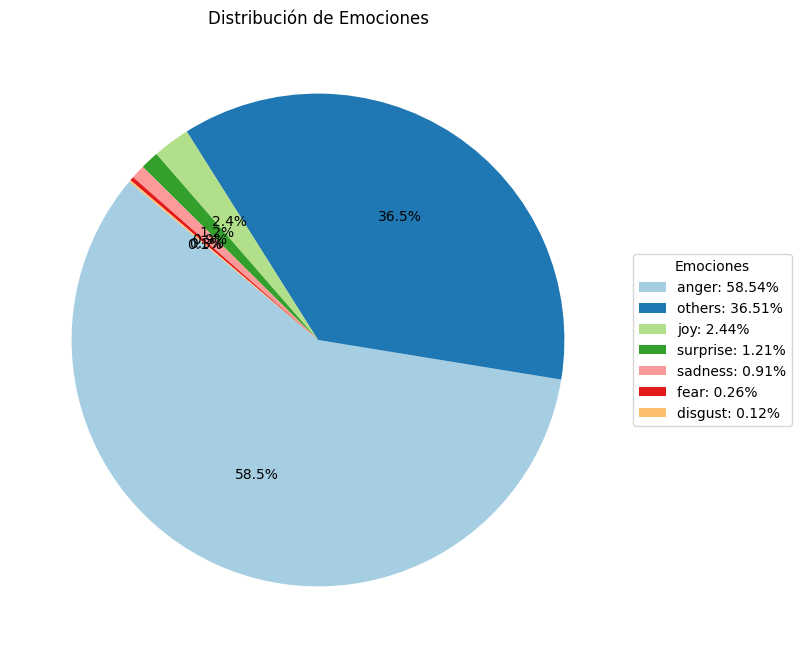

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_emotion_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Emociones")
legend_labels = [f"{emotion}: {percentage:.2f}%" for emotion, percentage in overall_emotion_percentages.items()]
ax.legend(wedges, legend_labels, title="Emociones", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [17]:
print("\nEjemplos de cada tipo de emocion:")
for sent_type, example in examples_per_emotion.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de emocion:
anger: ['@twominbae cállate puta', '@monasterioR @julia_otero Eres patética', '@GretaThunberg Loca del coño', '@outmarina Cállate puta de mierda', '@Valeryth_ Callate puta que te dejo en visto', '@AdaColau HIJA DE PUTA', '@Cannabianol Greta puta', 'Ojalá las feminazis no me den palo por subir este video ??????????? #dolar http://t.co/', 'feminismo=igualdad de hombres y mujeres. feminazi=mujeres que se creen superiores a los hombres. a ver si algún día entienden', '@drummniatico No se vaya asustar! Ese es el gremio de feminazis... el cuartel de las feas, que si le dices preciosas, se ofenden, xq piensa que te le burlas, pues ellas saben que no lo son! http://t.co/']

others: ['@Josumovic Puta Greta', '@GretaThunberg cerda', '@LaFallaras Deja el alcohol cerda', '@LaFallaras @TeruelExiste_ Allí te puedes emborrachas loca alcohólica', 'Lo de feminazi es discutible porque si hay feministas que lo son, por ejemplo, el caso del hombre viejo y ciego entrando 

--------------------------------------------


-----------------------------------------------

### Tweets de misogyny

-----------------------------------------------


In [18]:
text_misogyny = [text for text in df_misocorpus_train[df_misocorpus_train["label"] == 1]["tweet"].tolist()]
results_emotion_analysis_misogyny = [analyze_emotion(text) for text in tqdm(text_misogyny)]

  0%|          | 5/2237 [00:00<00:50, 44.25it/s]


-----------------------
Texto analizado: @twominbae cállate puta
Emoción detectada: anger
Probabilidades: {'others': 0.14342743158340454, 'joy': 0.00926901027560234, 'sadness': 0.00928592775017023, 'anger': 0.7791018486022949, 'surprise': 0.007691467646509409, 'disgust': 0.04681115224957466, 'fear': 0.004413192626088858}

-----------------------
Texto analizado: @Josumovic Puta Greta
Emoción detectada: others
Probabilidades: {'others': 0.42826569080352783, 'joy': 0.07592540979385376, 'sadness': 0.007955201901495457, 'anger': 0.3239198327064514, 'surprise': 0.12654846906661987, 'disgust': 0.02564055658876896, 'fear': 0.011744913645088673}

-----------------------
Texto analizado: @monasterioR @julia_otero Eres patética
Emoción detectada: anger
Probabilidades: {'others': 0.027603885158896446, 'joy': 0.0021540429443120956, 'sadness': 0.007713479921221733, 'anger': 0.8339317440986633, 'surprise': 0.0018839642871171236, 'disgust': 0.124918632209301, 'fear': 0.0017941936384886503}

--------

  1%|          | 19/2237 [00:00<00:38, 57.36it/s]


-----------------------
Texto analizado: feminismo=igualdad de hombres y mujeres. feminazi=mujeres que se creen superiores a los hombres. a ver si algún día entienden
Emoción detectada: anger
Probabilidades: {'others': 0.07776384800672531, 'joy': 0.0033827992156147957, 'sadness': 0.019333157688379288, 'anger': 0.8218945264816284, 'surprise': 0.0021176740992814302, 'disgust': 0.0729791447520256, 'fear': 0.0025288478937000036}

-----------------------
Texto analizado: @drummniatico No se vaya asustar! Ese es el gremio de feminazis... el cuartel de las feas, que si le dices preciosas, se ofenden, xq piensa que te le burlas, pues ellas saben que no lo son! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.18129415810108185, 'joy': 0.004189013969153166, 'sadness': 0.01225478295236826, 'anger': 0.6996076703071594, 'surprise': 0.003184744855388999, 'disgust': 0.09571456909179688, 'fear': 0.0037551349960267544}

-----------------------
Texto analizado: @BetoYr A todas esas fe

  1%|▏         | 31/2237 [00:00<00:41, 53.17it/s]


-----------------------
Texto analizado: @LaFallaras @publico_es Cerda!!! Enterate!!! Que se lo ha inventado todo la mamarracha esa!! Que no t enteras!! Q no sirves pan nada!! Trozo de carne putrefacta!!!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.002445053542032838, 'joy': 0.0016656992956995964, 'sadness': 0.0014834899920970201, 'anger': 0.8518000841140747, 'surprise': 0.001222727820277214, 'disgust': 0.13996215164661407, 'fear': 0.001420777989551425}

-----------------------
Texto analizado: @AmirSalva @Bell_2803 @LaSiglo21 Exacto, no tiene nada que ver lo académico, es totalmente absurdo y un abuso. Donde queda la libre expresión? Y las feminazis que vandalizan, ahí no dicen nada, que doble moral.
Emoción detectada: anger
Probabilidades: {'others': 0.002209153026342392, 'joy': 0.0003634220629464835, 'sadness': 0.0031474423594772816, 'anger': 0.9344313740730286, 'surprise': 0.0008818730711936951, 'disgust': 0.058107584714889526, 'fear': 0.0008591742953285575

  2%|▏         | 37/2237 [00:00<00:52, 42.04it/s]


-----------------------
Texto analizado: @aracelidiputada @feminisciencia @fraoneto @MujeresSanas @CeltiusAbogados Y vos sos una feminazi mal cogida que quiere matar bebes porque no quiere que otras mujeres sean madres, mucha sororidad pero las verdes como vos le desean la muerte a las pañuelos celestes
Emoción detectada: anger
Probabilidades: {'others': 0.004809902980923653, 'joy': 0.0019274312071502209, 'sadness': 0.0061111063696444035, 'anger': 0.8060374855995178, 'surprise': 0.0009371887426823378, 'disgust': 0.17899411916732788, 'fear': 0.0011827351991087198}

-----------------------
Texto analizado: @ZuluagaCamila Porque sera que las feminazis son tan feas . sera que compensan eso con al estupidez.
Emoción detectada: anger
Probabilidades: {'others': 0.038732290267944336, 'joy': 0.0011564253363758326, 'sadness': 0.009795782156288624, 'anger': 0.71559739112854, 'surprise': 0.014338111504912376, 'disgust': 0.2090774029493332, 'fear': 0.011302613653242588}

-----------------------
Te

  2%|▏         | 44/2237 [00:00<00:47, 46.15it/s]


-----------------------
Texto analizado: @Fercgas ?????remera para volver locas (más de lo que estan) a las feminazis
Emoción detectada: others
Probabilidades: {'others': 0.7739087343215942, 'joy': 0.007699671667069197, 'sadness': 0.0030866211745887995, 'anger': 0.05488783121109009, 'surprise': 0.13071145117282867, 'disgust': 0.01800384186208248, 'fear': 0.011701837182044983}

-----------------------
Texto analizado: Bueno. En mi sana, pero discutible opinión, se fue de las manos, y esto ya no es feminismo. 1️⃣ Esto es = propaganda feminazi 2️⃣ Como hombre-feminista, considero q así no se lucha 3️⃣ A los fans años nos ha gustado SW, conociendo de féminas guerridas y ya 4️⃣ Esto aumentaría el odio http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.3217475414276123, 'joy': 0.0034174101892858744, 'sadness': 0.09615860134363174, 'anger': 0.5159119963645935, 'surprise': 0.0014199381694197655, 'disgust': 0.06010811775922775, 'fear': 0.0012364706490188837}

------------------

  2%|▏         | 49/2237 [00:01<01:02, 35.07it/s]


-----------------------
Texto analizado: Feminazi enferma, que el infeliz ese ponga primera y arranque,ya sabe lo que le espera http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.003874537069350481, 'joy': 0.0012535949936136603, 'sadness': 0.0024341873358935118, 'anger': 0.6741392016410828, 'surprise': 0.0020126469898968935, 'disgust': 0.31325414776802063, 'fear': 0.0030316754709929228}

-----------------------
Texto analizado: La primera parada de transporte público equipada con cristales anti feminazis. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9737617373466492, 'joy': 0.007170789409428835, 'sadness': 0.0004184419522061944, 'anger': 0.0007501550717279315, 'surprise': 0.015713095664978027, 'disgust': 0.0005667908117175102, 'fear': 0.0016188937006518245}

-----------------------
Texto analizado: De lo parte la feminazi puede irse la casa de la gabardina, que manera de joder y hacerse notar con ridiculeces, a parte q la tipa es verdaderamente f

  2%|▏         | 54/2237 [00:01<01:18, 27.98it/s]


-----------------------
Texto analizado: @LaFallaras Estás loca de remate.
Emoción detectada: others
Probabilidades: {'others': 0.6241205930709839, 'joy': 0.003924078773707151, 'sadness': 0.0068850223906338215, 'anger': 0.09989084303379059, 'surprise': 0.19888927042484283, 'disgust': 0.04602682217955589, 'fear': 0.020263366401195526}

-----------------------
Texto analizado: @AdaColau Perra!
Emoción detectada: others
Probabilidades: {'others': 0.5902694463729858, 'joy': 0.23231737315654755, 'sadness': 0.008236194029450417, 'anger': 0.05924892798066139, 'surprise': 0.09415192157030106, 'disgust': 0.008678608573973179, 'fear': 0.007097507826983929}

-----------------------
Texto analizado: @SinEmbargoMX greta la loca
Emoción detectada: others
Probabilidades: {'others': 0.8270168304443359, 'joy': 0.0479092039167881, 'sadness': 0.0021465118043124676, 'anger': 0.001659486093558371, 'surprise': 0.11426152288913727, 'disgust': 0.001404307782649994, 'fear': 0.00560214975848794}

-------------

  3%|▎         | 61/2237 [00:01<01:28, 24.71it/s]


-----------------------
Texto analizado: Qué tiro con las feminazis las matamos o qué???
Emoción detectada: others
Probabilidades: {'others': 0.3789342939853668, 'joy': 0.018304232507944107, 'sadness': 0.005654138512909412, 'anger': 0.23424164950847626, 'surprise': 0.2800615131855011, 'disgust': 0.05718638747930527, 'fear': 0.02561771683394909}

-----------------------
Texto analizado: HORROOOOOOR está casi calato con su gorro de policía y su diploma tapando su órgano genital. Ayyy y sus tetillas, quémenlo como a las feminazis que se quitan el brasier para protestar. #Sarcasm Pd. Doble moral everywhere http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.003918550908565521, 'joy': 0.0005482091219164431, 'sadness': 0.0017803068039938807, 'anger': 0.9287194013595581, 'surprise': 0.0008562836446799338, 'disgust': 0.06320468336343765, 'fear': 0.0009725124109536409}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Hola Sra. patética .. IGUALDAD ¿

  3%|▎         | 64/2237 [00:01<01:30, 23.97it/s]


-----------------------
Texto analizado: Las mujeres en aras de la igualdad, deberían trabajar de linearas en la @CNEL_EP como los hombres. #Feminazis
Emoción detectada: others
Probabilidades: {'others': 0.8799360394477844, 'joy': 0.001020232099108398, 'sadness': 0.005364862270653248, 'anger': 0.0976046696305275, 'surprise': 0.0035548575688153505, 'disgust': 0.010330344550311565, 'fear': 0.0021890620701014996}

-----------------------
Texto analizado: @Josefina_28 Otra feminazi. Creyendo que matando al mensajero arregla el problema. Lástima que el PUCP hicieron pésimo trabajo consigo. Todas tus apostillas tienes millones de apostillas más q las dejan sin piso. Ilústrate , luego critica.
Emoción detectada: anger
Probabilidades: {'others': 0.004339776933193207, 'joy': 0.0006193961016833782, 'sadness': 0.005299163516610861, 'anger': 0.8988587260246277, 'surprise': 0.0006996790762059391, 'disgust': 0.08941616117954254, 'fear': 0.0007670519989915192}

-----------------------
Texto analizad

  3%|▎         | 70/2237 [00:02<01:40, 21.59it/s]


-----------------------
Texto analizado: @kaguilar19 @diegovr29 @OscarUlloa88 Censurando las opiniones de los demás, pero después no quieren que les digan feminazis ?
Emoción detectada: anger
Probabilidades: {'others': 0.016519978642463684, 'joy': 0.001187319285236299, 'sadness': 0.003872328670695424, 'anger': 0.8928544521331787, 'surprise': 0.002773694694042206, 'disgust': 0.08036720752716064, 'fear': 0.0024250028654932976}

-----------------------
Texto analizado: Soñe que me linchaban 1.000 feminazis jaja Lo hermoso fue haberlas hechos enojar??
Emoción detectada: others
Probabilidades: {'others': 0.7227097749710083, 'joy': 0.09634663909673691, 'sadness': 0.029490603134036064, 'anger': 0.03355938196182251, 'surprise': 0.0732087790966034, 'disgust': 0.03245742246508598, 'fear': 0.012227346189320087}

-----------------------
Texto analizado: @cayetanaAT Patetica.
Emoción detectada: anger
Probabilidades: {'others': 0.0429731085896492, 'joy': 0.004578432999551296, 'sadness': 0.010198260

  3%|▎         | 73/2237 [00:02<01:52, 19.26it/s]


-----------------------
Texto analizado: @salartesoro No soy anti lgtb...no me molestan...ni me preocupan, son menos peligrosos que las extremistas feminazis y aborteras.
Emoción detectada: others
Probabilidades: {'others': 0.36908602714538574, 'joy': 0.029687313362956047, 'sadness': 0.014057314954698086, 'anger': 0.3656177520751953, 'surprise': 0.002280476037412882, 'disgust': 0.20080222189426422, 'fear': 0.018468845635652542}

-----------------------
Texto analizado: @nomadagt Y empieza de nuevo el lobby feminazi
Emoción detectada: others
Probabilidades: {'others': 0.9230103492736816, 'joy': 0.003621763316914439, 'sadness': 0.0011138520203530788, 'anger': 0.028263887390494347, 'surprise': 0.03232681751251221, 'disgust': 0.007132314145565033, 'fear': 0.004530944861471653}

-----------------------
Texto analizado: @LaFallaras No, payasa, lo que te están diciendo que porque no te ofendes con todos por igual??? Solo defiendes el machismo nada más, el resto de víctimas las ignoras, payas

  4%|▎         | 79/2237 [00:02<01:49, 19.79it/s]


-----------------------
Texto analizado: @LaFallaras @ContadorAltsasu Ojala sean muchos mas y contigo dentro pa q te manoseen un poco, cerda!!!!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.03520786762237549, 'joy': 0.00528681231662631, 'sadness': 0.005069517996162176, 'anger': 0.7842846512794495, 'surprise': 0.0017644577892497182, 'disgust': 0.16574148833751678, 'fear': 0.0026452180463820696}

-----------------------
Texto analizado: @WolffWaldo Y algunas idiotas feminazis quieren quemar la Catedral donde descansan sus restos. Estamos condenados
Emoción detectada: anger
Probabilidades: {'others': 0.0011864486150443554, 'joy': 0.0005565831670537591, 'sadness': 0.005062033422291279, 'anger': 0.7646173238754272, 'surprise': 0.0007151360041461885, 'disgust': 0.22618883848190308, 'fear': 0.0016736298566684127}

-----------------------
Texto analizado: @arquitecta Felicidades! Te salió la carta feminazi! Con cada acto que realices en el próximo año, estarás ayudando 

  4%|▎         | 83/2237 [00:02<01:33, 22.94it/s]


-----------------------
Texto analizado: @xeanort99 Sí, y que la menor se invente lo que quiera para condenarles a 38 años de cárcel, todo ok también. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.6043570637702942, 'joy': 0.0035048858262598515, 'sadness': 0.010476426221430302, 'anger': 0.32499954104423523, 'surprise': 0.006936405319720507, 'disgust': 0.04615889862179756, 'fear': 0.0035667659249156713}

-----------------------
Texto analizado: @Alvisepf Vamos, femilocas, que lo del #Arandina se queda corto con esto.
Emoción detectada: anger
Probabilidades: {'others': 0.3326317071914673, 'joy': 0.003175107529386878, 'sadness': 0.009802262298762798, 'anger': 0.5512563586235046, 'surprise': 0.03495175018906593, 'disgust': 0.06081802397966385, 'fear': 0.007364833261817694}

-----------------------
Texto analizado: A todas las locas del color que no son capaces de ir hacer manifestaciones #Manresa en vez de presumir de #Feminismo, deberíais decir que lo único que queré

  4%|▍         | 89/2237 [00:03<01:40, 21.46it/s]


-----------------------
Texto analizado: Las FEMINAZIS buscan "igualdad" dónde ya existe,donde hay VERDADERA DESIGUALDAD los emiratos árabes, Marruecos etc y xq no van allá??NO buscan igualdad sino PRIVILEGIOS y a mi MUJER NO ME REPRESENTAN!! contra las FEMINAZIS.. #TodAsSomosLaResistencia !! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.012240004725754261, 'joy': 0.0018464571330696344, 'sadness': 0.006812822539359331, 'anger': 0.9119107723236084, 'surprise': 0.0007306119077838957, 'disgust': 0.06573698669672012, 'fear': 0.0007222629501484334}

-----------------------
Texto analizado: @LuisitoAnton Escorias de la humanidad estás feminazis.
Emoción detectada: anger
Probabilidades: {'others': 0.0025611110031604767, 'joy': 0.0008475732174701989, 'sadness': 0.0033473162911832333, 'anger': 0.7563623189926147, 'surprise': 0.0016749060014262795, 'disgust': 0.23307843506336212, 'fear': 0.0021283302921801805}

-----------------------
Texto analizado: @EsK198 @kislingerluis

  4%|▍         | 92/2237 [00:03<01:46, 20.13it/s]


-----------------------
Texto analizado: @carlosdanoz @vox_es El feminismo no es justicia. Y lo que ha ocurrido con la sentencia de arandina es feminismo.
Emoción detectada: anger
Probabilidades: {'others': 0.09074155241250992, 'joy': 0.0013747605262324214, 'sadness': 0.03537530079483986, 'anger': 0.7550634145736694, 'surprise': 0.001596860820427537, 'disgust': 0.11363532394170761, 'fear': 0.00221275701187551}

-----------------------
Texto analizado: Quiero ver a aquellas feminazis que van casi empelotas en sus marchas, usando hiyab y totalmente sometidas. Muy lindo hablar y bailar, pero la realidad es otra y no veo a ninguna de ellas ayudando a las iraníes. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.016393516212701797, 'joy': 0.0008679850143380463, 'sadness': 0.007413427345454693, 'anger': 0.8538118004798889, 'surprise': 0.0013092728331685066, 'disgust': 0.1177888885140419, 'fear': 0.0024150542449206114}

-----------------------
Texto analizado: @Diameuwu1 CA

  5%|▍         | 105/2237 [00:03<00:59, 35.95it/s]


-----------------------
Texto analizado: @xavogomez @mariapaularomo @DNI90637912 @TVCElComercioTv @tctelevision @teleamazonasec @Gamavisionecu @EcuavisaInforma ESO DEBEN PREOCUPARSE NO DE DARLE OIDO A UNA FACISTA FEMINAZI DE SU CIRCULO DE AMISTADES
Emoción detectada: anger
Probabilidades: {'others': 0.14084313809871674, 'joy': 0.0035869365092366934, 'sadness': 0.007596615701913834, 'anger': 0.7390409708023071, 'surprise': 0.0011865253327414393, 'disgust': 0.10471786558628082, 'fear': 0.0030279429629445076}

-----------------------
Texto analizado: @Soulshinebb callate puta tragaleche
Emoción detectada: anger
Probabilidades: {'others': 0.061027541756629944, 'joy': 0.003737466409802437, 'sadness': 0.002385489409789443, 'anger': 0.8535241484642029, 'surprise': 0.0031691209878772497, 'disgust': 0.07314212620258331, 'fear': 0.0030140774324536324}

-----------------------
Texto analizado: @al99ba18 Cuidado Alba, que pueden ser violadas por los gallos y como se enteren las feminazis, te la l

  6%|▌         | 124/2237 [00:03<00:35, 59.66it/s]


-----------------------
Texto analizado: @emartineztv Otra palabras más para el diccionario de palabras ofensivas a las feminazi.
Emoción detectada: others
Probabilidades: {'others': 0.9754307866096497, 'joy': 0.0012517982395365834, 'sadness': 0.0016791803063824773, 'anger': 0.016718946397304535, 'surprise': 0.002086282940581441, 'disgust': 0.0022990116849541664, 'fear': 0.0005339806666597724}

-----------------------
Texto analizado: Quieren imponer la jerga feminazi. Carmen Calvo insiste y la RAE aborda el lenguaje inclusivo en la Constitución http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9916506409645081, 'joy': 0.0006049127550795674, 'sadness': 0.0007387697696685791, 'anger': 0.003978703171014786, 'surprise': 0.001405282411724329, 'disgust': 0.0009043421596288681, 'fear': 0.0007172177429310977}

-----------------------
Texto analizado: Mientras las feminazis juzgan Twitter hace su magia http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.97382

  6%|▋         | 144/2237 [00:04<00:27, 76.10it/s]


-----------------------
Texto analizado: @shababaty Y xq no van alla las feminazis a cantar y bailar en pelotas?? Ahhh es q son feminazis pero no cojudos alla las revientan
Emoción detectada: anger
Probabilidades: {'others': 0.04668862372636795, 'joy': 0.001353429863229394, 'sadness': 0.005042107775807381, 'anger': 0.8554193377494812, 'surprise': 0.0031192449387162924, 'disgust': 0.08586014807224274, 'fear': 0.0025170552544295788}

-----------------------
Texto analizado: Le arruinaron las vacaciones, malditas feminazis! Otra víctima más :’( se me estruja el calzoncillo http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0014003043761476874, 'joy': 0.0008365719113498926, 'sadness': 0.023930586874485016, 'anger': 0.835414707660675, 'surprise': 0.0011923832353204489, 'disgust': 0.13462792336940765, 'fear': 0.0025975420139729977}

-----------------------
Texto analizado: @rouco64 @Delamasa123 Estos cobardes jueces progres q adoptan por presión, como con la LIVG, las ideas 

  7%|▋         | 164/2237 [00:04<00:24, 85.34it/s]


-----------------------
Texto analizado: Bonito expresar una opinión sin ser ofendido por ¡#twitter, #Feminazis, #politicos, #23Dic, #twitternoesreddeodio ! Triste leer comentarios sobre twits que no gustan y acosar al que expreso su idea, muy triste. Seamos mas gente y menos ofensivos ?. Comprensión por favor ?
Emoción detectada: anger
Probabilidades: {'others': 0.013027803041040897, 'joy': 0.0017443344695493579, 'sadness': 0.09960891306400299, 'anger': 0.8193137049674988, 'surprise': 0.0004706059698946774, 'disgust': 0.06491341441869736, 'fear': 0.0009211997385136783}

-----------------------
Texto analizado: Es su gran oportunidad Masistas y Feminazis de unirse en Mordor! ? ? ? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.17428043484687805, 'joy': 0.0037642200477421284, 'sadness': 0.011329428292810917, 'anger': 0.5397382974624634, 'surprise': 0.06523698568344116, 'disgust': 0.19292715191841125, 'fear': 0.01272344309836626}

-----------------------
Texto analiz

  8%|▊         | 183/2237 [00:04<00:23, 86.91it/s]


-----------------------
Texto analizado: Una féminazi ver a ver esto y se le va a salir un ojo ?? http://t.co/
Emoción detectada: surprise
Probabilidades: {'others': 0.32058414816856384, 'joy': 0.004309970885515213, 'sadness': 0.0021853442303836346, 'anger': 0.004721165169030428, 'surprise': 0.6375348567962646, 'disgust': 0.004811706952750683, 'fear': 0.02585279755294323}

-----------------------
Texto analizado: @HelenaTunon @annapratx Que frágil tenés que ser para volverte una feminazi resentida con todos los hombres por una mala experiencia
Emoción detectada: anger
Probabilidades: {'others': 0.006619973108172417, 'joy': 0.0009426450124010444, 'sadness': 0.01050642691552639, 'anger': 0.8027734160423279, 'surprise': 0.0016666727606207132, 'disgust': 0.17503251135349274, 'fear': 0.0024583926424384117}

-----------------------
Texto analizado: @pametroya @AndreaRivera_V Eres feminazi de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.005924005527049303, 'joy': 0.0015458187

  9%|▉         | 202/2237 [00:04<00:23, 88.00it/s]


-----------------------
Texto analizado: Esta es una bruja sin escrúpulos, cuando una lesbiana mata a su compañera ella dice que lo hizo por que reproduce conductas machistas. No acabas de entender que el asesino es asesino sin importar su género #Feminazi #silvita http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.002515720436349511, 'joy': 0.0007202471024356782, 'sadness': 0.002075743395835161, 'anger': 0.840083122253418, 'surprise': 0.0012567563680931926, 'disgust': 0.15211482346057892, 'fear': 0.0012336273211985826}

-----------------------
Texto analizado: @Sharon_moreno1 Jajaja cállate puta ?
Emoción detectada: others
Probabilidades: {'others': 0.810591995716095, 'joy': 0.022283529862761497, 'sadness': 0.0041831182315945625, 'anger': 0.11573553085327148, 'surprise': 0.02873625047504902, 'disgust': 0.01633717492222786, 'fear': 0.0021324187982827425}

-----------------------
Texto analizado: @NOmasCNE Si Madonna le pega un puñetazo a un hombre porque le jala el bra

 10%|▉         | 221/2237 [00:04<00:22, 89.42it/s]


-----------------------
Texto analizado: @LaFallaras @CristinaSegui_ @alfonso_ussia @bertrandmyd @publico_es La pregunta es ¿Por qué os fastidia tanto que se difundan los audios? ¿No será porque desmonta todo vuestro chiringuito feminazi de creer a la mujer porque sí aunque mienta y condenar a inocentes?
Emoción detectada: anger
Probabilidades: {'others': 0.001883451477624476, 'joy': 0.00046342736459337175, 'sadness': 0.001637336565181613, 'anger': 0.9305880069732666, 'surprise': 0.0007188681629486382, 'disgust': 0.0636109933257103, 'fear': 0.001097835716791451}

-----------------------
Texto analizado: Es una pena que @realDonaldTrump desperdicie un tweet en esa loca. ¿Acaso el presidente Trump no sabe, que Greta sólo quiere llamar su atención? Él debería ignorarla. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.04930269718170166, 'joy': 0.0012966662179678679, 'sadness': 0.12716509401798248, 'anger': 0.6872702836990356, 'surprise': 0.0015273967292159796, 'disgust'

 11%|█         | 241/2237 [00:05<00:21, 91.86it/s]


-----------------------
Texto analizado: Así es!. Por ejemplo, ud es preciosa mi estimada exEscoria. Yo te veo en la calle y te lanzo tu piropito, así se cabree mi esposa jaja. Estot convencido que la feminazi a quién le cabrea que le digan preciosa tiene una razón de peso diferente al irrespeto que reclama. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.28744786977767944, 'joy': 0.022317921742796898, 'sadness': 0.01989920251071453, 'anger': 0.6250795722007751, 'surprise': 0.002926603192463517, 'disgust': 0.04117567092180252, 'fear': 0.0011531808413565159}

-----------------------
Texto analizado: @ildalucero @infobae Estamos hablando de estas "cosas" que piensan que los gallos violan a las gallinas y dan este tipo deplorable de espectáculo. Entiendo el reclamo pero vamos de un extremo machista al otro feminazi Ambos 100% agresivos para con el otro. Asco producen.
Emoción detectada: anger
Probabilidades: {'others': 0.002399970544502139, 'joy': 0.0004511153092607856

 12%|█▏        | 261/2237 [00:05<00:21, 93.96it/s]


-----------------------
Texto analizado: @Yarelis36210579 @jguaido Cállate puta defiendes lo indefendible ese cabron nos entrego y gente decerebrada como tú igual lo apoya pendeja, anda y le lo coges pero asegúrate que te lleve a dominicana o a Oslo y barbados en el próximo diálogo mmgva
Emoción detectada: anger
Probabilidades: {'others': 0.005937174428254366, 'joy': 0.0008365586400032043, 'sadness': 0.0024603495839983225, 'anger': 0.9275005459785461, 'surprise': 0.0009485003538429737, 'disgust': 0.06111614778637886, 'fear': 0.0012006920296698809}

-----------------------
Texto analizado: @DioCinicoXXX JAJAJAJJAJAJJAJAJA BRUJA FEMINAZI JAJAJJAJAJAJA Me encanta.
Emoción detectada: joy
Probabilidades: {'others': 0.10885503143072128, 'joy': 0.8362274169921875, 'sadness': 0.0009963110787793994, 'anger': 0.0021251493599265814, 'surprise': 0.04663868620991707, 'disgust': 0.0025912479031831026, 'fear': 0.0025661734398454428}

-----------------------
Texto analizado: @Larrydimick @javifrance 

 13%|█▎        | 281/2237 [00:05<00:21, 91.36it/s]


-----------------------
Texto analizado: @elcomercio_peru Y ahora que dirán las féminazis se quedaron sin caballito de batalla!!!
Emoción detectada: others
Probabilidades: {'others': 0.8360233306884766, 'joy': 0.0041905478574335575, 'sadness': 0.0030857010278850794, 'anger': 0.003779879305511713, 'surprise': 0.14609122276306152, 'disgust': 0.0019178546499460936, 'fear': 0.004911559633910656}

-----------------------
Texto analizado: Video gráfico de como se deben tratar a las feminazi violentistas #Peru #Chile #Argentina #FemiNazis http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9879535436630249, 'joy': 0.0005217573489062488, 'sadness': 0.0014463560655713081, 'anger': 0.00573556637391448, 'surprise': 0.0011127968318760395, 'disgust': 0.0014562590513378382, 'fear': 0.0017736238660290837}

-----------------------
Texto analizado: @LaFallaras Tu lo que eres una loca histérica, sin ofender a los locos.
Emoción detectada: others
Probabilidades: {'others': 0.509667634963

 13%|█▎        | 301/2237 [00:05<00:21, 92.19it/s]


-----------------------
Texto analizado: @Ivaeel Y no viste como les dí como bombo en fiesta a las feminazis ????
Emoción detectada: others
Probabilidades: {'others': 0.7327046394348145, 'joy': 0.007188690360635519, 'sadness': 0.005582815036177635, 'anger': 0.17945410311222076, 'surprise': 0.039107076823711395, 'disgust': 0.0331747941672802, 'fear': 0.0027878840919584036}

-----------------------
Texto analizado: @MagalyTvLaFirme @atvpe mantenida de mierda.... en su caso las feminazis que dirán..?? igualdad de genero jaajaj chistosa
Emoción detectada: anger
Probabilidades: {'others': 0.11500048637390137, 'joy': 0.0093114348128438, 'sadness': 0.006718037649989128, 'anger': 0.7346276640892029, 'surprise': 0.004708151798695326, 'disgust': 0.1278720647096634, 'fear': 0.001762158120982349}

-----------------------
Texto analizado: @monasterioR Y además hija de zorra.
Emoción detectada: anger
Probabilidades: {'others': 0.007090347353368998, 'joy': 0.0027671498246490955, 'sadness': 0.0025262

 14%|█▍        | 321/2237 [00:05<00:20, 93.32it/s]


-----------------------
Texto analizado: @CNNEE Ja luego vio toda la puta lana que se puede mamar haciéndole al pendejo con un activismo estúpido como el que hace la idiota de su hija @GretaThunberg y fué ahí donde decidió ayudarla!!!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.004101949278265238, 'joy': 0.0011986657045781612, 'sadness': 0.00320674036629498, 'anger': 0.9358676075935364, 'surprise': 0.0011965037556365132, 'disgust': 0.0538051500916481, 'fear': 0.0006233998574316502}

-----------------------
Texto analizado: @nissulo26 @reygorila26 Javi, Greta Thunberg esta tan loca porque jugó a flower, fíjate si tiene mensaje.
Emoción detectada: others
Probabilidades: {'others': 0.9826822280883789, 'joy': 0.0035351163242012262, 'sadness': 0.0016027287347242236, 'anger': 0.0011537561658769846, 'surprise': 0.009291743859648705, 'disgust': 0.0006550970720127225, 'fear': 0.0010794015834107995}

-----------------------
Texto analizado: @LaFallaras @__pbl Queda claro. Estás loc

 15%|█▌        | 341/2237 [00:06<00:20, 94.23it/s]


-----------------------
Texto analizado: @nataparrag @Veraconce @JuanaSanhuezaR2 @PedroLarach @patricionavia Es usted feminista y apoya la anarquía? Eso encaja en la perfecta definición de feminazi. No respetan pero exigen respeto. Yo seré un lorito pero usted solo es un burdo cliché
Emoción detectada: anger
Probabilidades: {'others': 0.014679907821118832, 'joy': 0.0012011949438601732, 'sadness': 0.004496490117162466, 'anger': 0.8471552133560181, 'surprise': 0.0011549096088856459, 'disgust': 0.130024254322052, 'fear': 0.0012880945578217506}

-----------------------
Texto analizado: Sin vergüenza . Feminazi de mierda http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0026117118541151285, 'joy': 0.001016171183437109, 'sadness': 0.0015852334909141064, 'anger': 0.8335573077201843, 'surprise': 0.001236346666701138, 'disgust': 0.15851658582687378, 'fear': 0.0014766209060326219}

-----------------------
Texto analizado: Se salvan esas feminazis, de yo no estar ahí. Porque me 

 16%|█▌        | 361/2237 [00:06<00:21, 87.95it/s]


-----------------------
Texto analizado: @jsanchezcristo Ahora las femilocas y feminazis, con que van a salir?!
Emoción detectada: anger
Probabilidades: {'others': 0.062279220670461655, 'joy': 0.006589422933757305, 'sadness': 0.004137044306844473, 'anger': 0.4155215620994568, 'surprise': 0.36970025300979614, 'disgust': 0.08920414000749588, 'fear': 0.05256837233901024}

-----------------------
Texto analizado: @Guille_Sero Que paso! Varon... Relájese. Por usted luego las feminazis tienen mil motivos de hacerse más agresivas.
Emoción detectada: others
Probabilidades: {'others': 0.760822594165802, 'joy': 0.004872557707130909, 'sadness': 0.008247355930507183, 'anger': 0.19162923097610474, 'surprise': 0.014561226591467857, 'disgust': 0.016819432377815247, 'fear': 0.003047648351639509}

-----------------------
Texto analizado: #Feminazi en acción. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9839650392532349, 'joy': 0.0010210294276475906, 'sadness': 0.0004842691414523

 17%|█▋        | 370/2237 [00:06<00:24, 75.60it/s]


-----------------------
Texto analizado: @Dator33 @realjuca @PoliciaEcuador Se imagina un "encuentro" entre Jorgito y una Feminazi? Eso tendría un final épico!
Emoción detectada: others
Probabilidades: {'others': 0.8265975713729858, 'joy': 0.03383851423859596, 'sadness': 0.00488622672855854, 'anger': 0.0031609651632606983, 'surprise': 0.12358830869197845, 'disgust': 0.00444953516125679, 'fear': 0.0034789456985890865}

-----------------------
Texto analizado: @locacomotumadre Jajaja así esta bien? Feminazi PELOTUDA? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.37537866830825806, 'joy': 0.00871194526553154, 'sadness': 0.00922715850174427, 'anger': 0.4221656024456024, 'surprise': 0.05104639381170273, 'disgust': 0.12884756922721863, 'fear': 0.004622738342732191}

-----------------------
Texto analizado: @LaFallaras Tu si que eres gilipollas, bastarda de mierda. Eres un despojo.
Emoción detectada: anger
Probabilidades: {'others': 0.0019371986854821444, 'joy': 0.001600

 17%|█▋        | 386/2237 [00:06<00:25, 71.38it/s]


-----------------------
Texto analizado: @aleja_zv @CookieOfAvocado @DrBadalassi Vega tía feminazi, la que se mete y busca atención eres tú. ¿Andas necesitada? ?
Emoción detectada: others
Probabilidades: {'others': 0.9176099896430969, 'joy': 0.0033047772012650967, 'sadness': 0.004556560423225164, 'anger': 0.0447731539607048, 'surprise': 0.011782193556427956, 'disgust': 0.01163886021822691, 'fear': 0.006334500852972269}

-----------------------
Texto analizado: @LaFallaras @cuatroaldia Más bien eres una borrach y loca..
Emoción detectada: others
Probabilidades: {'others': 0.8240484595298767, 'joy': 0.0034329930786043406, 'sadness': 0.021563909947872162, 'anger': 0.08606186509132385, 'surprise': 0.006145302206277847, 'disgust': 0.05297091230750084, 'fear': 0.005776581354439259}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Estás loca!!!!
Emoción detectada: others
Probabilidades: {'others': 0.6004619598388672, 'joy': 0.023762868717312813, 'sadness': 0.004

 18%|█▊        | 402/2237 [00:07<00:25, 71.57it/s]


-----------------------
Texto analizado: De repente veo que valeria mazza es atacada por una horda de #Feminazis por que fue elegida para narrar un documental sobre la mujer por #natgeo..? #Jueves
Emoción detectada: others
Probabilidades: {'others': 0.7495154738426208, 'joy': 0.0018880562856793404, 'sadness': 0.006886121351271868, 'anger': 0.009165427647531033, 'surprise': 0.20585165917873383, 'disgust': 0.009074579924345016, 'fear': 0.01761866733431816}

-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Mira payasa, lo que defiende es la presunción de inocencia y no que tú y otras tantas descerebradas anden haciendo la justicia por su lado con presión mediática y política. Es una chica que les amenazó con mentir si contaban algo y ale, ahí lo tienes.
Emoción detectada: anger
Probabilidades: {'others': 0.003157036378979683, 'joy': 0.0007313096430152655, 'sadness': 0.001815947936847806, 'anger': 0.9106674790382385, 'surprise': 0.0007798515725880861, 'disgust

 19%|█▊        | 418/2237 [00:07<00:26, 69.21it/s]


-----------------------
Texto analizado: @LaFallaras VAYA PERRA AS COGIDO CHICA TE VA DAR ALGO Y TAMBIEN TE DIGO CANSINA CANSINA CANSINA http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.012766086496412754, 'joy': 0.0014735900331288576, 'sadness': 0.0013587134890258312, 'anger': 0.8970528841018677, 'surprise': 0.0015826299786567688, 'disgust': 0.08404965698719025, 'fear': 0.0017164874589070678}

-----------------------
Texto analizado: A ver feminazis las veo hablando del tema... http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9875707626342773, 'joy': 0.0006882815505377948, 'sadness': 0.0009435213869437575, 'anger': 0.0036047641187906265, 'surprise': 0.004664428997784853, 'disgust': 0.0011225000489503145, 'fear': 0.001405635615810752}

-----------------------
Texto analizado: @vanesavallejo3 Así o más claro así se le habla a los vientres secos,resentidas sociales,que quieren llamar la atención ncion con sus estupidas http://t.co/ imbecilidad factor

 19%|█▉        | 426/2237 [00:07<00:25, 70.71it/s]


-----------------------
Texto analizado: @LaFallaras @PeioHR lo que tu no haces porque no hay un ser humano que te meta la polla en ese cuerpo escombro de mierda que tienes......payasa!!!!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0024990756064653397, 'joy': 0.0011845603585243225, 'sadness': 0.001745866728015244, 'anger': 0.8737901449203491, 'surprise': 0.0009672642336227, 'disgust': 0.1185741126537323, 'fear': 0.0012390236370265484}

-----------------------
Texto analizado: Entrar a Twitter y ver todo el show de las feminazis por el piropo del policia? cada vez este mundo está peor, que miedo dan estas mujeres, ahora cualquier estupida se aprovecha de su condición de genero ?
Emoción detectada: anger
Probabilidades: {'others': 0.01025375071913004, 'joy': 0.0015340063255280256, 'sadness': 0.011807234026491642, 'anger': 0.5790770649909973, 'surprise': 0.08828061074018478, 'disgust': 0.2726854085922241, 'fear': 0.03636197745800018}

-----------------------
Text

 20%|█▉        | 442/2237 [00:07<00:25, 69.43it/s]


-----------------------
Texto analizado: @LaFallaras No eres ni lobby ni lobba ni na ,eres tonta , boba maliciosa , además de manipuladora y patética y mi distante de la verdad no porque no la sepas sino porque si la verdad va contra tus ideas la manipulas muy a lo gobbels , amas de el doble w y la fariña pa amasar
Emoción detectada: anger
Probabilidades: {'others': 0.0046568033285439014, 'joy': 0.0011925087310373783, 'sadness': 0.003300428157672286, 'anger': 0.8719544410705566, 'surprise': 0.0007291888468898833, 'disgust': 0.11679152399301529, 'fear': 0.0013751102378591895}

-----------------------
Texto analizado: @iNnFeR_HD @GretaThunberg Normal si es que es una perra esa que no va el colegio la muy fresca
Emoción detectada: others
Probabilidades: {'others': 0.9205338954925537, 'joy': 0.012447893619537354, 'sadness': 0.005002753809094429, 'anger': 0.04344508424401283, 'surprise': 0.005652246065437794, 'disgust': 0.010823857970535755, 'fear': 0.002094204304739833}

-----------------

 20%|██        | 458/2237 [00:07<00:26, 68.40it/s]


-----------------------
Texto analizado: @LaFallaras @populares @CiudadanosCs Eres una payasa !!
Emoción detectada: anger
Probabilidades: {'others': 0.015531012788414955, 'joy': 0.0015516962157562375, 'sadness': 0.0033595343120396137, 'anger': 0.8349291086196899, 'surprise': 0.0025569412391632795, 'disgust': 0.14030322432518005, 'fear': 0.0017685203347355127}

-----------------------
Texto analizado: @LaFallaras Perra judia, no creas que esta mieda de burbuja durará eternamente y no tengas duda de que a cada acción, habrá una reacción.
Emoción detectada: others
Probabilidades: {'others': 0.981391429901123, 'joy': 0.004083519335836172, 'sadness': 0.001984132220968604, 'anger': 0.0016284374287351966, 'surprise': 0.004726705607026815, 'disgust': 0.0009702116367407143, 'fear': 0.005215573590248823}

-----------------------
Texto analizado: @LaFallaras Calla golfa
Emoción detectada: anger
Probabilidades: {'others': 0.42452573776245117, 'joy': 0.01382207777351141, 'sadness': 0.0054731015115

 21%|██        | 472/2237 [00:08<00:26, 66.21it/s]


-----------------------
Texto analizado: @LaFallaras Loca del Coño!!
Emoción detectada: anger
Probabilidades: {'others': 0.0210792925208807, 'joy': 0.0036435644142329693, 'sadness': 0.0020128507167100906, 'anger': 0.90985506772995, 'surprise': 0.010146662592887878, 'disgust': 0.04881356656551361, 'fear': 0.004449039231985807}

-----------------------
Texto analizado: @javier2391 @SaninPazC Feminazi es peyorativo a las feministas modernas locas. Esa es la lógica o doctrina que manejan, a toda muerte de una mujer no le dicen feminicidio?
Emoción detectada: anger
Probabilidades: {'others': 0.014020263217389584, 'joy': 0.0005400590598583221, 'sadness': 0.004240996669977903, 'anger': 0.896885335445404, 'surprise': 0.0021388705354183912, 'disgust': 0.08077213913202286, 'fear': 0.0014022716786712408}

-----------------------
Texto analizado: @IvonneDlp Feminazi horribles
Emoción detectada: anger
Probabilidades: {'others': 0.010208222083747387, 'joy': 0.0016731530195102096, 'sadness': 0.00223

 22%|██▏       | 486/2237 [00:08<00:28, 62.33it/s]


-----------------------
Texto analizado: MACABRA “LÓGICA” PROGRE FEMINAZI: Están a favor del aborto porque “MATAR AL CONCEBIDO ES SU DERECHO” PERO MATAR a un toro es una CRUELDAD hasta protestan en las calles contra las corridas de toros, así son de DIABÓLICAS, INHUMANAS Y CRUELES estás enajenadas mentales, soy #ProVida http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.001110125333070755, 'joy': 0.0006928021321073174, 'sadness': 0.0032506706193089485, 'anger': 0.7927997708320618, 'surprise': 0.0010176609503105283, 'disgust': 0.19936217367649078, 'fear': 0.0017668298678472638}

-----------------------
Texto analizado: Si yo estoy haciendo mi trabajo y viene una "feminista" en una concentración y me daña mi instrumento de trabajo, además de echarme pintura en la cara solo les diré que después va a haber una féminazi menos.
Emoción detectada: anger
Probabilidades: {'others': 0.03020840510725975, 'joy': 0.0011090128682553768, 'sadness': 0.009869716130197048, 'anger': 0.83

 22%|██▏       | 493/2237 [00:08<00:28, 60.59it/s]


-----------------------
Texto analizado: @mujerescreando1 Quién es María Galindo? Es una ardida, basta, feminazi machirulo, adefesia y mil peyorativos más! Se rapa una zona de la cabeza, cubre sus ojeras con carbón para parecer un femi-monstruo y ocultar su desgaste psicoemocional de lo q intenta ser pero solo se queda en caricatura.
Emoción detectada: anger
Probabilidades: {'others': 0.003523792140185833, 'joy': 0.0008442776161246002, 'sadness': 0.0032229810021817684, 'anger': 0.8015831708908081, 'surprise': 0.0011401325464248657, 'disgust': 0.18844470381736755, 'fear': 0.0012408604379743338}

-----------------------
Texto analizado: @saveriovivas Soy mujer y bla bla bla, soy mujer y bla bla bla, soy mujer y bla bla bla bla bla bla.... LOCAS es lo que son las FEMINAZIS con su bla bla bla Comunista de mierda, FEMINAZIS LOCAS ???
Emoción detectada: anger
Probabilidades: {'others': 0.002069943817332387, 'joy': 0.00089124875376001, 'sadness': 0.0011613836977630854, 'anger': 0.90886831283

 23%|██▎       | 509/2237 [00:08<00:25, 68.88it/s]


-----------------------
Texto analizado: @sdaquino Feminazis en vez de orcos.....así se pone más terrorífica la pelicula....
Emoción detectada: others
Probabilidades: {'others': 0.95771723985672, 'joy': 0.006760824006050825, 'sadness': 0.004141907673329115, 'anger': 0.012227347120642662, 'surprise': 0.007884456776082516, 'disgust': 0.005854538641870022, 'fear': 0.005413628648966551}

-----------------------
Texto analizado: @VickosAdventure Hay q tener cuidado con la conexión entre los pensamientos y el área del habla. A mí se me suele escapar un "vieja de mierda" o "¡qué feminazi incogible!".
Emoción detectada: anger
Probabilidades: {'others': 0.2356601059436798, 'joy': 0.0050721000880002975, 'sadness': 0.004137497395277023, 'anger': 0.6033182144165039, 'surprise': 0.029257768765091896, 'disgust': 0.09089595079421997, 'fear': 0.03165833279490471}

-----------------------
Texto analizado: @carelou19 Así es. Hasta vendrán los de las feminazis y demás .
Emoción detectada: others
Probabi

 24%|██▎       | 528/2237 [00:08<00:21, 80.45it/s]


-----------------------
Texto analizado: Una feminazi en pedo http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9654197096824646, 'joy': 0.0026336880400776863, 'sadness': 0.0009725768468342721, 'anger': 0.002178478054702282, 'surprise': 0.024660790339112282, 'disgust': 0.0018854576628655195, 'fear': 0.002249258803203702}

-----------------------
Texto analizado: Jajajaja los jugadores de la sub 17 del América son unos putos cracks ? vaya interpretación del violador eres tú, hasta a mi me dieron ganas de hacer un video de tan majestuosa coreografía feminazi ?
Emoción detectada: others
Probabilidades: {'others': 0.44888556003570557, 'joy': 0.010986382141709328, 'sadness': 0.008870278485119343, 'anger': 0.4049023389816284, 'surprise': 0.04937899857759476, 'disgust': 0.0741472989320755, 'fear': 0.0028291153721511364}

-----------------------
Texto analizado: Respuesta ante tanta feminazi #FelizViernesATodos ¡¡¡ http://t.co/
Emoción detectada: others
Probabilidades: {'oth

 24%|██▍       | 548/2237 [00:09<00:19, 86.66it/s]


-----------------------
Texto analizado: Y disculparan cualquier cosita, cualquier tweet que no les haya gustado.. Este mensaje va para todos menos para las feminazis.. Esas locas de mierda bien merecido se tienen cada palabra emitida ?
Emoción detectada: anger
Probabilidades: {'others': 0.003896579844877124, 'joy': 0.000645999563857913, 'sadness': 0.0017791751306504011, 'anger': 0.9141284823417664, 'surprise': 0.0011465023271739483, 'disgust': 0.07713910192251205, 'fear': 0.0012641099747270346}

-----------------------
Texto analizado: Viendo el vídeo me coloco en su lugar y reaccionaria casi igual. Me estoy retirando y me agarran y jalan con brusquedad, claro que molesta además le dió un manoton como a los niños que hacen mal. Dejen la paja que es mujer y toda la sarta de tonterías feminazis. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.005495983175933361, 'joy': 0.0005506682791747153, 'sadness': 0.002153298119083047, 'anger': 0.9330509901046753, 'surprise': 0.

 25%|██▌       | 568/2237 [00:09<00:18, 89.14it/s]


-----------------------
Texto analizado: @yosoyandrepro @lanena_dh Ustedes son las que crearon una canción ridícula, con la cual no han salvado ni una sola mujer. Más bien hacen un baile de algo tan delicado como la violación, dan asco como feminazis.
Emoción detectada: anger
Probabilidades: {'others': 0.001369296107441187, 'joy': 0.0004918390768580139, 'sadness': 0.003676694119349122, 'anger': 0.8386136889457703, 'surprise': 0.000979832955636084, 'disgust': 0.15319818258285522, 'fear': 0.0016704723238945007}

-----------------------
Texto analizado: @Don_Muchin @silvitabuendia Si sras feminazis en este caso les doy la razón hay que matar ao feto. Pero sras feminazis porque no proponen la MUERTE del violador esa si es la solución porque el VIOLADOR seguirá violando osea afectará a mas perosnas y eso jamas lo proponen uds
Emoción detectada: anger
Probabilidades: {'others': 0.01721104048192501, 'joy': 0.0009328246815130115, 'sadness': 0.011865312233567238, 'anger': 0.8433460593223572, '

 26%|██▌       | 587/2237 [00:09<00:18, 90.01it/s]


-----------------------
Texto analizado: Greta la niña "*tonta del bote*". http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9474605321884155, 'joy': 0.022178513929247856, 'sadness': 0.0016092110890895128, 'anger': 0.0067352899350225925, 'surprise': 0.018419597297906876, 'disgust': 0.0022128636483103037, 'fear': 0.001384019386023283}

-----------------------
Texto analizado: @AliencitoKawaii Típico de las FEMINAZIS locas. ?
Emoción detectada: others
Probabilidades: {'others': 0.751382052898407, 'joy': 0.003569746622815728, 'sadness': 0.0048328181728720665, 'anger': 0.1473027914762497, 'surprise': 0.048455074429512024, 'disgust': 0.03620816022157669, 'fear': 0.008249389939010143}

-----------------------
Texto analizado: @ldpsincomplejos Esto es una puta falsa y punto que se metan a greta y sus rabietas por el culo
Emoción detectada: anger
Probabilidades: {'others': 0.00174161815084517, 'joy': 0.0010180182289332151, 'sadness': 0.0010809334926307201, 'anger': 0.8935690

 27%|██▋       | 607/2237 [00:09<00:18, 88.35it/s]


-----------------------
Texto analizado: @negromangueraa @Ironmanmark851 @maykellrumbos1 Dr Black gracias a lo coquetas de las Venezolanas aquí las feminazis son muy poquitas ? no temas
Emoción detectada: others
Probabilidades: {'others': 0.9757794141769409, 'joy': 0.005086696706712246, 'sadness': 0.0042389458976686, 'anger': 0.006160716991871595, 'surprise': 0.00494994455948472, 'disgust': 0.00278370245359838, 'fear': 0.0010005434742197394}

-----------------------
Texto analizado: Pero si es el tino no es acoso? Donde estan las feminazis cuando se les necesita? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.011359098367393017, 'joy': 0.0008680925238877535, 'sadness': 0.0015519879525527358, 'anger': 0.931891143321991, 'surprise': 0.007302501238882542, 'disgust': 0.0451790951192379, 'fear': 0.0018481116276234388}

-----------------------
Texto analizado: @pochoharb1 Otra feminazi ardida.. no hay más explicacion
Emoción detectada: anger
Probabilidades: {'others': 0.

 28%|██▊       | 627/2237 [00:09<00:17, 91.54it/s]


-----------------------
Texto analizado: La Greta cada vez es más gilipollas ?
Emoción detectada: anger
Probabilidades: {'others': 0.02788219042122364, 'joy': 0.004871205426752567, 'sadness': 0.006165322382003069, 'anger': 0.7478650808334351, 'surprise': 0.07613137364387512, 'disgust': 0.12419885396957397, 'fear': 0.01288605760782957}

-----------------------
Texto analizado: @GretaThunberg Sos una pelotuda
Emoción detectada: anger
Probabilidades: {'others': 0.029883110895752907, 'joy': 0.0018182967323809862, 'sadness': 0.005516462493687868, 'anger': 0.7976227402687073, 'surprise': 0.007406629156321287, 'disgust': 0.152307391166687, 'fear': 0.0054453168995678425}

-----------------------
Texto analizado: La GRETA esta no tiene ni puta idea de nada. 16 años y nos viene a dar lecciones? Yo tengo 3 hoteles, contrato a 20 personas diferentes cada medio año, tengo algún empleado con el sueldo mínimo y me va a venir esta a decir tonterías sobre el cambio climático?
Emoción detectada: anger


 29%|██▉       | 647/2237 [00:10<00:17, 93.07it/s]


-----------------------
Texto analizado: La cara de @zaid_solrac cuando ve un tuit de las feminazis http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9791457653045654, 'joy': 0.005845703184604645, 'sadness': 0.0013064100639894605, 'anger': 0.0043814475648105145, 'surprise': 0.005416878964751959, 'disgust': 0.001702306792140007, 'fear': 0.0022014460992068052}

-----------------------
Texto analizado: @bbcmundo Las enfermedades mentales en la mujeres son más frecuentes en la actualidad la moda y las envidias son parte de esa locura las feminazis son locas por el sexo.
Emoción detectada: others
Probabilidades: {'others': 0.65667724609375, 'joy': 0.004749544896185398, 'sadness': 0.026974186301231384, 'anger': 0.2112826704978943, 'surprise': 0.007499743718653917, 'disgust': 0.08308921754360199, 'fear': 0.009727396070957184}

-----------------------
Texto analizado: @perezjuan1962 @Ternurita3103 @PaolaPabonC Desnudarse en la vía pública ahora, las FEMINAZIS también le llam

 30%|██▉       | 667/2237 [00:10<00:16, 93.02it/s]


-----------------------
Texto analizado: @claudia04213250 @javierguzmanu @GustavoBolivar @AntanasMockus Ya somos como él... Lea acerca del Neoliberalismo ignorante feminazi
Emoción detectada: others
Probabilidades: {'others': 0.6722372174263, 'joy': 0.003956377040594816, 'sadness': 0.006834797561168671, 'anger': 0.2618344724178314, 'surprise': 0.0030704964883625507, 'disgust': 0.050546400249004364, 'fear': 0.001520182122476399}

-----------------------
Texto analizado: Quisiera que alguna ex feminista, o mejor dicho, ex feminazi (puede seguir siendo feminista) me cuente su experiencia y cómo se dio su despertar, cómo lo identificó y por qué decidió dejar de ser femimarxi.
Emoción detectada: others
Probabilidades: {'others': 0.986221432685852, 'joy': 0.0012051035882905126, 'sadness': 0.003973293583840132, 'anger': 0.0026432436425238848, 'surprise': 0.002437679562717676, 'disgust': 0.0016827736981213093, 'fear': 0.0018365455325692892}

-----------------------
Texto analizado: Y las femi

 31%|███       | 687/2237 [00:10<00:16, 91.98it/s]


-----------------------
Texto analizado: @GabyGnazzo Si es asi esta bien yo estoy con las feministas no las feminazis q han dañado el movimiento
Emoción detectada: others
Probabilidades: {'others': 0.7751665115356445, 'joy': 0.011944291181862354, 'sadness': 0.02140442654490471, 'anger': 0.14593085646629333, 'surprise': 0.0015459641581401229, 'disgust': 0.04172401875257492, 'fear': 0.0022839470766484737}

-----------------------
Texto analizado: @holasoyvitico @PedroMCasals Y sin dar lástima ni exigir cuotas mínimas solo por ser mujer. Ella sola con su talento personal puede alcanzar cualquier meta q se ponga. Nada de influencias malsanas de resentidas feminazis. Gloria de mujer!
Emoción detectada: anger
Probabilidades: {'others': 0.01424653921276331, 'joy': 0.0032776929438114166, 'sadness': 0.006824217736721039, 'anger': 0.8691821098327637, 'surprise': 0.002111622830852866, 'disgust': 0.10345160961151123, 'fear': 0.000906167202629149}

-----------------------
Texto analizado: Manual d

 32%|███▏      | 707/2237 [00:10<00:17, 89.04it/s]


-----------------------
Texto analizado: Este caso es un claro ejemplo del poder de las ONG progres y feminazis sobre el sistema de justicia. El hombre no tiene ninguna opción para obtener justicia. Es un puro linchamiento feminazi http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.030353838577866554, 'joy': 0.0007767742499709129, 'sadness': 0.00480111176148057, 'anger': 0.8788111805915833, 'surprise': 0.0009285216219723225, 'disgust': 0.08285791426897049, 'fear': 0.00147058826405555}

-----------------------
Texto analizado: @JulietaSagnay @GomezRobertoA @DocLuis_Litardo @EIHuevoNeraId @ElianaCabrera9 @santhros nadie entiende a estas feminazis locas
Emoción detectada: anger
Probabilidades: {'others': 0.20025670528411865, 'joy': 0.008071024902164936, 'sadness': 0.005769459996372461, 'anger': 0.6558071970939636, 'surprise': 0.012857547961175442, 'disgust': 0.11208796501159668, 'fear': 0.005150133278220892}

-----------------------
Texto analizado: @Yolimalintzin Al pare

 32%|███▏      | 727/2237 [00:11<00:16, 91.17it/s]


-----------------------
Texto analizado: @valsdelangelus Era una gorda psicópata. ...Y feminazi maldita, la deberían fusilar, así como a sus cómplices.
Emoción detectada: anger
Probabilidades: {'others': 0.0018038201378658414, 'joy': 0.0017347856191918254, 'sadness': 0.0020142672583460808, 'anger': 0.6604799032211304, 'surprise': 0.0015640864148736, 'disgust': 0.3299018144607544, 'fear': 0.0025013869162648916}

-----------------------
Texto analizado: Y éste ???? Queriendo adoctrinarnos cuando sabemos que quien está atrás es el dueño de PLANNED PARENTHOOD #GeorgeSoros pagando millones de dólares a los colectivos #FEMINAZIS http://t.co/ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.004548370838165283, 'joy': 0.0006744678830727935, 'sadness': 0.0023800935596227646, 'anger': 0.8420279026031494, 'surprise': 0.0016136281192302704, 'disgust': 0.14737793803215027, 'fear': 0.0013776331907138228}

-----------------------
Texto analizado: Ahora entiendo el problema de las F

 33%|███▎      | 737/2237 [00:11<00:16, 90.97it/s]


-----------------------
Texto analizado: Ya no se puede opinar de nadie ni hacer un comentario por culpa de las feminazis q se creen superman compartiendo un video E aqui la diferencia entre feminista y feminazi http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.05106326937675476, 'joy': 0.0013536324258893728, 'sadness': 0.00660332478582859, 'anger': 0.8801280856132507, 'surprise': 0.0009872945956885815, 'disgust': 0.058617208153009415, 'fear': 0.001247264794073999}

-----------------------
Texto analizado: Yo,que tengo hijas inteligentes,bonitas,bondadosas contemplo con cierta arrecherita a las locas feminazis cuando salen a coñacear a los hombres,a decirnos de todo porque,según ellas,los culpables de que sean tan feas y agresivas somos los hombres No Son ellas mismas sus verdugas
Emoción detectada: anger
Probabilidades: {'others': 0.026462281122803688, 'joy': 0.00378140015527606, 'sadness': 0.008582194335758686, 'anger': 0.8473280072212219, 'surprise': 0.002909436123

 34%|███▍      | 757/2237 [00:11<00:16, 90.98it/s]


-----------------------
Texto analizado: Acá está la feminazi con pelos cagandose d calor???? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.02788785845041275, 'joy': 0.0021239090710878372, 'sadness': 0.003599020419642329, 'anger': 0.8545366525650024, 'surprise': 0.022871030494570732, 'disgust': 0.0835200771689415, 'fear': 0.005461450666189194}

-----------------------
Texto analizado: @PedroMCasals Que dicen las feminazis? Violencia de género o discusión entre hembras?
Emoción detectada: others
Probabilidades: {'others': 0.9880875945091248, 'joy': 0.0007197873783297837, 'sadness': 0.0005963651929050684, 'anger': 0.0011189597425982356, 'surprise': 0.007689606864005327, 'disgust': 0.0005999624263495207, 'fear': 0.0011876531643792987}

-----------------------
Texto analizado: @caathytorres ANDA A HACERTE COGER BIEN FEMINAZI DE MIERDA, luego xq hacen chiste de su puta canción
Emoción detectada: anger
Probabilidades: {'others': 0.004138741176575422, 'joy': 0.0009255089

 35%|███▍      | 777/2237 [00:11<00:15, 91.47it/s]


-----------------------
Texto analizado: Me gustó y lo comparto.. Creo que lo haremos por casa (Se agradece cero bullying LGBTI+ o Feminazi) http://t.co/
Emoción detectada: joy
Probabilidades: {'others': 0.0567140094935894, 'joy': 0.9402593970298767, 'sadness': 0.0006604386726394296, 'anger': 0.00039195147110149264, 'surprise': 0.0012904552277177572, 'disgust': 0.0003651109873317182, 'fear': 0.0003186071990057826}

-----------------------
Texto analizado: @milenacarola @mujerescreando1 @AgustinLaje @NickyMarquez1 Fue en el Teatro 16 de julio #LaPaz A última hora las feminazi bolivianas boicotearon el debate y al final @AgustinLaje y @NickyMarquez1 solo dieron algunas palabras al público y respondieron preguntas. Fue bochornoso
Emoción detectada: anger
Probabilidades: {'others': 0.00641342718154192, 'joy': 0.0004953726893290877, 'sadness': 0.00803842768073082, 'anger': 0.8455949425697327, 'surprise': 0.003135185455903411, 'disgust': 0.134893000125885, 'fear': 0.0014295927248895168}

--

 36%|███▌      | 797/2237 [00:11<00:16, 89.04it/s]


-----------------------
Texto analizado: @sgarciaasenjo Que es niñes? Ni hablo idioma feminazi
Emoción detectada: others
Probabilidades: {'others': 0.8868489861488342, 'joy': 0.007884846068918705, 'sadness': 0.004064770881086588, 'anger': 0.06813937425613403, 'surprise': 0.017725884914398193, 'disgust': 0.012896914035081863, 'fear': 0.00243930472061038}

-----------------------
Texto analizado: '@Jessalecu @Pelicolombianas Y vasectomias por qué o si no las feminazis van a atacar a @jessalecu bajo el título de esclava del patriarcado'
Emoción detectada: others
Probabilidades: {'others': 0.7040852308273315, 'joy': 0.003300119424238801, 'sadness': 0.004194688983261585, 'anger': 0.2617189288139343, 'surprise': 0.003918698988854885, 'disgust': 0.01967846043407917, 'fear': 0.0031039174646139145}

-----------------------
Texto analizado: @bernayito @deniseramosm Así es de gente Denise tiene tendencias feminazis de odio Alós hombres al parecer
Emoción detectada: anger
Probabilidades: {'others

 37%|███▋      | 817/2237 [00:12<00:15, 91.84it/s]


-----------------------
Texto analizado: @Rebeca_78 Por que la niña dice "el güebo mío"? Es una feminazi pichona? La vaina está jodida.
Emoción detectada: anger
Probabilidades: {'others': 0.021404236555099487, 'joy': 0.000920277030672878, 'sadness': 0.005091698840260506, 'anger': 0.9049867391586304, 'surprise': 0.012024656869471073, 'disgust': 0.05059405788779259, 'fear': 0.004978245589882135}

-----------------------
Texto analizado: @JJGB1 KJakkajajakajjas..xD..este JJ..verga man..ya con tu post has hecho que 5 FEMINAZIS VOMITEN verde..:"v..y se le quiten 10 años de vida..O__o...es más? Hiciste que la GNAZZO de volverá pelinegra..:v .???
Emoción detectada: others
Probabilidades: {'others': 0.48008105158805847, 'joy': 0.012738077901303768, 'sadness': 0.015184864401817322, 'anger': 0.30862346291542053, 'surprise': 0.07204358279705048, 'disgust': 0.10718636959791183, 'fear': 0.0041426680982112885}

-----------------------
Texto analizado: @Willywild6 @lahistoriaec Jajaj díle es a quien

 37%|███▋      | 837/2237 [00:12<00:15, 89.12it/s]


-----------------------
Texto analizado: Esta feminazi es pulenta, flaite ordinaria.....y te voy a tratar más mal....ROTAAAAA http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.005777132231742144, 'joy': 0.0017076438525691628, 'sadness': 0.0025096822064369917, 'anger': 0.8480464220046997, 'surprise': 0.0011542127467691898, 'disgust': 0.13935953378677368, 'fear': 0.0014453765470534563}

-----------------------
Texto analizado: Esto se inundo de feminazis. Que miedo escribir.
Emoción detectada: fear
Probabilidades: {'others': 0.060923393815755844, 'joy': 0.005858560558408499, 'sadness': 0.009699112735688686, 'anger': 0.011345868930220604, 'surprise': 0.12590451538562775, 'disgust': 0.018045729026198387, 'fear': 0.7682228684425354}

-----------------------
Texto analizado: @Fr4nk0518 A Asia Bibi (condenada por ejercer su derecho a profesar su fe cristiana) la defendió la iglesia, no vi a las feministas ni a los ? decir ni pío...la iglesia sí se pronuncia por las ejecucion

 38%|███▊      | 856/2237 [00:12<00:15, 89.96it/s]


-----------------------
Texto analizado: @igualdadreal_es Jajajajahaja?????????Vieja de mierda SORETE inmunda vomitiva la feminazi asquerosa.
Emoción detectada: anger
Probabilidades: {'others': 0.0032847474794834852, 'joy': 0.0021640025079250336, 'sadness': 0.00246559944935143, 'anger': 0.6365369558334351, 'surprise': 0.003646621247753501, 'disgust': 0.34950172901153564, 'fear': 0.0024003288708627224}

-----------------------
Texto analizado: #ElVioladorEresTú Están de acuerdo en que la única manera de frenar a las #Feminazi es con un pelotón de fusilamiento en los encuentros feministas ? #elasesinosoyyo #AsuncionPresidencial #AlbertoFernandez #PlazaDeMayo #ChampionsLeague #BellasArtes #우린_매일_더_단단해져
Emoción detectada: others
Probabilidades: {'others': 0.9693077206611633, 'joy': 0.004138247575610876, 'sadness': 0.00902568269520998, 'anger': 0.01153979729861021, 'surprise': 0.0031922806520015, 'disgust': 0.0023491140455007553, 'fear': 0.00044710273505188525}

-----------------------
Tex

 39%|███▉      | 876/2237 [00:12<00:15, 90.10it/s]


-----------------------
Texto analizado: la violencia no tiene genero! Niña de 2 años fue asesinada a puñaladas en Cordova Argentina. La asesina sería su propia madre, quien también se causó heridas, ante la separación de su esposo que recientemente habría abandonado la casa de la pareja. Protestaran las Feminazis? No
Emoción detectada: anger
Probabilidades: {'others': 0.015108912251889706, 'joy': 0.0016152793541550636, 'sadness': 0.03972357511520386, 'anger': 0.7679923176765442, 'surprise': 0.003807642962783575, 'disgust': 0.1684812307357788, 'fear': 0.0032710996456444263}

-----------------------
Texto analizado: @tuesta Y si eres troll y quieres atacar al antifujimorismo será - hasta los 25 flaca feminazi - hasta los 40 feminazi a secas - después de los 40 tia feminazi.
Emoción detectada: others
Probabilidades: {'others': 0.7851983308792114, 'joy': 0.004861700814217329, 'sadness': 0.004148748237639666, 'anger': 0.17481964826583862, 'surprise': 0.002145377453416586, 'disgust': 0.027

 40%|████      | 896/2237 [00:12<00:15, 89.22it/s]


-----------------------
Texto analizado: @crhoycom El fanatismo en esas personas es mas fuerte que el sentido común, no me cansare de repetiré que esas féminazis no representan a las mujeres y menos utilizando este día para justificar ese estúpido fanatismo que es mas toxico que el coronavirus.
Emoción detectada: anger
Probabilidades: {'others': 0.0017566492315381765, 'joy': 0.0004275540995877236, 'sadness': 0.004236141685396433, 'anger': 0.8778252005577087, 'surprise': 0.0004399778554216027, 'disgust': 0.11429143697023392, 'fear': 0.0010230513289570808}

-----------------------
Texto analizado: Ahora las feminazis le llaman ser "objeto sexual" a lo que nosotros sabemos es envidia. ??? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.033524658530950546, 'joy': 0.0014910587342455983, 'sadness': 0.011573047377169132, 'anger': 0.7561479806900024, 'surprise': 0.037764109671115875, 'disgust': 0.14949500560760498, 'fear': 0.010004167445003986}

-----------------------
Text

 41%|████      | 916/2237 [00:13<00:14, 91.20it/s]


-----------------------
Texto analizado: casi 6 años y seguís rompiendo las pelotas feminazi del orto...
Emoción detectada: anger
Probabilidades: {'others': 0.008425653912127018, 'joy': 0.0017341308994218707, 'sadness': 0.0024813783820718527, 'anger': 0.9161107540130615, 'surprise': 0.002791187260299921, 'disgust': 0.06626380234956741, 'fear': 0.0021930430084466934}

-----------------------
Texto analizado: @reginaphalang8 @UninorteCO Otra feminazi más...
Emoción detectada: anger
Probabilidades: {'others': 0.10679907351732254, 'joy': 0.0025004027411341667, 'sadness': 0.005991308484226465, 'anger': 0.6831201910972595, 'surprise': 0.009971097111701965, 'disgust': 0.18793945014476776, 'fear': 0.0036785223055630922}

-----------------------
Texto analizado: @fato_rangel Los análisis al cual hago referencia del sr irvin, son sobre geopolitica, medio Oriente y otras cosas de especial interés, no sobre FEMINAZIS paranoicas. Gracias. Un gusto interactuar con usted. Ojo no la estoy acosando. C

 42%|████▏     | 936/2237 [00:13<00:14, 92.16it/s]


-----------------------
Texto analizado: @exitosape Feminazis asesinas: http://t.co/ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.034049730747938156, 'joy': 0.001770871109329164, 'sadness': 0.0027681714855134487, 'anger': 0.7921231389045715, 'surprise': 0.003057448659092188, 'disgust': 0.16271768510341644, 'fear': 0.003512900322675705}

-----------------------
Texto analizado: Ahí les hablan feminazis. Y sí como ven esos pañuelos verdes son sinónimo de si al aborto. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.13130365312099457, 'joy': 0.0017099197721108794, 'sadness': 0.009503391571342945, 'anger': 0.7441194653511047, 'surprise': 0.004197407979518175, 'disgust': 0.1064361035823822, 'fear': 0.0027300685178488493}

-----------------------
Texto analizado: @txbraschi Estupideces de anormales y feminazis
Emoción detectada: anger
Probabilidades: {'others': 0.004669348709285259, 'joy': 0.0009803134016692638, 'sadness': 0.0019345857435837388, 'ang

 42%|████▏     | 946/2237 [00:13<00:14, 91.37it/s]


-----------------------
Texto analizado: [26/12/19 22:29:50] Mar?: Te das cuenta [26/12/19 22:29:52] Mar?: que va a venir [26/12/19 22:29:57] Mar?:Por una pijA [26/12/19 22:30:04] Mar?: Y no por nosotras q somos sus amigas [26/12/19 22:30:10] Mar?: Es una zorra [26/12/19 22:30:17] Mar?: Callate puta es amor
Emoción detectada: anger
Probabilidades: {'others': 0.018628917634487152, 'joy': 0.002658885670825839, 'sadness': 0.008761278353631496, 'anger': 0.8863121867179871, 'surprise': 0.0014254836132749915, 'disgust': 0.0809006616473198, 'fear': 0.0013126692501828074}

-----------------------
Texto analizado: Luciana anda a fregar los corotos http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.2738783359527588, 'joy': 0.0033683222718536854, 'sadness': 0.005365356802940369, 'anger': 0.647983193397522, 'surprise': 0.005464884918183088, 'disgust': 0.059443399310112, 'fear': 0.00449650501832366}

-----------------------
Texto analizado: @lcvelyhiro callate puta, abandonados est

 43%|████▎     | 966/2237 [00:13<00:13, 91.19it/s]


-----------------------
Texto analizado: @GretaThunberg No es culpa de los Gobiernos o de las corporaciones? Vete a tomar por culo tonta de los cojones.
Emoción detectada: anger
Probabilidades: {'others': 0.003201856045052409, 'joy': 0.0014704565983265638, 'sadness': 0.001278976909816265, 'anger': 0.96964430809021, 'surprise': 0.0012101195752620697, 'disgust': 0.022078536450862885, 'fear': 0.00111567007843405}

-----------------------
Texto analizado: "Estamos creando una generación de blandengues" -Los blandengues que se ofenden por la pintura de Zapata, por el aborto, por los gays y por la escuincla loca de Greta Thunberg. Hay que joderse, coño!
Emoción detectada: anger
Probabilidades: {'others': 0.0020243173930794, 'joy': 0.0008941572741605341, 'sadness': 0.0021889740601181984, 'anger': 0.9460540413856506, 'surprise': 0.0008286962984129786, 'disgust': 0.04711315035820007, 'fear': 0.0008966981549747288}

-----------------------
Texto analizado: @zaidacatalan Pendenjas y estúpidas...

 44%|████▍     | 986/2237 [00:13<00:13, 89.77it/s]


-----------------------
Texto analizado: @DinoNuggetsJPG que pasa dino? Callate, puta.
Emoción detectada: anger
Probabilidades: {'others': 0.13064301013946533, 'joy': 0.005856141448020935, 'sadness': 0.003948506433516741, 'anger': 0.7974455952644348, 'surprise': 0.005400728899985552, 'disgust': 0.05422835424542427, 'fear': 0.002477669855579734}

-----------------------
Texto analizado: @josechacon18 @lachicatoxicaa Y que la mande a fregar y barrer la casa tambien supongo??
Emoción detectada: others
Probabilidades: {'others': 0.9889339208602905, 'joy': 0.0007273414521478117, 'sadness': 0.0013586032437160611, 'anger': 0.0019871790427714586, 'surprise': 0.004635656252503395, 'disgust': 0.0013520107604563236, 'fear': 0.0010053549194708467}

-----------------------
Texto analizado: @ades7et7 Cállate puta.
Emoción detectada: anger
Probabilidades: {'others': 0.03528263047337532, 'joy': 0.003035555128008127, 'sadness': 0.0035121948458254337, 'anger': 0.9088628888130188, 'surprise': 0.00216648

 45%|████▍     | 1006/2237 [00:14<00:13, 91.48it/s]


-----------------------
Texto analizado: @papayannss Callate puta ?
Emoción detectada: anger
Probabilidades: {'others': 0.13960541784763336, 'joy': 0.00407898984849453, 'sadness': 0.004968774039298296, 'anger': 0.7883580327033997, 'surprise': 0.010530278086662292, 'disgust': 0.04836498200893402, 'fear': 0.004093535244464874}

-----------------------
Texto analizado: Pero se propone legalizar el aborto, no legalizar las violaciones y femicidios Amalia dejá el porro http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.1118660643696785, 'joy': 0.0030132413376122713, 'sadness': 0.008380730636417866, 'anger': 0.7904120683670044, 'surprise': 0.0022617261856794357, 'disgust': 0.08150087296962738, 'fear': 0.0025652884505689144}

-----------------------
Texto analizado: @MalenaMassa @alferdez Callate tilinga anda a fregar sacando fotos pedorras
Emoción detectada: anger
Probabilidades: {'others': 0.010464844293892384, 'joy': 0.001627413323149085, 'sadness': 0.0024389897007495165, 

 46%|████▌     | 1026/2237 [00:14<00:13, 91.77it/s]


-----------------------
Texto analizado: @bertrandmyd No ha sido borde para lo tonta que es... me ha faltado un vete a fregar para rematar la entrevista de mierda que le estaba haciendo a ese grandioso baltasar.
Emoción detectada: anger
Probabilidades: {'others': 0.015497680753469467, 'joy': 0.002903964836150408, 'sadness': 0.0028882850892841816, 'anger': 0.9251759052276611, 'surprise': 0.0011063875863328576, 'disgust': 0.05180136486887932, 'fear': 0.0006264920230023563}

-----------------------
Texto analizado: @sorluciacaram @GretaThunberg Cuando la presunta menor (tan menor no es) es un esperpento, la culpa es suya, no de los que señalan ls evidencia . Y eso de usar “menores” para dar lástima es de ser muy mezquino. Lo siento, pero ser menor no justifica que seas idiota. Hay miles de menores perfectamente dignos.
Emoción detectada: anger
Probabilidades: {'others': 0.0013611225876957178, 'joy': 0.0005538699915632606, 'sadness': 0.006691937334835529, 'anger': 0.8572090864181519, 'sur

 47%|████▋     | 1046/2237 [00:14<00:13, 90.51it/s]


-----------------------
Texto analizado: @CNNEE Ya cuando a un idiota no le salen las formulas de primaria empieza a a divagar para llamar la atención como la ignorante y retardada de Greta.????? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.00481521338224411, 'joy': 0.000534326652996242, 'sadness': 0.002211218001320958, 'anger': 0.9173486232757568, 'surprise': 0.0019379333825781941, 'disgust': 0.07135628908872604, 'fear': 0.0017964451108127832}

-----------------------
Texto analizado: @arturote8 Amos a ver Arturo,, si te pasas los dias metiendote con Greta la majareta,, pues normal que te mande lluvias e inundaciones!! Mándale unas gominolas y veras como para de llover ????
Emoción detectada: others
Probabilidades: {'others': 0.7417100071907043, 'joy': 0.010374247096478939, 'sadness': 0.008771735243499279, 'anger': 0.21735775470733643, 'surprise': 0.006381412036716938, 'disgust': 0.01065446250140667, 'fear': 0.0047503081150352955}

-----------------------
Texto 

 48%|████▊     | 1066/2237 [00:14<00:13, 88.28it/s]


-----------------------
Texto analizado: @GretaThunberg Loca!! deja Europa y vete nadando a China que es el mayor contaminante del mundo. Vete a Egipto. Estoy harta de tus imbecilidades y el juego manejo político con el que titiritean. Cuando te vea protestando en China, gritando etc... Igual cambio de opinión
Emoción detectada: anger
Probabilidades: {'others': 0.0024533867835998535, 'joy': 0.0007551009184680879, 'sadness': 0.0014263675548136234, 'anger': 0.9252704977989197, 'surprise': 0.0005999329732730985, 'disgust': 0.06826284527778625, 'fear': 0.001231785281561315}

-----------------------
Texto analizado: Oh no Greta esta lOcA http://t.co/
Emoción detectada: surprise
Probabilidades: {'others': 0.21240290999412537, 'joy': 0.0033435127697885036, 'sadness': 0.0029342505149543285, 'anger': 0.0030576754361391068, 'surprise': 0.748445451259613, 'disgust': 0.0050374725833535194, 'fear': 0.024778708815574646}

-----------------------
Texto analizado: Porque @GretaThunberg es tan jodidam

 48%|████▊     | 1076/2237 [00:14<00:13, 89.09it/s]


-----------------------
Texto analizado: Greta Thunberg es una chamaca pendeja, no se por qué verga le dan tanta atención.
Emoción detectada: anger
Probabilidades: {'others': 0.00861474871635437, 'joy': 0.0011679672170430422, 'sadness': 0.003261367091909051, 'anger': 0.9194172024726868, 'surprise': 0.002517435234040022, 'disgust': 0.06369685381650925, 'fear': 0.0013244570000097156}

-----------------------
Texto analizado: @AtienzaCortes @canepoblete ?Patetica esta niñita ..por que no se quedo atras??? Greta cuanto vale tu show de victima eres manipuladora nadie te lo cree
Emoción detectada: anger
Probabilidades: {'others': 0.006494780071079731, 'joy': 0.0009199815103784204, 'sadness': 0.004935180768370628, 'anger': 0.8205448389053345, 'surprise': 0.0031644352711737156, 'disgust': 0.16214746236801147, 'fear': 0.001793338218703866}

-----------------------
Texto analizado: @24h_tve @GretaThunberg La más grande tonta el Mundo!! No sabes cómo juego en Lego y habla de cambio de tiempo ???

 49%|████▉     | 1096/2237 [00:15<00:12, 90.75it/s]


-----------------------
Texto analizado: Interesante @GretaThunberg adolecente histerica, ignora Geología basica calla lo mucho que contaminan los volcanes. Y los datos que guarda el árbol de Dalarna de más de 9500 años en su natal Suecia. El clima siempre cambia hay manchas solares y movimiento http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8903566002845764, 'joy': 0.004084260202944279, 'sadness': 0.0494031123816967, 'anger': 0.040943488478660583, 'surprise': 0.002289238851517439, 'disgust': 0.01092612836509943, 'fear': 0.0019971532747149467}

-----------------------
Texto analizado: Greta pendeja pelotuda, ahora no decis nada? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.008319181390106678, 'joy': 0.0008312231511808932, 'sadness': 0.0013434330467134714, 'anger': 0.9419913291931152, 'surprise': 0.002235671039670706, 'disgust': 0.043839890509843826, 'fear': 0.0014392343582585454}

-----------------------
Texto analizado: Greta vete a la puta 

 50%|████▉     | 1116/2237 [00:15<00:12, 89.07it/s]


-----------------------
Texto analizado: Greta Thunberg es una pinche niñita mimada. No ha hecho nada productivo con su perra vida y solo gente tan pendeja como los progres podrían seguirla, al menos el buen Trump la devolvió al suelo.
Emoción detectada: anger
Probabilidades: {'others': 0.012515228241682053, 'joy': 0.002890232717618346, 'sadness': 0.010454181581735611, 'anger': 0.8651226162910461, 'surprise': 0.0013331285445019603, 'disgust': 0.10658221691846848, 'fear': 0.0011023444822058082}

-----------------------
Texto analizado: @Riverbelfast Jajajaja excelentr que manden para el inodoro a la loca esa de la greta madre loca de carretera
Emoción detectada: others
Probabilidades: {'others': 0.8045218586921692, 'joy': 0.0891583263874054, 'sadness': 0.001807813416235149, 'anger': 0.024282539263367653, 'surprise': 0.06611847132444382, 'disgust': 0.011412086896598339, 'fear': 0.002698868978768587}

-----------------------
Texto analizado: @IsaacParejo Pero... ¿Y lo bonita, feminista y

 51%|█████     | 1134/2237 [00:15<00:12, 86.55it/s]


-----------------------
Texto analizado: @elespectador @GretaThunberg @RevistaCromos La Greta loca a la carrera, pero por el billete sin más comentarios y punto.
Emoción detectada: others
Probabilidades: {'others': 0.8179038166999817, 'joy': 0.08750502020120621, 'sadness': 0.009055334143340588, 'anger': 0.07074061781167984, 'surprise': 0.0061516775749623775, 'disgust': 0.008022554218769073, 'fear': 0.0006208990816958249}

-----------------------
Texto analizado: Que chingue a su reputisisisisima madre la pendeja de @GretaThunberg
Emoción detectada: anger
Probabilidades: {'others': 0.01333661749958992, 'joy': 0.0031191902235150337, 'sadness': 0.002724437043070793, 'anger': 0.9121676087379456, 'surprise': 0.0034820467699319124, 'disgust': 0.06194711849093437, 'fear': 0.0032229891512542963}

-----------------------
Texto analizado: @24h_tve @GretaThunberg Decir que esta loca de mierda está en el TOP 10 científico es como de decir que yo estoy en el TOP 10 del balón de oro. Incluso es peo

 52%|█████▏    | 1153/2237 [00:15<00:12, 88.59it/s]


-----------------------
Texto analizado: GRETA HIJA DE PUTA COGE EL METRO Y DIME QUE NO PREFIERES IR EN UN DIÉSEL.
Emoción detectada: anger
Probabilidades: {'others': 0.01140767615288496, 'joy': 0.0030160911846905947, 'sadness': 0.0011690006358548999, 'anger': 0.935549795627594, 'surprise': 0.003822867525741458, 'disgust': 0.042426805943250656, 'fear': 0.0026078084483742714}

-----------------------
Texto analizado: De eso Greta no ha dicho nada, valiente zorra
Emoción detectada: anger
Probabilidades: {'others': 0.03177698701620102, 'joy': 0.005362681578844786, 'sadness': 0.0023003031965345144, 'anger': 0.8541815876960754, 'surprise': 0.003190029412508011, 'disgust': 0.10119424015283585, 'fear': 0.0019941325299441814}

-----------------------
Texto analizado: @el_pais Tanto postureo para acabar viajando en primera clase... Una más del circo de Greta Majareta y compañía
Emoción detectada: anger
Probabilidades: {'others': 0.014741526916623116, 'joy': 0.0034153060987591743, 'sadness': 0.

 52%|█████▏    | 1172/2237 [00:15<00:12, 87.81it/s]


-----------------------
Texto analizado: @elEconomistaes Preguntadle a Greta Majareta.
Emoción detectada: others
Probabilidades: {'others': 0.803805947303772, 'joy': 0.005695802625268698, 'sadness': 0.001991951372474432, 'anger': 0.15336257219314575, 'surprise': 0.010803962126374245, 'disgust': 0.019553540274500847, 'fear': 0.004786207340657711}

-----------------------
Texto analizado: Esta tía es gilipollas. ¿No entiende que hay gente cuyo único medio de transporte a la península o a cualquier otro sitio es coger un puto avión? ¿Qué pretende, que los que vivimos en una isla vayamos en un bonito catamarán como Greta hasta la otra orilla? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0026509256567806005, 'joy': 0.0009066916536539793, 'sadness': 0.002222288865596056, 'anger': 0.9479840993881226, 'surprise': 0.0015397610841318965, 'disgust': 0.04349910840392113, 'fear': 0.0011971134226769209}

-----------------------
Texto analizado: @YolandaRuizCe Malala es una bue

 53%|█████▎    | 1191/2237 [00:16<00:11, 89.14it/s]


-----------------------
Texto analizado: Y despues hay que escuchar a la pelotuda de greta tanberga diciendo que le robaron la infancia http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0023260547313839197, 'joy': 0.0006975639262236655, 'sadness': 0.0021730191074311733, 'anger': 0.8736792802810669, 'surprise': 0.0008071254706010222, 'disgust': 0.11925007402896881, 'fear': 0.0010668840259313583}

-----------------------
Texto analizado: @fvvckmomo @GretaThunberg O coger y señalar a quienes de verdad están jodiendo el planeta, la muy cabrona va y te dice que la culpa es tuya Civil medio mierda de a pie que no llegas a fin de mes, venga hasta luego.
Emoción detectada: anger
Probabilidades: {'others': 0.0029654300305992365, 'joy': 0.0009418635745532811, 'sadness': 0.0018998743034899235, 'anger': 0.9420841932296753, 'surprise': 0.000748475780710578, 'disgust': 0.050595104694366455, 'fear': 0.0007649942999705672}

-----------------------
Texto analizado: Es q no me canso de

 54%|█████▍    | 1209/2237 [00:16<00:11, 88.20it/s]


-----------------------
Texto analizado: Puedo entender que Greta Thunberg haya conseguido que los gobiernos se percaten del cambio climático . Pero esta ni es científica ni es nada. Es una puta cria que no ha terminado la ESO y no debe encontrarse en el puesto con científicos de verdad. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.008053284138441086, 'joy': 0.0010241434210911393, 'sadness': 0.0026042559184134007, 'anger': 0.9174529314041138, 'surprise': 0.0019941823557019234, 'disgust': 0.0677981749176979, 'fear': 0.0010729363420978189}

-----------------------
Texto analizado: @Anmavital @diego_gon Greta majareta la ecolojeta.
Emoción detectada: others
Probabilidades: {'others': 0.9905886650085449, 'joy': 0.006878992076963186, 'sadness': 0.0003419988788664341, 'anger': 0.0002600100124254823, 'surprise': 0.0015321276150643826, 'disgust': 0.00014048079901840538, 'fear': 0.0002576362167019397}

-----------------------
Texto analizado: @EFEverde @GretaThunberg A ve

 55%|█████▍    | 1228/2237 [00:16<00:11, 88.77it/s]


-----------------------
Texto analizado: Vaya Greta Majareta la que ha liado.
Emoción detectada: others
Probabilidades: {'others': 0.6678721904754639, 'joy': 0.0437956340610981, 'sadness': 0.006202402524650097, 'anger': 0.04729212448000908, 'surprise': 0.19691868126392365, 'disgust': 0.016939761117100716, 'fear': 0.0209792573004961}

-----------------------
Texto analizado: @GretaThunberg Relajate y anda al cine nena boba. Lo mismo recomiendo a las focas zurdas que te siguen.
Emoción detectada: anger
Probabilidades: {'others': 0.29092937707901, 'joy': 0.005584922153502703, 'sadness': 0.007987038232386112, 'anger': 0.5828781723976135, 'surprise': 0.004245356190949678, 'disgust': 0.10492776334285736, 'fear': 0.0034474004060029984}

-----------------------
Texto analizado: Kien es la greta tumber esa? Asco de niña, menuda payasa. Lastima se pierda por esas zonas
Emoción detectada: anger
Probabilidades: {'others': 0.01657581515610218, 'joy': 0.0063027553260326385, 'sadness': 0.00833317637

 56%|█████▌    | 1246/2237 [00:16<00:11, 87.13it/s]


-----------------------
Texto analizado: Greta esta LOCA http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.6086091995239258, 'joy': 0.006724452134221792, 'sadness': 0.002452707849442959, 'anger': 0.009775830432772636, 'surprise': 0.3344987630844116, 'disgust': 0.012842776253819466, 'fear': 0.0250962246209383}

-----------------------
Texto analizado: @niniaexorcista @mejoreszasca @DB_Presse @GretaThunberg @MoonsSailor @diego_gon Mejor que la niña boba no vaya a la India porque lo lleva claro.
Emoción detectada: others
Probabilidades: {'others': 0.958633542060852, 'joy': 0.0021564378403127193, 'sadness': 0.008689375594258308, 'anger': 0.019741332158446312, 'surprise': 0.002004181034862995, 'disgust': 0.007271917536854744, 'fear': 0.0015031932853162289}

-----------------------
Texto analizado: @JuanManuelSalin Si entre ellos está la loca de Greta Thunberg
Emoción detectada: others
Probabilidades: {'others': 0.94808429479599, 'joy': 0.019272444769740105, 'sadness': 0.0

 57%|█████▋    | 1265/2237 [00:17<00:11, 87.32it/s]


-----------------------
Texto analizado: Al menos de Greta ya no se acuerda ni la loca de su madre.
Emoción detectada: others
Probabilidades: {'others': 0.9359105229377747, 'joy': 0.0070418198592960835, 'sadness': 0.0072273011319339275, 'anger': 0.034711260348558426, 'surprise': 0.004172715358436108, 'disgust': 0.009755033999681473, 'fear': 0.0011813868768513203}

-----------------------
Texto analizado: @javiersolana No es ningun desastre Es un desastre para vuestra agenda política y liberal. Para vuestro movimiento izquierdoso. Para vuestra revolución ideologica. Uds no escucharon a los técnicos Escucharon a los políticos A la niñita idiota greta. Bueno .. ahí está.!
Emoción detectada: anger
Probabilidades: {'others': 0.0034446280915290117, 'joy': 0.0011552515206858516, 'sadness': 0.004374457057565451, 'anger': 0.7852879166603088, 'surprise': 0.0005537295946851373, 'disgust': 0.20428895950317383, 'fear': 0.0008950705523602664}

-----------------------
Texto analizado: GRETA CALLATE 

 57%|█████▋    | 1284/2237 [00:17<00:10, 89.17it/s]


-----------------------
Texto analizado: @GretaThunberg ERES UNA ZORRA, cuentos cromosomas te faltan
Emoción detectada: anger
Probabilidades: {'others': 0.3602272570133209, 'joy': 0.005388529039919376, 'sadness': 0.00872267596423626, 'anger': 0.4603406488895416, 'surprise': 0.03018100932240486, 'disgust': 0.1247628927230835, 'fear': 0.010377009399235249}

-----------------------
Texto analizado: Alguien la vio a la hija de mil puta (como vas a ser autista man, no lo seas y listo) de Greta thurnberg (como concha sea) decir algo de Australia? O ya le quitaron la fama y todos felices?
Emoción detectada: anger
Probabilidades: {'others': 0.010759140364825726, 'joy': 0.0012121377512812614, 'sadness': 0.0033439050894230604, 'anger': 0.919066846370697, 'surprise': 0.0018002822762355208, 'disgust': 0.06294998526573181, 'fear': 0.0008677114965394139}

-----------------------
Texto analizado: @GreenpeaceCL @FLagos_Neumann Greenpeace pesa un paquete de cabritas...con cuea. Llega una pendeja como 

 58%|█████▊    | 1303/2237 [00:17<00:10, 90.14it/s]


-----------------------
Texto analizado: @Gissell42198726 @ZYTJavier Señora callese y larguese a fregar pinche bicth.
Emoción detectada: anger
Probabilidades: {'others': 0.07268059253692627, 'joy': 0.0028889125678688288, 'sadness': 0.004358300473541021, 'anger': 0.8328523635864258, 'surprise': 0.005224394612014294, 'disgust': 0.07745414972305298, 'fear': 0.004541316535323858}

-----------------------
Texto analizado: @BatGirl_2019 Greta es una pendeja manipulada que cree que tiene voz propia
Emoción detectada: anger
Probabilidades: {'others': 0.010689360089600086, 'joy': 0.0011099661933258176, 'sadness': 0.0032804501242935658, 'anger': 0.8783847689628601, 'surprise': 0.0014355924213305116, 'disgust': 0.10345498472452164, 'fear': 0.0016448907554149628}

-----------------------
Texto analizado: Esta tía es la más cerda, asquerosa, subnormal, tonta, inútil, inculta y deficiente que hay sobre el planeta. Ni Greta llega a este nivel de deficiencia http://t.co/
Emoción detectada: anger
Prob

 59%|█████▉    | 1323/2237 [00:17<00:10, 90.52it/s]


-----------------------
Texto analizado: @europapress Greta, a la puta mierda!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0031477997545152903, 'joy': 0.0012780342949554324, 'sadness': 0.0013549899449571967, 'anger': 0.9417135119438171, 'surprise': 0.0013233674690127373, 'disgust': 0.04968758299946785, 'fear': 0.0014947701711207628}

-----------------------
Texto analizado: Voy a raidear con una pajita de plástico jodete hija de puta @GretaThunberg http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.004458758980035782, 'joy': 0.0018728366121649742, 'sadness': 0.0013807356590405107, 'anger': 0.9222636818885803, 'surprise': 0.001521774916909635, 'disgust': 0.06696351617574692, 'fear': 0.0015386834274977446}

-----------------------
Texto analizado: Porque me resultaría un coñazo llegar a Nueva York tardando 8 días en barco. Mi dinero y tiempo son limitados, que le vamos a hacer ??‍♂️ http://t.co/ La opción del catamarán se la cedo a Greta Majareta. http://t.co

 60%|█████▉    | 1342/2237 [00:17<00:10, 86.91it/s]


-----------------------
Texto analizado: El forro hijo de puta de Tinelli me hace acordar a la boluda de Greta echándonos la culpa a todos de que sus viejos le arruinaron la infancia. http://t.co/ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0011948469327762723, 'joy': 0.000817907159216702, 'sadness': 0.002227695658802986, 'anger': 0.8454859256744385, 'surprise': 0.0006583316717296839, 'disgust': 0.14829009771347046, 'fear': 0.0013252138160169125}

-----------------------
Texto analizado: A Greta la critico por ser una puta marioneta no por ser vegana o no, este chaval es un niño de 12 años q se ha hecho viral por decir q le gustan los pilotes si de vd pensáis q es comparable empezad a medicaos y a ser posible de más.
Emoción detectada: anger
Probabilidades: {'others': 0.005860540550202131, 'joy': 0.001943314215168357, 'sadness': 0.0032042814418673515, 'anger': 0.9165189862251282, 'surprise': 0.001212717150337994, 'disgust': 0.07015963643789291, 'fear': 0.0011004

 61%|██████    | 1361/2237 [00:18<00:09, 89.87it/s]


-----------------------
Texto analizado: Puedo decir lo mismo de la histerica de Greta. Pero yo, a diferencia de fascistas medioambientales como tu, si creo en la libre expresion. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.6203569173812866, 'joy': 0.01373331993818283, 'sadness': 0.019232841208577156, 'anger': 0.279291570186615, 'surprise': 0.0011574190575629473, 'disgust': 0.06366889178752899, 'fear': 0.002559044398367405}

-----------------------
Texto analizado: No puedo creer que la pendeja de Greta Thunberg nos rompa los huevos hasta en los oscares, alguien que la mande a terminar el secundario por favor
Emoción detectada: anger
Probabilidades: {'others': 0.008870384655892849, 'joy': 0.0011366555700078607, 'sadness': 0.003736184909939766, 'anger': 0.902469277381897, 'surprise': 0.009854116477072239, 'disgust': 0.07054425776004791, 'fear': 0.003389181802049279}

-----------------------
Texto analizado: #11Dic Greta Thunberg es nombrada como persona del año,

 61%|██████▏   | 1371/2237 [00:18<00:09, 89.25it/s]


-----------------------
Texto analizado: @InesArrimadas Que pasó con eso de acatar las sentencias judiciales!? ?? Payasa!
Emoción detectada: anger
Probabilidades: {'others': 0.016470421105623245, 'joy': 0.0014046018477529287, 'sadness': 0.0028397857677191496, 'anger': 0.8887696862220764, 'surprise': 0.007878324948251247, 'disgust': 0.08088578283786774, 'fear': 0.0017513359198346734}

-----------------------
Texto analizado: @AdaColau Feliz año, hija de puta
Emoción detectada: anger
Probabilidades: {'others': 0.29153478145599365, 'joy': 0.12649142742156982, 'sadness': 0.011863932944834232, 'anger': 0.4238912761211395, 'surprise': 0.04232458397746086, 'disgust': 0.0937715545296669, 'fear': 0.010122525505721569}

-----------------------
Texto analizado: @cayetanaAT Eres demasiado estúpida cómo para preocuparnos tus mamarrachadas. ACUÉSTATE Y SUDA.
Emoción detectada: anger
Probabilidades: {'others': 0.004029398318380117, 'joy': 0.0008694200660102069, 'sadness': 0.003553085494786501, 'ange

 62%|██████▏   | 1390/2237 [00:18<00:10, 84.59it/s]


-----------------------
Texto analizado: @InesArrimadas Abstente Zorra y no pasaria, MALPARIDA.
Emoción detectada: anger
Probabilidades: {'others': 0.04425154998898506, 'joy': 0.00301901763305068, 'sadness': 0.009858734905719757, 'anger': 0.8001550436019897, 'surprise': 0.004076047334820032, 'disgust': 0.13400568068027496, 'fear': 0.004633917473256588}

-----------------------
Texto analizado: @InesArrimadas Si no fueras tan estúpida no pondrías al descubierto, mirando para otros, lo quepretendes tú, afortunadamente eres tan lerda e inútil que no lo has conseguido, ni siquiera has conseguido un golpe de efecto, más bien te has un martillazo en los dedos.
Emoción detectada: anger
Probabilidades: {'others': 0.003479435807093978, 'joy': 0.0008108654292300344, 'sadness': 0.0036810466554015875, 'anger': 0.9157416224479675, 'surprise': 0.0005570588982664049, 'disgust': 0.07470403611660004, 'fear': 0.00102588115260005}

-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs In

 63%|██████▎   | 1407/2237 [00:18<00:12, 69.16it/s]


-----------------------
Texto analizado: @cayetanaAT Venga Cayetana que tú has sido mucho más ingeniosa...te estás quedando sin chistes ya? Aún antes de que haya gobierno?guarda fuerzas y chistes Pal Congreso que yo estaré comiendo palomitas porque sois el club de la comedia,payasa
Emoción detectada: anger
Probabilidades: {'others': 0.057820066809654236, 'joy': 0.007120155729353428, 'sadness': 0.006058325991034508, 'anger': 0.8778223991394043, 'surprise': 0.0025513949804008007, 'disgust': 0.047383811324834824, 'fear': 0.0012438507983461022}

-----------------------
Texto analizado: @InesArrimadas Muy sonriente con Boadella, se confirma, las personas INDESEABLES NO SE REPELEN, y lo de INFAMIA, viniendo de una GOLFA, no es relevante.
Emoción detectada: anger
Probabilidades: {'others': 0.08041077107191086, 'joy': 0.0035147492308169603, 'sadness': 0.026400532573461533, 'anger': 0.6064232587814331, 'surprise': 0.0028833807446062565, 'disgust': 0.27766522765159607, 'fear': 0.002702067838981

 63%|██████▎   | 1415/2237 [00:18<00:12, 67.63it/s]


-----------------------
Texto analizado: @FedericoHaDicho @karloxt1 Ni son canallas los del Arandina, ni los de Pamplona. Los primeros mi tocaron a la tipa ( q no tiene pruebas), los segundos accedieron a hacer realidad su fantasía de sexo en grupo ( y aportaron 3 videos como prueba). El juez González fue el único q no prevaricó.
Emoción detectada: anger
Probabilidades: {'others': 0.002520505338907242, 'joy': 0.0009929037187248468, 'sadness': 0.0020725619979202747, 'anger': 0.802321195602417, 'surprise': 0.0013241601409390569, 'disgust': 0.18938130140304565, 'fear': 0.0013874372234568}

-----------------------
Texto analizado: Un juez del TC confesó a A.Guerra que la Ley de Género se aprobó por presión mediática a pesar de no ser constitucional. Si jueces recios se achantan,imaginaos un juez mindundi: Sin pruebas y declaración contradictoria de la chica,38 años. Matarla,15 años. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.002659320365637541, 'joy': 0.00099728547

 64%|██████▍   | 1429/2237 [00:19<00:12, 63.12it/s]


-----------------------
Texto analizado: @WRadioColombia Total... Greta es una histérica...
Emoción detectada: anger
Probabilidades: {'others': 0.08892223238945007, 'joy': 0.006980495993047953, 'sadness': 0.005191675387322903, 'anger': 0.7508996725082397, 'surprise': 0.016484390944242477, 'disgust': 0.1253775656223297, 'fear': 0.0061440374702215195}

-----------------------
Texto analizado: @Mariabuffay_ No violaron a nadie Así de dictadoras sois las feministas que queréis prohibir informar sobre la opinión de los demás http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.003955872263759375, 'joy': 0.0011933499481528997, 'sadness': 0.0019179453374817967, 'anger': 0.8440240621566772, 'surprise': 0.0009009650675579906, 'disgust': 0.14650259912014008, 'fear': 0.0015052539529278874}

-----------------------
Texto analizado: A la ""victima"" le gusta alardear de sus relaciones sexuales con futbolistas.Lo pone la sentencia. No ha habido abuso ni violación, lo que ha habido es 

 65%|██████▍   | 1444/2237 [00:19<00:12, 64.27it/s]


-----------------------
Texto analizado: @InesArrimadas no le llegas a Lastra ni a la suela del zapato maja! Te gana en dignidad, en educación, discurso y en prácticamente todo, enhorabuena por tu irrelevancia, patética ?
Emoción detectada: anger
Probabilidades: {'others': 0.029519328847527504, 'joy': 0.0039407736621797085, 'sadness': 0.00661617424339056, 'anger': 0.8616676926612854, 'surprise': 0.0029738787561655045, 'disgust': 0.09397819638252258, 'fear': 0.0013039791956543922}

-----------------------
Texto analizado: @cayetanaAT Lo haremos cada vez que nos salga de la punta la polla. No de la que tienes en la garganta, si no de la nuestra. Que tengas una puta nefasta entrada de año.
Emoción detectada: anger
Probabilidades: {'others': 0.012928453274071217, 'joy': 0.0011328653199598193, 'sadness': 0.0021817972883582115, 'anger': 0.9426528215408325, 'surprise': 0.000620420731138438, 'disgust': 0.039768729358911514, 'fear': 0.0007148592849262059}

-----------------------
Texto analiza

 65%|██████▌   | 1459/2237 [00:19<00:11, 66.52it/s]


-----------------------
Texto analizado: @FradeCelso @GretaThunberg Tú eres una persona muy tonta
Emoción detectada: anger
Probabilidades: {'others': 0.03116661310195923, 'joy': 0.0021636474411934614, 'sadness': 0.005242957267910242, 'anger': 0.8440189957618713, 'surprise': 0.002172333188354969, 'disgust': 0.11269314587116241, 'fear': 0.002542282221838832}

-----------------------
Texto analizado: @20m Pero en el TIMES aparece La Greta... La niña tonta esa! Hay que reconocer a los verdaderos... Los verdaderos HEROES Gracias por su tiempo su ayuda y su amor a la humanidad
Emoción detectada: joy
Probabilidades: {'others': 0.12746280431747437, 'joy': 0.8556537628173828, 'sadness': 0.00982481800019741, 'anger': 0.004113583825528622, 'surprise': 0.0013624507701024413, 'disgust': 0.0013004204956814647, 'fear': 0.0002820603840518743}

-----------------------
Texto analizado: Que venga Greta aquí a pasar frío la hija de puta
Emoción detectada: anger
Probabilidades: {'others': 0.02507276646792

 66%|██████▌   | 1474/2237 [00:19<00:11, 68.58it/s]


-----------------------
Texto analizado: @AnabelAlonso_of ¿Por qué no actualizas el marcador, payasa?
Emoción detectada: anger
Probabilidades: {'others': 0.01458478718996048, 'joy': 0.0009143649367615581, 'sadness': 0.001652575214393437, 'anger': 0.9493861794471741, 'surprise': 0.001571113825775683, 'disgust': 0.030675580725073814, 'fear': 0.0012154169380664825}

-----------------------
Texto analizado: @LaFallaras @isaserras @PAHMadrid @LA_PAH @PoderJudicialEs No es por manifestarte, EMBUSTERA!! Es por llamar a una policía «cocainómana», «mala madre» e «hija de puta» y escupir a la Policía así como lanzar botellas, piedras, adoquines, tiestos, macetas y otros objetos contundentes...
Emoción detectada: anger
Probabilidades: {'others': 0.001671623787842691, 'joy': 0.0008073183125816286, 'sadness': 0.0013932350557297468, 'anger': 0.9202169179916382, 'surprise': 0.0006014747195877135, 'disgust': 0.07430600374937057, 'fear': 0.0010034641018137336}

-----------------------
Texto analizado:

 67%|██████▋   | 1489/2237 [00:20<00:11, 66.51it/s]


-----------------------
Texto analizado: @LaFallaras Yo te imagino a ti y a tu puta familia en un hospital sin insumos médicos gracias a tu mierda de ideología. Zorra asquerosa
Emoción detectada: anger
Probabilidades: {'others': 0.001548104570247233, 'joy': 0.0008987340261228383, 'sadness': 0.0025360076688230038, 'anger': 0.8282033801078796, 'surprise': 0.0007004623184911907, 'disgust': 0.16464190185070038, 'fear': 0.0014713900163769722}

-----------------------
Texto analizado: @LaFallaras Pero que estúpida eres
Emoción detectada: anger
Probabilidades: {'others': 0.026325872167944908, 'joy': 0.0036756156478077173, 'sadness': 0.005624239332973957, 'anger': 0.8935086727142334, 'surprise': 0.017665652558207512, 'disgust': 0.04739418625831604, 'fear': 0.00580578250810504}

-----------------------
Texto analizado: @LaFallaras Así te atropelle un camión, zorra
Emoción detectada: anger
Probabilidades: {'others': 0.03532592952251434, 'joy': 0.005188195500522852, 'sadness': 0.0057381968945264

 67%|██████▋   | 1496/2237 [00:20<00:11, 62.64it/s]


-----------------------
Texto analizado: @LaFallaras Para que no te tengas que imaginar nada... Toma al chupiprogre de Willy Toledo en LA RUBER, para que le atienda el personal de la privada, con lo que larga él de los pijos... ¡¿No levitas ya, payasa???! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0052899266593158245, 'joy': 0.0013230518670752645, 'sadness': 0.0014159540878608823, 'anger': 0.9295300245285034, 'surprise': 0.0018377130618318915, 'disgust': 0.05957711115479469, 'fear': 0.0010261823190376163}

-----------------------
Texto analizado: @LaFallaras No sólo eres tonta de cojones, eres mala y bicha; tú eres un virus en si mismo, CERDA!!!!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.003500602440908551, 'joy': 0.0014007185818627477, 'sadness': 0.0020310492254793644, 'anger': 0.8855153322219849, 'surprise': 0.0008934120996855199, 'disgust': 0.10525918006896973, 'fear': 0.0013997344067320228}

-----------------------
Texto analizado: @LaFallara

 68%|██████▊   | 1510/2237 [00:20<00:11, 62.64it/s]


-----------------------
Texto analizado: @LaFallaras Seras zorra
Emoción detectada: anger
Probabilidades: {'others': 0.3667929470539093, 'joy': 0.03828761726617813, 'sadness': 0.012378801591694355, 'anger': 0.44636228680610657, 'surprise': 0.04079164192080498, 'disgust': 0.08635242283344269, 'fear': 0.009034286253154278}

-----------------------
Texto analizado: @AnabelAlonso_of Cuando acabe todo esto te diré lo hija de puta y oportunista que fuiste. De momento voy a centrarme en lo importante pedazo de anormal. Cuanta basura sobra en este país, de izquierdas y de derechas por supuesto.
Emoción detectada: anger
Probabilidades: {'others': 0.0021549412049353123, 'joy': 0.0013872272102162242, 'sadness': 0.002365526743233204, 'anger': 0.8357506990432739, 'surprise': 0.0007603346602991223, 'disgust': 0.15639100968837738, 'fear': 0.0011901732068508863}

-----------------------
Texto analizado: @LaFallaras Esta nalfollada abre esa boca para señalar a unos presidentes q con sus luces y sombra

 68%|██████▊   | 1524/2237 [00:20<00:12, 59.37it/s]


-----------------------
Texto analizado: @InesArrimadas No te canses patética. Habrá gobierno y tu seguiras ladrando a la luna.
Emoción detectada: anger
Probabilidades: {'others': 0.03873904049396515, 'joy': 0.005205613095313311, 'sadness': 0.00998638290911913, 'anger': 0.8173323273658752, 'surprise': 0.0012561342446133494, 'disgust': 0.12583857774734497, 'fear': 0.0016419265884906054}

-----------------------
Texto analizado: @InesArrimadas ¡Patética! Lo no hicisteis con 57 diputados para una mayoría absoluta, pretendeis imponerlo ahora con 10. ¡Vergüenza !
Emoción detectada: anger
Probabilidades: {'others': 0.0015780710382387042, 'joy': 0.000960334378760308, 'sadness': 0.0018803662387654185, 'anger': 0.8615955710411072, 'surprise': 0.0015168607933446765, 'disgust': 0.13122883439064026, 'fear': 0.001239987788721919}

-----------------------
Texto analizado: @InesArrimadas Y tu rabiando como una perra ????
Emoción detectada: others
Probabilidades: {'others': 0.7658025622367859, 'joy':

 69%|██████▊   | 1536/2237 [00:20<00:12, 55.41it/s]


-----------------------
Texto analizado: @InesArrimadas Pero quieres dejar de llamar a gente que pasa de ti, que está donde está porque pasa de ti y que se sustentan en votos que pasan de ti, pedazo loca? Eres como un martillo hidráulico, pesada!!
Emoción detectada: anger
Probabilidades: {'others': 0.004348577465862036, 'joy': 0.0009843445150181651, 'sadness': 0.0009543998166918755, 'anger': 0.9566639065742493, 'surprise': 0.0013555018231272697, 'disgust': 0.034786298871040344, 'fear': 0.000906914530787617}

-----------------------
Texto analizado: @InesArrimadas Se ha vuelto loca ??????está poseída por Rosa Díaz ???
Emoción detectada: surprise
Probabilidades: {'others': 0.1628793329000473, 'joy': 0.0051916250959038734, 'sadness': 0.0032609542831778526, 'anger': 0.002497974783182144, 'surprise': 0.7565975785255432, 'disgust': 0.006713715847581625, 'fear': 0.06285879015922546}

-----------------------
Texto analizado: @InesArrimadas No puedes ser más patética! ! No has aprendido nada d

 69%|██████▉   | 1548/2237 [00:21<00:13, 51.57it/s]


-----------------------
Texto analizado: @InesArrimadas ¿Y lo dices tu,patetica?,vete con tus amiguitos de VOX
Emoción detectada: anger
Probabilidades: {'others': 0.08006449788808823, 'joy': 0.0050842976197600365, 'sadness': 0.005646019708365202, 'anger': 0.731674313545227, 'surprise': 0.009091502986848354, 'disgust': 0.16318072378635406, 'fear': 0.005258612800389528}

-----------------------
Texto analizado: @InesArrimadas Puta fascista de mierda. Gracias por intentar coartar mi libertad de voto. Te llegará tu merecido fascista!
Emoción detectada: anger
Probabilidades: {'others': 0.0030447172466665506, 'joy': 0.0025316085666418076, 'sadness': 0.001706817769445479, 'anger': 0.8157182931900024, 'surprise': 0.0010332241654396057, 'disgust': 0.17439092695713043, 'fear': 0.001574310357682407}

-----------------------
Texto analizado: La Izquierda Indigenista ha llegado a poner leyes inútiles que favorezcan a ese sector sin importar que sean corruptos . La Izquierda de Mesa propone lo mism

 70%|██████▉   | 1562/2237 [00:21<00:11, 57.88it/s]


-----------------------
Texto analizado: @LaFallaras Bueno, lo de malfollada si puede ser.
Emoción detectada: others
Probabilidades: {'others': 0.9821810722351074, 'joy': 0.0025735115632414818, 'sadness': 0.0021230957936495543, 'anger': 0.0009089638479053974, 'surprise': 0.009867805987596512, 'disgust': 0.0009045385522767901, 'fear': 0.0014409525319933891}

-----------------------
Texto analizado: @Barbijaputa @melaniarf Cuanto más se generaliza y se vomita tonterías más estúpida se vuelve una.
Emoción detectada: anger
Probabilidades: {'others': 0.032627470791339874, 'joy': 0.0013150328304618597, 'sadness': 0.008173884823918343, 'anger': 0.8712605237960815, 'surprise': 0.0019511382561177015, 'disgust': 0.08130339533090591, 'fear': 0.0033685441594570875}

-----------------------
Texto analizado: @AnabelAlonso_of Qué vergueza de tuit, payasa
Emoción detectada: anger
Probabilidades: {'others': 0.010758125223219395, 'joy': 0.0015116838039830327, 'sadness': 0.0037993090227246284, 'anger': 

 70%|███████   | 1569/2237 [00:21<00:11, 59.69it/s]


-----------------------
Texto analizado: @InesArrimadas Patética amoral ni vergüenza de seguir hablando?consigue un terapeuta estás desiquilibrada
Emoción detectada: anger
Probabilidades: {'others': 0.012185593135654926, 'joy': 0.0013474663719534874, 'sadness': 0.007844740524888039, 'anger': 0.7597490549087524, 'surprise': 0.004338431172072887, 'disgust': 0.2111007273197174, 'fear': 0.0034339542035013437}

-----------------------
Texto analizado: @InesArrimadas la patética, lastima de silla que podría ser ocupada por una persona inteligente. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.36838823556900024, 'joy': 0.0019717966206371784, 'sadness': 0.24711836874485016, 'anger': 0.2858999967575073, 'surprise': 0.003820556215941906, 'disgust': 0.09063929319381714, 'fear': 0.002161803189665079}

-----------------------
Texto analizado: @cayetanaAT Y esta loca de donde salio?
Emoción detectada: surprise
Probabilidades: {'others': 0.058075882494449615, 'joy': 0.006081104

 71%|███████   | 1583/2237 [00:21<00:10, 60.60it/s]


-----------------------
Texto analizado: @InesArrimadas @CiudadanosCs Vete a la puta mierda,so lerda, Estas desesperada porque sabes que vais a desaparecer,tonta más que tonta y lianta
Emoción detectada: anger
Probabilidades: {'others': 0.0023274989798665047, 'joy': 0.0016690357588231564, 'sadness': 0.001839134143665433, 'anger': 0.9037742018699646, 'surprise': 0.000772413332015276, 'disgust': 0.08839213848114014, 'fear': 0.0012255189940333366}

-----------------------
Texto analizado: @InesArrimadas sigue enseñando cartelitos, payasa ??? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.01055344007909298, 'joy': 0.0011599643621593714, 'sadness': 0.002633685478940606, 'anger': 0.8599140644073486, 'surprise': 0.0029624777380377054, 'disgust': 0.12062328308820724, 'fear': 0.002153118373826146}

-----------------------
Texto analizado: @InesArrimadas Payasa, deja de cobrar y te creeremos
Emoción detectada: anger
Probabilidades: {'others': 0.024222305044531822, 'joy': 0.0

 71%|███████▏  | 1597/2237 [00:21<00:10, 59.92it/s]


-----------------------
Texto analizado: @cayetanaAT Ja, ja, ja, ja, está loca.
Emoción detectada: others
Probabilidades: {'others': 0.6732534170150757, 'joy': 0.04209468513727188, 'sadness': 0.002302497625350952, 'anger': 0.004615681245923042, 'surprise': 0.26253068447113037, 'disgust': 0.006120008882135153, 'fear': 0.009083050303161144}

-----------------------
Texto analizado: @InesArrimadas ¿De que le sirve su currículo, si la lleva a convertirse en las "payasa de la clase"? Seguro que a su lexico, le falta un sustantivo en la h, Humildad. Tuve un alumno al que payasas como usted ridiculizaban a diario.
Emoción detectada: anger
Probabilidades: {'others': 0.004337660036981106, 'joy': 0.0005303826765157282, 'sadness': 0.005160728935152292, 'anger': 0.8923193216323853, 'surprise': 0.0007299167918972671, 'disgust': 0.09580487757921219, 'fear': 0.001117154024541378}

-----------------------
Texto analizado: @monasterioR @elEconomistaes No pagar a los trabajadores,no pagar licencia de o

 72%|███████▏  | 1610/2237 [00:22<00:11, 52.31it/s]


-----------------------
Texto analizado: @InesArrimadas @elmundoes Estas loca? Un acuerdo con la mafia de la derecha nunca! Y tu al paro! Que ya estas sobrando.
Emoción detectada: anger
Probabilidades: {'others': 0.08055739104747772, 'joy': 0.004774156026542187, 'sadness': 0.006554062478244305, 'anger': 0.776524007320404, 'surprise': 0.01514238491654396, 'disgust': 0.1117820218205452, 'fear': 0.004666022956371307}

-----------------------
Texto analizado: @InesArrimadas Cuanto antes reconozcas que estás acabada, antes acabará tu sufrimiento. Desde fuera resultas patética.
Emoción detectada: anger
Probabilidades: {'others': 0.0060168239288032055, 'joy': 0.002469091210514307, 'sadness': 0.010592024773359299, 'anger': 0.8218190670013428, 'surprise': 0.0007529226131737232, 'disgust': 0.15709306299686432, 'fear': 0.0012570617254823446}

-----------------------
Texto analizado: @InesArrimadas Estas Loca!!
Emoción detectada: surprise
Probabilidades: {'others': 0.42543044686317444, 'joy': 0.0

 73%|███████▎  | 1623/2237 [00:22<00:11, 55.19it/s]


-----------------------
Texto analizado: @InesArrimadas Si usted apela al Tamayazo , eso quiere decir que és una autentica cerda repugnante.
Emoción detectada: anger
Probabilidades: {'others': 0.005029482301324606, 'joy': 0.0010986966080963612, 'sadness': 0.0032226669136434793, 'anger': 0.6779200434684753, 'surprise': 0.001971947494894266, 'disgust': 0.30836808681488037, 'fear': 0.0023890133015811443}

-----------------------
Texto analizado: @monasterioR Prueba en el circo que como payasa lo bordas
Emoción detectada: anger
Probabilidades: {'others': 0.30566731095314026, 'joy': 0.010989446192979813, 'sadness': 0.01158545445650816, 'anger': 0.5441086292266846, 'surprise': 0.01354132778942585, 'disgust': 0.11148340255022049, 'fear': 0.0026244260370731354}

-----------------------
Texto analizado: @InesArrimadas Lo que has hecho con el cartel de hoy, con el CV de la portavoz socialista, bruja, que eres una bruja, no tiene nombre. Ridícula y patética
Emoción detectada: anger
Probabilidade

 73%|███████▎  | 1636/2237 [00:22<00:10, 56.86it/s]


-----------------------
Texto analizado: @cayetanaAT Mírate, payasa de los cojones... http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.012140967883169651, 'joy': 0.0017712261760607362, 'sadness': 0.0013046771055087447, 'anger': 0.9155852794647217, 'surprise': 0.003192995209246874, 'disgust': 0.06409706920385361, 'fear': 0.0019077903125435114}

-----------------------
Texto analizado: @AdaColau @openarms_fund Estás hablando a niños maldita loca ,no dando un mitin,ellos solo quieren jugar ,no cambiar el mundo .eres una acomplejada
Emoción detectada: anger
Probabilidades: {'others': 0.007462924811989069, 'joy': 0.0014288969105109572, 'sadness': 0.004597259219735861, 'anger': 0.9057731628417969, 'surprise': 0.0007217376842163503, 'disgust': 0.07891100645065308, 'fear': 0.0011050865286961198}

-----------------------
Texto analizado: @InesArrimadas Jajjajajaja.Patetica .Cómprate unos Escaños golpista
Emoción detectada: others
Probabilidades: {'others': 0.3902105987071991,

 73%|███████▎  | 1643/2237 [00:22<00:10, 57.98it/s]


-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Eres patética! Anda y ve a poner el culo a Ferraz, no vaya a ser que te quedes sin sillón, inútil!
Emoción detectada: anger
Probabilidades: {'others': 0.009108115918934345, 'joy': 0.0023092920891940594, 'sadness': 0.0027693817391991615, 'anger': 0.9117975831031799, 'surprise': 0.0010686605237424374, 'disgust': 0.07178639620542526, 'fear': 0.0011605434119701385}

-----------------------
Texto analizado: @InesArrimadas @anacoca58 Simplemente eres patetica y ridícula.... Jodete
Emoción detectada: anger
Probabilidades: {'others': 0.0050028408877551556, 'joy': 0.0013741245493292809, 'sadness': 0.003386586671695113, 'anger': 0.8859227895736694, 'surprise': 0.0010515201138332486, 'disgust': 0.1021597683429718, 'fear': 0.0011023031547665596}

-----------------------
Texto analizado: @AdaColau Acabas de perder otra oportunidad de no demostrar lo realmente estupida que eres, claro que, donde no hay más...
Emoció

 74%|███████▍  | 1655/2237 [00:23<00:10, 54.06it/s]


-----------------------
Texto analizado: @cayetanaAT Vete al pedo, payasa en funciones.
Emoción detectada: anger
Probabilidades: {'others': 0.02839665301144123, 'joy': 0.0009674509055912495, 'sadness': 0.00309910555370152, 'anger': 0.9071488976478577, 'surprise': 0.0019282904686406255, 'disgust': 0.05692199245095253, 'fear': 0.001537597505375743}

-----------------------
Texto analizado: @cayetanaAT Eres una mala persona. Callate de una puta vez.
Emoción detectada: anger
Probabilidades: {'others': 0.002868091920390725, 'joy': 0.0007587759173475206, 'sadness': 0.0013017784804105759, 'anger': 0.9265813827514648, 'surprise': 0.0007724843453615904, 'disgust': 0.0666007548570633, 'fear': 0.0011167891789227724}

-----------------------
Texto analizado: @Irene_Montero_ No te creo absolutamente nada, eres falsa como Iglesias, solo buscáis vuestro particular beneficio. Para vivir de puta madre sin dar un palo al agua. Dejar de engañar a la gente.
Emoción detectada: anger
Probabilidades: {'othe

 75%|███████▍  | 1667/2237 [00:23<00:11, 50.97it/s]


-----------------------
Texto analizado: @monasterioR Esta sinvergüenza y lacaya de un genocida soplando pollas, lávate la boca bastarda franquista
Emoción detectada: anger
Probabilidades: {'others': 0.003246479434892535, 'joy': 0.0016722189029678702, 'sadness': 0.001620686613023281, 'anger': 0.8146854043006897, 'surprise': 0.001028487691655755, 'disgust': 0.17610885202884674, 'fear': 0.0016379214357584715}

-----------------------
Texto analizado: @InesArrimadas @guardiacivil En tu... Diríamos... Discurso en la investidura, hasta el Pedro se ha partido el culo de risa. Lo que no consigues tu no lo consigue nadie.... ERES PATÉTICA, aparte de fascista claro.. ????!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.013788048177957535, 'joy': 0.003951679915189743, 'sadness': 0.004450127482414246, 'anger': 0.8727618455886841, 'surprise': 0.0018956625135615468, 'disgust': 0.10197526961565018, 'fear': 0.0011773136211559176}

-----------------------
Texto analizado: @Irene_Montero_ La

 75%|███████▌  | 1679/2237 [00:23<00:10, 54.12it/s]


-----------------------
Texto analizado: @InesArrimadas Ahh pero montapollos aún no ha dimitido, es patética
Emoción detectada: anger
Probabilidades: {'others': 0.011808997020125389, 'joy': 0.00181766867171973, 'sadness': 0.0029525207355618477, 'anger': 0.8134511709213257, 'surprise': 0.002303145360201597, 'disgust': 0.16558972001075745, 'fear': 0.002076758537441492}

-----------------------
Texto analizado: @InesArrimadas LOCA...... ERES LOOOCA
Emoción detectada: others
Probabilidades: {'others': 0.6410514712333679, 'joy': 0.06077757477760315, 'sadness': 0.002440117532387376, 'anger': 0.007902842015028, 'surprise': 0.26735416054725647, 'disgust': 0.005159282125532627, 'fear': 0.015314620919525623}

-----------------------
Texto analizado: @cayetanaAT Lo voy a decir sencillito para que lo pueda entender una escoria humana como tú: HIJA DE PUTA.
Emoción detectada: anger
Probabilidades: {'others': 0.0033308244310319424, 'joy': 0.0014685953501611948, 'sadness': 0.0022717933170497417, 'an

 75%|███████▌  | 1685/2237 [00:23<00:10, 51.55it/s]


-----------------------
Texto analizado: @susanadiaz @sanchezcastejon @CiudadanosCs Menos dar sacar pecho para dar lecciones de vida ladrona de mierda, dimite y devuelve lo que han robado mientras mandabas Puta personaje.....
Emoción detectada: anger
Probabilidades: {'others': 0.002345060231164098, 'joy': 0.0011515301885083318, 'sadness': 0.00135636399500072, 'anger': 0.8989624381065369, 'surprise': 0.0008096821256913245, 'disgust': 0.09434732794761658, 'fear': 0.0010275880340486765}

-----------------------
Texto analizado: @InesArrimadas Cerda, Junqueras esta en prisión. Contento???
Emoción detectada: others
Probabilidades: {'others': 0.3963508903980255, 'joy': 0.29827573895454407, 'sadness': 0.0029447118286043406, 'anger': 0.02295723743736744, 'surprise': 0.2476591318845749, 'disgust': 0.021373869851231575, 'fear': 0.010438377037644386}

-----------------------
Texto analizado: @Irene_Montero_ Y quieres ser ministra. Qué Dios nos coja confesados!!! Por cierto a la otra mujer, a la 

 76%|███████▌  | 1691/2237 [00:23<00:13, 41.19it/s]


-----------------------
Texto analizado: @monasterioR Premio Loca del coño 2019
Emoción detectada: anger
Probabilidades: {'others': 0.3977067768573761, 'joy': 0.021747689694166183, 'sadness': 0.0038191848434507847, 'anger': 0.46039506793022156, 'surprise': 0.06938709318637848, 'disgust': 0.039744503796100616, 'fear': 0.007199575193226337}

-----------------------
Texto analizado: @monasterioR @julia_otero Tonta no lo siguiente, que sabrás tú del campo y su gente, PATETICA y ESTAFADORA
Emoción detectada: anger
Probabilidades: {'others': 0.00433686189353466, 'joy': 0.0016459089238196611, 'sadness': 0.002360729966312647, 'anger': 0.8919427990913391, 'surprise': 0.0009942793985828757, 'disgust': 0.09769278019666672, 'fear': 0.0010265880264341831}

-----------------------
Texto analizado: @susanadiaz @ParlamentoAnd Pd: un saludo de tu amigo el medico jesus Candel¡! Susana hija de la hran puta¡!!
Emoción detectada: anger
Probabilidades: {'others': 0.012480922043323517, 'joy': 0.002955307485

 76%|███████▌  | 1700/2237 [00:24<00:15, 34.42it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Malfollada!
Emoción detectada: others
Probabilidades: {'others': 0.6668602228164673, 'joy': 0.04841572418808937, 'sadness': 0.00811068620532751, 'anger': 0.1635332554578781, 'surprise': 0.06166136637330055, 'disgust': 0.045912712812423706, 'fear': 0.0055059874430298805}

-----------------------
Texto analizado: @Irene_Montero_ Y a la escolta ya le has pagado lo que le debes, zorra? Eres una ZORRA HIPÓCRITA
Emoción detectada: anger
Probabilidades: {'others': 0.0026749717071652412, 'joy': 0.0010391357354819775, 'sadness': 0.0014409046852961183, 'anger': 0.9011932015419006, 'surprise': 0.0011343725491315126, 'disgust': 0.09135029464960098, 'fear': 0.001167150097899139}

-----------------------
Texto analizado: @AdaColau Estás completamente loca y eres un topo del separatismo.
Emoción detectada: others
Probabilidades: {'others': 0.4543384909629822, 'joy': 0.005041298922151327, 'sadness': 0.004325222689658403, 'anger': 0.27

 76%|███████▌  | 1704/2237 [00:24<00:20, 26.11it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Mira SOPLAPIJAS: Tu, eres la última Mierda que cagó la hiena para andar dando el sermón a los demás. además de Estafadora y Sinvergüenza, eres facha y retrógrada, eres inútil para la sociedad y muy repugnante. eres muy venenosa y putrefacta...anda a la Puta????????
Emoción detectada: anger
Probabilidades: {'others': 0.0013687056489288807, 'joy': 0.0013437093002721667, 'sadness': 0.002409860724583268, 'anger': 0.7667726874351501, 'surprise': 0.0010385969653725624, 'disgust': 0.22527556121349335, 'fear': 0.0017909033922478557}

-----------------------
Texto analizado: @monasterioR Madre mía Rocío,,,MADRE MÍA!! QUE PUTA RIDÍCULA
Emoción detectada: anger
Probabilidades: {'others': 0.033351555466651917, 'joy': 0.008326099254190922, 'sadness': 0.004827679134905338, 'anger': 0.8067231178283691, 'surprise': 0.06712445616722107, 'disgust': 0.0752769261598587, 'fear': 0.004370175767689943}

-----------------------
Texto analizad

 76%|███████▋  | 1708/2237 [00:24<00:23, 22.12it/s]


-----------------------
Texto analizado: @InesArrimadas Patética a este ritmo vais a desaparecer, que por otra parte es lo que os mereceis.
Emoción detectada: anger
Probabilidades: {'others': 0.00534087885171175, 'joy': 0.0011776614701375365, 'sadness': 0.006385997869074345, 'anger': 0.7942036986351013, 'surprise': 0.000642881786916405, 'disgust': 0.1911243200302124, 'fear': 0.0011245451169088483}

-----------------------
Texto analizado: @InesArrimadas Tu INDIGENCIA INTELECTUAL sólo es superada por tu PATETICA JERGA ARRABALERA.?
Emoción detectada: others
Probabilidades: {'others': 0.8717216849327087, 'joy': 0.0007402471383102238, 'sadness': 0.025350308045744896, 'anger': 0.07791619002819061, 'surprise': 0.00657851854339242, 'disgust': 0.013826564885675907, 'fear': 0.003866572165861726}

-----------------------
Texto analizado: @Giannihokd @Greenpeace @GretaThunberg JAJA PELOTUDA. Vi la tendencia y me reí sola.
Emoción detectada: others
Probabilidades: {'others': 0.6821199655532837, '

 76%|███████▋  | 1711/2237 [00:24<00:26, 19.95it/s]


-----------------------
Texto analizado: @ameliarueda @GretaThunberg Si Oscar Arias le dieron el Nobel, porque nos va extrañar una ricachona, burgués, blanca histérica, que abandonó la escuela, y que se va inmortalizar con su vestimenta y apariencia de eterna niña, para vender lastima, se lo den..
Emoción detectada: sadness
Probabilidades: {'others': 0.029053358361124992, 'joy': 0.0021175327710807323, 'sadness': 0.7534353137016296, 'anger': 0.1427033245563507, 'surprise': 0.0011221555760130286, 'disgust': 0.07019327580928802, 'fear': 0.00137496052775532}

-----------------------
Texto analizado: @GAKRG Capa de ozono Calentamiento global Cambio climático Gurús ambientalistas La tonta greta Onu La población va se alimentar de pastillas producidas por la industria química? Van a poner restricción al aliento de ser humano? Al final son 24h/día de emisión de CO2
Emoción detectada: anger
Probabilidades: {'others': 0.009953302331268787, 'joy': 0.0008728232933208346, 'sadness': 0.002764638746

 77%|███████▋  | 1717/2237 [00:25<00:25, 20.04it/s]


-----------------------
Texto analizado: @harryelsocio Y el agua que se ahorra Sr. @harryelsocio . Ahora que Greta Majareta y nuestro gobierno econoprogresostenible ha declara la emergencia climática. Con este tipo de grifería son todo ventajas ???
Emoción detectada: anger
Probabilidades: {'others': 0.14908073842525482, 'joy': 0.0027655214071273804, 'sadness': 0.009309877641499043, 'anger': 0.7633509635925293, 'surprise': 0.021518046036362648, 'disgust': 0.05140422657132149, 'fear': 0.0025706239975988865}

-----------------------
Texto analizado: @TereMorenoAg @Miguelmarce Menos sesos que un colibrí tienes, la greta majareta entiende de todo lo que pasa en el mundo mundial, esta niña habla de un tema que todos los padres comentan en familia, “ menos en la tuya claro “
Emoción detectada: anger
Probabilidades: {'others': 0.24292927980422974, 'joy': 0.003111033234745264, 'sadness': 0.012258654460310936, 'anger': 0.6907525658607483, 'surprise': 0.0035933249164372683, 'disgust': 0.04495716

 77%|███████▋  | 1720/2237 [00:25<00:26, 19.54it/s]


-----------------------
Texto analizado: Greta Thunberg tenía que haber registrado Greta Majareta
Emoción detectada: others
Probabilidades: {'others': 0.9782528281211853, 'joy': 0.0056816646829247475, 'sadness': 0.0009361917618662119, 'anger': 0.003574597416445613, 'surprise': 0.009757678024470806, 'disgust': 0.0011759157059714198, 'fear': 0.0006210972205735743}

-----------------------
Texto analizado: A cada tormenta, borrasca o cualquier cosa relacionada con el clima tendremos a los fans de la loca de Greta dando la turra.
Emoción detectada: others
Probabilidades: {'others': 0.8310445547103882, 'joy': 0.009562009014189243, 'sadness': 0.010625313967466354, 'anger': 0.06827439367771149, 'surprise': 0.03059387020766735, 'disgust': 0.019003288820385933, 'fear': 0.030896607786417007}

-----------------------
Texto analizado: Poco se conoce a @BoyanSlat, un joven comprometido con el medioambiente que está llevando a cabo limpieza de mares y ríos por todo el mundo. Greta Majareta es más c

 77%|███████▋  | 1725/2237 [00:25<00:27, 18.92it/s]


-----------------------
Texto analizado: @Mr_floG @todoesmentiratv @Aymar_mtb puta Greta y puto feminismo.
Emoción detectada: anger
Probabilidades: {'others': 0.025013474747538567, 'joy': 0.006611815188080072, 'sadness': 0.00258639850653708, 'anger': 0.918897807598114, 'surprise': 0.0025551095604896545, 'disgust': 0.042556922882795334, 'fear': 0.001778417848981917}

-----------------------
Texto analizado: @cayetanaAT A cagar la vía, estúpida ignorant!!
Emoción detectada: anger
Probabilidades: {'others': 0.004818628542125225, 'joy': 0.0030368254519999027, 'sadness': 0.0027886340394616127, 'anger': 0.9197847247123718, 'surprise': 0.001212681527249515, 'disgust': 0.06651239097118378, 'fear': 0.0018460649298503995}

-----------------------
Texto analizado: @InesArrimadas Funciona?!!!!!, para quién??!!!! Da gracias a que te haya recibido, yo no lo hubiera hecho por bocaclanclas y estupida¡!
Emoción detectada: anger
Probabilidades: {'others': 0.004849144257605076, 'joy': 0.0014756475575268

 77%|███████▋  | 1729/2237 [00:25<00:28, 18.13it/s]


-----------------------
Texto analizado: @AdaColau Has quitado que a parte de subir el precio del metro que ya un viaje no valga durante una hora , he tenido que comprar otro por salir un momento a la calle. Eres una maldita hija de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.0013635728973895311, 'joy': 0.0006508156075142324, 'sadness': 0.0012918966822326183, 'anger': 0.9397825598716736, 'surprise': 0.001211856142617762, 'disgust': 0.0545009970664978, 'fear': 0.0011983769945800304}

-----------------------
Texto analizado: @InesArrimadas Y tu eres la postulada para presidir esa mierda de partido??? Ojalá ganes. En las próximas elecciones cero escaños y a tu puta casa a hacer lo que mejor sepas...(que yo se lo que es)
Emoción detectada: anger
Probabilidades: {'others': 0.0021683431696146727, 'joy': 0.000758904090616852, 'sadness': 0.0014552702195942402, 'anger': 0.9003631472587585, 'surprise': 0.0010203788988292217, 'disgust': 0.09307394176721573, 'fear': 0.001160010346

 78%|███████▊  | 1735/2237 [00:26<00:22, 21.91it/s]


-----------------------
Texto analizado: @elconfidencial Tenía que haber registrado Greta Majareta
Emoción detectada: others
Probabilidades: {'others': 0.983472466468811, 'joy': 0.0006593983853235841, 'sadness': 0.0008962127030827105, 'anger': 0.0015076997224241495, 'surprise': 0.012310769408941269, 'disgust': 0.00042070733616128564, 'fear': 0.000732649874407798}

-----------------------
Texto analizado: @Sr_HSmith Y yo con una que sea la mitad de puta que la de la Arandina...
Emoción detectada: others
Probabilidades: {'others': 0.9798370003700256, 'joy': 0.0027690057177096605, 'sadness': 0.007900065742433071, 'anger': 0.0015172610292211175, 'surprise': 0.005411994177848101, 'disgust': 0.0009150945115834475, 'fear': 0.0016496687894687057}

-----------------------
Texto analizado: La Greta será mamerta pero no pendeja, Plata es Plata. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.08565283566713333, 'joy': 0.010404367931187153, 'sadness': 0.01292437594383955, 'anger

 78%|███████▊  | 1741/2237 [00:26<00:21, 23.52it/s]


-----------------------
Texto analizado: @WRadioColombia @GretaThunberg A nadie le importa esta niñita boba útil jajajaja
Emoción detectada: others
Probabilidades: {'others': 0.8817160725593567, 'joy': 0.0302118007093668, 'sadness': 0.007358531001955271, 'anger': 0.060767170041799545, 'surprise': 0.004387442953884602, 'disgust': 0.014422810636460781, 'fear': 0.0011360951466485858}

-----------------------
Texto analizado: @monasterioR @julia_otero Religión quereis imponer vosotr@s con la puta iglesia, zorra.
Emoción detectada: anger
Probabilidades: {'others': 0.0017533451318740845, 'joy': 0.000873624172527343, 'sadness': 0.0015029622009024024, 'anger': 0.93113112449646, 'surprise': 0.0004839601169805974, 'disgust': 0.06329087913036346, 'fear': 0.0009640846983529627}

-----------------------
Texto analizado: @InesArrimadas @elmundoes La repitemantras, la versión femenina y política de Eduardo Inda compartiendo una noticia del periódico menos fehaciente de España... eres patética!!!
Emo

 78%|███████▊  | 1744/2237 [00:26<00:22, 21.56it/s]


-----------------------
Texto analizado: @Irene_Montero_ Como la derecha lo mostró hoy???????? Loca!!’n
Emoción detectada: surprise
Probabilidades: {'others': 0.2416268140077591, 'joy': 0.00396157568320632, 'sadness': 0.0036395781207829714, 'anger': 0.02370442822575569, 'surprise': 0.6996526122093201, 'disgust': 0.013680757023394108, 'fear': 0.013734258711338043}

-----------------------
Texto analizado: @InesArrimadas Cuando ya no sabes qué más hacer para dar más vergüenza ajena. Inés, de verdad, déjalo. Estás a un cuarto de hora de ser la nueva loca de los gatos de tuiter, la nueva Rosa Díez.. Déjalo.
Emoción detectada: anger
Probabilidades: {'others': 0.40411341190338135, 'joy': 0.0035135659854859114, 'sadness': 0.01162052247673273, 'anger': 0.46124985814094543, 'surprise': 0.007664993405342102, 'disgust': 0.10637674480676651, 'fear': 0.005460917018353939}

-----------------------
Texto analizado: @InesArrimadas Mejor que una payasa retrasada mental ridicula y facha como tu si.SIEM

 78%|███████▊  | 1750/2237 [00:26<00:22, 21.36it/s]


-----------------------
Texto analizado: @cayetanaAT Vete a cagar, payasa
Emoción detectada: anger
Probabilidades: {'others': 0.006010317709296942, 'joy': 0.0015597966266795993, 'sadness': 0.0019495637388899922, 'anger': 0.9246020913124084, 'surprise': 0.0014227941865101457, 'disgust': 0.0629437193274498, 'fear': 0.0015117101138457656}

-----------------------
Texto analizado: @cayetanaAT Hija de puta loca. Si supieras la verdad. Aca en venezuela nadie apoya a ese cobarde de guaido. Nos traiciono y se lleno de millones de dolares. Vamos a ver si investigas un poquito pendeja de mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.0018711477750912309, 'joy': 0.0008066031732596457, 'sadness': 0.001710079493932426, 'anger': 0.8654274344444275, 'surprise': 0.0009904507314786315, 'disgust': 0.12759777903556824, 'fear': 0.0015964423073455691}

-----------------------
Texto analizado: @AdaColau @IdiazAyuso Arregla tu ruinosa ciudad y deja en paz lo que funciona bien, payasa.
Emoción

 79%|███████▉  | 1762/2237 [00:26<00:12, 38.06it/s]


-----------------------
Texto analizado: @AdaColau Patetica en B
Emoción detectada: others
Probabilidades: {'others': 0.837679922580719, 'joy': 0.0038811482954770327, 'sadness': 0.008074683137238026, 'anger': 0.11791353672742844, 'surprise': 0.01085334550589323, 'disgust': 0.01989445649087429, 'fear': 0.0017029133159667253}

-----------------------
Texto analizado: @InesArrimadas @elmundoes Misma estrategia que rivera...en el último minuto pedimos pacto. Mira que bien os salió la jugada. Los votantes que se han quedado en el PSOE, si quieren un pacto con UP, con quien NO lo quieren es con vosotros, patética.
Emoción detectada: anger
Probabilidades: {'others': 0.0044000595808029175, 'joy': 0.001237211050465703, 'sadness': 0.0032857106998562813, 'anger': 0.8997414708137512, 'surprise': 0.0006774658686481416, 'disgust': 0.08981222659349442, 'fear': 0.0008458929369226098}

-----------------------
Texto analizado: @InesArrimadas Eres una zorra y una gran hija de puta, basura a chuparla que

 80%|███████▉  | 1780/2237 [00:27<00:07, 60.26it/s]


-----------------------
Texto analizado: @cayetanaAT Eres una zorra de mierda ?. Tendrías que a ver sido una de ellas y saldrías en los nombres. Que bajo caes. Zorra
Emoción detectada: anger
Probabilidades: {'others': 0.0024615731090307236, 'joy': 0.0009624019148759544, 'sadness': 0.0023237261921167374, 'anger': 0.778171181678772, 'surprise': 0.0013501376379281282, 'disgust': 0.21307380497455597, 'fear': 0.0016571695450693369}

-----------------------
Texto analizado: @AdaColau Apart de patetica ara ets humorista?
Emoción detectada: others
Probabilidades: {'others': 0.551179826259613, 'joy': 0.011374634690582752, 'sadness': 0.02680816687643528, 'anger': 0.24185076355934143, 'surprise': 0.06219421327114105, 'disgust': 0.0874505266547203, 'fear': 0.01914181187748909}

-----------------------
Texto analizado: @AdaColau Con el suedo de esa cerda y el tuyo comerian muchos niños españoles !!
Emoción detectada: others
Probabilidades: {'others': 0.7321553230285645, 'joy': 0.11061592400074005,

 80%|████████  | 1796/2237 [00:27<00:06, 66.88it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Vaya puta basura sueltas niñata. Eres lo maa mediocre q he visto, no te has divertido en tu vida, no sabes lo que es la diversión, y follar has follado poco
Emoción detectada: anger
Probabilidades: {'others': 0.006487030070275068, 'joy': 0.0039813765324652195, 'sadness': 0.0047812568955123425, 'anger': 0.8505656123161316, 'surprise': 0.001037244568578899, 'disgust': 0.13231439888477325, 'fear': 0.0008330540731549263}

-----------------------
Texto analizado: @monasterioR @julia_otero Que payasa es la Rocio Monasterio.
Emoción detectada: anger
Probabilidades: {'others': 0.03529130294919014, 'joy': 0.002239841967821121, 'sadness': 0.0034802292939275503, 'anger': 0.7149604558944702, 'surprise': 0.008732439950108528, 'disgust': 0.23094442486763, 'fear': 0.004351290874183178}

-----------------------
Texto analizado: @monasterioR @julia_otero Se refiere a Franco. Hija de puta.
Emoción detectada: anger
Probabilidades: {'othe

 81%|████████  | 1815/2237 [00:27<00:05, 77.96it/s]


-----------------------
Texto analizado: @LaFallaras @AlmeidaPP_ @populares @podemosmad @IUMadridCiudad Es que eres patetica. Una quinceañera en un cuerpo de señora.
Emoción detectada: others
Probabilidades: {'others': 0.4787091314792633, 'joy': 0.010813050903379917, 'sadness': 0.018633008003234863, 'anger': 0.376741886138916, 'surprise': 0.016154037788510323, 'disgust': 0.09514982998371124, 'fear': 0.0037989425472915173}

-----------------------
Texto analizado: @LaFallaras @isaserras Cocainómana!! hija de puta!! Que no te quieren ni los tuyos!
Emoción detectada: anger
Probabilidades: {'others': 0.0025805162731558084, 'joy': 0.0015271471347659826, 'sadness': 0.0017946914304047823, 'anger': 0.8384780287742615, 'surprise': 0.001181822270154953, 'disgust': 0.15295787155628204, 'fear': 0.001479888684116304}

-----------------------
Texto analizado: @LaFallaras Que triste y patética
Emoción detectada: sadness
Probabilidades: {'others': 0.012394881807267666, 'joy': 0.0022310111671686172, '

 82%|████████▏ | 1834/2237 [00:27<00:04, 83.69it/s]


-----------------------
Texto analizado: @LaFallaras @voxpopul El violador lo será tu puta madre, que ya está bien hombre, hartita tenéis a la sociedad ya, no sabéis más que sembrar odio por que sólo proyectáis el que sentís por vosotras mismas.
Emoción detectada: anger
Probabilidades: {'others': 0.0017105051083490252, 'joy': 0.0008091196068562567, 'sadness': 0.002467059064656496, 'anger': 0.9211521148681641, 'surprise': 0.00045513416989706457, 'disgust': 0.07248315960168839, 'fear': 0.0009229186689481139}

-----------------------
Texto analizado: @LaFallaras Ni loby ,ni loba , eres payasa comunista, por cierto el comunismo está penado en la zona euro aplícate el cuento.
Emoción detectada: anger
Probabilidades: {'others': 0.023984231054782867, 'joy': 0.002683165716007352, 'sadness': 0.004274383652955294, 'anger': 0.8352463841438293, 'surprise': 0.001420574844814837, 'disgust': 0.1311488300561905, 'fear': 0.0012424789601936936}

-----------------------
Texto analizado: @LaFallaras Deja

 83%|████████▎ | 1853/2237 [00:28<00:04, 87.15it/s]


-----------------------
Texto analizado: @LaFallaras Lo de puro puta lo has dicho tú. Lo de poner el culo me cuesta creer que alguien lo acepte. Engáaaaa, otro chupito.
Emoción detectada: anger
Probabilidades: {'others': 0.03660665452480316, 'joy': 0.002416463801637292, 'sadness': 0.0052149370312690735, 'anger': 0.8739479780197144, 'surprise': 0.004171549808233976, 'disgust': 0.0761960968375206, 'fear': 0.001446331269107759}

-----------------------
Texto analizado: @LaFallaras @PeioHR Si folla es puta, ya lo sabes. Además, no sería virgen.., bueno sí, seguiría siendo la Virgen pero una virgen desvirtuada, es decir, una madre zorra, como la de todos por el solo hecho de parir previo folleteo. No sé si me explico o me estoy volviendo loco. En fin...
Emoción detectada: anger
Probabilidades: {'others': 0.3334868252277374, 'joy': 0.0035586897283792496, 'sadness': 0.11048515886068344, 'anger': 0.4496665298938751, 'surprise': 0.01624578982591629, 'disgust': 0.08170440793037415, 'fear': 0.00

 84%|████████▎ | 1872/2237 [00:28<00:04, 88.37it/s]


-----------------------
Texto analizado: @monasterioR Estás como una puta regadera.
Emoción detectada: others
Probabilidades: {'others': 0.931693434715271, 'joy': 0.002713142428547144, 'sadness': 0.0038057647179812193, 'anger': 0.014399143867194653, 'surprise': 0.03268994018435478, 'disgust': 0.002528202021494508, 'fear': 0.012170331552624702}

-----------------------
Texto analizado: @cayetanaAT No sea estúpida! Nadie está dando golpe parlamentario!!!! Sólo que a Guaidó no lo quiere nadie!!!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.03194087743759155, 'joy': 0.0026569939218461514, 'sadness': 0.0053688776679337025, 'anger': 0.915031373500824, 'surprise': 0.004563798662275076, 'disgust': 0.038879986852407455, 'fear': 0.0015580193139612675}

-----------------------
Texto analizado: @InesArrimadas Eres patética,así sin más calificativo
Emoción detectada: anger
Probabilidades: {'others': 0.045323580503463745, 'joy': 0.0052771130576729774, 'sadness': 0.012251765467226505, 'a

 84%|████████▍ | 1890/2237 [00:28<00:04, 84.40it/s]


-----------------------
Texto analizado: @Irene_Montero_ ????? no puedes ser más miserable, más sinvergüenza y más golfa. Somos más dice????? si estáis en las últimas, las próximas elecciones os extinguis, no has dado un palo al agua en tu puta viva, y así quieres seguir.
Emoción detectada: anger
Probabilidades: {'others': 0.002070210175588727, 'joy': 0.0015860839048400521, 'sadness': 0.0021121620666235685, 'anger': 0.7767458558082581, 'surprise': 0.0018511948874220252, 'disgust': 0.2142050564289093, 'fear': 0.001429402967914939}

-----------------------
Texto analizado: @InesArrimadas insultar y luego poner la coletilla "políticamente" hace menor el insulto? Eres politicamete asquerosa y me paro ahí porque te diría muchas más cosas políticamente claro está. A mamarla estúpida, políticamente.
Emoción detectada: anger
Probabilidades: {'others': 0.0030970119405537844, 'joy': 0.0010072183795273304, 'sadness': 0.0023733354173600674, 'anger': 0.9298522472381592, 'surprise': 0.0008128216722

 85%|████████▌ | 1908/2237 [00:28<00:03, 84.75it/s]


-----------------------
Texto analizado: @InesArrimadas que patética eres!!!!!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.01087702065706253, 'joy': 0.0018049032660201192, 'sadness': 0.005129901226609945, 'anger': 0.8405559659004211, 'surprise': 0.0019847184885293245, 'disgust': 0.13813182711601257, 'fear': 0.001515657058916986}

-----------------------
Texto analizado: @cayetanaAT Si te parece cantaremos el cara al sol. Además de patética eres de lo mas ridículo, por decirlo suave
Emoción detectada: anger
Probabilidades: {'others': 0.04484741389751434, 'joy': 0.002182070631533861, 'sadness': 0.009905509650707245, 'anger': 0.8223665356636047, 'surprise': 0.0018515310948714614, 'disgust': 0.11752219498157501, 'fear': 0.0013247599126771092}

-----------------------
Texto analizado: @cayetanaAT Y tiene que venir una extranjera a explicarnos lo que no pasa en nuestro país, . ¿Por qué no te dedicas al criticar al tuyo? Cierra la boca ante el pais que te da de comer,

 86%|████████▌ | 1927/2237 [00:28<00:03, 87.20it/s]


-----------------------
Texto analizado: Estamos en una clara lucha para frenar la ya injustificada violencia entre humanos. Las diferencias ya no pueden ser resueltas quitándole el espacio, los derechos y la vida a otro individuo. Grupos y Feminazis son anacrónicas y no se les debe dar cabida en la sociedad.
Emoción detectada: anger
Probabilidades: {'others': 0.020397616550326347, 'joy': 0.0010305237956345081, 'sadness': 0.008457663469016552, 'anger': 0.8925507664680481, 'surprise': 0.0005219326121732593, 'disgust': 0.0759100690484047, 'fear': 0.0011313778813928366}

-----------------------
Texto analizado: @eddy92024697 Es caer en la misma violencia de las feminazi. Lo mejor es ignorarlas...
Emoción detectada: anger
Probabilidades: {'others': 0.1847129613161087, 'joy': 0.00327204167842865, 'sadness': 0.08967401832342148, 'anger': 0.6063660383224487, 'surprise': 0.0010541494702920318, 'disgust': 0.11224517971277237, 'fear': 0.002675579395145178}

-----------------------
Texto analiza

 87%|████████▋ | 1946/2237 [00:29<00:03, 88.49it/s]


-----------------------
Texto analizado: @marisunmoda Si te metes con los moros, eres racista? Entonces, estas feminazis que se meten sólo con los cristianos, SON RACISTAS
Emoción detectada: anger
Probabilidades: {'others': 0.020963657647371292, 'joy': 0.0018282915698364377, 'sadness': 0.005024188198149204, 'anger': 0.824800968170166, 'surprise': 0.0025552017614245415, 'disgust': 0.14199496805667877, 'fear': 0.0028326818719506264}

-----------------------
Texto analizado: Vizcarra SE UNE A LAS FEMINAZIS QUE QUIEREN LA IDEOLOGIA DE GÉNERO para PERVERTIR A LOS NIÑOS... VIZCARRA porque NO PERVIERTES PRIMERO A TUS HIJAS Y DE ALLÍ ME CUENTAS lo doloroso que es .... ERES UN MALNACIDO.... @presidenciaperu @CMHNTM @movfeministas @AgustinLaje http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0017985899467021227, 'joy': 0.0009215514874085784, 'sadness': 0.007020287681370974, 'anger': 0.7072296142578125, 'surprise': 0.0008177279960364103, 'disgust': 0.28033503890037537, 'fear': 

 88%|████████▊ | 1965/2237 [00:29<00:03, 88.46it/s]


-----------------------
Texto analizado: Una jovencita progre feminazi con problemas existenciales garabatea unas cuantas frases incoherentes, con lo que gana en un mediocre concurso de poesía progre, y enseguida se alucina un referente intelectual con derecho a quemarlo todo porque no valoran su arte. Así estamos. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0038551008328795433, 'joy': 0.0005227686488069594, 'sadness': 0.005390391685068607, 'anger': 0.8975478410720825, 'surprise': 0.000888016598764807, 'disgust': 0.09095170348882675, 'fear': 0.0008442013058811426}

-----------------------
Texto analizado: @smilelalis Dejen de sufrir y póngase a luchar más bien por los suyos. Las feminazis (que parecen más hombres) luchan y marchan contra la violencia, pero hace parte de ella ?. Mismas seguramente que crítica al corrupto, pero se porta como tal (no pagan pasaje)
Emoción detectada: anger
Probabilidades: {'others': 0.0075296564027667046, 'joy': 0.000698812946211546

 88%|████████▊ | 1974/2237 [00:29<00:03, 84.75it/s]


-----------------------
Texto analizado: @LaFallaras Tú eres una puta fanática y el drama es que te conozcan tres personas más q tú puta madre y el desgraciado q te engendró.
Emoción detectada: anger
Probabilidades: {'others': 0.002339080208912492, 'joy': 0.0011692059924826026, 'sadness': 0.0024510810617357492, 'anger': 0.8877143859863281, 'surprise': 0.0010220539988949895, 'disgust': 0.10415302217006683, 'fear': 0.0011512498604133725}

-----------------------
Texto analizado: @cayetanaAT @EmmanuelMacron Jajajajajajaja. Puta enferma, jodete
Emoción detectada: others
Probabilidades: {'others': 0.6884018778800964, 'joy': 0.035842880606651306, 'sadness': 0.014263248071074486, 'anger': 0.19013237953186035, 'surprise': 0.015313751995563507, 'disgust': 0.05278393253684044, 'fear': 0.003261888399720192}

-----------------------
Texto analizado: @InesArrimadas @jguaido Y a ti qué cojones te importa. SO PAYASA!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.003693637205287814, 'joy':

 89%|████████▉ | 1992/2237 [00:29<00:02, 83.72it/s]


-----------------------
Texto analizado: @WBPicturesLatam Con que no sea feminazi suficiente.
Emoción detectada: others
Probabilidades: {'others': 0.9388115406036377, 'joy': 0.004875011742115021, 'sadness': 0.003974431194365025, 'anger': 0.03666610270738602, 'surprise': 0.003662323812022805, 'disgust': 0.010258171707391739, 'fear': 0.0017523382557556033}

-----------------------
Texto analizado: Feminazi de mierda http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0039550019428133965, 'joy': 0.001413956400938332, 'sadness': 0.0015988325467333198, 'anger': 0.8519235253334045, 'surprise': 0.0012160829501226544, 'disgust': 0.1381392478942871, 'fear': 0.0017533476930111647}

-----------------------
Texto analizado: @NoticiasRCN Ja! Marxistas, anarquistas y feminazis participando de la eucaristia. Como dicen por ahi: el chiste se cuenta solo.
Emoción detectada: others
Probabilidades: {'others': 0.5002196431159973, 'joy': 0.021455183625221252, 'sadness': 0.03138689696788788,

 90%|████████▉ | 2011/2237 [00:29<00:02, 86.30it/s]


-----------------------
Texto analizado: @agro_estadista Y quien putas es esta pende... ya aburren con eso del aborto legal mire que galan lo mas practico asesinemos niños inocentes de plano que a esta gente esa puta ideologia de las feminazis ya les estropeo la mente
Emoción detectada: anger
Probabilidades: {'others': 0.0021215290762484074, 'joy': 0.00043641679803840816, 'sadness': 0.002243159804493189, 'anger': 0.9230930209159851, 'surprise': 0.0007612801273353398, 'disgust': 0.07025627791881561, 'fear': 0.0010882305214181542}

-----------------------
Texto analizado: @InesArrimadas Vuestra democrazi es una basura como la que sacó tu madre al parirte. Puta España payasa.
Emoción detectada: anger
Probabilidades: {'others': 0.0022487198002636433, 'joy': 0.0014785705134272575, 'sadness': 0.0021838066168129444, 'anger': 0.834507405757904, 'surprise': 0.0006152033456601202, 'disgust': 0.15797080099582672, 'fear': 0.0009954558918252587}

-----------------------
Texto analizado: @DalasRevi

 91%|█████████ | 2030/2237 [00:30<00:02, 87.95it/s]


-----------------------
Texto analizado: @rakeld12341234 @nolluevenosmean Y yo que pensaba que las feminazis no existían, pero viendo a ésta ???
Emoción detectada: surprise
Probabilidades: {'others': 0.27444326877593994, 'joy': 0.004883211571723223, 'sadness': 0.006257614120841026, 'anger': 0.03090711683034897, 'surprise': 0.6545349359512329, 'disgust': 0.018464963883161545, 'fear': 0.010508900508284569}

-----------------------
Texto analizado: @CesarSa30339654 @arielmou @aguirrechely Un bot hablando de lamehuevos en tono de feminazi? Jaja eres bien graciosa.
Emoción detectada: others
Probabilidades: {'others': 0.8534707427024841, 'joy': 0.030736420303583145, 'sadness': 0.0037627581041306257, 'anger': 0.07881733775138855, 'surprise': 0.015625430271029472, 'disgust': 0.015356834046542645, 'fear': 0.0022304216399788857}

-----------------------
Texto analizado: @flakka82 @CarlitoS_lim @CabritaRe No existe??? Mmmm entonces todo eso de los trans y los gays y eso... Que es? Feminazi... Ab

 92%|█████████▏| 2049/2237 [00:30<00:02, 88.42it/s]


-----------------------
Texto analizado: @mislyds @annapratx Pero quién va fantasear contigo, saco de mierda ...ni con un palo. Estáis enfermas las feminazis...extinguiros ya.
Emoción detectada: anger
Probabilidades: {'others': 0.0017706775106489658, 'joy': 0.0007474140147678554, 'sadness': 0.0015502840979024768, 'anger': 0.8863847851753235, 'surprise': 0.0009037770796567202, 'disgust': 0.10749921202659607, 'fear': 0.0011438559740781784}

-----------------------
Texto analizado: Aplausos a este cabron,sera tigrere pero eso no tiene nada que ver con que dice absolutamente la verdad, saludos a las doblemoralistas piel delgadita millenials feminazis http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.48723697662353516, 'joy': 0.04515637084841728, 'sadness': 0.008691662922501564, 'anger': 0.3964354991912842, 'surprise': 0.008843216113746166, 'disgust': 0.05125413462519646, 'fear': 0.0023821312934160233}

-----------------------
Texto analizado: @Mazzinguerzett1 Que nos gob

 92%|█████████▏| 2067/2237 [00:30<00:02, 84.64it/s]


-----------------------
Texto analizado: @LaFallaras Esta loca de atar http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8568493127822876, 'joy': 0.003502482082694769, 'sadness': 0.002356326673179865, 'anger': 0.0021598548628389835, 'surprise': 0.11651933193206787, 'disgust': 0.0038569378666579723, 'fear': 0.014755699783563614}

-----------------------
Texto analizado: @LaFallaras Cerda impresentable
Emoción detectada: anger
Probabilidades: {'others': 0.006564078386873007, 'joy': 0.0015731874154880643, 'sadness': 0.002017662860453129, 'anger': 0.7500467300415039, 'surprise': 0.002018011873587966, 'disgust': 0.23532286286354065, 'fear': 0.0024574759881943464}

-----------------------
Texto analizado: @LeticiaDolera Real es echar a trabajadoras embarazadas..... tekisya payasa.....
Emoción detectada: anger
Probabilidades: {'others': 0.010723690502345562, 'joy': 0.0009637695038691163, 'sadness': 0.002566048875451088, 'anger': 0.9112707376480103, 'surprise': 0.00242763222

 93%|█████████▎| 2086/2237 [00:30<00:01, 86.18it/s]


-----------------------
Texto analizado: @IrantzuVarela Que pasa que el 90% de las personas en este mundo que su sexo es heterosexual no lo hacen con deseo ? Jajajajaja pobre malfollada.
Emoción detectada: others
Probabilidades: {'others': 0.6173021793365479, 'joy': 0.007101270370185375, 'sadness': 0.04199830815196037, 'anger': 0.1850724071264267, 'surprise': 0.016945263370871544, 'disgust': 0.12638415396213531, 'fear': 0.005196455400437117}

-----------------------
Texto analizado: @LaFallaras @sanchezcastejon Eres patetica Señorona .Imaginais que dejamos de verte vomitar en los medios de comunicacion ? Imaginais ? Eso si Seria Maravilloso.
Emoción detectada: anger
Probabilidades: {'others': 0.3141634166240692, 'joy': 0.00513325585052371, 'sadness': 0.025772547349333763, 'anger': 0.45042654871940613, 'surprise': 0.007328145671635866, 'disgust': 0.1941521316766739, 'fear': 0.0030239862389862537}

-----------------------
Texto analizado: @LaFallaras Pues ni te inmutaste la semana pasad

 94%|█████████▎| 2095/2237 [00:30<00:01, 76.39it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Déjate de estupideces y trabaja para ser mejor en lo tuyo, que ERES PATÉTICA!
Emoción detectada: anger
Probabilidades: {'others': 0.012076531536877155, 'joy': 0.0020287774968892336, 'sadness': 0.0039908005855977535, 'anger': 0.9356490969657898, 'surprise': 0.0009932410903275013, 'disgust': 0.04420703276991844, 'fear': 0.001054568449035287}

-----------------------
Texto analizado: @vaalespinosa Uyyyyyyyy . Perdon . Feminazi . A ultimas has lo que tu culo pida .
Emoción detectada: others
Probabilidades: {'others': 0.9682493209838867, 'joy': 0.003128636395558715, 'sadness': 0.0014351890422403812, 'anger': 0.0064117866568267345, 'surprise': 0.015517833642661572, 'disgust': 0.0025906823575496674, 'fear': 0.0026665644254535437}

-----------------------
Texto analizado: @Pesuresu lo de la elección para poner acentos es pa tornarse loco. Y sin quererlo, siendo ella de Vox, le ha salido la versión feminazi del virus: "Corana" ?
Emoción

 94%|█████████▍| 2111/2237 [00:31<00:01, 70.39it/s]


-----------------------
Texto analizado: @AnabelAlonso_of Estúpida que te crees con el derecho de burlarte de las creencias de los demás... luego pide respeto
Emoción detectada: anger
Probabilidades: {'others': 0.009354286827147007, 'joy': 0.0010401301551610231, 'sadness': 0.0030149074736982584, 'anger': 0.9537351727485657, 'surprise': 0.0014689681120216846, 'disgust': 0.030338600277900696, 'fear': 0.0010479147313162684}

-----------------------
Texto analizado: @LaFallaras Eres una zorra, ahí lo cojas tú también
Emoción detectada: others
Probabilidades: {'others': 0.8309422731399536, 'joy': 0.011819484643638134, 'sadness': 0.0032895912881940603, 'anger': 0.10753898322582245, 'surprise': 0.009266643784940243, 'disgust': 0.03306148201227188, 'fear': 0.004081573337316513}

-----------------------
Texto analizado: @LaFallaras Tu levitas con el ron payasa!!
Emoción detectada: anger
Probabilidades: {'others': 0.07826783508062363, 'joy': 0.004553332459181547, 'sadness': 0.003498681820929050

 95%|█████████▌| 2127/2237 [00:31<00:01, 69.76it/s]


-----------------------
Texto analizado: @cayetanaAT Tú te importa una mierda. A Venezuela lá utilizáis a vuestro antojo para hacer la mierda de política que hacéis. #Cuellilargui eres PATETICA.
Emoción detectada: anger
Probabilidades: {'others': 0.001963126240298152, 'joy': 0.0011636847630143166, 'sadness': 0.0026553943753242493, 'anger': 0.8644856214523315, 'surprise': 0.0004988626460544765, 'disgust': 0.12826332449913025, 'fear': 0.0009699958609417081}

-----------------------
Texto analizado: @InesArrimadas Jajajaja, eres #patética #montapollos ?????. #hipócrita de ?
Emoción detectada: anger
Probabilidades: {'others': 0.09169341623783112, 'joy': 0.0043268934823572636, 'sadness': 0.008214439265429974, 'anger': 0.7618234753608704, 'surprise': 0.006136982701718807, 'disgust': 0.12585733830928802, 'fear': 0.0019474491709843278}

-----------------------
Texto analizado: @AdaColau @LaFallaras Piensa en los que somos independentistas en nuestra propia casa: Nazis Golpistas Terroristas Cr

 96%|█████████▌| 2142/2237 [00:31<00:01, 63.04it/s]


-----------------------
Texto analizado: @InesArrimadas riéndose de las personas que no tenemos estudios universitarios . ERES PATÉTICA! #Supremacista http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0047701457515358925, 'joy': 0.001982733141630888, 'sadness': 0.0029295228887349367, 'anger': 0.8740857839584351, 'surprise': 0.0007854611612856388, 'disgust': 0.11458992213010788, 'fear': 0.0008564716554246843}

-----------------------
Texto analizado: @monasterioR @julia_otero Que payasa eres y tu grupo,de VOX,mas
Emoción detectada: anger
Probabilidades: {'others': 0.01393874827772379, 'joy': 0.003589144442230463, 'sadness': 0.0038958140648901463, 'anger': 0.6690244078636169, 'surprise': 0.0024696700274944305, 'disgust': 0.30399978160858154, 'fear': 0.0030824202112853527}

-----------------------
Texto analizado: @InesArrimadas ¿Y qué te ha dicho el Rey????????eres patética, ya hasta te tomas la licencia de utilizar los escaños de PP
Emoción detectada: anger
Probabilida

 96%|█████████▋| 2156/2237 [00:31<00:01, 65.58it/s]


-----------------------
Texto analizado: @cayetanaAT @policia Fue fuego Amigó payasa
Emoción detectada: anger
Probabilidades: {'others': 0.048913922160863876, 'joy': 0.0028353454545140266, 'sadness': 0.005625034682452679, 'anger': 0.8199495077133179, 'surprise': 0.005868104286491871, 'disgust': 0.11425994336605072, 'fear': 0.0025481884367763996}

-----------------------
Texto analizado: @susanadiaz Callada como una perra, traidora a España
Emoción detectada: anger
Probabilidades: {'others': 0.01018194854259491, 'joy': 0.002827267162501812, 'sadness': 0.002128464402630925, 'anger': 0.8215389847755432, 'surprise': 0.0012755796778947115, 'disgust': 0.16043266654014587, 'fear': 0.0016151233576238155}

-----------------------
Texto analizado: @InesArrimadas Señora INCULTA en el juicio del "proces" los jueces dijeron que no hubo GOLPE A LA DEMOCRACIA. Eres tonta o no lees lo que no te interesa PAYASA. Dimite y vete a la mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.003198581

 97%|█████████▋| 2171/2237 [00:32<00:00, 68.49it/s]


-----------------------
Texto analizado: @InesArrimadas Si cabecita loca .....es el resultado de las urnas.....que por cierto os mandaron a la puñetera m
Emoción detectada: anger
Probabilidades: {'others': 0.01762257143855095, 'joy': 0.00243463390506804, 'sadness': 0.001785903237760067, 'anger': 0.9254953265190125, 'surprise': 0.002270573051646352, 'disgust': 0.04899267852306366, 'fear': 0.0013982392847537994}

-----------------------
Texto analizado: @InesArrimadas Si es que con la payasa está te tienes que reír...?????
Emoción detectada: anger
Probabilidades: {'others': 0.10733825713396072, 'joy': 0.011120257899165154, 'sadness': 0.007173941936343908, 'anger': 0.3900941014289856, 'surprise': 0.35172566771507263, 'disgust': 0.12132637947797775, 'fear': 0.011221383698284626}

-----------------------
Texto analizado: @InesArrimadas Estas totalmente loca
Emoción detectada: others
Probabilidades: {'others': 0.8242322206497192, 'joy': 0.012291264720261097, 'sadness': 0.005644469987601042,

 98%|█████████▊| 2186/2237 [00:32<00:00, 68.96it/s]


-----------------------
Texto analizado: @monasterioR eres patetica
Emoción detectada: anger
Probabilidades: {'others': 0.02834930829703808, 'joy': 0.0033030633348971605, 'sadness': 0.006013914011418819, 'anger': 0.7922617197036743, 'surprise': 0.0036402782425284386, 'disgust': 0.16381335258483887, 'fear': 0.002618450904265046}

-----------------------
Texto analizado: @cayetanaAT Y quien es ésta PERRA, que ladra ????? No nos da la gana de ser colonia ni norteamericana ni mucho menos española, ya uds fueron expulsados de acá hace muchos años. Dediquense a poner orden en la cloaca esa que llaman la MONCLOA, que lo que hay es PURA MIERDA igual en la ZARZUELA
Emoción detectada: anger
Probabilidades: {'others': 0.0031934885773807764, 'joy': 0.000593622971791774, 'sadness': 0.001480470527894795, 'anger': 0.9056285619735718, 'surprise': 0.0006330288015305996, 'disgust': 0.0876239463686943, 'fear': 0.0008469528402201831}

-----------------------
Texto analizado: @annapratx Os prescribo este 

 98%|█████████▊| 2201/2237 [00:32<00:00, 70.32it/s]


-----------------------
Texto analizado: @canuto6969 @vox_es Yo soy de centro derecha, me obstinan las feminazis, son una ridicules, creo en el libre mercado, pero las características autoritaristas vienen de ambos lados, asi q siempre hay q tener cuidado con eso
Emoción detectada: anger
Probabilidades: {'others': 0.03885389119386673, 'joy': 0.0013805233174934983, 'sadness': 0.004815731663256884, 'anger': 0.8240765929222107, 'surprise': 0.0008558835834264755, 'disgust': 0.1255926489830017, 'fear': 0.004424707498401403}

-----------------------
Texto analizado: @JosefaMendo No, feminazi, si estás embarazada, lo estás así no lo hayas elegido.
Emoción detectada: others
Probabilidades: {'others': 0.7770963907241821, 'joy': 0.0048373425379395485, 'sadness': 0.010404551401734352, 'anger': 0.1703936755657196, 'surprise': 0.0032898574136197567, 'disgust': 0.03141171485185623, 'fear': 0.0025664926506578922}

-----------------------
Texto analizado: @azaelc @SonoraCumplido @c4jimenez @AlcaldiaM

 99%|█████████▊| 2209/2237 [00:32<00:00, 65.60it/s]


-----------------------
Texto analizado: @Tuyatodasoy Si un hombre diría esto ,para las feminazis sería un acosador ,o que es cuando alguien abusa de su poder para conseguir algo?
Emoción detectada: anger
Probabilidades: {'others': 0.37389829754829407, 'joy': 0.001797228935174644, 'sadness': 0.010495983995497227, 'anger': 0.5023710131645203, 'surprise': 0.01398843340575695, 'disgust': 0.09113853424787521, 'fear': 0.0063105011358857155}

-----------------------
Texto analizado: @annapratx Porque queremos seguir manteniendo lo que deseemos sin que vengáis las feminazis a decirnos lo que, según vosotras, tiene o no tiene que darnos placer.
Emoción detectada: anger
Probabilidades: {'others': 0.21787771582603455, 'joy': 0.009921921417117119, 'sadness': 0.009928674437105656, 'anger': 0.7270877361297607, 'surprise': 0.0025000767782330513, 'disgust': 0.030843762680888176, 'fear': 0.0018401257693767548}

-----------------------
Texto analizado: @BelicosMemes @diegomilos @kizetteinpink Ortega S

 99%|█████████▉| 2224/2237 [00:32<00:00, 63.50it/s]


-----------------------
Texto analizado: @monasterioR @sir_limon Estúpida!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.00398274464532733, 'joy': 0.0009407761390320957, 'sadness': 0.0018050632206723094, 'anger': 0.94551682472229, 'surprise': 0.0013326277257874608, 'disgust': 0.04521935433149338, 'fear': 0.001202624524012208}

-----------------------
Texto analizado: @InesArrimadas Que te has fumao loca!!!. El 95% del elctorado son 16 millones de ejpañoles.... tomate otro diazepam
Emoción detectada: others
Probabilidades: {'others': 0.7259213924407959, 'joy': 0.020599374547600746, 'sadness': 0.006015910301357508, 'anger': 0.13208365440368652, 'surprise': 0.06856405735015869, 'disgust': 0.0370040200650692, 'fear': 0.00981164164841175}

-----------------------
Texto analizado: @Irene_Montero_ sa mi sugi pula. no has dado un PUTÓ palo al agua en tu puta vida.eres una puta vaga comunista de MIERDA
Emoción detectada: anger
Probabilidades: {'others': 0.0033946295734494925, 'joy':

100%|██████████| 2237/2237 [00:33<00:00, 67.52it/s]


-----------------------
Texto analizado: @TefaBellugo @VicGarciaNou Pensé que era un tuit sarcástico, pobres las feminazis las ponen en vergüenza tan rapido, con estas manías de cerebro
Emoción detectada: anger
Probabilidades: {'others': 0.04864802584052086, 'joy': 0.0021284399554133415, 'sadness': 0.040333669632673264, 'anger': 0.6254061460494995, 'surprise': 0.00633547268807888, 'disgust': 0.2707025706768036, 'fear': 0.006445599719882011}

-----------------------
Texto analizado: @Alberto24horas De esta noticia no dirán nada las feminazis.
Emoción detectada: others
Probabilidades: {'others': 0.9922227263450623, 'joy': 0.0006745958235114813, 'sadness': 0.001325754215940833, 'anger': 0.002384307561442256, 'surprise': 0.0018366810400038958, 'disgust': 0.0007910929853096604, 'fear': 0.000764890166465193}

-----------------------
Texto analizado: @DelOtroLado141 Claro será que hasta ahora todo el colectivo LGTBI ,feminazis ,extranjeros y demás estaban escondidos y oprimidos.
Emoción dete

In [23]:
total_emotion_counts_misogyny = Counter()
examples_per_emotion_misogyny = defaultdict(list)

In [24]:
for result in tqdm(results_emotion_analysis_misogyny):
  if len(result) == 3:
    emotion, probabilities, text = result
  else:
    continue

  total_emotion_counts_misogyny[emotion] += 1

  if len(examples_per_emotion_misogyny[emotion]) < 10:
    examples_per_emotion_misogyny[emotion].append(text)

total_texts_misogyny = sum(total_emotion_counts_misogyny.values())
overall_emotion_percentages_misogyny = {sent: (count / total_texts_misogyny) * 100 for sent, count in total_emotion_counts_misogyny.items()}


print("\nDistribución de Emociones en los textos de misogyny:")
for emotion, percentage in overall_emotion_percentages_misogyny.items():
    print(f"{emotion}: {percentage:.2f}%")

100%|██████████| 2237/2237 [00:00<00:00, 646055.09it/s]


Distribución de Emociones en los textos de misogyny:
anger: 72.02%
others: 25.12%
joy: 1.07%
surprise: 1.03%
sadness: 0.45%
fear: 0.27%
disgust: 0.04%


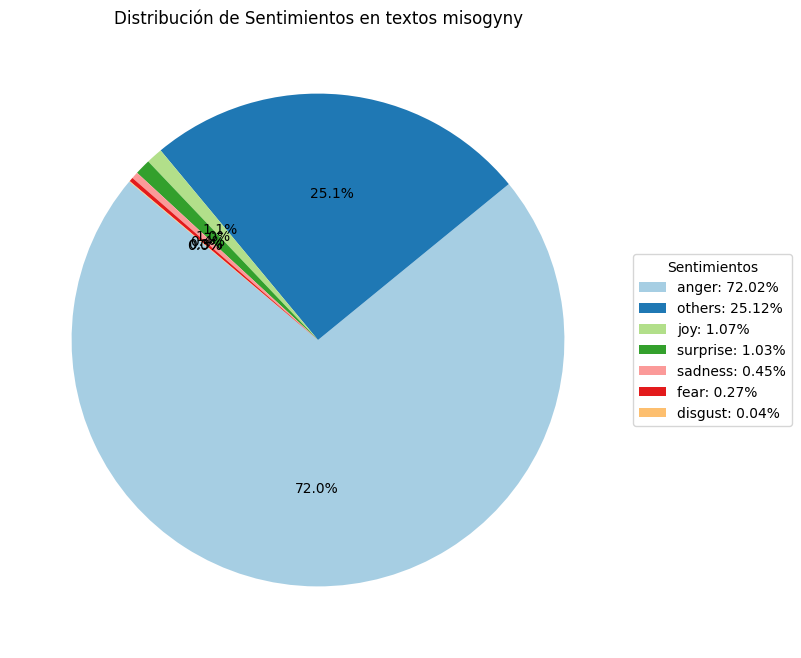

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_emotion_percentages_misogyny.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos misogyny")
legend_labels = [f"{emotion}: {percentage:.2f}%" for emotion, percentage in overall_emotion_percentages_misogyny.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [26]:
print("\nEjemplos de cada tipo de sentimiento en textos misogyny:")
for sent_type, example in examples_per_emotion_misogyny.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos misogyny:
anger: ['@twominbae cállate puta', '@monasterioR @julia_otero Eres patética', '@GretaThunberg Loca del coño', '@outmarina Cállate puta de mierda', '@Valeryth_ Callate puta que te dejo en visto', '@AdaColau HIJA DE PUTA', '@Cannabianol Greta puta', 'Ojalá las feminazis no me den palo por subir este video ??????????? #dolar http://t.co/', 'feminismo=igualdad de hombres y mujeres. feminazi=mujeres que se creen superiores a los hombres. a ver si algún día entienden', '@drummniatico No se vaya asustar! Ese es el gremio de feminazis... el cuartel de las feas, que si le dices preciosas, se ofenden, xq piensa que te le burlas, pues ellas saben que no lo son! http://t.co/']

others: ['@Josumovic Puta Greta', '@GretaThunberg cerda', '@LaFallaras Deja el alcohol cerda', '@LaFallaras @TeruelExiste_ Allí te puedes emborrachas loca alcohólica', 'Lo de feminazi es discutible porque si hay feministas que lo son, por ejemplo, el caso del hombre 


-----------------------------------------------

### Tweets no misogyny

-----------------------------------------------


In [28]:
text_not_misogyny = [text for text in df_misocorpus_train[df_misocorpus_train["label"] == 0]["tweet"].tolist()]
results_emotion_analysis_not_misogyny = [analyze_emotion(text) for text in tqdm(text_not_misogyny)]

  0%|          | 12/2797 [00:00<00:49, 56.28it/s]


-----------------------
Texto analizado: @jlalarcon84 uf eso conllevaría a fregar sarten y tapadera y no se yo si me merece la pena por 2 trozos de pizza ?
Emoción detectada: others
Probabilidades: {'others': 0.8326699137687683, 'joy': 0.0032386186067014933, 'sadness': 0.010219324380159378, 'anger': 0.005564918741583824, 'surprise': 0.12457818537950516, 'disgust': 0.005072410684078932, 'fear': 0.018656710162758827}

-----------------------
Texto analizado: Yo a mi jefe: yo vuelvo al restaurante pero no a fregar platos. Disney: toma, 7 meses pa fregar que se ve que no te hemos insistido suficiente con el contrato anterior que rechazaste.
Emoción detectada: others
Probabilidades: {'others': 0.5558252930641174, 'joy': 0.024448350071907043, 'sadness': 0.014029043726623058, 'anger': 0.37853357195854187, 'surprise': 0.007020918652415276, 'disgust': 0.018115131184458733, 'fear': 0.002027668757364154}

-----------------------
Texto analizado: @ElKillBulls @omarFermoselle @MariaMonte_16 A freg

  1%|          | 24/2797 [00:00<00:48, 57.01it/s]


-----------------------
Texto analizado: Por dios quiero mil, seguro sale una casa la porqueria esta,, a fregar con Zorro nomas :c http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.15525874495506287, 'joy': 0.004475061781704426, 'sadness': 0.0726628452539444, 'anger': 0.6103637218475342, 'surprise': 0.005122313741594553, 'disgust': 0.14311562478542328, 'fear': 0.00900168064981699}

-----------------------
Texto analizado: @madeinmartinez1 Yo aviso. Les digo a mis chicos, no bajéis que voy a fregar. Pues uno de mis dos hijos tiene que bajar ?‍♀
Emoción detectada: others
Probabilidades: {'others': 0.9655575156211853, 'joy': 0.008367897942662239, 'sadness': 0.003933917731046677, 'anger': 0.00506508257240057, 'surprise': 0.010475465096533298, 'disgust': 0.0014827029081061482, 'fear': 0.0051174890249967575}

-----------------------
Texto analizado: A fregar los platos muy fumada escuchando Hannah Montana best of both worlds
Emoción detectada: joy
Probabilidades: {'others':

  1%|▏         | 36/2797 [00:00<00:47, 58.43it/s]


-----------------------
Texto analizado: Te das cuenta que estas vieja cuando te vas a fregar y terminas lavando la nevera
Emoción detectada: others
Probabilidades: {'others': 0.9186611175537109, 'joy': 0.020185230299830437, 'sadness': 0.031756021082401276, 'anger': 0.007864782586693764, 'surprise': 0.010751098394393921, 'disgust': 0.004087046254426241, 'fear': 0.006694762501865625}

-----------------------
Texto analizado: @robertbourdain1 Jajajaja todos y hasta las ? cara de tortilla que no conectan sus dos neuronas vienen a fregar con sus tweets faltos de intento cuando deberían estar corriendo en la barranca, así solo estarían estupiditos y no ? y estupiditos.??‍♀️
Emoción detectada: anger
Probabilidades: {'others': 0.0035460353828966618, 'joy': 0.00048620524466969073, 'sadness': 0.0019320561550557613, 'anger': 0.9484743475914001, 'surprise': 0.000825785449706018, 'disgust': 0.04398273304104805, 'fear': 0.0007528993301093578}

-----------------------
Texto analizado: A alguien se 

  2%|▏         | 48/2797 [00:00<00:48, 56.60it/s]


-----------------------
Texto analizado: estoy en la cocina buscando una playlist bien chingona para ponerme a fregar porque EN ESTA CASA NADIE SIRVE PARA UNA VERGA COÑOELAMADREMEQUIEROIR DESESTAMIERDA
Emoción detectada: anger
Probabilidades: {'others': 0.46280235052108765, 'joy': 0.017988933250308037, 'sadness': 0.013486715033650398, 'anger': 0.46644237637519836, 'surprise': 0.008820950984954834, 'disgust': 0.022892823442816734, 'fear': 0.0075658271089196205}

-----------------------
Texto analizado: “¿Cómo pueden dar espacio a una mocosa?” así se refirió Bolsonaro a Greta Thunberg http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9780187010765076, 'joy': 0.0014482482802122831, 'sadness': 0.0014357151230797172, 'anger': 0.0076278806664049625, 'surprise': 0.007929856888949871, 'disgust': 0.0023281120229512453, 'fear': 0.001211490947753191}

-----------------------
Texto analizado: @24h_tve @GretaThunberg ????? siii ha inventado una central electrica que 

  2%|▏         | 60/2797 [00:01<00:48, 56.64it/s]


-----------------------
Texto analizado: #Bolsonaro llama "mocosa" a Greta Thunberg #COP #CrisisClimática http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9897103905677795, 'joy': 0.0026595224626362324, 'sadness': 0.00048058241372928023, 'anger': 0.0023129370529204607, 'surprise': 0.002958820667117834, 'disgust': 0.0009498867439106107, 'fear': 0.0009279052028432488}

-----------------------
Texto analizado: @LucioCesarBr @GretaThunberg Creo que no he visto ninguna estupidez más grande que esta. Un sistema que nos enseña a ser egoístas, individualistas y competidores es socialista? Ni puta idea tienes, chaval, ni puta idea
Emoción detectada: anger
Probabilidades: {'others': 0.0018636826425790787, 'joy': 0.0008663024636916816, 'sadness': 0.002101665595546365, 'anger': 0.9128568172454834, 'surprise': 0.0012433327501639724, 'disgust': 0.07984636723995209, 'fear': 0.0012218978954479098}

-----------------------
Texto analizado: #EntérateDurango?‍??‍?#Mundo?Llama Bolsonar

  3%|▎         | 73/2797 [00:01<00:46, 58.83it/s]


-----------------------
Texto analizado: nunca olvidar cuando estaba durmiendo en la casa de novio y en una lo desperté a la madrugada porque tenía sed y no queria bajar sola a la cocina pues miedosa y el man SE DIO MEDIA VUELTA PARA SEGUIR DURMIENDO, ok gracias pd: fui a tomar agua del baño que esta al lado
Emoción detectada: others
Probabilidades: {'others': 0.909116804599762, 'joy': 0.05261862650513649, 'sadness': 0.01872861571609974, 'anger': 0.006589401513338089, 'surprise': 0.007258591242134571, 'disgust': 0.0029490867163985968, 'fear': 0.002738764975219965}

-----------------------
Texto analizado: Quiero dibujar XD pero no tengo ánimos ni confianza y tengo pereza :v....quiero pero como que siento que le voy a fregar xd
Emoción detectada: others
Probabilidades: {'others': 0.8402615785598755, 'joy': 0.016108112409710884, 'sadness': 0.08134166896343231, 'anger': 0.009892597794532776, 'surprise': 0.005126119591295719, 'disgust': 0.004472286440432072, 'fear': 0.04279756173491478}



  3%|▎         | 85/2797 [00:01<00:47, 56.84it/s]


-----------------------
Texto analizado: Jair Bolsonaro ‘no se corta’ y arremete contra «la mocosa» Greta Thunberg http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9867252111434937, 'joy': 0.003592276945710182, 'sadness': 0.0005763439694419503, 'anger': 0.0011845373082906008, 'surprise': 0.005707304924726486, 'disgust': 0.0007721714791841805, 'fear': 0.0014423077227547765}

-----------------------
Texto analizado: En un continente con una historia plagada de violaciones de derechos humanos, dictaduras, conflictos y violencia; expertos, especialistas y periodistas con largo camino en esas áreas, ofrecen consejos para coberturas de calidad sobre el tema. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9868056774139404, 'joy': 0.0003891086089424789, 'sadness': 0.005281596910208464, 'anger': 0.00386887788772583, 'surprise': 0.0009190849377773702, 'disgust': 0.0011016761418431997, 'fear': 0.0016340197762474418}

-----------------------
Texto analizado

  3%|▎         | 97/2797 [00:01<00:50, 53.99it/s]


-----------------------
Texto analizado: @JonathnCanales4 A fregar la grama del estadio es a lo que van ?
Emoción detectada: others
Probabilidades: {'others': 0.9915359020233154, 'joy': 0.000776806497015059, 'sadness': 0.0009541042381897569, 'anger': 0.0015782059635967016, 'surprise': 0.004174719098955393, 'disgust': 0.0004452922730706632, 'fear': 0.0005349577404558659}

-----------------------
Texto analizado: Con Piltrafa de Violadores hablando de su próximo disco “Carne, Tierras y Sangre” @hobydefino http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.44007137417793274, 'joy': 0.0028662162367254496, 'sadness': 0.011747979559004307, 'anger': 0.4000881314277649, 'surprise': 0.005285027902573347, 'disgust': 0.13649018108844757, 'fear': 0.003451054682955146}

-----------------------
Texto analizado: TODO UN CAGON, EL MISERABLE Desde Descubre de Google http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.003807960543781519, 'joy': 0.0018626995151862502, 'sa

  4%|▍         | 113/2797 [00:01<00:41, 65.37it/s]


-----------------------
Texto analizado: Que los chavales del arandina se han caído con todo el equipo lo saben hasta en el polo norte. Haya lo que haya hecho la chavala. Si no sabes torear pa que te metes, Manolete.
Emoción detectada: anger
Probabilidades: {'others': 0.13031992316246033, 'joy': 0.006193534005433321, 'sadness': 0.01382502168416977, 'anger': 0.8070842623710632, 'surprise': 0.002140884520485997, 'disgust': 0.03925831615924835, 'fear': 0.001178073463961482}

-----------------------
Texto analizado: @PJoliCo Pues nada. Homicidio doloso 12 años, caer como un gilipollas en provocaciones de una menor, y swr un degenerado, 38 años, muy proporcional todo. Si la hubieran matado a puñaladas les caen 12 años como mucho..moraleja para criminales....
Emoción detectada: anger
Probabilidades: {'others': 0.0009412948274984956, 'joy': 0.0011952942004427314, 'sadness': 0.0026693507097661495, 'anger': 0.8109948039054871, 'surprise': 0.0014191078953444958, 'disgust': 0.18143092095851898, 

  5%|▍         | 128/2797 [00:02<00:39, 67.66it/s]


-----------------------
Texto analizado: #Actualidad | Gretus amargatus: Frank Cuesta se burla de Greta Thunberg en un vídeo y recibe numerosas críticas ➡ El vídeo se titulaba “Los cinco bichos más raros que he tocado” y salió disfrazado de la joven sueca. Te lo cuenta @Sr_Nolito aquí http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9702488780021667, 'joy': 0.004434338770806789, 'sadness': 0.0009646839462220669, 'anger': 0.0015090748202055693, 'surprise': 0.020399384200572968, 'disgust': 0.0008945049485191703, 'fear': 0.0015491570811718702}

-----------------------
Texto analizado: @achapilator Vamos una aberración. Si caes en un juzgado puedes salir con 38 años de condena y en otro con 12 por los mismos hechos y en otro incluso absuelto. No es justicia es una verdadera sin razón.
Emoción detectada: anger
Probabilidades: {'others': 0.003992804791778326, 'joy': 0.00037090943078510463, 'sadness': 0.004071465693414211, 'anger': 0.8502541780471802, 'surpris

  5%|▌         | 148/2797 [00:02<00:33, 80.08it/s]


-----------------------
Texto analizado: @primiciasyacom Tu hijo es.un violador estúpido
Emoción detectada: anger
Probabilidades: {'others': 0.003744195681065321, 'joy': 0.0015507370699197054, 'sadness': 0.00221581244841218, 'anger': 0.8501420021057129, 'surprise': 0.0013588377041742206, 'disgust': 0.13947589695453644, 'fear': 0.0015125212958082557}

-----------------------
Texto analizado: Hay dos clases de gente los que vinieron a este mundo a sufrir y los que venimos a fregar ?
Emoción detectada: others
Probabilidades: {'others': 0.822716236114502, 'joy': 0.005148453172296286, 'sadness': 0.04184134677052498, 'anger': 0.09932616353034973, 'surprise': 0.007363487035036087, 'disgust': 0.01998845860362053, 'fear': 0.003615823108702898}

-----------------------
Texto analizado: @JeanineAnez @DemocratasBo O Lo van a fregar todo el esfuerzo del pueblo
Emoción detectada: anger
Probabilidades: {'others': 0.04146675020456314, 'joy': 0.002205986762419343, 'sadness': 0.012334875762462616, 'ang

  6%|▌         | 166/2797 [00:02<00:32, 81.64it/s]


-----------------------
Texto analizado: Joven en Argentina se disfraza de "víctima de feminicidio" en su graduación http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9720483422279358, 'joy': 0.0017044926062226295, 'sadness': 0.004221221432089806, 'anger': 0.0020409661810845137, 'surprise': 0.012578087858855724, 'disgust': 0.003296999493613839, 'fear': 0.004109898582100868}

-----------------------
Texto analizado: @lore_moyaa La querian espiar jovencita...drone violador ese
Emoción detectada: anger
Probabilidades: {'others': 0.11242233961820602, 'joy': 0.00537858484312892, 'sadness': 0.0048944163136184216, 'anger': 0.5221554636955261, 'surprise': 0.03234069049358368, 'disgust': 0.30373474955558777, 'fear': 0.019073721021413803}

-----------------------
Texto analizado: @glezpik Y es curioso, ¿no? Porque los argumentos contra el feminismo siempre son Not All Men, pero, en los casos de violación y/o abuso sexual, SIEMPRE se justifica la violación con "soy

  7%|▋         | 186/2797 [00:02<00:29, 87.89it/s]


-----------------------
Texto analizado: Hoy me desperté con que un ardido bobo hijueputa me metió dizque en una lista de feminazis JAJAJAJAJAJAJAJAJAJA ¿Le dicen ustedes o le digo yo? JAJAJAJAJAJAJAJ
Emoción detectada: others
Probabilidades: {'others': 0.7551838755607605, 'joy': 0.018575474619865417, 'sadness': 0.014461833983659744, 'anger': 0.08033163100481033, 'surprise': 0.08140065521001816, 'disgust': 0.034662146121263504, 'fear': 0.015384422615170479}

-----------------------
Texto analizado: Acá esperamos un feminicidio más para recién actuar, para que las autoridades se movilicen, den castigos y luego para qué, volver a lo mismo... Edúcate amigo machito, no te sientas ofendido cuando te dicen el violador eres tú y tildes de feminazis a quienes luchan por un cambio http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0015472150407731533, 'joy': 0.00038730481173843145, 'sadness': 0.0025612071622163057, 'anger': 0.9482954144477844, 'surprise': 0.0005581983714364469,

  7%|▋         | 206/2797 [00:03<00:28, 90.85it/s]


-----------------------
Texto analizado: #Internacional | “Es impresionante que la prensa le dé espacio a una mocosa como ella” Así se refirió el presidente brasileño @jairbolsonaro a @GretaThunberg, luego de que la activista sueca condenara el asesinato de indígenas en el Amazonas. @GiovanniCelisS http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8360216617584229, 'joy': 0.0018174885772168636, 'sadness': 0.016254866495728493, 'anger': 0.09809307008981705, 'surprise': 0.02770364284515381, 'disgust': 0.01805073767900467, 'fear': 0.002058577025309205}

-----------------------
Texto analizado: @GirautaOficial Le recomiendo echar un vistazo el titular sobre la farsa del viaje en tren de Greta, Goebbels era un pobre idiota al lado de esta gente.
Emoción detectada: anger
Probabilidades: {'others': 0.00833948515355587, 'joy': 0.0011471479665488005, 'sadness': 0.006438615266233683, 'anger': 0.6573970317840576, 'surprise': 0.0013351435773074627, 'disgust': 0.32301396131515503

  8%|▊         | 216/2797 [00:03<00:28, 91.03it/s]


-----------------------
Texto analizado: me da mucha risa el argumento provide de que el feminismo es hipócrita por buscar aborto legal y querer que no maten mujeres por el siempre hecho de ser mujeres; no podemos comprar una vida que no existe con la de alguien que ya existía y comenzaba a formarla +
Emoción detectada: anger
Probabilidades: {'others': 0.005267328582704067, 'joy': 0.0007868328830227256, 'sadness': 0.00899061094969511, 'anger': 0.8786763548851013, 'surprise': 0.0006376182427629828, 'disgust': 0.10440753400325775, 'fear': 0.0012336622457951307}

-----------------------
Texto analizado: Ayer dijeron feminazi y me enoje xdxd
Emoción detectada: others
Probabilidades: {'others': 0.7914935350418091, 'joy': 0.08889831602573395, 'sadness': 0.029940640553832054, 'anger': 0.03658415749669075, 'surprise': 0.01990414224565029, 'disgust': 0.020606406033039093, 'fear': 0.012572871521115303}

-----------------------
Texto analizado: Alguien le puede avisar a Male Pichot que el femici

  8%|▊         | 236/2797 [00:03<00:28, 90.78it/s]


-----------------------
Texto analizado: 09:35 y ya me peleé con una señora que culpó a la Campora por no saber viajar. Me dijo "FEMINAZI". Le respondí "Y PERONISTA" con los dedos en ✌
Emoción detectada: others
Probabilidades: {'others': 0.7742831707000732, 'joy': 0.017445048317313194, 'sadness': 0.010291620157659054, 'anger': 0.16375933587551117, 'surprise': 0.007519826292991638, 'disgust': 0.01949496939778328, 'fear': 0.007206032983958721}

-----------------------
Texto analizado: De los creadores de "feminazi" ahora llegan los "econazis". http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9790898561477661, 'joy': 0.002007704460993409, 'sadness': 0.0022111956495791674, 'anger': 0.00461191963404417, 'surprise': 0.008092488162219524, 'disgust': 0.0021642250940203667, 'fear': 0.001822515856474638}

-----------------------
Texto analizado: 2019 y los machitos sigues usando feminazi, la sociedad nunca avanza
Emoción detectada: anger
Probabilidades: {'others': 0.025935238

  9%|▉         | 256/2797 [00:03<00:27, 92.49it/s]


-----------------------
Texto analizado: Balance cultural de una década. 2010-2019. Por @jorgecarrion21 http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.993081271648407, 'joy': 0.0025841803289949894, 'sadness': 0.0019332056399434805, 'anger': 0.0002864693815354258, 'surprise': 0.0014527547173202038, 'disgust': 0.0002479512186255306, 'fear': 0.000414274021750316}

-----------------------
Texto analizado: Venezuela no es machista pero cuando nos reuníamos en casa de mi abuela para navidad se hacía un horario para ver a que mujer de la familia le tocaba cocinar cada día porque los hombres no podían ni iban a hacerlo.
Emoción detectada: others
Probabilidades: {'others': 0.960054337978363, 'joy': 0.004846489056944847, 'sadness': 0.012105388566851616, 'anger': 0.01980060525238514, 'surprise': 0.0008452188340015709, 'disgust': 0.00177583540789783, 'fear': 0.0005721641355194151}

-----------------------
Texto analizado: Las ‘Mujercitas’ de la nueva generación feminista http

 10%|▉         | 276/2797 [00:03<00:27, 92.43it/s]


-----------------------
Texto analizado: ? "Es impresionante que la prensa le dé espacio a una mocosa" Jair Bolsonaro "arremete" contra Greta Thunberg http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.5268831849098206, 'joy': 0.0029200995340943336, 'sadness': 0.008884381502866745, 'anger': 0.2166600525379181, 'surprise': 0.1831766963005066, 'disgust': 0.05064760893583298, 'fear': 0.010828006081283092}

-----------------------
Texto analizado: Bolsonaro llama "mocosa" a Greta Thunberg http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9891771674156189, 'joy': 0.003127673175185919, 'sadness': 0.0004557254142127931, 'anger': 0.0024197970051318407, 'surprise': 0.0027202253695577383, 'disgust': 0.0011968306498602033, 'fear': 0.000902619503904134}

-----------------------
Texto analizado: Un año más, vuelvo a ser el gilipollas que sigue regalando mix CDs, con los personajes del año en portada: Greta y Pedro @Camellosdigame, @aptos_acapulco, @L

 11%|█         | 296/2797 [00:03<00:26, 92.83it/s]


-----------------------
Texto analizado: El presidente de #Brasil??, Jair Bolsonaro, llamó "mocosa" a la activista sueca Greta Thunberg, de 16 años, después que la joven denunciase la violencia contra los pueblos indígenas en la Amazonía. #BolsonaroMiente y sigue haciendo de las suyas en la #PatriaGrande. #Cuba?? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.019005686044692993, 'joy': 0.0014382526278495789, 'sadness': 0.004998413845896721, 'anger': 0.8148030638694763, 'surprise': 0.002161910990253091, 'disgust': 0.15632376074790955, 'fear': 0.0012688685674220324}

-----------------------
Texto analizado: A lo único que apoyáis a Greta thunberg es a guardar la caja reventada del árbol de Navidad de un año pa otro hijos de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.001655176398344338, 'joy': 0.0019853415433317423, 'sadness': 0.001928479876369238, 'anger': 0.8960540294647217, 'surprise': 0.0007099671638570726, 'disgust': 0.09673590958118439, 'fear': 

 11%|█▏        | 316/2797 [00:04<00:27, 89.39it/s]


-----------------------
Texto analizado: El artículo, vale. El titular incorrecto porque somos muchos los hombres españoles que no coincidimos con ese perfil que se señala en el enunciado. Histérica, marioneta y majareta: los insultos que hombres españoles dedican a Greta Thunberg en Twitter http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.011958567425608635, 'joy': 0.001326811732724309, 'sadness': 0.002491938415914774, 'anger': 0.9145887494087219, 'surprise': 0.0005660148453898728, 'disgust': 0.06845781207084656, 'fear': 0.0006100796745158732}

-----------------------
Texto analizado: @bertrandmyd @Unha127 Que la reacción de este niño es admirable, claro que sí, y mas a tan corta edad que muchos niños simplemente se quedarían asustados llorando. Pero que te refieras a Greta como "del demonio"sabiendo que es una simple marioneta a la que están jodiendo su infancia, es de gilipollas.
Emoción detectada: anger
Probabilidades: {'others': 0.001308841397985816, 'joy': 0.00

 12%|█▏        | 336/2797 [00:04<00:26, 91.43it/s]


-----------------------
Texto analizado: @Oswaldo76617331 @nadir_karen @aristeguicnn Que siga poniendo en esos cargos a quien quiera si ese es el secreto de su éxito. Las personas reales que no somos #Bot (con 8 números después del nombre) estamos mejor con ella que con los los pedófilos violadores que puso el narco http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.04438344016671181, 'joy': 0.0037533591967076063, 'sadness': 0.008237152360379696, 'anger': 0.7176012992858887, 'surprise': 0.001347981276921928, 'disgust': 0.22276847064495087, 'fear': 0.0019083063816651702}

-----------------------
Texto analizado: Como es q esto no es condenable? @CIDH esto no es violación de la libertad de expresión? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.04790369048714638, 'joy': 0.0013271935749799013, 'sadness': 0.01384139247238636, 'anger': 0.5955125093460083, 'surprise': 0.1923108994960785, 'disgust': 0.13236892223358154, 'fear': 0.016735432669520378}

---

 13%|█▎        | 356/2797 [00:04<00:26, 92.24it/s]


-----------------------
Texto analizado: @monasterioR @julia_otero Lo que hace no tener ni puta idea eh
Emoción detectada: others
Probabilidades: {'others': 0.9629097580909729, 'joy': 0.005061804782599211, 'sadness': 0.002471431391313672, 'anger': 0.005952372681349516, 'surprise': 0.018327580764889717, 'disgust': 0.00269056367687881, 'fear': 0.002586494432762265}

-----------------------
Texto analizado: Não conheço metade pois 38 anos. Vou tentar ouvir o que me parece bom. Tem Madonna, Taylor, Lizzo, Solange, Coldplay (!!!), Lana muito bem posicionada. E adivinha a n. 1? Claro, ela mesma. A adolescente. The 50 best albums of 2019 http://t.co/ via @NME
Emoción detectada: joy
Probabilidades: {'others': 0.445632666349411, 'joy': 0.5098382830619812, 'sadness': 0.011124336160719395, 'anger': 0.004203134216368198, 'surprise': 0.021186301484704018, 'disgust': 0.005074208602309227, 'fear': 0.0029411090072244406}

-----------------------
Texto analizado: @LaFallaras "...de puro puta pongo el 

 13%|█▎        | 376/2797 [00:04<00:25, 93.14it/s]


-----------------------
Texto analizado: @InesArrimadas Hijo de puta.....Ladrón,sinvergüenza.
Emoción detectada: anger
Probabilidades: {'others': 0.0018160269828513265, 'joy': 0.001673088758252561, 'sadness': 0.001932329498231411, 'anger': 0.7899739742279053, 'surprise': 0.0017963621066883206, 'disgust': 0.20045341551303864, 'fear': 0.0023548563476651907}

-----------------------
Texto analizado: @monasterioR @julia_otero Me haces mucha gracia, porque te puedes cagar en la puta madre de alguien siempre con una sonrisa. Me gusta. Pero tu partido nada de nada.
Emoción detectada: anger
Probabilidades: {'others': 0.2914593815803528, 'joy': 0.06438613682985306, 'sadness': 0.017305808141827583, 'anger': 0.5197152495384216, 'surprise': 0.0021563414484262466, 'disgust': 0.10275545716285706, 'fear': 0.0022216762881726027}

-----------------------
Texto analizado: @AdaColau El carapolla no tiene ni puta idea de gobernar una ciudad, seguro que en su casa manda mas su perro que el?
Emoción detect

 14%|█▍        | 396/2797 [00:05<00:25, 93.20it/s]


-----------------------
Texto analizado: @monasterioR Tú no tienes ni puta idea de para qué va la gente al cine, hulio
Emoción detectada: anger
Probabilidades: {'others': 0.10036639124155045, 'joy': 0.0021407390013337135, 'sadness': 0.006632399279624224, 'anger': 0.8402096629142761, 'surprise': 0.0030139032751321793, 'disgust': 0.04591478034853935, 'fear': 0.0017221010057255626}

-----------------------
Texto analizado: @LaFallaras Ne cago en la puta, los tíos, y alguna mujer también, somos imbeciles? Por qué he de sentir vergüenza de que me cuelgue un trocito? Estamos enfermos cuando no podemos respetar a la mitad del planeta. ???
Emoción detectada: anger
Probabilidades: {'others': 0.001029518316499889, 'joy': 0.0005464326241053641, 'sadness': 0.003111395752057433, 'anger': 0.9308071136474609, 'surprise': 0.0011783572845160961, 'disgust': 0.06220325082540512, 'fear': 0.0011239198502153158}

-----------------------
Texto analizado: @AdaColau YO NO OS BASTA CON TENER A UN PISTOLERO MUN

 15%|█▍        | 406/2797 [00:05<00:25, 92.30it/s]


-----------------------
Texto analizado: @monasterioR Callate dios callate, no me toques Star Wars facha de los cojones. Que no tienes ni puta idea.
Emoción detectada: anger
Probabilidades: {'others': 0.0062287552282214165, 'joy': 0.0013152973260730505, 'sadness': 0.0011006502900272608, 'anger': 0.9486647844314575, 'surprise': 0.0010439497418701649, 'disgust': 0.04030146822333336, 'fear': 0.0013451655395328999}

-----------------------
Texto analizado: @AdaColau Q puta mierda....
Emoción detectada: anger
Probabilidades: {'others': 0.003443407127633691, 'joy': 0.00085902662249282, 'sadness': 0.002941120183095336, 'anger': 0.9291248321533203, 'surprise': 0.002906074747443199, 'disgust': 0.05817750096321106, 'fear': 0.0025479900650680065}

-----------------------
Texto analizado: @InesArrimadas @CiudadanaMartaR Es curioso que cuenta que lleva lazo amarillo ,cuenta que habla sin tener ni puta idea ....
Emoción detectada: others
Probabilidades: {'others': 0.867531955242157, 'joy': 0.004096

 15%|█▌        | 426/2797 [00:05<00:26, 88.77it/s]


-----------------------
Texto analizado: @LaFallaras Lo de la manada "original" ya fue algo vergonzoso, pero lo de estos 3 pavos ya está a otro nivel. Flagrante violación de derechos, de verdad, leed la puta sentencia porque es vomitivo. La chica directamente llegó a decir que se lo iba a inventar antes de denunciarlo.
Emoción detectada: anger
Probabilidades: {'others': 0.00124019430950284, 'joy': 0.0005846704007126391, 'sadness': 0.001845594379119575, 'anger': 0.8635016083717346, 'surprise': 0.001624440774321556, 'disgust': 0.13005416095256805, 'fear': 0.0011494285427033901}

-----------------------
Texto analizado: @InesArrimadas Que puta vergüenza
Emoción detectada: anger
Probabilidades: {'others': 0.027217790484428406, 'joy': 0.003750444855540991, 'sadness': 0.0050046914257109165, 'anger': 0.817550778388977, 'surprise': 0.027678828686475754, 'disgust': 0.11589550226926804, 'fear': 0.0029019524808973074}

-----------------------
Texto analizado: @LaFallaras La Sociedad es mucho más

 16%|█▌        | 445/2797 [00:05<00:26, 90.31it/s]


-----------------------
Texto analizado: @abc_es Una golfilla se lia con tres golfos, a ella la indemnizan y a ellos les caen 38 años. Podria ser un delito de abuso sexual, ya que ella es menor de 16 años, pero no de agresion sexual habiendo tantas evidencias de que la chica estaba de acuerdo.
Emoción detectada: anger
Probabilidades: {'others': 0.0886545330286026, 'joy': 0.0022778406273573637, 'sadness': 0.016273507848381996, 'anger': 0.6781491637229919, 'surprise': 0.025829588994383812, 'disgust': 0.17503345012664795, 'fear': 0.013781975023448467}

-----------------------
Texto analizado: @FonsiLoaiza A mi no me apalizan. La menor fue a por lana y salio trasquilada. 38 años para el mosso..
Emoción detectada: anger
Probabilidades: {'others': 0.26218387484550476, 'joy': 0.014263369143009186, 'sadness': 0.03288466855883598, 'anger': 0.30283987522125244, 'surprise': 0.13486161828041077, 'disgust': 0.18208201229572296, 'fear': 0.07088454812765121}

-----------------------
Texto analizado:

 17%|█▋        | 465/2797 [00:05<00:25, 91.43it/s]


-----------------------
Texto analizado: Independentistas, putos rojos, comunistas, ETA, tiro en la nuca, Venezuela, ETA, lobbys feminazis TRAKA TRA PAPÁ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.014700723811984062, 'joy': 0.0044547985307872295, 'sadness': 0.0025396598502993584, 'anger': 0.8084619641304016, 'surprise': 0.0014788388507440686, 'disgust': 0.16673769056797028, 'fear': 0.0016263141296803951}

-----------------------
Texto analizado: #ÚLTIMAHORA ? Libertad a la espera de decisión judicial para los tres condenados por el Caso #Arandina. ? @RTVE http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9863460659980774, 'joy': 0.000412211986258626, 'sadness': 0.0006976766744628549, 'anger': 0.0006441095029003918, 'surprise': 0.009726820513606071, 'disgust': 0.00044496438931673765, 'fear': 0.0017281665932387114}

-----------------------
Texto analizado: @RosellRM_ @wosatleti Que rápido se os escapa lo de feminazi
Emoción detectada: anger
Prob

 17%|█▋        | 485/2797 [00:06<00:25, 92.15it/s]


-----------------------
Texto analizado: Se “vengó” contando una historia falsa y que se le ha ido de las manos. No estoy a favor ni mucho menos de una agresión sexual/violación, pero creo que es injusta esa condena de 38 años a 3 chicos para los que no hay pruebas de dicho acto. HE DICHO. #CasoArandina
Emoción detectada: anger
Probabilidades: {'others': 0.0021061173174530268, 'joy': 0.0004082205705344677, 'sadness': 0.0034523294307291508, 'anger': 0.8806618452072144, 'surprise': 0.0009048125939443707, 'disgust': 0.11140743643045425, 'fear': 0.0010592425242066383}

-----------------------
Texto analizado: El padre de la menor ha denunciado la difusión de los datos personales de su hija mediante una red social. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9744598269462585, 'joy': 0.0006133459392003715, 'sadness': 0.0036289675626903772, 'anger': 0.007033615838736296, 'surprise': 0.0064111920073628426, 'disgust': 0.003152309451252222, 'fear': 0.004700688645243645}


 18%|█▊        | 505/2797 [00:06<00:25, 89.09it/s]


-----------------------
Texto analizado: @lucasdutrat @ATX_Guimaraes @soberanw @Romenigue7 @globoesportecom sera q cabe 38 anos so em um tweet pra listar?
Emoción detectada: others
Probabilidades: {'others': 0.9153913855552673, 'joy': 0.006654052063822746, 'sadness': 0.013764072209596634, 'anger': 0.005610882770270109, 'surprise': 0.04662793502211571, 'disgust': 0.004792144522070885, 'fear': 0.007159683387726545}

-----------------------
Texto analizado: @rodjard @BlogdoNoblat Nós últimos 38 anos tenho me divertido mais vendo os flamenguistas com cara de bunda chorando
Emoción detectada: others
Probabilidades: {'others': 0.6002418398857117, 'joy': 0.12132707983255386, 'sadness': 0.19468848407268524, 'anger': 0.04005986824631691, 'surprise': 0.008812740445137024, 'disgust': 0.025341685861349106, 'fear': 0.00952830445021391}

-----------------------
Texto analizado: Minha teoria é que: Beyoncé atualmente tem 38 anos, ela posou em frente a máquina N° 40, em 2021 ela terá 40 anos, ou seja

 19%|█▉        | 525/2797 [00:06<00:24, 91.44it/s]


-----------------------
Texto analizado: La Asamblea Feminista de Aranda convoca una concentración de apoyo a la víctima del 'caso Arandina' http://t.co/ Lo cuenta @Radio_Aranda http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9942126870155334, 'joy': 0.0017322187777608633, 'sadness': 0.0006427866755984724, 'anger': 0.0007255258387885988, 'surprise': 0.0016934601590037346, 'disgust': 0.00037675086059607565, 'fear': 0.0006165775121189654}

-----------------------
Texto analizado: @LaikaOrbital Arandina?? ???
Emoción detectada: surprise
Probabilidades: {'others': 0.21183668076992035, 'joy': 0.008923412300646305, 'sadness': 0.003503577783703804, 'anger': 0.0015118556329980493, 'surprise': 0.7659714221954346, 'disgust': 0.0013247698079794645, 'fear': 0.006928291637450457}

-----------------------
Texto analizado: La sentencia que emocionó a Spielberg: Caso Arandina | UTBH http://t.co/ vía @YouTube
Emoción detectada: others
Probabilidades: {'others': 0.741142749786377, '

 19%|█▉        | 545/2797 [00:06<00:24, 91.52it/s]


-----------------------
Texto analizado: Con Blasco Ibañez, decir que en España se aborrece siempre el sexo, cuando son otros los que lo practican. La condena a los jugadores de la #Arandina devuelve a España a sus épocas más oscuras, luego os quejais si desde Flandes os recordamos la Leyenda Negra que forjais.
Emoción detectada: anger
Probabilidades: {'others': 0.026630373671650887, 'joy': 0.0023967865854501724, 'sadness': 0.01851510815322399, 'anger': 0.8313271999359131, 'surprise': 0.0008803626988083124, 'disgust': 0.11945793777704239, 'fear': 0.0007921922951936722}

-----------------------
Texto analizado: Susana no tendrá como segundo nombre Alicia, por que vive en el país de las maravillas. Con tanto progreso e igualdad durante 38 años el PSOE seguirá gobernando a perpetuidad, verdad? Por favor lo único que trajeron fue clientelismo, pobreza e ignorancia.Y un robo descarado. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0016975818434730172, 'joy': 0.00109395

 20%|██        | 565/2797 [00:06<00:24, 92.48it/s]


-----------------------
Texto analizado: En cuanto a lo de la Arandina: la pena es un poco desmedida pero acostarse con una menor es siempre violación, y más teniendo un estatus como futbolista y algo de dinero
Emoción detectada: anger
Probabilidades: {'others': 0.03405942767858505, 'joy': 0.0016610422171652317, 'sadness': 0.045841652899980545, 'anger': 0.762654721736908, 'surprise': 0.009319792501628399, 'disgust': 0.14188174903392792, 'fear': 0.00458156131207943}

-----------------------
Texto analizado: Ala Cristina, empieza a buscar abogado, notas la angustia? A lo mejor ahora empatizas un poquito. http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.639277458190918, 'joy': 0.004310378339141607, 'sadness': 0.32898274064064026, 'anger': 0.004645888227969408, 'surprise': 0.009324861690402031, 'disgust': 0.0029696831479668617, 'fear': 0.010489024221897125}

-----------------------
Texto analizado: La condena del caso Arandina se sustenta, fundamentalmente,

 21%|██        | 585/2797 [00:07<00:23, 92.66it/s]


-----------------------
Texto analizado: La Audiencia Provincial de Burgos dicta hoy sentencia sobre el caso Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9959308505058289, 'joy': 0.0005959148984402418, 'sadness': 0.0003614065353758633, 'anger': 0.00036498624831438065, 'surprise': 0.001941973576322198, 'disgust': 0.00019449937099125236, 'fear': 0.0006103553459979594}

-----------------------
Texto analizado: ?#ÚLTIMAHORA Los exjugadores del caso Arandina, culpables de agresión sexual a una menor http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9682775735855103, 'joy': 0.0008480328833684325, 'sadness': 0.0019255183869972825, 'anger': 0.006404857151210308, 'surprise': 0.013972414657473564, 'disgust': 0.0033603934571146965, 'fear': 0.005211208015680313}

-----------------------
Texto analizado: @batracotoxina92 @LuisGrandeRama @ValmeMp @pilar_diz Hola, claro que existen hombres así. Al igual que existe mujeres que después de tener sexo, s

 22%|██▏       | 605/2797 [00:07<00:24, 91.19it/s]


-----------------------
Texto analizado: @Joel9182 @MaxJovenGay "Los acusados han sido condenados a 14 años por agresión a menor + 2 delitos x cooperación en agresión 14 + 12 + 12 = 38 años". Es nuestro ordenamiento jurídico, si no te gusta, vuelve a 1211 o a Mingorrubio.
Emoción detectada: others
Probabilidades: {'others': 0.6828093528747559, 'joy': 0.003928168211132288, 'sadness': 0.010680343955755234, 'anger': 0.27010849118232727, 'surprise': 0.0035753201227635145, 'disgust': 0.026664897799491882, 'fear': 0.002233392558991909}

-----------------------
Texto analizado: Que vergüenza y que barbaridad. Caso Arandina: El padre de la menor anuncia acciones legales contra quienes filtren los audios de su hija http://t.co/ Enviado desde @updayESP
Emoción detectada: anger
Probabilidades: {'others': 0.046865325421094894, 'joy': 0.0014102334389463067, 'sadness': 0.013793475925922394, 'anger': 0.5648195743560791, 'surprise': 0.13368964195251465, 'disgust': 0.2220161408185959, 'fear': 0.017405

 22%|██▏       | 625/2797 [00:07<00:23, 91.39it/s]


-----------------------
Texto analizado: @XaviPalauCe @radioactivovel @Virabhadra_1 Un calentón 38 años y el que mató al de los tirantes en 2 años a seguir mstando
Emoción detectada: others
Probabilidades: {'others': 0.5986177921295166, 'joy': 0.029294759035110474, 'sadness': 0.011519297026097775, 'anger': 0.17331671714782715, 'surprise': 0.03057151660323143, 'disgust': 0.1499181091785431, 'fear': 0.006761759519577026}

-----------------------
Texto analizado: A la espera de la vistilla sobre el ingreso en prisión de los exjugadores de la Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9938130378723145, 'joy': 0.00037418431020341814, 'sadness': 0.0009452578378841281, 'anger': 0.0005355334142223, 'surprise': 0.0024084430187940598, 'disgust': 0.00028067451785318553, 'fear': 0.0016429056413471699}

-----------------------
Texto analizado: Cumple 38 años Krysten Ritter. Más allá de #JessicaJones queremos reivindicar #Apartamento23, que nos representa más http:

 23%|██▎       | 645/2797 [00:07<00:23, 92.86it/s]


-----------------------
Texto analizado: Hablan los tres ex jugadores de La Arandina condenados: «Es una vergüenza, la denuncia es falsa» http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.3152128756046295, 'joy': 0.0012156706070527434, 'sadness': 0.02468174695968628, 'anger': 0.5051668882369995, 'surprise': 0.018332811072468758, 'disgust': 0.12414117902517319, 'fear': 0.011248866096138954}

-----------------------
Texto analizado: Uno de los exjugadores de la Arandina: "¿38 años de qué? ¿A quién he matado?" http://t.co/ Informa @lauracorama http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9820943474769592, 'joy': 0.001935423817485571, 'sadness': 0.0008436557836830616, 'anger': 0.0006471865926869214, 'surprise': 0.011868957430124283, 'disgust': 0.00048261010670103133, 'fear': 0.002127798041328788}

-----------------------
Texto analizado: La sentencia contra los jugadores de La Arandina muestra lo que pudo haber sido la condena contra #LaManada, por 

 24%|██▍       | 665/2797 [00:08<00:22, 93.70it/s]


-----------------------
Texto analizado: As 500 peroas, se é que son 500, que se manifestan en favor dos violadores da Arandina, merecen todo o desprezo como cómprices dunha violación en grupo a unha menor. En que carallo de mundo viven?
Emoción detectada: anger
Probabilidades: {'others': 0.007438042666763067, 'joy': 0.004778791684657335, 'sadness': 0.005358608905225992, 'anger': 0.8444961309432983, 'surprise': 0.011499076150357723, 'disgust': 0.12126032263040543, 'fear': 0.005169121082872152}

-----------------------
Texto analizado: @AlxandraGil Listado de todos los periódicos que hicieron el copia-pega: @elperiodico: http://t.co/ @lavozdegalicia: http://t.co/ @20m: http://t.co/ @LaVanguardia: http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9972902536392212, 'joy': 0.0005941626732237637, 'sadness': 0.000422580138547346, 'anger': 0.0005961981369182467, 'surprise': 0.0006260046502575278, 'disgust': 0.00019252992933616042, 'fear': 0.00027827563462778926}

----------

 24%|██▍       | 675/2797 [00:08<00:22, 92.95it/s]


-----------------------
Texto analizado: @ibarweb @MAbolicion @TFeminista_ Cultura puede ser, jueces u policía lo pongo más en duda. A la sentencia de la Arandina me remito
Emoción detectada: others
Probabilidades: {'others': 0.9579479098320007, 'joy': 0.0007932863081805408, 'sadness': 0.01161784678697586, 'anger': 0.00769616337493062, 'surprise': 0.009494055062532425, 'disgust': 0.004798518028110266, 'fear': 0.00765225850045681}

-----------------------
Texto analizado: @eraseuncactus @mbasmiles Pedíais? Tú sabes lo que YO he pedido en cada caso? Vaya, no estarás acusándome sin pruebas, como han hecho con los de la Arandina?
Emoción detectada: anger
Probabilidades: {'others': 0.3856627345085144, 'joy': 0.002196325920522213, 'sadness': 0.005780844949185848, 'anger': 0.4973192512989044, 'surprise': 0.04042806476354599, 'disgust': 0.06057416647672653, 'fear': 0.008038528263568878}

-----------------------
Texto analizado: Este hilo es terrible porque narra algo real que ocurre hoy en dí

 25%|██▍       | 695/2797 [00:08<00:26, 79.94it/s]


-----------------------
Texto analizado: Convocan una manifestación de apoyo a los exfutbolistas condenados en el caso Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9942814111709595, 'joy': 0.0009826351888477802, 'sadness': 0.0005475537618622184, 'anger': 0.0008427880238741636, 'surprise': 0.0018406322924420238, 'disgust': 0.00045341841178014874, 'fear': 0.0010516663314774632}

-----------------------
Texto analizado: VÍDEO @EspejoPublico | Caso Arandina: La abogada Beatriz de Vicente asegura que "la sentencia se ajusta a derecho" http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9956964254379272, 'joy': 0.0003699984517879784, 'sadness': 0.0005456390208564699, 'anger': 0.00041247211629524827, 'surprise': 0.0021055706311017275, 'disgust': 0.00018636984168551862, 'fear': 0.0006835917010903358}

-----------------------
Texto analizado: Las juristas resaltan la utilización de dos conceptos que raramente usan los tribunales inferiores al Sup

 25%|██▌       | 704/2797 [00:08<00:29, 71.45it/s]


-----------------------
Texto analizado: @jgamtra @Brit0Sr @LaFallaras @ahorapodemos @iunida @PSOE @Esquerra_ERC @compromis @SofCastanon @Adrilastra @Irene_Montero_ @abrazopartio @AAlvarezAlvarez @gabrielrufian @Pablo_Iglesias_ @agarzon Pues mira, xa el porcentaje tan bajo q crees, te animaría a ver los TLs de la gente q dice q lo de la Arandina son muchos años, pero hace meses abogaban por la PPR para todos los agresores sexuales. Mira tu comentario sobre las manadas y las sentencias. España a día de hoy es
Emoción detectada: others
Probabilidades: {'others': 0.5437429547309875, 'joy': 0.002076624659821391, 'sadness': 0.05232712998986244, 'anger': 0.35712531208992004, 'surprise': 0.005880407057702541, 'disgust': 0.035644691437482834, 'fear': 0.003202880499884486}

-----------------------
Texto analizado: » Jugadores violadores del Arandina Club reciben su castigo (Detalles) http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7240775227546692, 'joy': 0.004

 26%|██▌       | 720/2797 [00:08<00:30, 68.53it/s]


-----------------------
Texto analizado: @javisalas @jfalbertos Igual han tirado del mismo rigor que el periódico en el que escribes cuando concluyeron a bombo y platillo que los machirulos españoles llamaban a Greta puta.
Emoción detectada: anger
Probabilidades: {'others': 0.05399932339787483, 'joy': 0.0026543729472905397, 'sadness': 0.0037838087882846594, 'anger': 0.8622729182243347, 'surprise': 0.0009362021228298545, 'disgust': 0.0753062441945076, 'fear': 0.0010470811976119876}

-----------------------
Texto analizado: Presidente de Brasil llama ‘mocosa’ a activista Greta Thunberg http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9734067320823669, 'joy': 0.0040162657387554646, 'sadness': 0.001486142398789525, 'anger': 0.012246969155967236, 'surprise': 0.003165643895044923, 'disgust': 0.0042201760224998, 'fear': 0.0014580561546608806}

-----------------------
Texto analizado: VÍDEO | Bolsonaro tilda a Greta de "mocosa" y ella lo asume en Twitter http:/

 26%|██▋       | 735/2797 [00:09<00:30, 66.79it/s]


-----------------------
Texto analizado: Bolsonaro llama 'mocosa' a Greta Thunberg http://t.co/ vía @Excelsior
Emoción detectada: others
Probabilidades: {'others': 0.9886019825935364, 'joy': 0.004859731532633305, 'sadness': 0.0003754935460165143, 'anger': 0.0015924936160445213, 'surprise': 0.0027287660632282495, 'disgust': 0.0008270652615465224, 'fear': 0.001014536595903337}

-----------------------
Texto analizado: Este chico tenía novia (se supone) y keria quedar conmigo xk le parecía una "tía interesante" y le envié a la puta mierda, el otro día me dijo que lo había dejado y le dije ah ok y ahora me responde a una mierda de Greta y me dice algo de hacerme la pelota y hablar de Greta pro k http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.003290509805083275, 'joy': 0.0009153184364549816, 'sadness': 0.0018194541335105896, 'anger': 0.9265263080596924, 'surprise': 0.0006649878341704607, 'disgust': 0.06608892977237701, 'fear': 0.0006944703636690974}

-------------------

 27%|██▋       | 749/2797 [00:09<00:31, 65.42it/s]


-----------------------
Texto analizado: Pero la puta madre, 3 veces caí en el video de Greta ya ?
Emoción detectada: surprise
Probabilidades: {'others': 0.051008664071559906, 'joy': 0.004836204461753368, 'sadness': 0.010991891846060753, 'anger': 0.17925696074962616, 'surprise': 0.7079641819000244, 'disgust': 0.019389646127820015, 'fear': 0.02655244804918766}

-----------------------
Texto analizado: Está bien que vivimos del hate-click (tanto el odio tan pinches visceral contra Greta como la indignación de lo que dijo ese pedazo de idiota), pero no mamen. Qué pedo. Ya. Suéltennos la manita, como dice el Papa http://t.co/ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.004619065206497908, 'joy': 0.0005132877267897129, 'sadness': 0.006004430819302797, 'anger': 0.9554674625396729, 'surprise': 0.0006558075547218323, 'disgust': 0.03177323937416077, 'fear': 0.000966746243648231}

-----------------------
Texto analizado: El presidente de Brasil, Jair Bolsonaro, trató este

 27%|██▋       | 763/2797 [00:09<00:31, 65.01it/s]


-----------------------
Texto analizado: #TecnoNews Histérica, marioneta y niñata: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.010958440601825714, 'joy': 0.001924474141560495, 'sadness': 0.001213143696077168, 'anger': 0.8868337273597717, 'surprise': 0.0010425797663629055, 'disgust': 0.09661974757909775, 'fear': 0.0014078989624977112}

-----------------------
Texto analizado: #Internacional #Bolsonaro ataca a #GretaThunberg “Es impresionante que la prensa le dé espacio a una mocosa como esa” http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9090771675109863, 'joy': 0.007382087409496307, 'sadness': 0.0025630220770835876, 'anger': 0.0400334969162941, 'surprise': 0.029254164546728134, 'disgust': 0.009301011450588703, 'fear': 0.0023890482261776924}

-----------------------
Texto analizado: ‘Histérica, marioneta y majareta: los insultos que hombres españoles dedican a Greta 

 28%|██▊       | 777/2797 [00:09<00:30, 66.19it/s]


-----------------------
Texto analizado: @obseco Vaya nivel tienen algunos ministros, asusta lo gilipollas que llegan a ser. A ver si Greta pone un tweet felicitando la Navidad que ese seguro que lo retuitearía o le devolvería la felicitación seguro jaja.
Emoción detectada: anger
Probabilidades: {'others': 0.030388373881578445, 'joy': 0.004259396810084581, 'sadness': 0.007752246223390102, 'anger': 0.7535093426704407, 'surprise': 0.0070223137736320496, 'disgust': 0.1918671727180481, 'fear': 0.005201125517487526}

-----------------------
Texto analizado: joder entro en twitter pa veros hacer el gilipollas con la greta
Emoción detectada: anger
Probabilidades: {'others': 0.18104973435401917, 'joy': 0.04132382571697235, 'sadness': 0.008168183267116547, 'anger': 0.707955539226532, 'surprise': 0.01953723281621933, 'disgust': 0.03642573207616806, 'fear': 0.005539757665246725}

-----------------------
Texto analizado: Hay que ser muy idiota para jalarle bolas a una niña de 16 años que de paso 

 28%|██▊       | 784/2797 [00:09<00:31, 64.06it/s]


-----------------------
Texto analizado: ? Hay modales y luego está el comportamiento de @jairbolsonaro. El presidente de Brasil criticó así a #GretaThunberg, quien se pronunció por un ataque a indígenas en la Amazonia. ⬇️ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.26294395327568054, 'joy': 0.0015487815253436565, 'sadness': 0.014769763685762882, 'anger': 0.6644150614738464, 'surprise': 0.0022999108768999577, 'disgust': 0.05240751802921295, 'fear': 0.0016150897135958076}

-----------------------
Texto analizado: Pregunta en serio, cuando alguien le explique a Greta Thunberg que su propia respiración genera CO2: ¿Le explotará el cerebro y se quedará en coma autista de por vida? ¿Se quemará a lo bonzo, y decenas de miles de gilipollas en todo el mundo seguirán su ejemplo?!! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0011469349265098572, 'joy': 0.0007211115444079041, 'sadness': 0.0020751398988068104, 'anger': 0.8501516580581665, 'surprise': 

 29%|██▊       | 798/2797 [00:10<00:31, 62.95it/s]


-----------------------
Texto analizado: El presidente de Brasil, Jair Bolsonaro, ha tildado este martes de "mocosa" a la activista Greta Thunberg por sus críticas ante el aumento de la violencia contra los indígenas. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9873299598693848, 'joy': 0.0011350130662322044, 'sadness': 0.0017436560010537505, 'anger': 0.005140355322510004, 'surprise': 0.0018831008346751332, 'disgust': 0.0014240327291190624, 'fear': 0.0013439157046377659}

-----------------------
Texto analizado: ? "Prefiero no aprobar mis exámenes a fallar a mi generación" El perfil de Hilda Nakabuye, la activista que ha puesto en pie a Greta Thunberg http://t.co/ #COP25 http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9736250042915344, 'joy': 0.018713584169745445, 'sadness': 0.0012251795269548893, 'anger': 0.0024258135817945004, 'surprise': 0.0020727941300719976, 'disgust': 0.0010160179808735847, 'fear': 0.0009215907193720341}

--------------

 29%|██▉       | 812/2797 [00:10<00:32, 61.82it/s]


-----------------------
Texto analizado: ? DIRECTO | Greta Thunberg, en Madrid: "Espero que la COP25 llegue a algo concreto, que los responsables políticos se den cuenta de la crisis climática" http://t.co/ #MarchaporelClima
Emoción detectada: others
Probabilidades: {'others': 0.9772253632545471, 'joy': 0.00779363140463829, 'sadness': 0.0016052917344495654, 'anger': 0.007135678082704544, 'surprise': 0.002794905798509717, 'disgust': 0.0013789433287456632, 'fear': 0.002066131914034486}

-----------------------
Texto analizado: @Greta_Romario Mi perra no se altera ni con la pirotecnia ,es la única cuerda en la casa ?
Emoción detectada: others
Probabilidades: {'others': 0.9512103199958801, 'joy': 0.010389176197350025, 'sadness': 0.0028532403521239758, 'anger': 0.0043415348045527935, 'surprise': 0.025794997811317444, 'disgust': 0.0013760607689619064, 'fear': 0.004034561570733786}

-----------------------
Texto analizado: #Actualidad | Al Gore, Greta Thunberg... ¿y para cuándo los científic

 29%|██▉       | 825/2797 [00:10<00:36, 54.68it/s]


-----------------------
Texto analizado: A las 18h comenzará en Madrid la #MarchaPorElClima a la que ha confirmado su asistencia Greta Thunberg. En plena #COP25, la manifestación llega para dar el empujón definitivo al movimiento de la activista sueca en España Explica @belenremacha los detalles http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9730857014656067, 'joy': 0.022380348294973373, 'sadness': 0.0004182842676527798, 'anger': 0.0002982385049108416, 'surprise': 0.0029983236454427242, 'disgust': 0.0002063244755845517, 'fear': 0.0006129032699391246}

-----------------------
Texto analizado: ?#DIRECTO Tras hablar de las «muchas movilizaciones y pocas acciones» concluyen que «desde cierto punto de vista, no se ha logrado nada» y que «sin justicia social no habrá justicia climática» #MarchaPorElClima http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9852715730667114, 'joy': 0.000563554116524756, 'sadness': 0.00657443003728

 30%|███       | 844/2797 [00:10<00:27, 72.04it/s]


-----------------------
Texto analizado: Greta Thunberg: «La gente está muriendo por la emergencia climática» http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9512767791748047, 'joy': 0.004859067499637604, 'sadness': 0.027353810146450996, 'anger': 0.007185806054621935, 'surprise': 0.0037278581876307726, 'disgust': 0.002084379317238927, 'fear': 0.003512409282848239}

-----------------------
Texto analizado: Me siento realmente estupida por vender mi entrada al show de Greta van fleet por un precio menor al que me costo. Literal la persona que me la compro gano todo lo bueno en la vida
Emoción detectada: anger
Probabilidades: {'others': 0.002345198532566428, 'joy': 0.0007881890633143485, 'sadness': 0.036431167274713516, 'anger': 0.8774603009223938, 'surprise': 0.0008931237971410155, 'disgust': 0.08046848326921463, 'fear': 0.0016135384794324636}

-----------------------
Texto analizado: Jair Bolsonaro reacciona contra Greta Thunberg y la llama "mocosa" - http://t.co/
E

 31%|███       | 864/2797 [00:10<00:23, 82.43it/s]


-----------------------
Texto analizado: @serlly5 Si convences a CR7 para que lo lleve, si. La gente es gilipollas
Emoción detectada: anger
Probabilidades: {'others': 0.005863639526069164, 'joy': 0.0019019555766135454, 'sadness': 0.0028820596635341644, 'anger': 0.8830296993255615, 'surprise': 0.0014323017094284296, 'disgust': 0.10364555567502975, 'fear': 0.0012447905028238893}

-----------------------
Texto analizado: @greta_pm Mira que yo soy frikilla de la tele aunque no la vea eh...conozco a to Dios, pero debo estar haciéndome mayor o yo que sé porque NO ME SUENA UNA PUTA MIERDA ninguno ???
Emoción detectada: anger
Probabilidades: {'others': 0.0746595710515976, 'joy': 0.00446870643645525, 'sadness': 0.0045425924472510815, 'anger': 0.8432635068893433, 'surprise': 0.016488373279571533, 'disgust': 0.05194002389907837, 'fear': 0.0046372306533157825}

-----------------------
Texto analizado: @maestroll11 @gaietOh Puta bida, pues igual si
Emoción detectada: others
Probabilidades: {'other

 32%|███▏      | 884/2797 [00:11<00:21, 86.96it/s]


-----------------------
Texto analizado: @LANACION Y greta no cobra no? La puta madre dejen de hacer estos titulos
Emoción detectada: anger
Probabilidades: {'others': 0.010840998031198978, 'joy': 0.0005460589309222996, 'sadness': 0.001830048393458128, 'anger': 0.9578714370727539, 'surprise': 0.0022674575448036194, 'disgust': 0.025164198130369186, 'fear': 0.001479747355915606}

-----------------------
Texto analizado: VÍDEO | @jairbolsonaro llama "mocosa" a @GretaThunberg y la activista le contesta cambiando su biografía de Twitter http://t.co/ vía @A3Noticias
Emoción detectada: others
Probabilidades: {'others': 0.9911261200904846, 'joy': 0.0009517468279227614, 'sadness': 0.00045757758198305964, 'anger': 0.0024178095627576113, 'surprise': 0.0031216905917972326, 'disgust': 0.0008924141875468194, 'fear': 0.001032687840051949}

-----------------------
Texto analizado: #COP25 | La caótica llegada de Greta Thunberg a Madrid para participar en la Marcha por el Clima ➡ Está previsto que la ac

 32%|███▏      | 903/2797 [00:11<00:21, 89.54it/s]


-----------------------
Texto analizado: Los macristas frustrados están quejándose porque dicen que quedó todo hecho un desastre. ¿Así que de la nada HOY son todos ecologistas? Porque Argentina tenía una denuncia en la ONU por no cuidar... PERO ANDÁ A PEDIRLE DISCULPAS A GRETA THUNBERG QUE TE BURLASTE DE ELLA, IDIOTA.
Emoción detectada: anger
Probabilidades: {'others': 0.002289589261636138, 'joy': 0.0010816227877512574, 'sadness': 0.003283277852460742, 'anger': 0.9073612093925476, 'surprise': 0.0010321198496967554, 'disgust': 0.08392105251550674, 'fear': 0.0010310543002560735}

-----------------------
Texto analizado: Una preguntita tonta: los padre de Greta iban con ella en el catamarán o cómo han venido? O es que está sola en España? ?
Emoción detectada: others
Probabilidades: {'others': 0.7422268986701965, 'joy': 0.016951844096183777, 'sadness': 0.019984068349003792, 'anger': 0.16103343665599823, 'surprise': 0.025480493903160095, 'disgust': 0.024525823071599007, 'fear': 0.009797533

 33%|███▎      | 921/2797 [00:11<00:21, 85.30it/s]


-----------------------
Texto analizado: @nowthisnews EL niño versipon Greta sudaka tenía que se colombiano: -Arrastrado con titulo universitario en Harvard. -Y encima sabe cantar. -Y seguro algun familiar vende coca. Genios los gringos csm.
Emoción detectada: others
Probabilidades: {'others': 0.5879793763160706, 'joy': 0.0592927560210228, 'sadness': 0.006515020038932562, 'anger': 0.2578704059123993, 'surprise': 0.036536578088998795, 'disgust': 0.04670574143528938, 'fear': 0.005100087728351355}

-----------------------
Texto analizado: #PoderNoticiasRadiosa Presidente de Brasil Jair Bolsonaro criticó a la joven activista sueca Greta Thunberg y la llamó “mocosa”. Bolsonaro cuestionó el espacio dado por medios a Thunberg luego de que ella se refiriera a un atentado en Brasil, donde 2 indígenas fueron asesinados. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8564816117286682, 'joy': 0.002618809463456273, 'sadness': 0.013215575367212296, 'anger': 0.10474849492311478,

 34%|███▎      | 940/2797 [00:11<00:21, 87.43it/s]


-----------------------
Texto analizado: @elespectador @GretaThunberg @RevistaCromos Esa "mocosa histérica" le está abriendo los ojos al mundo, ojalá que existieran miles de ellas
Emoción detectada: others
Probabilidades: {'others': 0.9724993109703064, 'joy': 0.0169221218675375, 'sadness': 0.003976206295192242, 'anger': 0.0013457315508276224, 'surprise': 0.003213360672816634, 'disgust': 0.0012213557492941618, 'fear': 0.0008219556766562164}

-----------------------
Texto analizado: La enésima muestra de lo que está de arraigado en la sociedad española el fascismo: Histérica, puta y majareta: los insultos que los hombres españoles dedican a Greta Thunberg http://t.co/ vía @elpais_tec
Emoción detectada: anger
Probabilidades: {'others': 0.020191747695207596, 'joy': 0.002890381496399641, 'sadness': 0.004874192178249359, 'anger': 0.8965995907783508, 'surprise': 0.0007075978210195899, 'disgust': 0.07376109063625336, 'fear': 0.0009753773920238018}

-----------------------
Texto analizado: una

 34%|███▍      | 959/2797 [00:12<00:20, 90.02it/s]


-----------------------
Texto analizado: #ElSoldeOrizaba #Mundo ???‍♂ | El ataque, que está siendo investigado por las autoridades brasileñas, ocurrió menos de cuarenta días después del asesinato de otro líder indígena en la misma región. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9671042561531067, 'joy': 0.0005149393109604716, 'sadness': 0.009049626998603344, 'anger': 0.0061817532405257225, 'surprise': 0.01118849590420723, 'disgust': 0.002443343633785844, 'fear': 0.003517642617225647}

-----------------------
Texto analizado: Greta os matará si no cuidais la tierra hijos de puta http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0015294557670131326, 'joy': 0.0010993891628459096, 'sadness': 0.0022690650075674057, 'anger': 0.8717424273490906, 'surprise': 0.0006735316710546613, 'disgust': 0.12128059566020966, 'fear': 0.001405565650202334}

-----------------------
Texto analizado: Que calor la puta madre perdon greta thunberg tenias razon se me va

 35%|███▍      | 969/2797 [00:12<00:20, 89.38it/s]


-----------------------
Texto analizado: Cuando los locales te cuentan lo que están retrocediendo los glaciares de la Patagonia recuerdas que el cambio climático es cierto independientemente del show de Greta. Luego piensas que si cualquier idiota como yo puede coger un avión para ver glaciares, mal arreglo tiene esto. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0014905602438375354, 'joy': 0.00037382959271781147, 'sadness': 0.004169255495071411, 'anger': 0.9027837514877319, 'surprise': 0.000637871096841991, 'disgust': 0.08968256413936615, 'fear': 0.0008622279274277389}

-----------------------
Texto analizado: Acabo de leer que le dijeron puta a Greta. A un niña de 13 años, hombres mierdas.
Emoción detectada: anger
Probabilidades: {'others': 0.0014818658819422126, 'joy': 0.0006771991029381752, 'sadness': 0.003689093980938196, 'anger': 0.8409866690635681, 'surprise': 0.0012252612505108118, 'disgust': 0.15034492313861847, 'fear': 0.0015949596418067813}

----------

 35%|███▌      | 989/2797 [00:12<00:20, 90.17it/s]


-----------------------
Texto analizado: El Presidente de Brasil, Jair Bolsonaro, arremetió contra la activista Greta Thunberg, llamándola 'mocosa', por sus dichos sobre atentado que dejó 2 indígenas muertos. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8524090647697449, 'joy': 0.0014736370649188757, 'sadness': 0.01200471818447113, 'anger': 0.09375704079866409, 'surprise': 0.0052789864130318165, 'disgust': 0.028030183166265488, 'fear': 0.007046395447105169}

-----------------------
Texto analizado: por qué tienen que estar tan caras las entradas para harry quiero llorar mil años, todo por greta hijos de puta no llegan hacer side y doy por terminada mi existencia
Emoción detectada: anger
Probabilidades: {'others': 0.0034748087637126446, 'joy': 0.0008887703879736364, 'sadness': 0.005946423392742872, 'anger': 0.9243853092193604, 'surprise': 0.002826486714184284, 'disgust': 0.05932127311825752, 'fear': 0.0031569323036819696}

-----------------------
Texto analizado:

 36%|███▌      | 1008/2797 [00:12<00:20, 85.62it/s]


-----------------------
Texto analizado: @greta_granados @NekaVilchez Cuál es el problema en decir que son venezolanos si lo fueron??, y no vengan con su estúpida xenofobia, a los malos ciudadanos se les denuncia con todos los detalles posibles.
Emoción detectada: anger
Probabilidades: {'others': 0.001205794746056199, 'joy': 0.0004201536939945072, 'sadness': 0.0019153992179781199, 'anger': 0.9598433971405029, 'surprise': 0.0005391565500758588, 'disgust': 0.03544420003890991, 'fear': 0.0006318114465102553}

-----------------------
Texto analizado: Mi conclusión final es viendo lo de greta .podemos . Psoe chavistas psoe y toda la basura mediática de la izquierda ..es que cada dia hay mas gilipollas en el mundo y eso de progresistas una m ..cada dia hay mas ignorancia y la cual trae mas maldad ...el humano se destruirá
Emoción detectada: anger
Probabilidades: {'others': 0.0020019507501274347, 'joy': 0.0011072636116296053, 'sadness': 0.006160543765872717, 'anger': 0.74916672706604, 'surpr

 37%|███▋      | 1027/2797 [00:12<00:20, 88.22it/s]


-----------------------
Texto analizado: Bolsonaro tilda a Greta de "mocosa" y ella lo asume en Twitter http://t.co/ vía @EFEnoticias
Emoción detectada: others
Probabilidades: {'others': 0.9911024570465088, 'joy': 0.0008890879689715803, 'sadness': 0.0006362578133121133, 'anger': 0.0036117173731327057, 'surprise': 0.0014669197844341397, 'disgust': 0.0012291977182030678, 'fear': 0.0010643674759194255}

-----------------------
Texto analizado: @Templar_666 @LaBella_2017 @ONU_es @GretaThunberg Solo saben hablar de boca y mantener sus chiringos para ganar pasta.A estos les importa el planeta lo que un Elefante a una hormiga.Eso si después crean falsas alertas climáticas para seguir ganando dinero y que dan de Puta madre diciendo que luchan por el ecosistema
Emoción detectada: anger
Probabilidades: {'others': 0.003514365293085575, 'joy': 0.0007748042698949575, 'sadness': 0.003591004991903901, 'anger': 0.9164016842842102, 'surprise': 0.000792700273450464, 'disgust': 0.07388097792863846, 'fea

 37%|███▋      | 1046/2797 [00:13<00:19, 88.45it/s]


-----------------------
Texto analizado: @ElNinodeltabaco Greta es la puta ama y punto!
Emoción detectada: joy
Probabilidades: {'others': 0.005968441255390644, 'joy': 0.9883527159690857, 'sadness': 0.00015020759019535035, 'anger': 0.0014162298757582903, 'surprise': 0.002994776703417301, 'disgust': 0.0007905602687969804, 'fear': 0.0003271421592216939}

-----------------------
Texto analizado: Bolsonaro tilda a Greta Thunberg de ''mocosa'' y ella lo asume en Twitter &gt;&gt;&gt;http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9910325407981873, 'joy': 0.0011477088555693626, 'sadness': 0.0006903662579134107, 'anger': 0.003142285393550992, 'surprise': 0.0016430697869509459, 'disgust': 0.0013454332947731018, 'fear': 0.0009986180812120438}

-----------------------
Texto analizado: Bolsonaro llama “mocosa” a la activista Greta Thunberg http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9921452403068542, 'joy': 0.0027176677249372005

 38%|███▊      | 1064/2797 [00:13<00:19, 88.27it/s]


-----------------------
Texto analizado: @ExatlonMx @kenomartell @AztecaUno Wow es en serio? En mi punto de vista hacer eso por "defender" a su equipo no esta bien, no se arrepiente ? solo paso a fregar al equipo que tanto cuida, vaya persona y actitud
Emoción detectada: anger
Probabilidades: {'others': 0.0158908199518919, 'joy': 0.0005566619802266359, 'sadness': 0.006752432323992252, 'anger': 0.8750043511390686, 'surprise': 0.0030995053239166737, 'disgust': 0.09762551635503769, 'fear': 0.001070729922503233}

-----------------------
Texto analizado: A los gritos de “mono, puta, a fregar, maricón...” se hace oídos sordos o cómo va esto? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.042041976004838943, 'joy': 0.0016453815624117851, 'sadness': 0.001959221437573433, 'anger': 0.8844975233078003, 'surprise': 0.01719369739294052, 'disgust': 0.04895046353340149, 'fear': 0.0037117793690413237}

-----------------------
Texto analizado: @hec_gonz Pero en la noche todavía t f

 39%|███▊      | 1083/2797 [00:13<00:19, 89.85it/s]


-----------------------
Texto analizado: @lussssyyy @GarroboXXI JAJAJJAJAJAJAJAJJAJA bueno m han ayudado a fregar
Emoción detectada: joy
Probabilidades: {'others': 0.27084967494010925, 'joy': 0.7217777371406555, 'sadness': 0.001100560068152845, 'anger': 0.00094626221107319, 'surprise': 0.003940640948712826, 'disgust': 0.000700621516443789, 'fear': 0.0006843635346740484}

-----------------------
Texto analizado: @pillarwamuu *No hace mucho más a parte de it a fregar los platos y leer mientras duerme, echándole alguna mirada de vez en cuando asegurándose de que estaba bien*
Emoción detectada: others
Probabilidades: {'others': 0.9827196598052979, 'joy': 0.009784767404198647, 'sadness': 0.0037991164717823267, 'anger': 0.0020253481343388557, 'surprise': 0.0006645784014835954, 'disgust': 0.0005098114488646388, 'fear': 0.0004967103013768792}

-----------------------
Texto analizado: Le encontré el lado divertido a fregar... ? http://t.co/
Emoción detectada: others
Probabilidades: {'others': 

 39%|███▉      | 1101/2797 [00:13<00:19, 87.29it/s]


-----------------------
Texto analizado: @JoseNome @Rayenaraya Eso no es feminismo compadre. No por ser mujer no se le puede criticar, rechazar o incluso condenar si se hizo algo malo. El femin. busca apoyo mutuo para que la cancha sea pareja. Según tu entnces una mujer juez nunca pdría condenar a otra a la cárcel. súper básico tu análisis
Emoción detectada: anger
Probabilidades: {'others': 0.12028151005506516, 'joy': 0.0018880817806348205, 'sadness': 0.029058808460831642, 'anger': 0.7810775637626648, 'surprise': 0.002004871377721429, 'disgust': 0.0643983855843544, 'fear': 0.0012907563941553235}

-----------------------
Texto analizado: @psiquiatraca ¿Qué el feminismo no consiste en limitar los derechos de unos para privilegiar a otras? ¿Le suena la ley de violencia de género? ¿Sabe que no existe ninguna ayuda institucional a padres solteros o divorciados ni desgravación en la RENTA o que se opone a la custodia compartida?
Emoción detectada: anger
Probabilidades: {'others': 0.31610247

 40%|████      | 1120/2797 [00:13<00:18, 89.82it/s]


-----------------------
Texto analizado: @ Nobunaga, deja que te hable del ✨feminismo✨ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9978744983673096, 'joy': 0.0008334682788699865, 'sadness': 0.00037603883538395166, 'anger': 0.00021269620629027486, 'surprise': 0.0004009101539850235, 'disgust': 0.00010212100460194051, 'fear': 0.0002003203408094123}

-----------------------
Texto analizado: a mi me revuelca el estómago cada vez que mami se tira un comentario machista ?
Emoción detectada: anger
Probabilidades: {'others': 0.09182782471179962, 'joy': 0.004243029281497002, 'sadness': 0.03230132907629013, 'anger': 0.6573829650878906, 'surprise': 0.033799029886722565, 'disgust': 0.1341131180524826, 'fear': 0.04633275046944618}

-----------------------
Texto analizado: Metro bcn 17:28, mujer embarazada, nadie se aixeca, hombres/mujeres, feminismo y tal...
Emoción detectada: others
Probabilidades: {'others': 0.9764016270637512, 'joy': 0.00866386666893959, 'sadness': 0.0025

 41%|████      | 1139/2797 [00:14<00:18, 90.22it/s]


-----------------------
Texto analizado: Se va a caer. Movilizaciones populares, rechazo al oficialismo, empoderamiento feminista y de minorías, son factores comunes a los gobs de Kamenei y Trump. Se vienen elecciones en EEUU y en Irán el descontento está extendido. Estudios feministas. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7438911199569702, 'joy': 0.0076562995091080666, 'sadness': 0.035576578229665756, 'anger': 0.04609227553009987, 'surprise': 0.03017043136060238, 'disgust': 0.02447964996099472, 'fear': 0.11213361471891403}

-----------------------
Texto analizado: Hola @sergiodelmolino. Aquí están los números. Y no engañan como las palabras de tu MISERABLE Y MACHISTA ARTICULITO en @el_pais. 7 millones de espectadores con @anneigartiburu_ y 4'6 millones con @CristiPedroche ¿Quién ganó? Anda, imprímelo, lo haces CACHITOS, y te lo comes. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.006978828459978104, 'joy': 0.0010055151069536805, 'sa

 41%|████▏     | 1159/2797 [00:14<00:18, 89.94it/s]


-----------------------
Texto analizado: Si eres mujer y apoyas a las mujeres, eres feminazi y si las odias, eres parte de "el peor enemigo de la mujer es otra mujer". Tonces que se hace? Los leo.
Emoción detectada: others
Probabilidades: {'others': 0.8161037564277649, 'joy': 0.0030438066460192204, 'sadness': 0.013989785686135292, 'anger': 0.11384952068328857, 'surprise': 0.002873470075428486, 'disgust': 0.044656604528427124, 'fear': 0.005483159329742193}

-----------------------
Texto analizado: Feminazi es un término que no existe DEJEN DE UTILIZARLO COMO si EXISTIERA, las feministas pueden ser radicales y extremistas Y CSM CHICA CUANDO UNA FEMINISTA HA DICHO ESA PENDEJADA http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.07934170961380005, 'joy': 0.0014515023212879896, 'sadness': 0.007543609943240881, 'anger': 0.8445760607719421, 'surprise': 0.001755085657350719, 'disgust': 0.06361465901136398, 'fear': 0.0017173336818814278}

-----------------------
Texto analizado

 42%|████▏     | 1177/2797 [00:14<00:18, 88.71it/s]


-----------------------
Texto analizado: Después de leer tanta basura fascistoide ("feminazi", "dictadura gay", "progre", "Laje es Jesús para mí") por aquí, invertire un par de horas en un poco de buen cine.
Emoción detectada: others
Probabilidades: {'others': 0.694172203540802, 'joy': 0.09745273739099503, 'sadness': 0.037471260875463486, 'anger': 0.1452980935573578, 'surprise': 0.0014362478395923972, 'disgust': 0.023261381313204765, 'fear': 0.0009080790332518518}

-----------------------
Texto analizado: #PreguntaSeria Si una hija de ustedes, Dios no quiera, se viera reflejada en estas frases: Y la culpa no era mia, Ni donde estaba, Ni como vestía, El violador / acosador eras tú. ¿La llamarían feminazi? ? #FelizJueves #FelizViernes #Mujer #Niña #Hija #Madre
Emoción detectada: anger
Probabilidades: {'others': 0.07639218866825104, 'joy': 0.0020938324742019176, 'sadness': 0.013151801191270351, 'anger': 0.7927464246749878, 'surprise': 0.0027778774965554476, 'disgust': 0.11017268896102905

 43%|████▎     | 1195/2797 [00:14<00:18, 86.03it/s]


-----------------------
Texto analizado: @LaComadritaOf Hay una idea que traigo en la cabeza, ?️¿podría ser todo esto un show armado para atraer público feminista?
Emoción detectada: others
Probabilidades: {'others': 0.6869542002677917, 'joy': 0.0035626583267003298, 'sadness': 0.0064369444735348225, 'anger': 0.00378392543643713, 'surprise': 0.22049269080162048, 'disgust': 0.0036348314024508, 'fear': 0.0751347467303276}

-----------------------
Texto analizado: @edufeiok Bien que te gusta decir clientA y sirvientA Es PresidentA y no hay discusión ni argumento en contra posible. Lo contrario es capricho ideológico o machismo.
Emoción detectada: others
Probabilidades: {'others': 0.9127166271209717, 'joy': 0.003095461055636406, 'sadness': 0.003728195559233427, 'anger': 0.07314999401569366, 'surprise': 0.00080181221710518, 'disgust': 0.0059986477717757225, 'fear': 0.0005092726787552238}

-----------------------
Texto analizado: Excelencias Gourmet dedica su portada al V Centenario de la Ha

 43%|████▎     | 1214/2797 [00:14<00:17, 88.91it/s]


-----------------------
Texto analizado: @PurpleSnowMacua @amarielgg @JFCuevasVila @carreragonzalo @GirealaDerecha @joseantoniokast @AldoDuqueSantos @Coquiangelica @gene_llerena @AXELKAISER @pau_liiina Instruyete. 1- Nazi significa Nacional-Socialismo. 2- no hay nada mas zurdo que una feminazi. 3- decirle al Nazismo simplemente "dictadura militar" es básico, evasivo y simplista, conceptos típicos de zurdos.
Emoción detectada: anger
Probabilidades: {'others': 0.011442987248301506, 'joy': 0.0015805995790287852, 'sadness': 0.0042654769495129585, 'anger': 0.874579131603241, 'surprise': 0.0004831416008528322, 'disgust': 0.10664590448141098, 'fear': 0.0010027331300079823}

-----------------------
Texto analizado: ayer me dijeron feminazi ¿o sea que pedoooo? Cesia llego me tomo de la mano y me alejo mientras me decía : no vale la pena amigo. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.47413742542266846, 'joy': 0.006518855225294828, 'sadness': 0.015139557421207428, 'an

 44%|████▍     | 1232/2797 [00:15<00:18, 85.82it/s]


-----------------------
Texto analizado: AUTODEFENSA FEMINISTA O IZQUIERDA PARAPOLICIAL, EL FASCISMO DEL SIGLO XXI El ascenso del fascismo sigue hoy los mismos pasos que ayer: la irracionalidad se apodera del orden social, todo se percibe como una amenaza y toda violencia es poca para su defensa http://t.co/ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.2242441624403, 'joy': 0.002125717932358384, 'sadness': 0.02731371484696865, 'anger': 0.6601972579956055, 'surprise': 0.0014181036967784166, 'disgust': 0.08110158890485764, 'fear': 0.0035995012149214745}

-----------------------
Texto analizado: #COP25 | Los activistas dejan sola a Greta Thunberg a su llegada a Madrid ➡ Un centenar de periodistas y un improvisado cordón policial reciben a la activista sueca en la estación de Chamartín. http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9527215957641602, 'joy': 0.04120512306690216, 'sadness': 0.0007555304327979684, 'anger': 0.00046565703

 45%|████▍     | 1251/2797 [00:15<00:17, 87.98it/s]


-----------------------
Texto analizado: Patético ... Histérica, marioneta y majareta: los insultos que dedican a Greta Thunberg http://t.co/ via @elpais_tec
Emoción detectada: anger
Probabilidades: {'others': 0.003996380139142275, 'joy': 0.0016177460784092546, 'sadness': 0.0028745043091475964, 'anger': 0.8080605268478394, 'surprise': 0.001200424856506288, 'disgust': 0.18104448914527893, 'fear': 0.0012059917207807302}

-----------------------
Texto analizado: Bolsonaro califica de "mocosa" a Greta Thunberg - http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.989985466003418, 'joy': 0.0022032754495739937, 'sadness': 0.0005416966741904616, 'anger': 0.0021940094884485006, 'surprise': 0.0030759733635932207, 'disgust': 0.0010925502283498645, 'fear': 0.0009070151136256754}

-----------------------
Texto analizado: @Antonio_CotaR @mimendalirenda @24h_tve @GretaThunberg Solo tienes que ponerte a buscar no es tan dificil. Salen miles de articulos y investigaciones

 45%|████▌     | 1270/2797 [00:15<00:17, 89.78it/s]


-----------------------
Texto analizado: @aleok_1 @OfeFernandez_ @GretaThunberg @FrenteDeTodos Greta es más inteligente que está idiota
Emoción detectada: anger
Probabilidades: {'others': 0.202780619263649, 'joy': 0.021255042403936386, 'sadness': 0.007353694643825293, 'anger': 0.6967718601226807, 'surprise': 0.006123743951320648, 'disgust': 0.06333112716674805, 'fear': 0.0023838391061872244}

-----------------------
Texto analizado: No una sino DOS veces caí en el vídeo ese de Greta "hablando español", al final soy pelotuda
Emoción detectada: anger
Probabilidades: {'others': 0.05040707811713219, 'joy': 0.010602219961583614, 'sadness': 0.04383591189980507, 'anger': 0.7519369721412659, 'surprise': 0.05062062293291092, 'disgust': 0.07625147700309753, 'fear': 0.016345703974366188}

-----------------------
Texto analizado: LE QUISO SUBIR LA CALIDAD Y LO TRANSFORMÓ EN GRETA THUNBERG LA PUTA MADRE @frnkssxul http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.00706679560244083

 46%|████▌     | 1289/2797 [00:15<00:17, 86.28it/s]


-----------------------
Texto analizado: ✍️? Su edad, su género y su síndrome de Asperger se suman a un incómodo mensaje: que nuestro modo de vida y el sistema deben cambiar si queremos frenar las emisiones que nos amenazan ¿Por qué molesta tanto Greta Thunberg? http://t.co/ Por Sergio Ferrer #COP25 http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.13141991198062897, 'joy': 0.0017959660617634654, 'sadness': 0.007443217094987631, 'anger': 0.8335722088813782, 'surprise': 0.0020342045463621616, 'disgust': 0.022078493610024452, 'fear': 0.0016560344956815243}

-----------------------
Texto analizado: ?#ACTUALIZACIÓN Greta Thunberg se presenta por sorpresa en la Cumbre del Clima y realiza su primer acto #COP25Madrid http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.839928925037384, 'joy': 0.14638422429561615, 'sadness': 0.0004708005581051111, 'anger': 0.00046062044566497207, 'surprise': 0.010303349234163761, 'disgust': 0.0006639427738264203, 'fear': 0.0017

 47%|████▋     | 1308/2797 [00:15<00:16, 87.77it/s]


-----------------------
Texto analizado: Greta Thunberg y sus memes reúnen en las redes múltiples batallas ideológicas http://t.co/ Lo cuenta @abrelatas http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9586563110351562, 'joy': 0.03571489080786705, 'sadness': 0.0004490391875151545, 'anger': 0.00032989797182381153, 'surprise': 0.0034892570693045855, 'disgust': 0.0003102274495176971, 'fear': 0.0010503871599212289}

-----------------------
Texto analizado: cuando salgo de bañarme me encuentro a mi perra esperándome con su peluche en la puerta, me muero de amor con Greta ?
Emoción detectada: joy
Probabilidades: {'others': 0.021023107692599297, 'joy': 0.9133195281028748, 'sadness': 0.00762571208178997, 'anger': 0.004278960637748241, 'surprise': 0.03882249817252159, 'disgust': 0.0062059685587882996, 'fear': 0.008724207058548927}

-----------------------
Texto analizado: Jair Bolsonaro llamó “mocosa” a Greta Thunberg: la reacción de la activista http://t.co/ Bien por Greta.

 47%|████▋     | 1327/2797 [00:16<00:16, 88.75it/s]


-----------------------
Texto analizado: Una pregunta tonta: Hola, @BardemAntarctic, que digo yo que, ahora que estás tanto por el cambio climático, a ver cuándo cambias tu Lincoln Navigator, que gastará 15 litros a los 100 kms, por un coche eléctrico. O por un triciclo. Total... ? #COP25 Greta Thunberg Almeida http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.35377058386802673, 'joy': 0.006094940938055515, 'sadness': 0.016784552484750748, 'anger': 0.5966017842292786, 'surprise': 0.00396120036020875, 'disgust': 0.020817764103412628, 'fear': 0.0019691784400492907}

-----------------------
Texto analizado: @el_pais Que graciosos, siempre salen con lo de histérica. Ya imagino que sí en vez de Greta fuese Johan más de uno mencionaría sus coj.... Qué tío, como planta cara a Trump y otros.
Emoción detectada: anger
Probabilidades: {'others': 0.2866469919681549, 'joy': 0.015417139045894146, 'sadness': 0.005617176182568073, 'anger': 0.6334622502326965, 'surprise': 0.0053280182

 48%|████▊     | 1346/2797 [00:16<00:16, 89.52it/s]


-----------------------
Texto analizado: Le voy a decir a los fiscales 1/2pelo como D.Trump le dijo la adolescente histerica d Greta Chill Greta Chill. Relajense fiscalilos relajense cual es la euforia?.Son tan poca cosa q no soportan ver libre a Keiko Fujimori? O se les va el aguinaldo? El pavo? Paneton? Solo digo?
Emoción detectada: anger
Probabilidades: {'others': 0.009381474927067757, 'joy': 0.0007030080305412412, 'sadness': 0.004367337096482515, 'anger': 0.9348524808883667, 'surprise': 0.0010453772265464067, 'disgust': 0.04884098470211029, 'fear': 0.000809266057331115}

-----------------------
Texto analizado: @JornalOGlobo Que machismo gente??
Emoción detectada: others
Probabilidades: {'others': 0.5320566296577454, 'joy': 0.004577603656798601, 'sadness': 0.009593687951564789, 'anger': 0.06898608803749084, 'surprise': 0.3395443260669708, 'disgust': 0.03136485815048218, 'fear': 0.013876759447157383}

-----------------------
Texto analizado: Esta fue la reacción de @GretaThunberg l

 49%|████▉     | 1364/2797 [00:16<00:16, 89.02it/s]


-----------------------
Texto analizado: ¿El 59% de los españoles son gilipollas, o están alienados por las mentiras de Greta Thumberg, o seguramente, como siempre El País manipula y miente? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0015417304821312428, 'joy': 0.0006284082191996276, 'sadness': 0.0021252366714179516, 'anger': 0.8944041132926941, 'surprise': 0.0005177067359909415, 'disgust': 0.09961742162704468, 'fear': 0.0011654020054265857}

-----------------------
Texto analizado: Hay gente pendeja y los que se inventan conspiraciones de George Soros y Greta Thunberg.
Emoción detectada: anger
Probabilidades: {'others': 0.007179775275290012, 'joy': 0.0014769980916753411, 'sadness': 0.004412240348756313, 'anger': 0.8181482553482056, 'surprise': 0.0012529621599242091, 'disgust': 0.16551867127418518, 'fear': 0.002011121716350317}

-----------------------
Texto analizado: Mis detractores han iniciado una campaña donde aseguran que yo odio a @GretaThunberg y ataco 

 49%|████▉     | 1383/2797 [00:16<00:16, 87.06it/s]


-----------------------
Texto analizado: Cuestiona Bolsonaro a los medios de comunicación por darle tanta cobertura a la joven sueca ???? http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9619213342666626, 'joy': 0.0005274511058814824, 'sadness': 0.0015566919464617968, 'anger': 0.004859135951846838, 'surprise': 0.024217553436756134, 'disgust': 0.0023345714434981346, 'fear': 0.004583250265568495}

-----------------------
Texto analizado: Los hombres odian a Greta: «Histérica», «estúpida» y «puta» son los insultos que recibe por parte de varones adultos http://t.co/ a través de @spanishrevorg
Emoción detectada: others
Probabilidades: {'others': 0.6608561277389526, 'joy': 0.0062831672839820385, 'sadness': 0.009839321486651897, 'anger': 0.28296658396720886, 'surprise': 0.001473519136197865, 'disgust': 0.03506255894899368, 'fear': 0.003518741810694337}

-----------------------
Texto analizado: @RBADUEL @NIMITZCVN68 @GretaThunberg @TIME @andreina @CNNEE @CNNEPrensa @nytime

 50%|█████     | 1402/2797 [00:17<00:15, 87.91it/s]


-----------------------
Texto analizado: Greta Thunberg denuncia asesinato d indígenas en #Brasil y #bolsonarofascista arremete contra ella llamándola MOCOSA. "Los indígenas están siendo literalmente asesinados ....Es una vergüenza que el mundo permanezca en silencio ante esto". #SomosCuba http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0034066285006701946, 'joy': 0.000645101594273001, 'sadness': 0.006250881124287844, 'anger': 0.8528934717178345, 'surprise': 0.000589582254178822, 'disgust': 0.13521970808506012, 'fear': 0.0009946990758180618}

-----------------------
Texto analizado: Ah nooo esta gente es verdaderamente estúpida. Claro, porque generar conciencia social e interpelar a millones de personas no sirve de nada para la lucha climática. Una acción no invalida a la otra, dejen de buscar tirar abajo el trabajo de personas como greta. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.001358371926471591, 'joy': 0.00033419992541894317, 'sadness':

 51%|█████     | 1421/2797 [00:17<00:15, 89.57it/s]


-----------------------
Texto analizado: Vuelta a casa por Navidad: Greta Thunberg se marcha de Madrid y emprende el camino de regreso a Suecia http://t.co/ Por @belenremacha
Emoción detectada: others
Probabilidades: {'others': 0.9624209403991699, 'joy': 0.02882162109017372, 'sadness': 0.001696729683317244, 'anger': 0.0004136853967793286, 'surprise': 0.005030209664255381, 'disgust': 0.0004531586600933224, 'fear': 0.001163744949735701}

-----------------------
Texto analizado: @Golden_Wind_ @Nella35547024 @ravenGansta @AngeltheCreW @estefan96176646 @DalasReview @eldiariodedross Yo solo me estoy basando en la estupida lógica de ustedes ?
Emoción detectada: anger
Probabilidades: {'others': 0.033497508615255356, 'joy': 0.0007323141908273101, 'sadness': 0.006799258757382631, 'anger': 0.9181272387504578, 'surprise': 0.0031196544878184795, 'disgust': 0.0354006364941597, 'fear': 0.0023233802057802677}

-----------------------
Texto analizado: @xSiempreMal @belindaloves2 @DalasReview Pues si "

 51%|█████▏    | 1439/2797 [00:17<00:15, 88.52it/s]


-----------------------
Texto analizado: @jiq12 @DalasReview Da igual que edad tengas el regueton es una Puta mierda Tampoco importa a cuánta gente le guste igual puede estar mal, por ej esclavizar a personas todo el mundo li hacia pero eso no significa que este bien
Emoción detectada: anger
Probabilidades: {'others': 0.011211324483156204, 'joy': 0.0015740100061520934, 'sadness': 0.00822059903293848, 'anger': 0.8503522276878357, 'surprise': 0.0005770744755864143, 'disgust': 0.12712663412094116, 'fear': 0.000938188168220222}

-----------------------
Texto analizado: @DalasReview "Difundan" JAJAJAJAJA ostia puta la pena que das loco, siendo troleado por el dross de 2009 en el 2020. JAJAJAJAJA solo tu podias ser tan gilipollas ?? Difundan gente.
Emoción detectada: anger
Probabilidades: {'others': 0.028799768537282944, 'joy': 0.008036242797970772, 'sadness': 0.006372510921210051, 'anger': 0.7189558148384094, 'surprise': 0.010327151976525784, 'disgust': 0.22484087944030762, 'fear': 0.00266

 52%|█████▏    | 1458/2797 [00:17<00:14, 89.81it/s]


-----------------------
Texto analizado: @Ovi_Master A ver si me llega la paga por ser una feminazi ?
Emoción detectada: anger
Probabilidades: {'others': 0.1543635129928589, 'joy': 0.0023248614743351936, 'sadness': 0.0031985417008399963, 'anger': 0.7109152674674988, 'surprise': 0.028190597891807556, 'disgust': 0.09062423557043076, 'fear': 0.010382967069745064}

-----------------------
Texto analizado: ¿Qué es el síndrome de Asperger? El trastorno que hace «diferente» a Greta Thunberg http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.986809253692627, 'joy': 0.003990839701145887, 'sadness': 0.0005860148230567575, 'anger': 0.0008692119154147804, 'surprise': 0.005169413518160582, 'disgust': 0.0004841740010306239, 'fear': 0.002091049449518323}

-----------------------
Texto analizado: Greta y su entorno se desplazan por Lisboa en los coches eléctricos que le ofreció el Ayuntamiento http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9631147384643555, 'joy'

 53%|█████▎    | 1477/2797 [00:17<00:15, 87.54it/s]


-----------------------
Texto analizado: @AnabelAlonso_of @AnabelAlonso_of me pareces una gran cómica, pero esto ya no tiene ni puta gracia.
Emoción detectada: anger
Probabilidades: {'others': 0.039513926953077316, 'joy': 0.0034199177753180265, 'sadness': 0.005882983095943928, 'anger': 0.7548661828041077, 'surprise': 0.0029861910734325647, 'disgust': 0.19146233797073364, 'fear': 0.0018684612587094307}

-----------------------
Texto analizado: Comparar delitos y sus penas, solo por las condenas de más o menos años, es populismo. Lo hagan ahora los críticos de la sentencia de Arandina o lo hagan los críticos de la sentencia del Procés. #Derecho
Emoción detectada: anger
Probabilidades: {'others': 0.026902399957180023, 'joy': 0.0005331517313607037, 'sadness': 0.00860464945435524, 'anger': 0.9077978730201721, 'surprise': 0.0010138797806575894, 'disgust': 0.05406185984611511, 'fear': 0.0010862103663384914}

-----------------------
Texto analizado: ? VÍDEO | Así han recibido a Greta Thunberg

 53%|█████▎    | 1496/2797 [00:18<00:14, 89.56it/s]


-----------------------
Texto analizado: ##COP25 | Así será el viaje de Greta de Portugal a Madrid ➡ La activista al final irá desde Salamanca y no por Galicia por culpa del mal tiempo para llegar a la Cumbre del Clima de la Capital. http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9875304698944092, 'joy': 0.009667200036346912, 'sadness': 0.0010197232477366924, 'anger': 0.00040373337105847895, 'surprise': 0.0009196485625579953, 'disgust': 0.00012980618339497596, 'fear': 0.0003294518974144012}

-----------------------
Texto analizado: @LaFallaras @populares @PSOE Fue el PSOE de Zapatero para ganar las elecciones, y si yo hubiera sido Aznar hubiera suspendido las elecciones!! El PSOE de Zapatero junto con Francias, Marruecos y los amigos de la puta ETA
Emoción detectada: anger
Probabilidades: {'others': 0.005727051291614771, 'joy': 0.002881792839616537, 'sadness': 0.003426642157137394, 'anger': 0.8199363350868225, 'surprise': 0.0009339498355984688, 'disgu

 54%|█████▍    | 1515/2797 [00:18<00:14, 89.44it/s]


-----------------------
Texto analizado: Eligieron como “Persona del año” a Greta Thunberg y Bolsonaro la calificó como “mocosa” http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9856977462768555, 'joy': 0.007703267969191074, 'sadness': 0.0005923632415942848, 'anger': 0.00055094895651564, 'surprise': 0.00435846671462059, 'disgust': 0.0005203391774557531, 'fear': 0.000576868886128068}

-----------------------
Texto analizado: @SiberetSiberet Yo en ese titular echo de menos la palabra filoetarra y feminazi... No están muy lúcidos, debe ser el estrés que no les deja pensar bien.
Emoción detectada: others
Probabilidades: {'others': 0.8753607273101807, 'joy': 0.002472112188115716, 'sadness': 0.04877755418419838, 'anger': 0.02766595222055912, 'surprise': 0.003958604298532009, 'disgust': 0.013215076178312302, 'fear': 0.02855009399354458}

-----------------------
Texto analizado: @Jimbo43462601 @_30Lolarg @EnLuchaMujeres Las de Ted Bundy no??? Y las de los violadores del Ara

 55%|█████▍    | 1533/2797 [00:18<00:14, 88.91it/s]


-----------------------
Texto analizado: Marcha por el Clima: horario y recorrido de la protesta a la que acudirá Greta Thunberg http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9896104335784912, 'joy': 0.005771157331764698, 'sadness': 0.000302246306091547, 'anger': 0.0005308818072080612, 'surprise': 0.0028238720260560513, 'disgust': 0.00025789503706619143, 'fear': 0.0007035312592051923}

-----------------------
Texto analizado: @DalasReview Una pena que el nieto sea gilipollas pobre mujer
Emoción detectada: sadness
Probabilidades: {'others': 0.005733717232942581, 'joy': 0.0012117852456867695, 'sadness': 0.9766436219215393, 'anger': 0.007135218940675259, 'surprise': 0.0005075567169114947, 'disgust': 0.007722810842096806, 'fear': 0.0010453152935951948}

-----------------------
Texto analizado: Greta Thunberg y la causa de todo lo que va mal en el mundo. La opinión de @HdezEsteban http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9921269416809082, 'j

 55%|█████▌    | 1552/2797 [00:18<00:13, 89.78it/s]


-----------------------
Texto analizado: Nuevo ataque de Donald Trump, nuevo troleo de Greta Thunberg: ahora ha sido después de que el presidente de Estados Unidos mandase a ir al cine y "relajarse" a la activista sueca http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8858261704444885, 'joy': 0.01290780957788229, 'sadness': 0.001954572508111596, 'anger': 0.04626879096031189, 'surprise': 0.03757775202393532, 'disgust': 0.010128750465810299, 'fear': 0.005336216650903225}

-----------------------
Texto analizado: @centuriondevox @laura01571825 Es el enfrentamiento permanente de la izquierda: izquierda contra derecha, hombres contra mujeres, religiosos contra ateos, gays contra heterosexuales, etc. Nunca construir y siempre destruir
Emoción detectada: others
Probabilidades: {'others': 0.9095291495323181, 'joy': 0.008065007627010345, 'sadness': 0.0215329360216856, 'anger': 0.052876997739076614, 'surprise': 0.0005300749326124787, 'disgust': 0.0067218076437711

 56%|█████▌    | 1561/2797 [00:18<00:14, 85.15it/s]


-----------------------
Texto analizado: @kharlips @SoultanaAiman @MousemallowTV @XhanShu @DalasReview No son dibujadas sabes? llaman irreales a mujeres que literalmente tienen frente a sus ojos.
Emoción detectada: others
Probabilidades: {'others': 0.8751505613327026, 'joy': 0.009084304794669151, 'sadness': 0.02949390560388565, 'anger': 0.06715959310531616, 'surprise': 0.00841507688164711, 'disgust': 0.00897966418415308, 'fear': 0.0017169596394523978}

-----------------------
Texto analizado: La fama se la han ganado solitos, durante décadas... Igual merito aparte el de que trates de "feminazis" a la sororidad de las mujeres...la cagaste http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.005491452757269144, 'joy': 0.0013886799570173025, 'sadness': 0.006415945012122393, 'anger': 0.901634693145752, 'surprise': 0.0005634348490275443, 'disgust': 0.0838388204574585, 'fear': 0.0006669256254099309}

-----------------------
Texto analizado: El abogado de ‘La Manada’ le sacude 

 57%|█████▋    | 1581/2797 [00:19<00:13, 87.76it/s]


-----------------------
Texto analizado: "La conciencia de esta lucha global no puede estar solo en manos de Greta Thunberg" http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9557594656944275, 'joy': 0.04034463316202164, 'sadness': 0.0005991513608023524, 'anger': 0.0009817426325753331, 'surprise': 0.0013187258737161756, 'disgust': 0.00033836171496659517, 'fear': 0.0006579794571734965}

-----------------------
Texto analizado: Jajajajaajaj ya a los 15 era feminazi http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9564099907875061, 'joy': 0.008768809959292412, 'sadness': 0.0019223486306145787, 'anger': 0.007285749539732933, 'surprise': 0.016521034762263298, 'disgust': 0.0066102417185902596, 'fear': 0.0024818778038024902}

-----------------------
Texto analizado: @FelipeM24898154 @MEMEOPERU Votarían los rojos, caviares, ambientalistas, feminazis, LGTB y demás fauna izquierdista
Emoción detectada: anger
Probabilidades: {'others': 0.32816722989082336, 'j

 57%|█████▋    | 1600/2797 [00:19<00:13, 89.41it/s]


-----------------------
Texto analizado: @greta_lo @TheBigBossPutin Jajaja... Te preguntabamos, si tu no eras vegana. (luego me pareció una pregunta tonta)
Emoción detectada: others
Probabilidades: {'others': 0.977948784828186, 'joy': 0.006833337713032961, 'sadness': 0.0033972926903516054, 'anger': 0.005898440722376108, 'surprise': 0.003981504589319229, 'disgust': 0.001189417322166264, 'fear': 0.000751173822209239}

-----------------------
Texto analizado: vamos a lo importante: COMO NO VAN A NOMINAR A GRETA HIJOS DE PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.006744612939655781, 'joy': 0.0017218439606949687, 'sadness': 0.0045128450728952885, 'anger': 0.9089035391807556, 'surprise': 0.004330821335315704, 'disgust': 0.07169882208108902, 'fear': 0.002087454777210951}

-----------------------
Texto analizado: Activista sí, pero tonta no: @GretaThunberg registra tanto su nombre como el movimiento que fundó como marca http://t.co/ http://t.co/
Emoción detectada: others
Proba

 58%|█████▊    | 1619/2797 [00:19<00:13, 89.67it/s]


-----------------------
Texto analizado: Greta, diles algo mujer que si no la gente vamos a pensar que sois una panda de sinvergüenzas que os estáis haciendo ricos a costa de los gilipollas progres. El logo de la COP25 envuelto en plástico se hace viral 7 días después del final de la Cumbre: http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0019017822341993451, 'joy': 0.0006752412882633507, 'sadness': 0.0018063305178657174, 'anger': 0.9204416871070862, 'surprise': 0.00044840582995675504, 'disgust': 0.07410480082035065, 'fear': 0.000621838727965951}

-----------------------
Texto analizado: http://t.co/ El caso Arandina está causando un enorme debate ¿Por qué 40 años? Aquí os lo explico El post es jurídico, no cronológico, así que me limito a exponer el razonamiento que hay tras la sentencia. Podríamos debatir sobre si es adecuada o no.
Emoción detectada: others
Probabilidades: {'others': 0.9845190048217773, 'joy': 0.0005179208819754422, 'sadness': 0.003693476319313049

 59%|█████▊    | 1637/2797 [00:19<00:13, 85.83it/s]


-----------------------
Texto analizado: #Mundo ? La activista de tan sólo 16 años, se ha convertido en un ícono de la juventud preocupada con el cambio climático http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9830427765846252, 'joy': 0.0012151090195402503, 'sadness': 0.0013070444110780954, 'anger': 0.00032794004073366523, 'surprise': 0.01196836493909359, 'disgust': 0.00035035505425184965, 'fear': 0.0017883930122479796}

-----------------------
Texto analizado: @RataDesletrada "Una niña de 15 años, todas las de nuestras edades hemos sido tales, quiere vivir una aventura. Es una mezcla de ilusión, de ganas de fardar, de inyectarse seguridad en sí misma, estar con unos chicos mayores,futbolistas, guapos.."#Arandina http://t.co/
Emoción detectada: joy
Probabilidades: {'others': 0.0719166100025177, 'joy': 0.9234526753425598, 'sadness': 0.0014489544555544853, 'anger': 0.0005861768731847405, 'surprise': 0.0016489968402311206, 'disgust': 0.00045908326865173876, 'fear': 0

 59%|█████▉    | 1655/2797 [00:19<00:13, 84.26it/s]


-----------------------
Texto analizado: Una chica que se ha leído la sentencia del caso Arandina de arriba a abajo me ha dejado muy claro que aquí los únicos culpables son ellos y que tienen suficientes motivos para ser condenados.
Emoción detectada: others
Probabilidades: {'others': 0.4585144519805908, 'joy': 0.003049701452255249, 'sadness': 0.054790593683719635, 'anger': 0.3530694544315338, 'surprise': 0.005125518888235092, 'disgust': 0.11409670859575272, 'fear': 0.011353515088558197}

-----------------------
Texto analizado: @patriciamagper @MarcMiSan @EsEscribania @JosAntonioGarca @gerardotc Según se ha usado en el caso Arandina, porque está en la ley (de manera muy sensata a mi parecer), si es menor de 16 años da igual que la victima no fuese forzada al acto, aunque fuese "permitido" se considera violación, en tu propia imagen pone que reconocen la violacion
Emoción detectada: others
Probabilidades: {'others': 0.8242956399917603, 'joy': 0.0025029624812304974, 'sadness': 0.022087

 60%|█████▉    | 1673/2797 [00:20<00:13, 86.34it/s]


-----------------------
Texto analizado: LAS PAJITAS DE PAPEL SON UNA PUTA MIERDA Y DAN ASCO, NUNCA TE LO PERDONARÉ GRETA
Emoción detectada: anger
Probabilidades: {'others': 0.0015352355549111962, 'joy': 0.001193156116642058, 'sadness': 0.002418304793536663, 'anger': 0.714107871055603, 'surprise': 0.0010819422313943505, 'disgust': 0.2778317630290985, 'fear': 0.0018317108042538166}

-----------------------
Texto analizado: Port-au-Prince,Haiti. Hola Greta! Cuando puedas, pásate por ahi! Donde realmente hace falta hacer algo, no va nadie porque no hay forma de enriquecerse. Conclusión: el planeta os importa una puta mierda! No es más que ??? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0032171800266951323, 'joy': 0.0008225336787290871, 'sadness': 0.0038688387721776962, 'anger': 0.9421599507331848, 'surprise': 0.0006400405545718968, 'disgust': 0.04867905005812645, 'fear': 0.0006123674684204161}

-----------------------
Texto analizado: Dejen de utilizar a niños para

 60%|██████    | 1692/2797 [00:20<00:12, 87.66it/s]


-----------------------
Texto analizado: Este calor me pone más loca de lo que estoy ??
Emoción detectada: fear
Probabilidades: {'others': 0.23492033779621124, 'joy': 0.013074911199510098, 'sadness': 0.013313592411577702, 'anger': 0.02026326395571232, 'surprise': 0.2453102469444275, 'disgust': 0.025794558227062225, 'fear': 0.4473229646682739}

-----------------------
Texto analizado: Tres hilos “para tontos” para entender la sentencia de la Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9543757438659668, 'joy': 0.0009590586414560676, 'sadness': 0.0027742241509258747, 'anger': 0.030894389376044273, 'surprise': 0.005961342249065638, 'disgust': 0.0032774144783616066, 'fear': 0.0017578499391674995}

-----------------------
Texto analizado: Guillermina si ves esto tu gato Luno y Greta me tiene podrido los voy a dar en adopción. HACETE CARGO DE TUS GATOS BASURA. TE VAS Y NI CARGO LOCA
Emoción detectada: anger
Probabilidades: {'others': 0.0032402651850134134, 'j

 61%|██████    | 1710/2797 [00:20<00:13, 80.25it/s]


-----------------------
Texto analizado: Caso Arandina: la psicóloga que atendió a la presunta víctima asegura que le dijo que fue sexo consentido http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9871073365211487, 'joy': 0.0004271238576620817, 'sadness': 0.002293339464813471, 'anger': 0.0010345954215154052, 'surprise': 0.005651636049151421, 'disgust': 0.0007799815502949059, 'fear': 0.002705921418964863}

-----------------------
Texto analizado: Facua pondrá este viernes a disposición judicial los certificados de la difusión de los audios de la víctima del 'Caso Arandina' via @El_Plural http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9949705004692078, 'joy': 0.0006991324480623007, 'sadness': 0.00042498891707509756, 'anger': 0.0005834613111801445, 'surprise': 0.002116737188771367, 'disgust': 0.00028309354092925787, 'fear': 0.000922234496101737}

-----------------------
Texto analizado: Las televisiones mañaneras siguen dale que dale con el caso #Ar

 61%|██████▏   | 1719/2797 [00:20<00:14, 73.98it/s]


-----------------------
Texto analizado: @KachinLi @IsaacParejo Por la moral católica. Un gran error que ha llevado a los chavales de la arandina a la cárcel injustamente.
Emoción detectada: anger
Probabilidades: {'others': 0.04798666760325432, 'joy': 0.0026761405169963837, 'sadness': 0.28513503074645996, 'anger': 0.5378130674362183, 'surprise': 0.0010998679790645838, 'disgust': 0.12307477742433548, 'fear': 0.0022145123220980167}

-----------------------
Texto analizado: Sentencia ARANDINA y la justicia con PERSPECTIVA DE GÉNERO ⚡️PARTE 1 http://t.co/ vía @YouTube. Vamos muy mal..e iremos a peor.
Emoción detectada: anger
Probabilidades: {'others': 0.09000448137521744, 'joy': 0.0008532701176591218, 'sadness': 0.15460321307182312, 'anger': 0.5771536231040955, 'surprise': 0.010884299874305725, 'disgust': 0.14749592542648315, 'fear': 0.01900523528456688}

-----------------------
Texto analizado: ‘Caso Arandina’: condenados los tres exjugadores a 38 años de cárcel por agresión sexual a una

 62%|██████▏   | 1734/2797 [00:21<00:16, 66.24it/s]


-----------------------
Texto analizado: - El ecologismo de Greta es una excusa para quitarnos libertades no para salvar nada del planeta - Se dice Constantinopla no Estambul - La Unión Europea molaría si no diese puta grima - La homeopatía es un buen método para hacer selección natural ;)
Emoción detectada: anger
Probabilidades: {'others': 0.09355776757001877, 'joy': 0.011960579082369804, 'sadness': 0.016572071239352226, 'anger': 0.8064929842948914, 'surprise': 0.0010304234456270933, 'disgust': 0.06887977570295334, 'fear': 0.001506360131315887}

-----------------------
Texto analizado: Algunos machotes descerebrados y misóginos insultan a Greta. Claro que cuando ven que ella obtiene más mérito que ellos, no les queda otra que despreciar y burlarse para disimular su inseguridad herida.?? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0021292539313435555, 'joy': 0.0006600720225833356, 'sadness': 0.0034759461414068937, 'anger': 0.863193690776825, 'surprise': 0.000781

 63%|██████▎   | 1749/2797 [00:21<00:15, 67.54it/s]


-----------------------
Texto analizado: ¿Dónde está Greta? Pregunta apiñada a la gente levantando sus teléfonos móviles al cielo. Uno de seguridad pierde los nervios: ¡Qué no está, joder! ¡Qué puta manía de querer hacer fotos a una niña! #ClimateActionNow http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.008196697570383549, 'joy': 0.0028263467829674482, 'sadness': 0.0015729068545624614, 'anger': 0.9635310173034668, 'surprise': 0.004773323889821768, 'disgust': 0.01705644279718399, 'fear': 0.002043257700279355}

-----------------------
Texto analizado: ya está Espejo Público diciendo que la chica del caso Arandina se mandaba fotos por instagram con los jugadores que la violaron PERO QUE LA PREGUNTA ES QUÉ COÑO HACEN UNOS “HOMBRES” LIGANDO CON UNA MENOR, BASTA DE CULPAR A LA VÍCTIMA POR TODO
Emoción detectada: anger
Probabilidades: {'others': 0.0014645290793851018, 'joy': 0.0003045953344553709, 'sadness': 0.0023906754795461893, 'anger': 0.9541018009185791, 'surprise': 0

 63%|██████▎   | 1764/2797 [00:21<00:15, 68.62it/s]


-----------------------
Texto analizado: @juan___rojo Ya pero no fue una violación y no son violadores. Supongo que habrá que expresarse en otros términos. Por cierto, todo este tema trata de eso, de educar en valores. Quizás algunos tengáis unos valores un tanto peculiares.
Emoción detectada: others
Probabilidades: {'others': 0.8289110660552979, 'joy': 0.001480485894717276, 'sadness': 0.04192637279629707, 'anger': 0.10525426268577576, 'surprise': 0.005048930644989014, 'disgust': 0.015184413641691208, 'fear': 0.002194575732573867}

-----------------------
Texto analizado: Me flipa Greta Thumberg. Hijos de la gran puta.
Emoción detectada: joy
Probabilidades: {'others': 0.07417390495538712, 'joy': 0.5007491707801819, 'sadness': 0.0021843172144144773, 'anger': 0.1720859259366989, 'surprise': 0.19751733541488647, 'disgust': 0.04412566497921944, 'fear': 0.009163668379187584}

-----------------------
Texto analizado: #Espectáculos ? | "No todos los hombres son violadores y asesinos", respon

 64%|██████▎   | 1779/2797 [00:21<00:14, 68.94it/s]


-----------------------
Texto analizado: Vox, ese partido para el que los violadores (inmigrantes) deberian ser expulsados o ser encerrados bajo la PPR, mientras que con los jugadores del Arandina 38 años de prisión es mucho. Alguno seguirá diciendo que la nacionalidad no tiene nada que ver con esto. #Arandina
Emoción detectada: anger
Probabilidades: {'others': 0.01033660490065813, 'joy': 0.0009359176037833095, 'sadness': 0.005938919261097908, 'anger': 0.7746841907501221, 'surprise': 0.0013051294954493642, 'disgust': 0.20493744313716888, 'fear': 0.0018617543391883373}

-----------------------
Texto analizado: @Bloquea80884897 @Igarrigavaz Como los del arandina no? Desconocían que era menor? ??? sois unos cuñados
Emoción detectada: anger
Probabilidades: {'others': 0.023888057097792625, 'joy': 0.0014927308075129986, 'sadness': 0.004548501223325729, 'anger': 0.7714354991912842, 'surprise': 0.007428131997585297, 'disgust': 0.18856430053710938, 'fear': 0.0026427574921399355}

-------------

 64%|██████▍   | 1795/2797 [00:21<00:14, 70.34it/s]


-----------------------
Texto analizado: #Noticias La activista acusó el miércoles a los lí­deres empresariales y políticos de engañar a la población al mantener negociaciones que no llevan a acciones reales http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9708148241043091, 'joy': 0.0006138705066405237, 'sadness': 0.002203680109232664, 'anger': 0.01719241961836815, 'surprise': 0.0029097790829837322, 'disgust': 0.0037143491208553314, 'fear': 0.002551087411120534}

-----------------------
Texto analizado: Hola twitter. Alguien puede pasarme el articulo de @chemadepablo sobre la sentencia de los jugadores de la #arandina en imagenes?? Gracias majos!!
Emoción detectada: others
Probabilidades: {'others': 0.9537408947944641, 'joy': 0.03722357749938965, 'sadness': 0.001696318737231195, 'anger': 0.0022056112065911293, 'surprise': 0.002326024230569601, 'disgust': 0.001277461531572044, 'fear': 0.0015302413376048207}

-----------------------
Texto analizado: INTERNACIONALES | 

 65%|██████▍   | 1810/2797 [00:22<00:14, 67.26it/s]


-----------------------
Texto analizado: Dice uno de los violadores del Arandina que si esto pasa hace quince años no habría pasado nada y estaría en su casa. Hace quince años, su víctima estaba naciendo o a punto de nacer. ¡Buena elección para la metáfora! http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9004469513893127, 'joy': 0.0029035129118710756, 'sadness': 0.01415397971868515, 'anger': 0.039468202739953995, 'surprise': 0.023061472922563553, 'disgust': 0.017519742250442505, 'fear': 0.0024460593704134226}

-----------------------
Texto analizado: Medio millar de feministas se desplazan hasta Aranda de Duero para mostrar su apoyo a la víctima de la Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9896318912506104, 'joy': 0.002604020293802023, 'sadness': 0.002030251082032919, 'anger': 0.0010145277483388782, 'surprise': 0.003191924188286066, 'disgust': 0.0005233873962424695, 'fear': 0.0010039870394393802}

-----------------------
Texto 

 65%|██████▌   | 1824/2797 [00:22<00:15, 63.80it/s]


-----------------------
Texto analizado: Decid de Greta Thunberg lo que queráis pero reconoced que cuando se pone frases de Donald Trump de bio es una puta ídola
Emoción detectada: others
Probabilidades: {'others': 0.6523789167404175, 'joy': 0.17693041265010834, 'sadness': 0.005457042716443539, 'anger': 0.13013842701911926, 'surprise': 0.01844630390405655, 'disgust': 0.014877088367938995, 'fear': 0.0017716980073601007}

-----------------------
Texto analizado: La Audiencia de Burgos mantiene la situación de libertad provisional de los tres condenados por el caso Arandina http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9945912957191467, 'joy': 0.0007389733218587935, 'sadness': 0.0005306161474436522, 'anger': 0.00041927836718969047, 'surprise': 0.0024271190632134676, 'disgust': 0.00026253139367327094, 'fear': 0.0010302145965397358}

-----------------------
Texto analizado: Lo que es una j*** barbaridad es este tweet. No, no se condena igual a las chavalas, porque las

 66%|██████▌   | 1838/2797 [00:22<00:15, 63.25it/s]


-----------------------
Texto analizado: @InesArrimadas , chica, te has coronado. Puta ama. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8245640397071838, 'joy': 0.056515876203775406, 'sadness': 0.0017257578438147902, 'anger': 0.0040373424999415874, 'surprise': 0.10741234570741653, 'disgust': 0.0016716819955036044, 'fear': 0.004072996322065592}

-----------------------
Texto analizado: @gmartinmarco @JorgeMaciel1978 Que se vaya a fregar tu amigo el doctorsito, que como todo conservador ridículo me bloqueó? vale más que después somos las feministas las que bloqueamos por "falta de argumentos". http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.037819694727659225, 'joy': 0.0009940721793100238, 'sadness': 0.004058565478771925, 'anger': 0.9014047980308533, 'surprise': 0.0011717696906998754, 'disgust': 0.05388149619102478, 'fear': 0.0006696726195514202}

-----------------------
Texto analizado: Todo eso bien, pero no voy a respetar un programa que def

 66%|██████▌   | 1845/2797 [00:22<00:15, 59.51it/s]


-----------------------
Texto analizado: Van a pagar http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9528697729110718, 'joy': 0.0016189711168408394, 'sadness': 0.007050046231597662, 'anger': 0.009356759488582611, 'surprise': 0.020556019619107246, 'disgust': 0.003952144179493189, 'fear': 0.004596301820129156}

-----------------------
Texto analizado: @monasterioR @vox_es @julia_otero Eres la puta ama! Gracias por defender el campo!????
Emoción detectada: joy
Probabilidades: {'others': 0.002913852920755744, 'joy': 0.9924618601799011, 'sadness': 0.00015448746853508055, 'anger': 0.0006659709615632892, 'surprise': 0.003083540126681328, 'disgust': 0.0004530129081103951, 'fear': 0.0002673584094736725}

-----------------------
Texto analizado: @InesArrimadas Puta manía de pretender siempre ser el primero , como si los segundos, incluso terceros, no tuvieran gran mérito en la gesta ,!!
Emoción detectada: anger
Probabilidades: {'others': 0.0049592796713113785, 'joy': 0.00090

 66%|██████▋   | 1858/2797 [00:22<00:16, 58.39it/s]


-----------------------
Texto analizado: @InesArrimadas el día que le deis más importancia a las personas que viven en la calle que a una puta bandera ...
Emoción detectada: anger
Probabilidades: {'others': 0.011850939132273197, 'joy': 0.0009813306387513876, 'sadness': 0.004460261669009924, 'anger': 0.9510327577590942, 'surprise': 0.0010037231259047985, 'disgust': 0.02996824122965336, 'fear': 0.0007028242107480764}

-----------------------
Texto analizado: @InesArrimadas Tú no tiemes ni puta idea de lo que es la democracia
Emoción detectada: anger
Probabilidades: {'others': 0.16005082428455353, 'joy': 0.0013668159954249859, 'sadness': 0.007006361614912748, 'anger': 0.7390967607498169, 'surprise': 0.0028408202342689037, 'disgust': 0.0864979550242424, 'fear': 0.0031404707115143538}

-----------------------
Texto analizado: Asomándome a la cocina cuando huelo que mi madre está haciendo algo rico http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8831272125244141, 'joy': 

 67%|██████▋   | 1875/2797 [00:23<00:13, 69.34it/s]


-----------------------
Texto analizado: Informe ONU reporta graves violaciones de DD.HH. y Gobierno pide “validar fuentes” http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9324095249176025, 'joy': 0.0005131965153850615, 'sadness': 0.006188463885337114, 'anger': 0.02810470014810562, 'surprise': 0.009147562086582184, 'disgust': 0.011405759491026402, 'fear': 0.012230755761265755}

-----------------------
Texto analizado: @cayetanaAT De puta madre, a ver si os echan de una vez.
Emoción detectada: anger
Probabilidades: {'others': 0.00215841899625957, 'joy': 0.0007715728133916855, 'sadness': 0.000977552030235529, 'anger': 0.9309537410736084, 'surprise': 0.0011938284151256084, 'disgust': 0.0626044049859047, 'fear': 0.0013405469944700599}

-----------------------
Texto analizado: yo pensando que iba a fregar y listo y mi padre ha fregado para así encasquetarme tender la ropa :(
Emoción detectada: others
Probabilidades: {'others': 0.737587034702301, 'joy': 0.09

 68%|██████▊   | 1894/2797 [00:23<00:11, 79.14it/s]


-----------------------
Texto analizado: #Internacional | @CIDH solicitó una investigación internacional sobre las violaciones ocurridas durante las recientes protestas en #Bolivia que derivaron en la muerte de 35 personas: http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9538233280181885, 'joy': 0.0008526715100742877, 'sadness': 0.006029305513948202, 'anger': 0.015067493543028831, 'surprise': 0.009164566174149513, 'disgust': 0.006880684290081263, 'fear': 0.008181954734027386}

-----------------------
Texto analizado: @InesArrimadas ¡¡¡¡Menudo hijo de puta....!!!!!!.
Emoción detectada: anger
Probabilidades: {'others': 0.004657500423491001, 'joy': 0.003162049688398838, 'sadness': 0.0012461448786780238, 'anger': 0.8166291117668152, 'surprise': 0.008474565111100674, 'disgust': 0.16310884058475494, 'fear': 0.00272175925783813}

-----------------------
Texto analizado: Ya entendieron que no es la ropa ni dónde estás, son niñas, no seducían a nadie, no vestían minifalda, 

 68%|██████▊   | 1912/2797 [00:23<00:10, 82.44it/s]


-----------------------
Texto analizado: @InesArrimadas Tenéis la puta costumbre de hablar por los españoles, tú habla por los 4 que te han votado, por mi no hables, por cierto soy mucho más demócrata que tú. Yo acepto cualquier pacto, hasta los vuestros con los fascistas.
Emoción detectada: anger
Probabilidades: {'others': 0.011080291122198105, 'joy': 0.001580671756528318, 'sadness': 0.0029375716112554073, 'anger': 0.9307340979576111, 'surprise': 0.00035118014784529805, 'disgust': 0.05274907872080803, 'fear': 0.0005671583348885179}

-----------------------
Texto analizado: @InesArrimadas Es una puta vergüenza, que se vaya de rositas, y la familia igual. Esto, sólo pasa en nuestro país ??????
Emoción detectada: anger
Probabilidades: {'others': 0.002887471579015255, 'joy': 0.0006743317353539169, 'sadness': 0.0028533972799777985, 'anger': 0.849022388458252, 'surprise': 0.005264213774353266, 'disgust': 0.13680411875247955, 'fear': 0.0024940355215221643}

-----------------------
Texto ana

 69%|██████▉   | 1931/2797 [00:23<00:10, 86.34it/s]


-----------------------
Texto analizado: @Francis44079893 @EstherPedroche @CristinaSegui_ @CabreoEspanyol ¿Tú sabes que los 38 años corresponden a tres delitos, alma de cántaro? Uno de violación y dos de cooperación necesaria.
Emoción detectada: anger
Probabilidades: {'others': 0.2209760993719101, 'joy': 0.004533558618277311, 'sadness': 0.009530596435070038, 'anger': 0.5958554744720459, 'surprise': 0.03060377947986126, 'disgust': 0.12232191115617752, 'fear': 0.016178561374545097}

-----------------------
Texto analizado: @InesArrimadas cuando vosotros os reís de la cultura catalana como "els castellers", despreciais la lengüa catalana, y justificais la violencia contra catalanes, no te extrañe que a Cataluña no le hagais ni puta gracia tu ni vuestra calaña de @CiudadanosCs. #SpainIsAFascistState http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0018247202970087528, 'joy': 0.001039750874042511, 'sadness': 0.0025241849943995476, 'anger': 0.8436319828033447, 'surprise': 

 70%|██████▉   | 1949/2797 [00:24<00:09, 86.49it/s]


-----------------------
Texto analizado: @diego_gon La sentencia de los jugadores de la Arandina envía el terrible mensaje de que los jueces pueden montarse la película que quieran. Que 3 adultos -dos y medio según sentencia judicial- se monten una porno con una chica de quince años ya sabiamos que era repulsivo sin la sentencia.
Emoción detectada: anger
Probabilidades: {'others': 0.008237168192863464, 'joy': 0.0005122051807120442, 'sadness': 0.010969460941851139, 'anger': 0.7946217656135559, 'surprise': 0.0028725105803459883, 'disgust': 0.18008072674274445, 'fear': 0.0027061915025115013}

-----------------------
Texto analizado: @AlmudenaAlonso @geminis1234567 @rosadiezglez Lo llamas machirulo..cuando tu defiendes a los futbolistas de la arandina??? Muy coherente lo tuyo
Emoción detectada: anger
Probabilidades: {'others': 0.04253638908267021, 'joy': 0.0021965198684483767, 'sadness': 0.006248784251511097, 'anger': 0.8493991494178772, 'surprise': 0.00340159866027534, 'disgust': 0.09510

 70%|███████   | 1968/2797 [00:24<00:09, 85.63it/s]


-----------------------
Texto analizado: Jajaja NO, ninguna trampa, alguien de ahí mismo de ese grupo se los va a fregar, los va a estafar a los pobres http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.13528375327587128, 'joy': 0.011569132097065449, 'sadness': 0.02420852705836296, 'anger': 0.5284965634346008, 'surprise': 0.0055047571659088135, 'disgust': 0.2884197235107422, 'fear': 0.006517558824270964}

-----------------------
Texto analizado: @__Chiz Nada,me dio tiempo a fregar el baño y poco más
Emoción detectada: others
Probabilidades: {'others': 0.9460496306419373, 'joy': 0.04028938338160515, 'sadness': 0.002420447999611497, 'anger': 0.00062804133631289, 'surprise': 0.009355469606816769, 'disgust': 0.0004745877522509545, 'fear': 0.000782395014539361}

-----------------------
Texto analizado: @monasterioR porque pones arquitecto y luego empresaria? Si no aceptas arquitecta porque aceptas empresaria? Me gusta que prediques con el ejemplo. Incoherencia como todo su 

 71%|███████   | 1987/2797 [00:24<00:09, 86.95it/s]


-----------------------
Texto analizado: Australia se está convirtiendo en cenizas. El mundo entero se vuelve cenizas, y nadie hace nada. Greta tiene las pelotas que hijos de puta como Trump y su pueblo de monos, no tienen. Perderemos nuestra única casa. Perdón por todo, Pacha.
Emoción detectada: anger
Probabilidades: {'others': 0.006959111429750919, 'joy': 0.0013955817557871342, 'sadness': 0.046489860862493515, 'anger': 0.8750356435775757, 'surprise': 0.0005792499869130552, 'disgust': 0.06830327957868576, 'fear': 0.001237309887073934}

-----------------------
Texto analizado: @SocialWorkCat @boye_g @KRLS @toni_comin Los de Arandina y Manada es tan condenable como lo de Boye, unos como violadores, miserables, otro, Boye, que participó en un secuestro y se benefició de un rescate, otro miserable.
Emoción detectada: anger
Probabilidades: {'others': 0.0011678641894832253, 'joy': 0.0010865663643926382, 'sadness': 0.00645305635407567, 'anger': 0.729758620262146, 'surprise': 0.0008068467141

 72%|███████▏  | 2005/2797 [00:24<00:09, 87.10it/s]


-----------------------
Texto analizado: @Irene_Montero_ Vais a hundir el país. Economicamente con la simpleza de quién no ha cotizado en su puta vida y cree que el dinero cae de los árboles. Socialmente, pactando la politización de la neutralidad con quienes quieren someterlas a unas ideas rancias puramente identitarias
Emoción detectada: anger
Probabilidades: {'others': 0.0009584137005731463, 'joy': 0.0005594777758233249, 'sadness': 0.003461405634880066, 'anger': 0.915425717830658, 'surprise': 0.000300710933515802, 'disgust': 0.0786825567483902, 'fear': 0.0006117621087469161}

-----------------------
Texto analizado: @InesArrimadas, te sientes despreciada? De puta madre, prueba tu medicina.
Emoción detectada: anger
Probabilidades: {'others': 0.007245978806167841, 'joy': 0.0013596067437902093, 'sadness': 0.006143879145383835, 'anger': 0.769280195236206, 'surprise': 0.0013518583728000522, 'disgust': 0.21291135251522064, 'fear': 0.001707127084955573}

-----------------------
Texto anal

 72%|███████▏  | 2023/2797 [00:24<00:08, 87.76it/s]


-----------------------
Texto analizado: @InesArrimadas Este tipejo con Sanchez va a llegar a MINISTRO DEL INTERIOR.....Vaya puta banda!!
Emoción detectada: anger
Probabilidades: {'others': 0.02144664339721203, 'joy': 0.006118717137724161, 'sadness': 0.00424936693161726, 'anger': 0.5067933797836304, 'surprise': 0.179257333278656, 'disgust': 0.26418188214302063, 'fear': 0.01795266754925251}

-----------------------
Texto analizado: @Irene_Montero_ Lo único que habéis conseguido es desestabilizar a un país que iba de puta madre con el rollito de la corrupción y ahora os tragáis los sapos de la de PSOE. Sois lo peor, pero lo peor de lo peor.
Emoción detectada: anger
Probabilidades: {'others': 0.0012053110403940082, 'joy': 0.0009936359710991383, 'sadness': 0.0019851848483085632, 'anger': 0.8073121905326843, 'surprise': 0.0006605589296668768, 'disgust': 0.18653304874897003, 'fear': 0.0013100608484819531}

-----------------------
Texto analizado: El aburrimiento lleva a fregar la cacharrada

 73%|███████▎  | 2041/2797 [00:25<00:08, 84.06it/s]


-----------------------
Texto analizado: @susanadiaz @sanchezcastejon Por mirar el lado bueno a la patética situación.. podría estar Vd en el lugar de Sanchez. Eso debe animarnos.. podría ser peor.
Emoción detectada: others
Probabilidades: {'others': 0.8380607962608337, 'joy': 0.0016978614730760455, 'sadness': 0.09152216464281082, 'anger': 0.05310434848070145, 'surprise': 0.0009510701638646424, 'disgust': 0.011808152310550213, 'fear': 0.0028555544558912516}

-----------------------
Texto analizado: @InesArrimadas León tiene entidad pròpia y seria mas lògica su autonomia q la de la Rioja o Cantabria, però como tu no tienes ni puta idea de nada y solo quieres montar pollos pues ala a hablar por hablar y a crear mal ambiente.
Emoción detectada: anger
Probabilidades: {'others': 0.10311751812696457, 'joy': 0.005593219771981239, 'sadness': 0.016612131148576736, 'anger': 0.8267224431037903, 'surprise': 0.0006693571922369301, 'disgust': 0.046076077967882156, 'fear': 0.0012092856923118234}

--

 74%|███████▎  | 2060/2797 [00:25<00:08, 85.84it/s]


-----------------------
Texto analizado: @Jose_AC94 Eso es cierto, aparte muchos factores externos van a fregar todo lo que ficharon.
Emoción detectada: others
Probabilidades: {'others': 0.9118853807449341, 'joy': 0.0014575867680832744, 'sadness': 0.045901522040367126, 'anger': 0.01903543807566166, 'surprise': 0.008871064521372318, 'disgust': 0.005732770077884197, 'fear': 0.007116221357136965}

-----------------------
Texto analizado: Situación del teletrabajo desde casa esperando a Sánchez. No me ha dado tiempo a fregar los platos: http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9937103986740112, 'joy': 0.0008612817618995905, 'sadness': 0.0007951172301545739, 'anger': 0.00045827499707229435, 'surprise': 0.002198996255174279, 'disgust': 0.0002477869566064328, 'fear': 0.0017282413318753242}

-----------------------
Texto analizado: @SoyFheer @acastagne Jamás lo hicieron, el fue de los primeros en empezar a fregar
Emoción detectada: others
Probabilidades: {'others': 

 74%|███████▍  | 2079/2797 [00:25<00:08, 87.46it/s]


-----------------------
Texto analizado: Cinco formas en que las mujeres protestaron contra la #ViolenciaSexual este año #MeToo #UnVioladorEnTuCamino ... http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.989547073841095, 'joy': 0.0010882432106882334, 'sadness': 0.0007774001569487154, 'anger': 0.0008568254997953773, 'surprise': 0.006286807358264923, 'disgust': 0.0003848919877782464, 'fear': 0.001058712019585073}

-----------------------
Texto analizado: @AndreCrespoL @engelnava Claro, mi pretensión no era convencerte, solo mostrarte que muchas veces lo que se conoce del feminismo no es lo que es realmente Gracias por haber conversado conmigo, da mucho gusto encontrarse con gente que pueda hacerlo de manera respetuosa
Emoción detectada: joy
Probabilidades: {'others': 0.06369931995868683, 'joy': 0.9311389923095703, 'sadness': 0.0024777809157967567, 'anger': 0.000574587204027921, 'surprise': 0.001010372070595622, 'disgust': 0.0006513991393148899, 'fear': 0.00044767462532

 75%|███████▍  | 2097/2797 [00:25<00:08, 86.57it/s]


-----------------------
Texto analizado: y se hace llamar feminista... perdón, pero creo que el concepto de “feminismo” que vos aplicas no es el correcto. Cómo podes dar la dirección, decir que están solas y encima que como es posible que nadie nos haya atacado? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.026422549039125443, 'joy': 0.0003873190435115248, 'sadness': 0.005218008067458868, 'anger': 0.8991674184799194, 'surprise': 0.005827735178172588, 'disgust': 0.06094467267394066, 'fear': 0.002032301388680935}

-----------------------
Texto analizado: @RACATOL @CODREANU_Z_C Indigente mental me parece generoso. El machismo no mata, matan las personas, generalmente seres despreciables.
Emoción detectada: anger
Probabilidades: {'others': 0.023845208808779716, 'joy': 0.005808108486235142, 'sadness': 0.07318627834320068, 'anger': 0.5970573425292969, 'surprise': 0.0010513506131246686, 'disgust': 0.29729145765304565, 'fear': 0.001760304206982255}

----------------------

 76%|███████▌  | 2116/2797 [00:25<00:07, 87.42it/s]


-----------------------
Texto analizado: @JaumedUrgell en un universo distópico en el que no existan seres humanos. Ni mujeres ni hombres ni niños ni niñas. Solo progenitores gestantes y no gestantes. Eso es un crimen atroz. Y te lo digo Jaume desde medio siglo de lucha por la igualdad de todas las personas.
Emoción detectada: anger
Probabilidades: {'others': 0.0132236797362566, 'joy': 0.0007656177040189505, 'sadness': 0.013949750922620296, 'anger': 0.837111234664917, 'surprise': 0.0023835105821490288, 'disgust': 0.13048043847084045, 'fear': 0.0020857187919318676}

-----------------------
Texto analizado: #Video ? ‘Ingrata’ fue eliminada del repertorio musical de la agrupación desde 2017, por considerar que alentaba el machismo y el maltrato a la mujer. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.006412313785403967, 'joy': 0.0011114958906546235, 'sadness': 0.006698187440633774, 'anger': 0.780078649520874, 'surprise': 0.0009036419214680791, 'disgust': 0.203555583

 76%|███████▌  | 2125/2797 [00:26<00:07, 86.37it/s]


-----------------------
Texto analizado: Tu mejor amigo era un golpeador, machista, infiel y manipulador, una mierda! Te pensas q defender a esa lacra por ser tu amigo está bien? No compañera, estas del lado equivocado!! Replanteate tus valores. La supuesta boludeada que se está comiendo es pq fue y es una porqueria
Emoción detectada: anger
Probabilidades: {'others': 0.0010438236640766263, 'joy': 0.0010724394815042615, 'sadness': 0.0030560586601495743, 'anger': 0.7781204581260681, 'surprise': 0.0007861645426601171, 'disgust': 0.2147986739873886, 'fear': 0.0011223644251003861}

-----------------------
Texto analizado: Estoy un poco harto de estos hombres que os llamáis aliados y lo único que hacéis es criticar a mujeres por su feminismo en lugar de criticar las actitudes machistaa y misóginaas de nosotros los hombres.
Emoción detectada: anger
Probabilidades: {'others': 0.00132571323774755, 'joy': 0.000505410018377006, 'sadness': 0.00211703241802752, 'anger': 0.9250223636627197, 'surpri

 77%|███████▋  | 2143/2797 [00:26<00:07, 84.23it/s]


-----------------------
Texto analizado: @Peregil74 @europapress Otro miserable machista hasta que el drama de una mujer violada, por ej. tu hermana, tu hija (con esa cara hmmm), te pegue en el alma, ahí te cachondearas menos..
Emoción detectada: anger
Probabilidades: {'others': 0.0021098125725984573, 'joy': 0.0009566741646267474, 'sadness': 0.008131888695061207, 'anger': 0.8336803913116455, 'surprise': 0.0005769364652223885, 'disgust': 0.15357473492622375, 'fear': 0.0009695438202470541}

-----------------------
Texto analizado: Me pregunto si hay algún lugar donde los varones no quieran tomar espacio y decirnos cómo tenemos que hacer las cosas o cómo tenemos que expresarnos. En esta publicación, el varón feminista, nos enseña cómo hablar de lactancia. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9808837175369263, 'joy': 0.0003816098324023187, 'sadness': 0.007019813172519207, 'anger': 0.005362769588828087, 'surprise': 0.003354553133249283, 'disgust': 0.001035205

 77%|███████▋  | 2162/2797 [00:26<00:07, 86.45it/s]


-----------------------
Texto analizado: Si no se aprueba #ParidadDeGenero en el Congreso, prepárense para manifestaciones espectaculares los dias posteriores. El movimiento feminista ha demostrado ser el grupo mas organizado y potente de todo el estallido, atrévanse a provocarlas más
Emoción detectada: others
Probabilidades: {'others': 0.9262908101081848, 'joy': 0.010909809730947018, 'sadness': 0.013787404634058475, 'anger': 0.03121008537709713, 'surprise': 0.008254864253103733, 'disgust': 0.005239215679466724, 'fear': 0.004307824652642012}

-----------------------
Texto analizado: Ella es la #freestyler y rapera Sara Socas, defensora de la #mujer y del #feminismo. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.992557168006897, 'joy': 0.005164992995560169, 'sadness': 0.00018914914107881486, 'anger': 0.0002948487817775458, 'surprise': 0.0011470643803477287, 'disgust': 0.00024163236957974732, 'fear': 0.0004051840223837644}

-----------------------
Texto analizado: 

 78%|███████▊  | 2180/2797 [00:26<00:07, 85.29it/s]


-----------------------
Texto analizado: Alicia Rubio explica por qué el feminismo está en decadencia http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9941038489341736, 'joy': 0.0005232217954471707, 'sadness': 0.0018185944063588977, 'anger': 0.0006976154400035739, 'surprise': 0.0013000243343412876, 'disgust': 0.000519997556693852, 'fear': 0.0010366487549617887}

-----------------------
Texto analizado: No es solo en nuestro país. El ser humano ha alcanzado niveles incomprensibles de bloqueo mental. La sociedad está enferma, el machismo está en el adn y sólo cambiaría cuando la educación llame a las cosas por su nombre. http://t.co/ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.09326043725013733, 'joy': 0.0012027501361444592, 'sadness': 0.10607541352510452, 'anger': 0.700390100479126, 'surprise': 0.0011970041086897254, 'disgust': 0.09334857016801834, 'fear': 0.004525699187070131}

-----------------------
Texto analizado: Es hora de tomar las rien

 79%|███████▊  | 2198/2797 [00:26<00:06, 86.07it/s]


-----------------------
Texto analizado: @LeticiaDolera me ví 6 del tirón ayer!!!!! que puta maravilla!!!!!!!!
Emoción detectada: joy
Probabilidades: {'others': 0.0024859262630343437, 'joy': 0.7762666940689087, 'sadness': 0.0011535841040313244, 'anger': 0.0015382918063551188, 'surprise': 0.21268758177757263, 'disgust': 0.002503311261534691, 'fear': 0.0033646405208855867}

-----------------------
Texto analizado: cupcakes en el hornooo ✌? ahora a fregar las cosas mientras espero lets goo ?
Emoción detectada: joy
Probabilidades: {'others': 0.3360244631767273, 'joy': 0.5935202836990356, 'sadness': 0.001428580959327519, 'anger': 0.0037068105302751064, 'surprise': 0.059182967990636826, 'disgust': 0.002072530798614025, 'fear': 0.004064363427460194}

-----------------------
Texto analizado: @Irene_Montero_ Ahora a explotar trabajadores, que se te da de puta madre.
Emoción detectada: others
Probabilidades: {'others': 0.8542567491531372, 'joy': 0.07158122956752777, 'sadness': 0.004506719298660

 79%|███████▉  | 2216/2797 [00:27<00:06, 84.44it/s]


-----------------------
Texto analizado: @AdaColau Debe ser una puta broma ¿no? “ciudad abierta". http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.18797165155410767, 'joy': 0.001907929079607129, 'sadness': 0.00863872654736042, 'anger': 0.5508419871330261, 'surprise': 0.1778203397989273, 'disgust': 0.0624164417386055, 'fear': 0.010402891784906387}

-----------------------
Texto analizado: @tiogdc Hasta en twitter vienen a fregar los de omnilife
Emoción detectada: anger
Probabilidades: {'others': 0.07651126384735107, 'joy': 0.0019499330082908273, 'sadness': 0.0018605956574901938, 'anger': 0.8666960597038269, 'surprise': 0.013127411715686321, 'disgust': 0.03381427004933357, 'fear': 0.006040461361408234}

-----------------------
Texto analizado: @zaynreynolds Asqueroso!! Machista!! Yo me separé y mi hija desde pequeña ha compartido su vida con mi nueva pareja y mi ex con su nueva pareja también disfruta de nuestra hija y somos muy felices. Eres un egoísta de ?Perdón por 

 80%|███████▉  | 2235/2797 [00:27<00:06, 85.06it/s]


-----------------------
Texto analizado: @LauraRdondo Pues bienvenida, no sabes la falta que haces... verás como está el patio del feminismo jejeje
Emoción detectada: others
Probabilidades: {'others': 0.5738622546195984, 'joy': 0.41429775953292847, 'sadness': 0.003875920083373785, 'anger': 0.0006356877274811268, 'surprise': 0.005213481839746237, 'disgust': 0.0010001602349802852, 'fear': 0.00111472571734339}

-----------------------
Texto analizado: #MujeresDeAtaque | “La gente no está acostumbrada a ver a una niña con un balón. Ese machismo nace desde la idea de “esto es para nosotros, no es para ustedes”, por eso incomodamos”, @vcordoba1, futbolista profesional. Por @NTN24 y http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.8178941011428833, 'joy': 0.0017693539848551154, 'sadness': 0.01615232788026333, 'anger': 0.15417511761188507, 'surprise': 0.001015380723401904, 'disgust': 0.00772006856277585, 'fear': 0.001273684436455369}

-----------------------
Texto analizado

 81%|████████  | 2254/2797 [00:27<00:06, 86.38it/s]


-----------------------
Texto analizado: @LaFallaras Si violaran a sus hijas,no hablarían tan alegremente,gente estupida que no tiene conciencia..
Emoción detectada: anger
Probabilidades: {'others': 0.0011201974702998996, 'joy': 0.0005145561299286783, 'sadness': 0.0037543517537415028, 'anger': 0.85535728931427, 'surprise': 0.0007362969918176532, 'disgust': 0.13708031177520752, 'fear': 0.0014370279386639595}

-----------------------
Texto analizado: Propongo un # no veo programas machista
Emoción detectada: others
Probabilidades: {'others': 0.9644457101821899, 'joy': 0.0032667857594788074, 'sadness': 0.0013019805774092674, 'anger': 0.024853600189089775, 'surprise': 0.0009112240513786674, 'disgust': 0.004286893177777529, 'fear': 0.0009337392402812839}

-----------------------
Texto analizado: @84_vinci @DeluxeSabado Con comentarios como el tuyo, cómo vas acabar con el machismo, vamos que tu también lo serás, sino no aplaudarias al mierda del Kiko
Emoción detectada: anger
Probabilidades:

 81%|████████▏ | 2273/2797 [00:27<00:05, 87.93it/s]


-----------------------
Texto analizado: No entiendo que les molesta del himno feminista! No tiene malas palabras, no discrimina a nadie... QUE LES MOLESTA???? QUE NO NOS CALLEMOS MAS????? POR TODO SE IBAN A QUEJAR????!!!! ?
Emoción detectada: anger
Probabilidades: {'others': 0.005568463355302811, 'joy': 0.0008992410148493946, 'sadness': 0.002547209383919835, 'anger': 0.9687180519104004, 'surprise': 0.0018933332758024335, 'disgust': 0.01922457478940487, 'fear': 0.0011491880286484957}

-----------------------
Texto analizado: @LaFallaras @tifanni9 Puta gentuza de mierda pero que asco dan
Emoción detectada: anger
Probabilidades: {'others': 0.001863805577158928, 'joy': 0.001611667568795383, 'sadness': 0.0022922006901353598, 'anger': 0.6056106686592102, 'surprise': 0.001288252999074757, 'disgust': 0.384674072265625, 'fear': 0.0026593112852424383}

-----------------------
Texto analizado: [CRÓNICA] Feminismo y nueva Constitución: Un proceso transformador para las mujeres http://t.co/ por @

 82%|████████▏ | 2291/2797 [00:28<00:05, 86.29it/s]


-----------------------
Texto analizado: a lo que me refiero es que a mi me despiertan para decirme todo lo que tengo q hacer (0 quejas yo lo hago) y a él ni lo despiertan... después dice mi madre que no que machismo aquí no hay En fin menos mal q lo he obligado a tender y a fregar pq sino ni un dedo mueve
Emoción detectada: anger
Probabilidades: {'others': 0.4426240026950836, 'joy': 0.016940800473093987, 'sadness': 0.008257806301116943, 'anger': 0.4968256652355194, 'surprise': 0.008887381292879581, 'disgust': 0.024021606892347336, 'fear': 0.002442748285830021}

-----------------------
Texto analizado: @AdaColau La polémica es contigo. La subida de impuestos, nuevo impuesto área metropolitana, súbita de tu sueldo. Marchen a la puta Merda. Ladres
Emoción detectada: anger
Probabilidades: {'others': 0.0016443660715594888, 'joy': 0.0006659359205514193, 'sadness': 0.0016991060692816973, 'anger': 0.954277753829956, 'surprise': 0.0006633646553382277, 'disgust': 0.0401809886097908, 'fear': 0.

 83%|████████▎ | 2309/2797 [00:28<00:05, 82.86it/s]


-----------------------
Texto analizado: Militar el feminismo es también abrirle los ojos a una compa que no es sorora porque aún no tiene la capacidad de entender ciertas cosas, es hablar con paciencia y amor para generar consciencia
Emoción detectada: others
Probabilidades: {'others': 0.9068819284439087, 'joy': 0.02557993121445179, 'sadness': 0.030739618465304375, 'anger': 0.03204125910997391, 'surprise': 0.0008645307389087975, 'disgust': 0.0032425206154584885, 'fear': 0.000650168105494231}

-----------------------
Texto analizado: @AnabelAlonso_of Que cabron hijo de puta ‼️
Emoción detectada: anger
Probabilidades: {'others': 0.023214347660541534, 'joy': 0.005633660592138767, 'sadness': 0.0016238890821114182, 'anger': 0.8281940817832947, 'surprise': 0.03261595219373703, 'disgust': 0.10356652736663818, 'fear': 0.005151587072759867}

-----------------------
Texto analizado: @X_BlueKnight_X @nubiasandovalz @Antitarrina @henryyy007 @caathytorres @PoliciaEcuador Aprende el significado de

 83%|████████▎ | 2328/2797 [00:28<00:05, 86.04it/s]


-----------------------
Texto analizado: @vctrBTW @SextaNocheTV @juanrallo Ni caso a esta nesciente y flèbil provocaciòn machista y misògina. Ojalà el poco cairo que ganas lo utilices en plùrimos plàños
Emoción detectada: anger
Probabilidades: {'others': 0.08678222447633743, 'joy': 0.0018517387798056006, 'sadness': 0.014211746864020824, 'anger': 0.8351883888244629, 'surprise': 0.0010442896746098995, 'disgust': 0.05968267098069191, 'fear': 0.0012389130424708128}

-----------------------
Texto analizado: @weinvargasgold @JeanineAnez Otro trolecito disfrazado e feminazi ? Anda al bot-e de la basura. Ahí lo averiguas http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.18094323575496674, 'joy': 0.0020202554296702147, 'sadness': 0.004160426091402769, 'anger': 0.6631738543510437, 'surprise': 0.010091918520629406, 'disgust': 0.13666723668575287, 'fear': 0.0029430643189698458}

-----------------------
Texto analizado: Y a mi que digan feminazi ??‍♀️ http://t.co/
Emoción detectad

 84%|████████▍ | 2346/2797 [00:28<00:05, 85.65it/s]


-----------------------
Texto analizado: No seamos intolerantes! El feminismo existe porque hay mujeres q han sufrido de verdad! Y ves comentarios que le dicen inculeables? Carajo no esta bien! Aparte que te pueden revirar y decir paloma muerta! Y ahí si que no solo perdiste la batalla amigo mío, perdiste la guerra! http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0031331845093518496, 'joy': 0.0007437304593622684, 'sadness': 0.0073769292794167995, 'anger': 0.8949180245399475, 'surprise': 0.0006179216434247792, 'disgust': 0.09258976578712463, 'fear': 0.0006204957026056945}

-----------------------
Texto analizado: El miembro del directorio del Teatro Municipal designado por Tohá. El que compartía asiento con Benjamín Vicuña. El que consideraba correcto cambiar el final de una ópera por feminismo. Ese sujeto ahora habla de cambiar el Himno Nacional. Así estamos
Emoción detectada: anger
Probabilidades: {'others': 0.3491075336933136, 'joy': 0.0016741575673222542, 'sadnes

 85%|████████▍ | 2364/2797 [00:28<00:05, 86.27it/s]


-----------------------
Texto analizado: Si cree que la violencia puede ser signo de igualdad, si dice "feminazi", si cree que el machismo es igual que los feminismos, si cree que el patriarcado es un invento y no afecta a los hombres, si cree que el lenguaje es un estatua inamovible, déjalo ir de tus contactos.
Emoción detectada: anger
Probabilidades: {'others': 0.28249016404151917, 'joy': 0.0022512846626341343, 'sadness': 0.04039508104324341, 'anger': 0.583629310131073, 'surprise': 0.0013004353968426585, 'disgust': 0.0875871479511261, 'fear': 0.002346593886613846}

-----------------------
Texto analizado: @francochesky @puchinieto @Dalianabar A nadie le importa, si lo hace una mujer la tildan de loca, depravada, feminazi, etc. Si montas una foto en face nada, si lo hace una mujer censuran la foto o la borran y tildan de todo a la chica. Vas a playa y te bañas sin camisa, si la mujer lo hace recibirá comentarios feos.
Emoción detectada: anger
Probabilidades: {'others': 0.004081336781

 85%|████████▌ | 2382/2797 [00:29<00:04, 86.69it/s]


-----------------------
Texto analizado: Candela Peña incendia Twitter: "Yo respeto a las feminazis, pero que nos respeten a todas" http://t.co/ vía @elindepcom
Emoción detectada: others
Probabilidades: {'others': 0.943385660648346, 'joy': 0.0018166889203712344, 'sadness': 0.0030682352371513844, 'anger': 0.03427213430404663, 'surprise': 0.005218015052378178, 'disgust': 0.00873654242604971, 'fear': 0.0035027398262172937}

-----------------------
Texto analizado: Jooder... que pronto os sale la misoginia a algunos. Utilizar la mas minima excusa para insultar a una mujer se esta volviendo un habito. Feminazi para la derecha. Terf para la izquierda. Pues ya estamos todos. ?
Emoción detectada: anger
Probabilidades: {'others': 0.008995020762085915, 'joy': 0.0023125854786485434, 'sadness': 0.004383480176329613, 'anger': 0.8943050503730774, 'surprise': 0.004400500096380711, 'disgust': 0.08319824188947678, 'fear': 0.002405179664492607}

-----------------------
Texto analizado: Also cancelando 

 86%|████████▌ | 2400/2797 [00:29<00:05, 79.19it/s]


-----------------------
Texto analizado: @gmeono TODOS. empezando por que no nos digan feminazis y que cuando a su cuate le “suelten” después de insistir un chingo no le digan “suertudo”. Paren en seco al abusador
Emoción detectada: anger
Probabilidades: {'others': 0.004508788697421551, 'joy': 0.0005546871689148247, 'sadness': 0.0033567766658961773, 'anger': 0.9311068654060364, 'surprise': 0.0008375255856662989, 'disgust': 0.058187589049339294, 'fear': 0.0014477906515821815}

-----------------------
Texto analizado: No me importa si me llamáis radical, hembrista, feminazi, o cualquier terminología similar, porque se que no lo soy. Simplemente no pienso que por bailar o por hacer el tonto en Internet sin molestar a nadie merezcas que te digan que estas buscando que te violen.
Emoción detectada: anger
Probabilidades: {'others': 0.014401285909116268, 'joy': 0.0019107601838186383, 'sadness': 0.004699541721493006, 'anger': 0.8978017568588257, 'surprise': 0.0004592611803673208, 'disgust': 0

 86%|████████▋ | 2417/2797 [00:29<00:04, 82.24it/s]


-----------------------
Texto analizado: "Esta misma semana, Hugo Guerra (quien ya ha atacado a otras mujeres, como Marisa Glave) calificó a la Ministra de Economía y Finanzas, María Antonieta Alva como “la mocosita”, además de señalar de “feminazi” a toda aquella mujer que lo critique." http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.6800046563148499, 'joy': 0.001970654586330056, 'sadness': 0.011452321894466877, 'anger': 0.2584042251110077, 'surprise': 0.004292565397918224, 'disgust': 0.03974779695272446, 'fear': 0.004127732012420893}

-----------------------
Texto analizado: ¿Hubo feminismo en la Navidad? ¿Quiénes se encargaron de levantar la mesa? Contanos como estuvo tu Nochebuena #Telefem http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.992747962474823, 'joy': 0.0024913467932492495, 'sadness': 0.000846989278215915, 'anger': 0.00041240378050133586, 'surprise': 0.002531949896365404, 'disgust': 0.00021414170623756945, 'fear': 0.0007551714079454

 87%|████████▋ | 2435/2797 [00:29<00:04, 82.63it/s]


-----------------------
Texto analizado: @morridelagente Ojalá vayan a hablar sobre los malos hinchas qué hay un montón, como los q tachan de “feminazis” a mujeres que solo buscan caminar tranquilas en las calles. Ojalá demuestren q el estereotipo no es cierto y no sean incentivados a ir a usar violencia, como los veo por acá.
Emoción detectada: anger
Probabilidades: {'others': 0.0029807542450726032, 'joy': 0.0005320888594724238, 'sadness': 0.007348024286329746, 'anger': 0.8697713613510132, 'surprise': 0.0003539518511388451, 'disgust': 0.11803585290908813, 'fear': 0.0009779768297448754}

-----------------------
Texto analizado: Auguro que el Feminismo va a morir de éxito... y si no al tiempo.
Emoción detectada: sadness
Probabilidades: {'others': 0.39513614773750305, 'joy': 0.07587480545043945, 'sadness': 0.5075035095214844, 'anger': 0.007653017062693834, 'surprise': 0.002545434283092618, 'disgust': 0.008879576809704304, 'fear': 0.0024074995890259743}

-----------------------
Texto ana

 88%|████████▊ | 2453/2797 [00:29<00:04, 84.32it/s]


-----------------------
Texto analizado: @LaFallaras @ragnampaisser @bertrandmyd Vaya par de racistas hijos de puta que estáis hechos no? Tendrá que ver algo el color de la piel para tener una opinión política u otra?
Emoción detectada: anger
Probabilidades: {'others': 0.0017535184742882848, 'joy': 0.000930011214222759, 'sadness': 0.001496411976404488, 'anger': 0.8635269999504089, 'surprise': 0.0014624419854953885, 'disgust': 0.1293950080871582, 'fear': 0.001435566577129066}

-----------------------
Texto analizado: Me gusta @cayetanaAT me reconozco en su valentía. El dia que decida tire la idea retrógrada y machista, de que hay que ser “una mujer perfecta” será una más feliz. No somos diosas #somoshumanas Se que puede! #españavaliente es #feminista ✌️#educarenigualdad
Emoción detectada: joy
Probabilidades: {'others': 0.004107574000954628, 'joy': 0.9941173791885376, 'sadness': 0.0004985153791494668, 'anger': 0.0004200897819828242, 'surprise': 0.0003042129101231694, 'disgust': 0.000401

 88%|████████▊ | 2471/2797 [00:30<00:04, 81.39it/s]


-----------------------
Texto analizado: Tengo compañeras dentro del feminismo con las que puedo estar más o menos de acuerdo,pero el feminismo estará siempre por delante de todo.Esto además de repudiable, es objeto de denuncia en la policía. #niunaagresionsinrespuesta mi apoyo a @annapratx que por cierto, cuenta activa http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.45860037207603455, 'joy': 0.005370006896555424, 'sadness': 0.019642261788249016, 'anger': 0.4486505091190338, 'surprise': 0.0021638444159179926, 'disgust': 0.06409186869859695, 'fear': 0.0014811304863542318}

-----------------------
Texto analizado: @AnabelAlonso_of Que le den a la puta corona...!
Emoción detectada: anger
Probabilidades: {'others': 0.011536930687725544, 'joy': 0.003938056994229555, 'sadness': 0.0017532611964270473, 'anger': 0.9099509119987488, 'surprise': 0.003684425726532936, 'disgust': 0.06500862538814545, 'fear': 0.00412778602913022}

-----------------------
Texto analizado: Via May

 89%|████████▊ | 2480/2797 [00:30<00:04, 78.77it/s]


-----------------------
Texto analizado: @Julianavalentti Amix esto va a sonar super feminazi y lo que quieras, pero ningún hombre tiene que “aguantarte” LOL, ni siquiera tu papá. I love u ❤️
Emoción detectada: others
Probabilidades: {'others': 0.9235571622848511, 'joy': 0.012054890394210815, 'sadness': 0.009372827596962452, 'anger': 0.046426765620708466, 'surprise': 0.0017312378622591496, 'disgust': 0.005654460284858942, 'fear': 0.0012026212643831968}

-----------------------
Texto analizado: Siempre soy y seré feminista y lucharé por los derechos de las mujeres y de la comunidad LGBTQ esa es mi manera de ser diferente y única siempre alzar la voz y luchar como mi solecito #JoaquinBondoni lo hace a través del arte #theunexpected #sporttheunexpected
Emoción detectada: joy
Probabilidades: {'others': 0.06109536439180374, 'joy': 0.934884786605835, 'sadness': 0.001698527135886252, 'anger': 0.000914528442081064, 'surprise': 0.0005977062392048538, 'disgust': 0.0005250598187558353, 'fear': 0

 89%|████████▉ | 2498/2797 [00:30<00:03, 82.46it/s]


-----------------------
Texto analizado: @AnabelAlonso_of “Carta a vuestra puta moralidad abusiva y llena de miedo” Nuestra experiencia y opinión narrada por mi hermano http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.1235775277018547, 'joy': 0.001966779585927725, 'sadness': 0.002885679015889764, 'anger': 0.8004149198532104, 'surprise': 0.0017430386506021023, 'disgust': 0.06599463522434235, 'fear': 0.003417380852624774}

-----------------------
Texto analizado: Leí el largo hilo de Ximena y solo decir que la derecha es machista en su máximo grado y las mujeres de ese núcleo que NO son machistas están destinadas a someterse ??‍♀️ http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.3001525104045868, 'joy': 0.0011899203527718782, 'sadness': 0.03488204628229141, 'anger': 0.5377776622772217, 'surprise': 0.00947603490203619, 'disgust': 0.10932889580726624, 'fear': 0.007192935328930616}

-----------------------
Texto analizado: Disciplinaria sanciona a jugado

 90%|████████▉ | 2516/2797 [00:30<00:03, 84.03it/s]


-----------------------
Texto analizado: @LaFallaras unos hhijos de puta ya andan amenazando y pintorrojeando paredes al pobre diputado de teruel
Emoción detectada: anger
Probabilidades: {'others': 0.0010650113690644503, 'joy': 0.0006371727213263512, 'sadness': 0.0026801908388733864, 'anger': 0.8454222679138184, 'surprise': 0.0009876266121864319, 'disgust': 0.14711469411849976, 'fear': 0.0020930329337716103}

-----------------------
Texto analizado: Ustedes me ven toda normal, pero una vez le lloré a mi suegra diciéndole que había criado un gran hijo.
Emoción detectada: sadness
Probabilidades: {'others': 0.024693766608834267, 'joy': 0.00301372236572206, 'sadness': 0.9647729396820068, 'anger': 0.0034514786675572395, 'surprise': 0.000545675284229219, 'disgust': 0.001957874745130539, 'fear': 0.001564485253766179}

-----------------------
Texto analizado: @LaFallaras A ver, te lo explico facilito: queremos largarnos de la Puta España pero YA. Llamanos como quieras.
Emoción detectada: ange

 91%|█████████ | 2535/2797 [00:30<00:03, 85.92it/s]


-----------------------
Texto analizado: @steeler_36 @FSMex_ @EstefaniaVeloz No hay resentimientos, hay realidad. Yo tuve el privilegio de ser criada en un hogar en donde me enseñaron a ser independiente y me apoyaron con el estudio. Hay muchas mujeres que no y el feminismo es necesario para que todas tengamos las mismas oportunidades.
Emoción detectada: others
Probabilidades: {'others': 0.6041479110717773, 'joy': 0.03244269639253616, 'sadness': 0.30858030915260315, 'anger': 0.043115220963954926, 'surprise': 0.0008362460066564381, 'disgust': 0.009792979806661606, 'fear': 0.0010846721706911922}

-----------------------
Texto analizado: @LastLince No lo considero feminismo. Detesto cualquier tipo de violencia pero me siento agredida como persona y respondo con una actitud similar. Aquí las buenas palabras no serían útiles.
Emoción detectada: others
Probabilidades: {'others': 0.5965052247047424, 'joy': 0.0038549392484128475, 'sadness': 0.026962408795952797, 'anger': 0.3262203633785248, '

 91%|█████████▏| 2553/2797 [00:31<00:02, 85.84it/s]


-----------------------
Texto analizado: Jaja cómo no entiendo lo que dicen porque soy machista voy a hacer captura y a hacer como que sí lo entiendo y a reírme con otro machista. Desde luego sí que ha implosionado. http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.7150777578353882, 'joy': 0.06540447473526001, 'sadness': 0.008249137550592422, 'anger': 0.16535642743110657, 'surprise': 0.007957546971738338, 'disgust': 0.036394793540239334, 'fear': 0.0015598435420542955}

-----------------------
Texto analizado: @AnabelAlonso_of Malditos fascistas hijos de perra
Emoción detectada: anger
Probabilidades: {'others': 0.0018247817642986774, 'joy': 0.0014554653316736221, 'sadness': 0.0015845332527533174, 'anger': 0.8536576628684998, 'surprise': 0.0010815310524776578, 'disgust': 0.13867272436618805, 'fear': 0.0017232939135283232}

-----------------------
Texto analizado: #Música ? Marilina Giménez formó, junto a Marina La Grasta y Ani Castoldi, el trío musical Yilet. En su pel

 92%|█████████▏| 2571/2797 [00:31<00:02, 82.03it/s]


-----------------------
Texto analizado: @mariu_tf Lo que hacemos con nuestroas hijoas en los primeros 10 años da el resultado actual del acoso, tortura, falta de respeto y machismo que se vive actualmente. El escrito es mucho más largo y no cabe en un tw.
Emoción detectada: anger
Probabilidades: {'others': 0.049665648490190506, 'joy': 0.0009599541663192213, 'sadness': 0.05665156617760658, 'anger': 0.8243017196655273, 'surprise': 0.0012602760689333081, 'disgust': 0.0652681365609169, 'fear': 0.0018927105702459812}

-----------------------
Texto analizado: También si usan el termino "feminazi" ni me hablen. Hasta vi a alguien escribirlo "feminaci" ?
Emoción detectada: others
Probabilidades: {'others': 0.4648146629333496, 'joy': 0.0019102717051282525, 'sadness': 0.023374896496534348, 'anger': 0.38879892230033875, 'surprise': 0.03225988522171974, 'disgust': 0.07829861342906952, 'fear': 0.010542708449065685}

-----------------------
Texto analizado: @Maka_Artist a lo del arandina, que supo

 93%|█████████▎| 2589/2797 [00:31<00:02, 81.65it/s]


-----------------------
Texto analizado: @LaFallaras @NeoAngel1984 Lo verdaderamente grave es que todos esos hijos de la gran puta están defendiendo la pederastia si el/la menor por lo que sea quiere o no se opone hasta la muerte. Y hay hasta mujeres, Este país esta podrido de miserables bastardos delincuentes joder.
Emoción detectada: anger
Probabilidades: {'others': 0.000822757079731673, 'joy': 0.0005916164955124259, 'sadness': 0.002822554437443614, 'anger': 0.7954736948013306, 'surprise': 0.0008060913532972336, 'disgust': 0.19764283299446106, 'fear': 0.0018405620940029621}

-----------------------
Texto analizado: Los audios de la menor del caso Arandina: «Si se van de la lengua, incluyo cosas inventadas» http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9344373941421509, 'joy': 0.0006677845376543701, 'sadness': 0.002282505389302969, 'anger': 0.029571102932095528, 'surprise': 0.014932836405932903, 'disgust': 0.009894179180264473, 'fear': 0.008214164525270462}

---

 93%|█████████▎| 2607/2797 [00:31<00:02, 83.87it/s]


-----------------------
Texto analizado: @LaFallaras Punto 1. Si no has visto la película calla la puta boca. No hay punto 2.
Emoción detectada: anger
Probabilidades: {'others': 0.12620750069618225, 'joy': 0.0024182971101254225, 'sadness': 0.0032307091169059277, 'anger': 0.8392294645309448, 'surprise': 0.0047417934983968735, 'disgust': 0.022522814571857452, 'fear': 0.0016493478324264288}

-----------------------
Texto analizado: @IrantzuVarela @Santi_ABASCAL @ivanedlm Seguro que le invitan, el señor de los chiringuitos no ha pagado cultura en su puta existencia. Por eso tiene la cabeza llena de la mierda que tiene.
Emoción detectada: anger
Probabilidades: {'others': 0.0013725353637710214, 'joy': 0.0008005844429135323, 'sadness': 0.0019030829425901175, 'anger': 0.8537662029266357, 'surprise': 0.000645552936475724, 'disgust': 0.14038796722888947, 'fear': 0.0011241250904276967}

-----------------------
Texto analizado: @susanadiaz 38 años a la puta cola de España, con miles de enchufados

 94%|█████████▍| 2625/2797 [00:32<00:02, 84.35it/s]


-----------------------
Texto analizado: y profundo. Pero NO se puede decir que una mujer ya es feminazi, loca o fea por protestar sobre algo que nos pone en riesgo a todas y el problema de la violencia es real! De nuevo, ese no es el punto. Entiendo que la forma de esas marchas incluyen un trasfondo para crear odio...
Emoción detectada: anger
Probabilidades: {'others': 0.022548111155629158, 'joy': 0.0006224886165000498, 'sadness': 0.01538949552923441, 'anger': 0.9230215549468994, 'surprise': 0.0011876904172822833, 'disgust': 0.03610294684767723, 'fear': 0.0011277979938313365}

-----------------------
Texto analizado: Mientras digerimos la sentencia de los chavales del #Arandina, nuestro gobierno y las CCAA siguen regando con millones de € en subvenciones a países y asociaciones de inmigrantes que permiten matrimonios infantiles. Un poquito de coherencia, por favor! Se os ha ido la cabeza? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.0010973948519676924, 'joy': 0

 94%|█████████▍| 2643/2797 [00:32<00:01, 77.76it/s]


-----------------------
Texto analizado: ¿Qué tienen en común una gamer y la escritora que renovó la novela moderna e impulsó el feminismo desde la literatura? La gamer es @nercromina y la escritora es Virginia Woolf. Aprovecho para hablar de violaciones e incredulidad #HermanaYoSiTeCreo @AnaitGames @blissy
Emoción detectada: others
Probabilidades: {'others': 0.9244678020477295, 'joy': 0.0026206658221781254, 'sadness': 0.004043691325932741, 'anger': 0.046928226947784424, 'surprise': 0.005593785084784031, 'disgust': 0.014614368788897991, 'fear': 0.0017313911812379956}

-----------------------
Texto analizado: Cómo vas a separar el feminismo de la política? Con qué nos quedamos entonces? http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.10319985449314117, 'joy': 0.004281905014067888, 'sadness': 0.019773345440626144, 'anger': 0.691657543182373, 'surprise': 0.06881741434335709, 'disgust': 0.1067037582397461, 'fear': 0.005566145293414593}

-----------------------
Texto ana

 95%|█████████▌| 2660/2797 [00:32<00:01, 76.73it/s]


-----------------------
Texto analizado: @caval100 Mientras tanto han conseguido que los oigan todos los que han querido oirlos y los que no sabían ni de qué iba eso del caso Arandina. Efecto Streisand
Emoción detectada: others
Probabilidades: {'others': 0.995078444480896, 'joy': 0.0006178414332680404, 'sadness': 0.0007879514014348388, 'anger': 0.0005219917511567473, 'surprise': 0.002299712738022208, 'disgust': 0.0001972524478333071, 'fear': 0.0004967739223502576}

-----------------------
Texto analizado: Claves de la sentencia de La Arandina: intimidación ambiental, cooperación y credibilidad de la víctima Escribe @SabelaRulinha http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.994297206401825, 'joy': 0.00038827399839647114, 'sadness': 0.0004977230564691126, 'anger': 0.0009621767676435411, 'surprise': 0.002367410808801651, 'disgust': 0.00035331162507645786, 'fear': 0.00113399769179523}

-----------------------
Texto analizado: Condenados los tres exjugadores de la A

 96%|█████████▌| 2677/2797 [00:32<00:01, 78.98it/s]


-----------------------
Texto analizado: TRIBUNALES | Desde que se conoció la sentencia, el pasado día 12, diversas cuentas de Twitter están difundiendo los mensajes de WhatsApp enviados por la menor de 15 años http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9792015552520752, 'joy': 0.0006372961215674877, 'sadness': 0.0025013573467731476, 'anger': 0.004688668064773083, 'surprise': 0.007522260770201683, 'disgust': 0.002197613939642906, 'fear': 0.0032511791214346886}

-----------------------
Texto analizado: Todos los días agregan algo nuevo a su repertorio patriarcal, además de llamarnos putas, locas, machorras, brujas, feminazis, ahora también nos tachan de estridentes, no deja de ser una crítica machista y misógina, como cuando se nos dice: si gritas nadie te va querer. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.004931885749101639, 'joy': 0.0007059562485665083, 'sadness': 0.002985409228131175, 'anger': 0.9162972569465637, 'surprise': 0.0007

 96%|█████████▋| 2695/2797 [00:32<00:01, 82.94it/s]


-----------------------
Texto analizado: Al rato que ya no me vean no empiecen a fregar con “¡ay es que no me dijiste!” #Porfi
Emoción detectada: anger
Probabilidades: {'others': 0.24932605028152466, 'joy': 0.005787377245724201, 'sadness': 0.011987744830548763, 'anger': 0.6941508650779724, 'surprise': 0.004734300076961517, 'disgust': 0.028405502438545227, 'fear': 0.005608108825981617}

-----------------------
Texto analizado: #ENMundo Jair Bolsonaro calificó como “mocosa” a Greta Thunberg http://t.co/ http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9941213726997375, 'joy': 0.0020974527578800917, 'sadness': 0.00032729271333664656, 'anger': 0.0005285700899548829, 'surprise': 0.001945583033375442, 'disgust': 0.0004250014026183635, 'fear': 0.0005547839100472629}

-----------------------
Texto analizado: Por qué verga no se mueren? Voy a salir a acribillar pajeros y así si usen el término feminazi
Emoción detectada: anger
Probabilidades: {'others': 0.0025414342526346445

 97%|█████████▋| 2704/2797 [00:33<00:01, 76.00it/s]


-----------------------
Texto analizado: @Benito_Camela_1 Ahhh Mira me llamas feminazi, malnacida, hija de puta pero ok a mi me vale verga lo que personas tan patéticas y con tanta ignorancia tengan que decir
Emoción detectada: anger
Probabilidades: {'others': 0.004583087284117937, 'joy': 0.0008750396082177758, 'sadness': 0.002846896881237626, 'anger': 0.8508473038673401, 'surprise': 0.0009643275407142937, 'disgust': 0.13855867087841034, 'fear': 0.001324701588600874}

-----------------------
Texto analizado: ⚖️ La reflexión viral sobre el caso Arandina que debería hacer pensar a quienes atacan a la joven http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9955694079399109, 'joy': 0.00029333439306356013, 'sadness': 0.0004024215159006417, 'anger': 0.0005087361205369234, 'surprise': 0.0020832642912864685, 'disgust': 0.00019619998056441545, 'fear': 0.0009467292693443596}

-----------------------
Texto analizado: Difundir audios de una menor violada es una segunda violación

 97%|█████████▋| 2720/2797 [00:33<00:01, 69.44it/s]


-----------------------
Texto analizado: Juristas con dos dedos de frente, como este graduado en Derecho, hacen pública su opinión: http://t.co/ #Arandina. Y pienso igual: LA JUSTICIA HA MUERTO.
Emoción detectada: anger
Probabilidades: {'others': 0.30019405484199524, 'joy': 0.0011782861547544599, 'sadness': 0.137915700674057, 'anger': 0.47405076026916504, 'surprise': 0.0012742377584800124, 'disgust': 0.08299408107995987, 'fear': 0.002392873866483569}

-----------------------
Texto analizado: Imaginen pasar 10 horas mentida en una cocina con un wey a cargo diciéndote feminazi y cantando "el violador eres tú" para burlarse de mí y ENCIMA pedirle que la cante en "ópera". Así mi día ayer
Emoción detectada: anger
Probabilidades: {'others': 0.028349855914711952, 'joy': 0.0013509319396689534, 'sadness': 0.007217909675091505, 'anger': 0.8812497854232788, 'surprise': 0.0036247768439352512, 'disgust': 0.07645033299922943, 'fear': 0.0017564839217811823}

-----------------------
Texto analizado: 

 98%|█████████▊| 2728/2797 [00:33<00:01, 65.53it/s]


-----------------------
Texto analizado: @Cathypaola @kislingerluisa La publicidad te vende una experiencia, si te quieren vender un carro familiar te muestran un viaje con niños, te quieren vender cervezas (estar ebrio) y te muestran unas hermosas mujeres en bikini (¿sexo?) pendejos no son, pero si lo criticas eres feminazi o envidiosa ?
Emoción detectada: anger
Probabilidades: {'others': 0.00660160556435585, 'joy': 0.0016781134763732553, 'sadness': 0.006031709723174572, 'anger': 0.8998546600341797, 'surprise': 0.0014203062746673822, 'disgust': 0.08341416716575623, 'fear': 0.0009994131978601217}

-----------------------
Texto analizado: O sea, sí me caes bien, pero usas el término «feminazi» y como que me das asquito
Emoción detectada: disgust
Probabilidades: {'others': 0.035058338195085526, 'joy': 0.004063136875629425, 'sadness': 0.027012299746274948, 'anger': 0.3792918026447296, 'surprise': 0.009516188874840736, 'disgust': 0.48353856801986694, 'fear': 0.06151961907744408}

--------

 98%|█████████▊| 2743/2797 [00:33<00:00, 64.52it/s]


-----------------------
Texto analizado: @LaFallaras Cuando nos demos cuenta de una puta vez de que esto no va de izquierdas ni derechas todo irá mejor. Uno de los objetivos de esta sociedad patriarcal es conseguir que haya mujeres que se acomoden al rol establecido y les hagan creer que el problema de todo son lo que llaman...
Emoción detectada: anger
Probabilidades: {'others': 0.006698546931147575, 'joy': 0.0008144045132212341, 'sadness': 0.0039603435434401035, 'anger': 0.9473490118980408, 'surprise': 0.000591361487749964, 'disgust': 0.03989313542842865, 'fear': 0.0006931954412721097}

-----------------------
Texto analizado: @LeticiaDolera Ja jajajja viva la puta demagogia
Emoción detectada: joy
Probabilidades: {'others': 0.366565078496933, 'joy': 0.538398802280426, 'sadness': 0.0028240468818694353, 'anger': 0.05289258062839508, 'surprise': 0.020810917019844055, 'disgust': 0.016970407217741013, 'fear': 0.0015382018173113465}

-----------------------
Texto analizado: @IrantzuVarela 

 99%|█████████▊| 2757/2797 [00:33<00:00, 64.52it/s]


-----------------------
Texto analizado: Para mí, alguien que usa la palabra "feminazi" así porque sí, sin siquiera explicar sus razones, pierde automáticamente el derecho a ser tomado en serio. http://t.co/
Emoción detectada: anger
Probabilidades: {'others': 0.36768099665641785, 'joy': 0.0007790075615048409, 'sadness': 0.02166479267179966, 'anger': 0.5333012342453003, 'surprise': 0.002911478513851762, 'disgust': 0.0708342045545578, 'fear': 0.002828214317560196}

-----------------------
Texto analizado: En #ESPejo13D están hablando de la violación de los jugadores del Arandina. Todo el programa está siendo un juicio a la niña. Ahora dicen que en Manresa ha habido dos violaciones grupales en solo una semana y se preguntan que cómo es posible. ¿Hola?
Emoción detectada: surprise
Probabilidades: {'others': 0.19759204983711243, 'joy': 0.003044620854780078, 'sadness': 0.012403275817632675, 'anger': 0.15398621559143066, 'surprise': 0.5714094638824463, 'disgust': 0.03376903384923935, 'fear': 

 99%|█████████▉| 2771/2797 [00:34<00:00, 65.66it/s]


-----------------------
Texto analizado: El día que me dejen de tildar de “la loca”, la idealista, la exagerada y hasta la “feminazi” será el momento en el que me habré fallado a mí misma; habré cedido a la facilidad de lo hegemónico y del status quo. Si eso llega a pasar reenvíenme este tuit.
Emoción detectada: anger
Probabilidades: {'others': 0.021659232676029205, 'joy': 0.0007129776058718562, 'sadness': 0.050672776997089386, 'anger': 0.848638653755188, 'surprise': 0.0007860061596147716, 'disgust': 0.07549078017473221, 'fear': 0.002039550803601742}

-----------------------
Texto analizado: @AlejiParedes Y lo peor es que si reclamas eres loca ! O la palabra de moda “feminazi” , me indigna que lo vean como lo más normal por que se viene haciendo siempre ! Es de lo más desagradable para cualquier mujer que camina en paz por la calle .
Emoción detectada: anger
Probabilidades: {'others': 0.0015913518145680428, 'joy': 0.0003793274227064103, 'sadness': 0.002300789812579751, 'anger': 0.8857

100%|█████████▉| 2786/2797 [00:34<00:00, 68.65it/s]


-----------------------
Texto analizado: @xkalittx la palabra feminazi me parece grotesca, empezando por ahí, pero si considero que es un psicópata en general y ya, no es un exclusivo feminicida, igual no soy psiquiatra, no sé nada de eso
Emoción detectada: anger
Probabilidades: {'others': 0.018113644793629646, 'joy': 0.0010117293568328023, 'sadness': 0.006396354641765356, 'anger': 0.7799530029296875, 'surprise': 0.001767327543348074, 'disgust': 0.19050626456737518, 'fear': 0.0022517764009535313}

-----------------------
Texto analizado: @LaFallaras @RojaRojae Si eres un hijo de puta, es verdad que puedes ser tu
Emoción detectada: anger
Probabilidades: {'others': 0.257987380027771, 'joy': 0.004723965190351009, 'sadness': 0.005536305718123913, 'anger': 0.5253660082817078, 'surprise': 0.009253643453121185, 'disgust': 0.19249576330184937, 'fear': 0.004636959172785282}

-----------------------
Texto analizado: @estepar97 Estoy demasiado confundida, por qué pone a los pederastas y a las "f

100%|██████████| 2797/2797 [00:34<00:00, 81.05it/s]


-----------------------
Texto analizado: no tomo en serio a nadie q use la palabra terf como no tomo en serio a nadie que use la palabra feminazi es sencillo
Emoción detectada: others
Probabilidades: {'others': 0.9442022442817688, 'joy': 0.005092845298349857, 'sadness': 0.0034457531291991472, 'anger': 0.03551961109042168, 'surprise': 0.0021656507160514593, 'disgust': 0.008051983080804348, 'fear': 0.0015219448832795024}

-----------------------
Texto analizado: Cuando te dicen feminazi en "modo joda" http://t.co/
Emoción detectada: others
Probabilidades: {'others': 0.9903256893157959, 'joy': 0.0012779029784724116, 'sadness': 0.0005736642051488161, 'anger': 0.0017431441228836775, 'surprise': 0.0047888197004795074, 'disgust': 0.000567398383282125, 'fear': 0.0007234187796711922}

-----------------------
Texto analizado: Los que usan el término “feminazi” para referirse a las mujeres que protestan por sus derechos y ser escuchadas son los mismos que defienden a ignorantes e imbéciles como 

In [29]:
total_emotion_counts_not_misogyny = Counter()
examples_per_emotion_not_misogyny = defaultdict(list)

In [30]:
for result in tqdm(results_emotion_analysis_not_misogyny):
  if len(result) == 3:
    emotion, probabilities, text = result
  else:
    continue

  total_emotion_counts_not_misogyny[emotion] += 1

  if len(examples_per_emotion_not_misogyny[emotion]) < 10:
    examples_per_emotion_not_misogyny[emotion].append(text)

total_texts_not_misogyny = sum(total_emotion_counts_not_misogyny.values())
overall_emotion_percentages_not_misogyny = {sent: (count / total_texts_not_misogyny) * 100 for sent, count in total_emotion_counts_not_misogyny.items()}


print("\nDistribución de Sentimientos en los textos de NO misogyny:")
for emotion, percentage in overall_emotion_percentages_not_misogyny.items():
    print(f"{emotion}: {percentage:.2f}%")

100%|██████████| 2797/2797 [00:00<00:00, 806785.52it/s]


Distribución de Sentimientos en los textos de NO misogyny:
others: 45.62%
anger: 47.77%
joy: 3.54%
fear: 0.25%
surprise: 1.36%
sadness: 1.29%
disgust: 0.18%


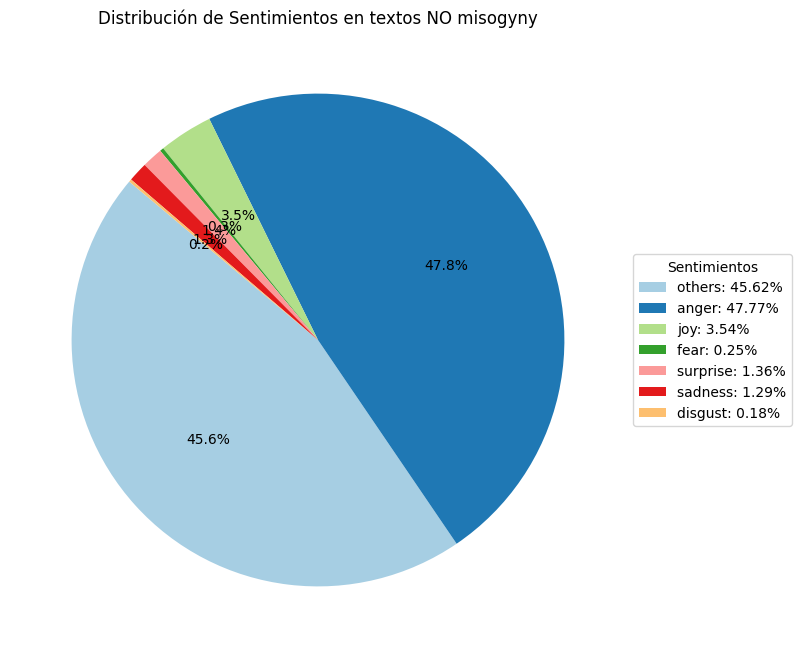

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_emotion_percentages_not_misogyny.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos NO misogyny")
legend_labels = [f"{emotion}: {percentage:.2f}%" for emotion, percentage in overall_emotion_percentages_not_misogyny.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [32]:
print("\nEjemplos de cada tipo de sentimiento en textos NO misogyny:")
for sent_type, example in examples_per_emotion_not_misogyny.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos NO misogyny:
others: ['@jlalarcon84 uf eso conllevaría a fregar sarten y tapadera y no se yo si me merece la pena por 2 trozos de pizza ?', 'Yo a mi jefe: yo vuelvo al restaurante pero no a fregar platos. Disney: toma, 7 meses pa fregar que se ve que no te hemos insistido suficiente con el contrato anterior que rechazaste.', '@Hammonyorkdista Estoy yendo a fregar para hacerle sitio al príncipe del infierno a las hordas del terror', 'A fregar los cacharros Fav y me pasas el fairy', '@CarymeSierraG Te voy a fregar', '@LeonardoBaffi Le encontraron un video de hace años de cuando hacìa campaña para no callar a las mujeres y se lo reventaron contra el comentario de "señora, vàyase a fregar". Asì que el efecto fue apoteòsico.', 'Me trae buenas vibras mis playlist antiguas? alguien que me ayude a fregar y perrear? Lo odio ? http://t.co/', '@madeinmartinez1 Yo aviso. Les digo a mis chicos, no bajéis que voy a fregar. Pues uno de mis dos hijos tie

-----------------------------------------------

### Comparación entre todos los tweets, tweets misogyny y no misogyny

-----------------------------------------------


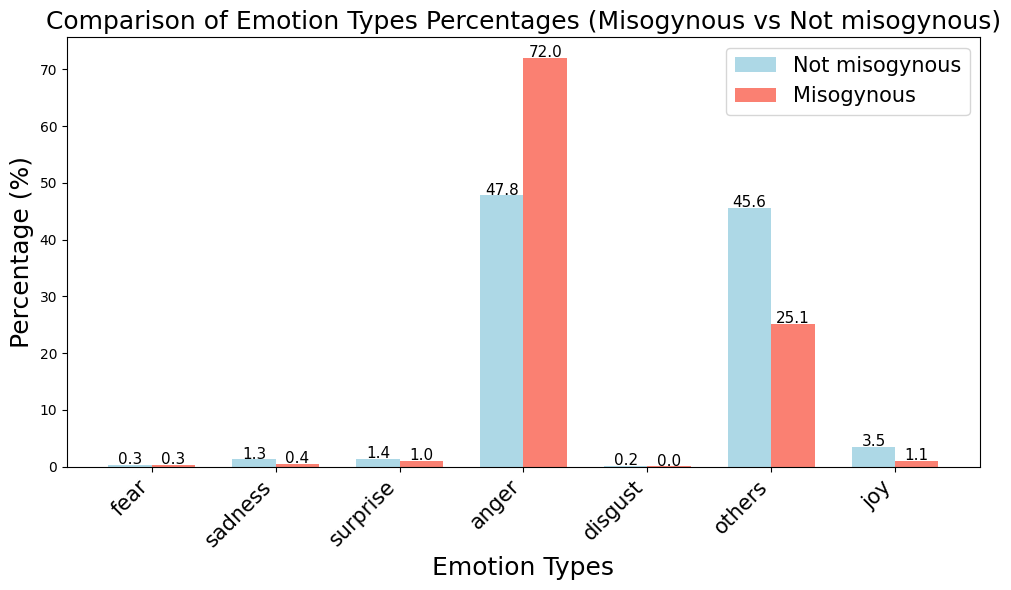

In [34]:
all_emotions = list(set(overall_emotion_percentages_not_misogyny.keys()).union(set(overall_emotion_percentages_misogyny.keys())))

not_misogyny_percentages = [overall_emotion_percentages_not_misogyny.get(emot, 0) for emot in all_emotions]
misogyny_percentages = [overall_emotion_percentages_misogyny.get(emot, 0) for emot in all_emotions]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_emotions))
bar1 = ax.bar(index - bar_width/2, not_misogyny_percentages, bar_width, label='Not misogynous', color='lightblue')
bar2 = ax.bar(index + bar_width/2, misogyny_percentages, bar_width, label='Misogynous', color='salmon')
for i, v in enumerate(not_misogyny_percentages):
  ax.text(index[i] - bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=11, color='black')
for i, v in enumerate(misogyny_percentages):
  ax.text(index[i] + bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=11, color='black')

ax.set_xlabel('Emotion Types', fontsize=18)
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_title('Comparison of Emotion Types Percentages (Misogynous vs Not misogynous)', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(all_emotions, rotation=45, ha='right', fontsize=15)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()